# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Crime Against Category                                      Offense  \
0                       2  Theft of Motor Vehicle Parts or Accessories   
1                       2                                      Robbery   
2                       2     Destruction/Damage/Vandalism of Property   
3                       2                                  Shoplifting   
4                       2     Destruction/Damage/Vandalism of Property   

   Sector  Beat  MCPP  Time  Day  Year  
0      11    22    50   661    0     0  
1      22    50    50  1753    6     0  
2      18    39    33   124    2     0  
3      14    29    16  2005    1     0  
4      11    22    44  1753    1     0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210259 entries, 0 to 210258
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Crime Against Category  210259 non-null  int64 
 1   Offense                 210259 non-null  object
 2   Sector                  210259 non-null  int64 
 3   Beat                    210259 non-null  int64 
 4   MCPP                    210259 non-null  int64 
 5   Time                    210259 non-null  int64 
 6   Day                     210259 non-null  int64 
 7   Year                    210259 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 12.8+ MB


## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [5]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [6]:
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [7]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

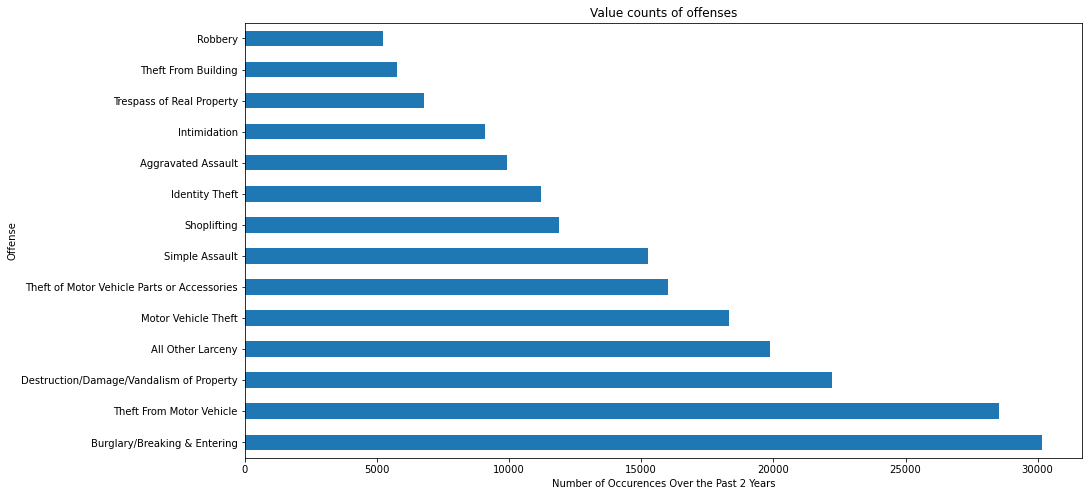

In [8]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [9]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [10]:
#rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

#rf.fit(X_train, y_train)
#rf_train_pred = rf.predict(X_train)
#rf_test_pred = rf.predict(X_test)

In [11]:
#print(classification_report(y_train, rf_train_pred))

In [12]:
#print(classification_report(y_test, rf_test_pred))

In [13]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

#cm = confusion_matrix(y_test, rf_test_pred);
#cmp = ConfusionMatrixDisplay(cm);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp.plot(ax=ax);
#cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


## Random Forest Tuning ##

In [14]:
#rf2 = RandomForestClassifier()

#param_grid = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [1, 2, 3, 4, 5],
   # 'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
   # 'min_samples_leaf': [0.1, 0.2, 0.3]
#}


#gs_rf = GridSearchCV(rf2, param_grid)
#gs_rf.fit(X_train, y_train)
#gs_rf.best_params_

In [15]:
#gs_forest_train_pred = gs_rf.predict(X_train)
#print(classification_report(y_train, gs_forest_train_pred))

In [16]:
#gs_forest_test_pred = gs_rf.predict(X_test)
#print(classification_report(y_test, gs_forest_test_pred))

In [17]:
#rf3 = RandomForestClassifier()

#param_grid2 = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [2, 3, 4],
    #'min_samples_split': [0.24, 0.25, 0.26],
   # 'min_samples_leaf': [0.1, 0.12, 0.13]
#}


#gs_rf2 = GridSearchCV(rf2, param_grid)
#gs_rf2.fit(X_train, y_train)
#gs_rf2.best_params_

In [18]:
#rf4 = RandomForestClassifier(criterion= "entropy", random_state = 1,  max_depth = 3, min_samples_split= 0.2, min_samples_leaf = 0.1,  )

#rf4.fit(X_train, y_train)
#rf_train_pred2 = rf4.predict(X_train)
#rf_test_pred2 = rf4.predict(X_test)

In [19]:
#cm2 = confusion_matrix(y_test, rf_test_pred2);
#cmp2 = ConfusionMatrixDisplay(cm2);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp2.plot(ax=ax);
#cmp2.ax_.set_title("Confusion Matrix");

In [20]:
#print(classification_report(y_train, rf_train_pred2))

In [21]:
#print(classification_report(y_test, rf_test_pred2))

In [22]:
#print ("My program took", time.time() - start_time, "to run")

## CatBoost Model ##

In [23]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [24]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 323ms	remaining: 5m 22s
1:	learn: 2.2999611	total: 519ms	remaining: 4m 19s
2:	learn: 2.2194601	total: 714ms	remaining: 3m 57s
3:	learn: 2.1546015	total: 905ms	remaining: 3m 45s
4:	learn: 2.1023865	total: 1.09s	remaining: 3m 37s
5:	learn: 2.0583486	total: 1.3s	remaining: 3m 35s
6:	learn: 2.0212087	total: 1.5s	remaining: 3m 32s
7:	learn: 1.9898034	total: 1.7s	remaining: 3m 30s
8:	learn: 1.9629609	total: 1.89s	remaining: 3m 28s
9:	learn: 1.9385266	total: 2.08s	remaining: 3m 25s
10:	learn: 1.9170486	total: 2.29s	remaining: 3m 25s
11:	learn: 1.8977704	total: 2.47s	remaining: 3m 23s
12:	learn: 1.8810050	total: 2.67s	remaining: 3m 22s
13:	learn: 1.8659622	total: 2.87s	remaining: 3m 21s
14:	learn: 1.8528057	total: 3.05s	remaining: 3m 20s
15:	learn: 1.8413095	total: 3.25s	remaining: 3m 20s
16:	learn: 1.8304887	total: 3.45s	remaining: 3m 19s
17:	learn: 1.8207193	total: 3.64s	remaining: 3m 18s
18:	learn: 1.8118833	total: 3.83s	remaining: 3m

158:	learn: 1.6251733	total: 30.9s	remaining: 2m 43s
159:	learn: 1.6246682	total: 31.1s	remaining: 2m 43s
160:	learn: 1.6240814	total: 31.3s	remaining: 2m 43s
161:	learn: 1.6234912	total: 31.5s	remaining: 2m 43s
162:	learn: 1.6227072	total: 31.7s	remaining: 2m 42s
163:	learn: 1.6221519	total: 31.9s	remaining: 2m 42s
164:	learn: 1.6218260	total: 32.1s	remaining: 2m 42s
165:	learn: 1.6211820	total: 32.3s	remaining: 2m 42s
166:	learn: 1.6204335	total: 32.5s	remaining: 2m 42s
167:	learn: 1.6199455	total: 32.7s	remaining: 2m 41s
168:	learn: 1.6193922	total: 32.9s	remaining: 2m 41s
169:	learn: 1.6187407	total: 33.1s	remaining: 2m 41s
170:	learn: 1.6180585	total: 33.3s	remaining: 2m 41s
171:	learn: 1.6176398	total: 33.5s	remaining: 2m 41s
172:	learn: 1.6170568	total: 33.7s	remaining: 2m 40s
173:	learn: 1.6165132	total: 33.9s	remaining: 2m 40s
174:	learn: 1.6159495	total: 34s	remaining: 2m 40s
175:	learn: 1.6153028	total: 34.2s	remaining: 2m 40s
176:	learn: 1.6146298	total: 34.4s	remaining: 2m

314:	learn: 1.5649341	total: 1m 1s	remaining: 2m 13s
315:	learn: 1.5647062	total: 1m 1s	remaining: 2m 13s
316:	learn: 1.5645829	total: 1m 1s	remaining: 2m 12s
317:	learn: 1.5642024	total: 1m 1s	remaining: 2m 12s
318:	learn: 1.5640665	total: 1m 2s	remaining: 2m 12s
319:	learn: 1.5637100	total: 1m 2s	remaining: 2m 12s
320:	learn: 1.5633905	total: 1m 2s	remaining: 2m 12s
321:	learn: 1.5631116	total: 1m 2s	remaining: 2m 11s
322:	learn: 1.5627410	total: 1m 2s	remaining: 2m 11s
323:	learn: 1.5624283	total: 1m 3s	remaining: 2m 11s
324:	learn: 1.5621756	total: 1m 3s	remaining: 2m 11s
325:	learn: 1.5618323	total: 1m 3s	remaining: 2m 11s
326:	learn: 1.5616583	total: 1m 3s	remaining: 2m 11s
327:	learn: 1.5613896	total: 1m 3s	remaining: 2m 10s
328:	learn: 1.5609458	total: 1m 4s	remaining: 2m 10s
329:	learn: 1.5606630	total: 1m 4s	remaining: 2m 10s
330:	learn: 1.5603782	total: 1m 4s	remaining: 2m 10s
331:	learn: 1.5601729	total: 1m 4s	remaining: 2m 10s
332:	learn: 1.5598859	total: 1m 4s	remaining: 

468:	learn: 1.5303809	total: 1m 31s	remaining: 1m 43s
469:	learn: 1.5302180	total: 1m 31s	remaining: 1m 43s
470:	learn: 1.5299901	total: 1m 31s	remaining: 1m 42s
471:	learn: 1.5297455	total: 1m 31s	remaining: 1m 42s
472:	learn: 1.5295825	total: 1m 32s	remaining: 1m 42s
473:	learn: 1.5294413	total: 1m 32s	remaining: 1m 42s
474:	learn: 1.5292287	total: 1m 32s	remaining: 1m 42s
475:	learn: 1.5289551	total: 1m 32s	remaining: 1m 42s
476:	learn: 1.5286701	total: 1m 32s	remaining: 1m 41s
477:	learn: 1.5285735	total: 1m 33s	remaining: 1m 41s
478:	learn: 1.5283585	total: 1m 33s	remaining: 1m 41s
479:	learn: 1.5281016	total: 1m 33s	remaining: 1m 41s
480:	learn: 1.5279492	total: 1m 33s	remaining: 1m 41s
481:	learn: 1.5278739	total: 1m 33s	remaining: 1m 40s
482:	learn: 1.5277657	total: 1m 34s	remaining: 1m 40s
483:	learn: 1.5276349	total: 1m 34s	remaining: 1m 40s
484:	learn: 1.5274693	total: 1m 34s	remaining: 1m 40s
485:	learn: 1.5272937	total: 1m 34s	remaining: 1m 40s
486:	learn: 1.5271195	total:

621:	learn: 1.5060006	total: 2m 1s	remaining: 1m 13s
622:	learn: 1.5058894	total: 2m 1s	remaining: 1m 13s
623:	learn: 1.5057118	total: 2m 1s	remaining: 1m 13s
624:	learn: 1.5056597	total: 2m 1s	remaining: 1m 13s
625:	learn: 1.5055096	total: 2m 2s	remaining: 1m 12s
626:	learn: 1.5053330	total: 2m 2s	remaining: 1m 12s
627:	learn: 1.5051102	total: 2m 2s	remaining: 1m 12s
628:	learn: 1.5049670	total: 2m 2s	remaining: 1m 12s
629:	learn: 1.5048555	total: 2m 2s	remaining: 1m 12s
630:	learn: 1.5047674	total: 2m 3s	remaining: 1m 11s
631:	learn: 1.5045301	total: 2m 3s	remaining: 1m 11s
632:	learn: 1.5044772	total: 2m 3s	remaining: 1m 11s
633:	learn: 1.5043542	total: 2m 3s	remaining: 1m 11s
634:	learn: 1.5042600	total: 2m 3s	remaining: 1m 11s
635:	learn: 1.5040910	total: 2m 3s	remaining: 1m 10s
636:	learn: 1.5039614	total: 2m 4s	remaining: 1m 10s
637:	learn: 1.5037723	total: 2m 4s	remaining: 1m 10s
638:	learn: 1.5036974	total: 2m 4s	remaining: 1m 10s
639:	learn: 1.5035726	total: 2m 4s	remaining: 

777:	learn: 1.4853740	total: 2m 31s	remaining: 43.2s
778:	learn: 1.4852877	total: 2m 31s	remaining: 43s
779:	learn: 1.4851963	total: 2m 31s	remaining: 42.8s
780:	learn: 1.4849726	total: 2m 32s	remaining: 42.6s
781:	learn: 1.4849048	total: 2m 32s	remaining: 42.5s
782:	learn: 1.4848062	total: 2m 32s	remaining: 42.3s
783:	learn: 1.4847028	total: 2m 32s	remaining: 42.1s
784:	learn: 1.4846536	total: 2m 32s	remaining: 41.9s
785:	learn: 1.4843678	total: 2m 33s	remaining: 41.7s
786:	learn: 1.4842474	total: 2m 33s	remaining: 41.5s
787:	learn: 1.4841990	total: 2m 33s	remaining: 41.3s
788:	learn: 1.4840352	total: 2m 33s	remaining: 41.1s
789:	learn: 1.4838728	total: 2m 33s	remaining: 40.9s
790:	learn: 1.4837988	total: 2m 34s	remaining: 40.7s
791:	learn: 1.4836912	total: 2m 34s	remaining: 40.5s
792:	learn: 1.4835674	total: 2m 34s	remaining: 40.3s
793:	learn: 1.4834131	total: 2m 34s	remaining: 40.1s
794:	learn: 1.4832386	total: 2m 34s	remaining: 39.9s
795:	learn: 1.4831564	total: 2m 35s	remaining: 3

933:	learn: 1.4689267	total: 3m 1s	remaining: 12.9s
934:	learn: 1.4688580	total: 3m 2s	remaining: 12.7s
935:	learn: 1.4688009	total: 3m 2s	remaining: 12.5s
936:	learn: 1.4687425	total: 3m 2s	remaining: 12.3s
937:	learn: 1.4686443	total: 3m 2s	remaining: 12.1s
938:	learn: 1.4685779	total: 3m 2s	remaining: 11.9s
939:	learn: 1.4685203	total: 3m 3s	remaining: 11.7s
940:	learn: 1.4683926	total: 3m 3s	remaining: 11.5s
941:	learn: 1.4682419	total: 3m 3s	remaining: 11.3s
942:	learn: 1.4681218	total: 3m 3s	remaining: 11.1s
943:	learn: 1.4680295	total: 3m 3s	remaining: 10.9s
944:	learn: 1.4679649	total: 3m 4s	remaining: 10.7s
945:	learn: 1.4678936	total: 3m 4s	remaining: 10.5s
946:	learn: 1.4678353	total: 3m 4s	remaining: 10.3s
947:	learn: 1.4677239	total: 3m 4s	remaining: 10.1s
948:	learn: 1.4676501	total: 3m 4s	remaining: 9.94s
949:	learn: 1.4675029	total: 3m 5s	remaining: 9.74s
950:	learn: 1.4672623	total: 3m 5s	remaining: 9.55s
951:	learn: 1.4671748	total: 3m 5s	remaining: 9.36s
952:	learn: 

In [25]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

In [26]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

In [27]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

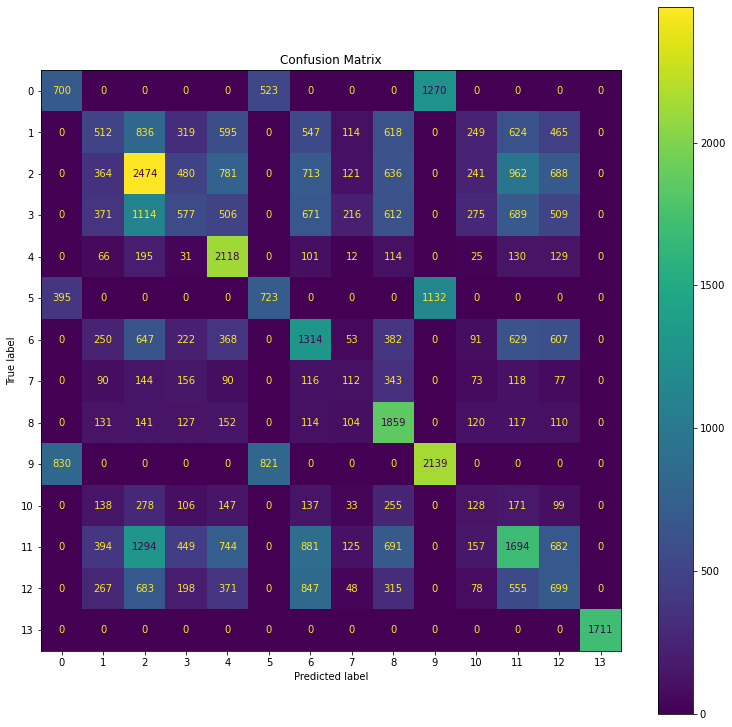

In [28]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our test model aggravated assault results, we have a precision score of .28, a recall score of .71, and an f1 score of .40. This means that:

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [29]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [30]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12.8ms	remaining: 1.26s
1:	learn: 2.4762514	total: 24.5ms	remaining: 1.2s
2:	learn: 2.4237441	total: 36.1ms	remaining: 1.17s
3:	learn: 2.3795726	total: 47.8ms	remaining: 1.15s
4:	learn: 2.3414035	total: 59.4ms	remaining: 1.13s
5:	learn: 2.3078011	total: 71.1ms	remaining: 1.11s
6:	learn: 2.2778569	total: 82.8ms	remaining: 1.1s
7:	learn: 2.2509267	total: 94.5ms	remaining: 1.09s
8:	learn: 2.2265149	total: 105ms	remaining: 1.06s
9:	learn: 2.2043153	total: 116ms	remaining: 1.04s
10:	learn: 2.1839448	total: 127ms	remaining: 1.02s
11:	learn: 2.1652505	total: 138ms	remaining: 1.01s
12:	learn: 2.1480046	total: 148ms	remaining: 992ms
13:	learn: 2.1320227	total: 159ms	remaining: 977ms
14:	learn: 2.1172350	total: 170ms	remaining: 962ms
15:	learn: 2.1034803	total: 180ms	remaining: 947ms
16:	learn: 2.0906592	total: 191ms	remaining: 933ms
17:	learn: 2.0787237	total: 202ms	remaining: 920ms
18:	learn: 2.0675539	total: 213ms	remaining: 908ms
19:	learn: 2.0571036	total: 224ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 11.8ms	remaining: 1.17s
1:	learn: 2.4762573	total: 22.7ms	remaining: 1.11s
2:	learn: 2.4237358	total: 33.6ms	remaining: 1.08s
3:	learn: 2.3795674	total: 44.4ms	remaining: 1.07s
4:	learn: 2.3413909	total: 55.1ms	remaining: 1.05s
5:	learn: 2.3077991	total: 65.9ms	remaining: 1.03s
6:	learn: 2.2778537	total: 76.8ms	remaining: 1.02s
7:	learn: 2.2509244	total: 87.5ms	remaining: 1s
8:	learn: 2.2265171	total: 98.3ms	remaining: 994ms
9:	learn: 2.2043126	total: 109ms	remaining: 981ms
10:	learn: 2.1839418	total: 120ms	remaining: 970ms
11:	learn: 2.1652518	total: 131ms	remaining: 959ms
12:	learn: 2.1479991	total: 141ms	remaining: 947ms
13:	learn: 2.1320212	total: 152ms	remaining: 934ms
14:	learn: 2.1172271	total: 163ms	remaining: 923ms
15:	learn: 2.1034693	total: 173ms	remaining: 911ms
16:	learn: 2.0906570	total: 184ms	remaining: 900ms
17:	learn: 2.0787215	total: 195ms	remaining: 889ms
18:	learn: 2.0675512	total: 206ms	remaining: 878ms
19:	learn: 2.0571039	total: 217ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762645	total: 22.7ms	remaining: 1.11s
2:	learn: 2.4237412	total: 33.9ms	remaining: 1.1s
3:	learn: 2.3795753	total: 45.1ms	remaining: 1.08s
4:	learn: 2.3413938	total: 56.1ms	remaining: 1.07s
5:	learn: 2.3077917	total: 67.3ms	remaining: 1.05s
6:	learn: 2.2778550	total: 78.3ms	remaining: 1.04s
7:	learn: 2.2509156	total: 89.5ms	remaining: 1.03s
8:	learn: 2.2265216	total: 101ms	remaining: 1.02s
9:	learn: 2.2043303	total: 112ms	remaining: 1s
10:	learn: 2.1839467	total: 122ms	remaining: 990ms
11:	learn: 2.1652457	total: 133ms	remaining: 977ms
12:	learn: 2.1480037	total: 144ms	remaining: 963ms
13:	learn: 2.1320178	total: 155ms	remaining: 950ms
14:	learn: 2.1172227	total: 165ms	remaining: 937ms
15:	learn: 2.1034703	total: 176ms	remaining: 925ms
16:	learn: 2.0906613	total: 187ms	remaining: 913ms
17:	learn: 2.0787261	total: 198ms	remaining: 901ms
18:	learn: 2.0675760	total: 209ms	remaining: 890ms
19:	learn: 2.0571258	total: 220ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 11.8ms	remaining: 1.17s
1:	learn: 2.4762682	total: 22.8ms	remaining: 1.11s
2:	learn: 2.4237449	total: 34ms	remaining: 1.1s
3:	learn: 2.3795785	total: 44.8ms	remaining: 1.07s
4:	learn: 2.3413950	total: 55.8ms	remaining: 1.06s
5:	learn: 2.3078053	total: 66.7ms	remaining: 1.04s
6:	learn: 2.2778565	total: 77.4ms	remaining: 1.03s
7:	learn: 2.2509225	total: 88.3ms	remaining: 1.01s
8:	learn: 2.2265251	total: 99.1ms	remaining: 1s
9:	learn: 2.2043273	total: 110ms	remaining: 991ms
10:	learn: 2.1839504	total: 121ms	remaining: 979ms
11:	learn: 2.1652582	total: 132ms	remaining: 967ms
12:	learn: 2.1480045	total: 143ms	remaining: 954ms
13:	learn: 2.1320323	total: 153ms	remaining: 942ms
14:	learn: 2.1172286	total: 164ms	remaining: 930ms
15:	learn: 2.1034728	total: 175ms	remaining: 919ms
16:	learn: 2.0906643	total: 186ms	remaining: 907ms
17:	learn: 2.0787273	total: 197ms	remaining: 896ms
18:	learn: 2.0675733	total: 208ms	remaining: 886ms
19:	learn: 2.0571303	total: 220ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762635	total: 22.9ms	remaining: 1.12s
2:	learn: 2.4237493	total: 33.7ms	remaining: 1.09s
3:	learn: 2.3795780	total: 44.6ms	remaining: 1.07s
4:	learn: 2.3413977	total: 55.6ms	remaining: 1.05s
5:	learn: 2.3077957	total: 66.6ms	remaining: 1.04s
6:	learn: 2.2778528	total: 77.4ms	remaining: 1.03s
7:	learn: 2.2509232	total: 88.3ms	remaining: 1.01s
8:	learn: 2.2265224	total: 99.2ms	remaining: 1s
9:	learn: 2.2043106	total: 110ms	remaining: 991ms
10:	learn: 2.1839470	total: 121ms	remaining: 980ms
11:	learn: 2.1652482	total: 132ms	remaining: 968ms
12:	learn: 2.1479993	total: 143ms	remaining: 956ms
13:	learn: 2.1320242	total: 154ms	remaining: 945ms
14:	learn: 2.1172321	total: 165ms	remaining: 933ms
15:	learn: 2.1034804	total: 176ms	remaining: 923ms
16:	learn: 2.0906601	total: 187ms	remaining: 912ms
17:	learn: 2.0787222	total: 198ms	remaining: 901ms
18:	learn: 2.0675551	total: 209ms	remaining: 891ms
19:	learn: 2.0571097	total: 220ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 12ms	remaining: 1.19s
1:	learn: 2.3598895	total: 22.7ms	remaining: 1.11s
2:	learn: 2.2913397	total: 33.5ms	remaining: 1.08s
3:	learn: 2.2369277	total: 44.2ms	remaining: 1.06s
4:	learn: 2.1922569	total: 55.1ms	remaining: 1.05s
5:	learn: 2.1547724	total: 65.8ms	remaining: 1.03s
6:	learn: 2.1228987	total: 76.6ms	remaining: 1.02s
7:	learn: 2.0954139	total: 87.3ms	remaining: 1s
8:	learn: 2.0716177	total: 97.9ms	remaining: 990ms
9:	learn: 2.0508296	total: 109ms	remaining: 978ms
10:	learn: 2.0271503	total: 120ms	remaining: 971ms
11:	learn: 2.0081887	total: 131ms	remaining: 960ms
12:	learn: 1.9930110	total: 141ms	remaining: 947ms
13:	learn: 1.9817102	total: 152ms	remaining: 934ms
14:	learn: 1.9679396	total: 163ms	remaining: 924ms
15:	learn: 1.9588124	total: 174ms	remaining: 912ms
16:	learn: 1.9460534	total: 185ms	remaining: 902ms
17:	learn: 1.9355645	total: 195ms	remaining: 890ms
18:	learn: 1.9294894	total: 206ms	remaining: 880ms
19:	learn: 1.9230231	total: 218ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12.8ms	remaining: 1.26s
1:	learn: 2.3598792	total: 23.7ms	remaining: 1.16s
2:	learn: 2.2913389	total: 34.6ms	remaining: 1.12s
3:	learn: 2.2369233	total: 45.5ms	remaining: 1.09s
4:	learn: 2.1922464	total: 56.5ms	remaining: 1.07s
5:	learn: 2.1547680	total: 67.4ms	remaining: 1.05s
6:	learn: 2.1228945	total: 78.2ms	remaining: 1.04s
7:	learn: 2.0954130	total: 89ms	remaining: 1.02s
8:	learn: 2.0716164	total: 99.8ms	remaining: 1.01s
9:	learn: 2.0508225	total: 111ms	remaining: 996ms
10:	learn: 2.0270751	total: 122ms	remaining: 984ms
11:	learn: 2.0104775	total: 132ms	remaining: 970ms
12:	learn: 1.9988610	total: 143ms	remaining: 958ms
13:	learn: 1.9820010	total: 154ms	remaining: 947ms
14:	learn: 1.9669209	total: 165ms	remaining: 935ms
15:	learn: 1.9591942	total: 176ms	remaining: 923ms
16:	learn: 1.9464719	total: 187ms	remaining: 912ms
17:	learn: 1.9359812	total: 198ms	remaining: 900ms
18:	learn: 1.9264024	total: 208ms	remaining: 889ms
19:	learn: 1.9200550	total: 219ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.9ms	remaining: 1.18s
1:	learn: 2.3598852	total: 22.8ms	remaining: 1.12s
2:	learn: 2.2913316	total: 33.7ms	remaining: 1.09s
3:	learn: 2.2369270	total: 44.6ms	remaining: 1.07s
4:	learn: 2.1922604	total: 55.4ms	remaining: 1.05s
5:	learn: 2.1547796	total: 66.3ms	remaining: 1.04s
6:	learn: 2.1228898	total: 77.2ms	remaining: 1.02s
7:	learn: 2.0954113	total: 87.9ms	remaining: 1.01s
8:	learn: 2.0716289	total: 98.7ms	remaining: 998ms
9:	learn: 2.0508357	total: 109ms	remaining: 985ms
10:	learn: 2.0271106	total: 120ms	remaining: 974ms
11:	learn: 2.0105112	total: 131ms	remaining: 961ms
12:	learn: 1.9924270	total: 142ms	remaining: 950ms
13:	learn: 1.9822251	total: 153ms	remaining: 937ms
14:	learn: 1.9684885	total: 164ms	remaining: 927ms
15:	learn: 1.9593068	total: 174ms	remaining: 915ms
16:	learn: 1.9465943	total: 185ms	remaining: 905ms
17:	learn: 1.9361021	total: 196ms	remaining: 893ms
18:	learn: 1.9296534	total: 207ms	remaining: 882ms
19:	learn: 1.9202075	total: 218m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12ms	remaining: 1.19s
1:	learn: 2.3598864	total: 23ms	remaining: 1.13s
2:	learn: 2.2913449	total: 33.7ms	remaining: 1.09s
3:	learn: 2.2369312	total: 44.5ms	remaining: 1.07s
4:	learn: 2.1922601	total: 55.4ms	remaining: 1.05s
5:	learn: 2.1547794	total: 66.3ms	remaining: 1.04s
6:	learn: 2.1229021	total: 77.1ms	remaining: 1.02s
7:	learn: 2.0954266	total: 88ms	remaining: 1.01s
8:	learn: 2.0716272	total: 98.9ms	remaining: 1000ms
9:	learn: 2.0508480	total: 110ms	remaining: 989ms
10:	learn: 2.0271347	total: 121ms	remaining: 977ms
11:	learn: 2.0105358	total: 132ms	remaining: 965ms
12:	learn: 1.9924691	total: 143ms	remaining: 954ms
13:	learn: 1.9823054	total: 153ms	remaining: 942ms
14:	learn: 1.9673152	total: 164ms	remaining: 932ms
15:	learn: 1.9591126	total: 175ms	remaining: 920ms
16:	learn: 1.9467488	total: 186ms	remaining: 909ms
17:	learn: 1.9362571	total: 197ms	remaining: 897ms
18:	learn: 1.9302154	total: 208ms	remaining: 886ms
19:	learn: 1.9237626	total: 219ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12.1ms	remaining: 1.2s
1:	learn: 2.3598852	total: 23.1ms	remaining: 1.13s
2:	learn: 2.2913371	total: 34ms	remaining: 1.1s
3:	learn: 2.2369277	total: 45.1ms	remaining: 1.08s
4:	learn: 2.1922650	total: 56ms	remaining: 1.06s
5:	learn: 2.1547782	total: 66.9ms	remaining: 1.05s
6:	learn: 2.1228920	total: 77.8ms	remaining: 1.03s
7:	learn: 2.0954175	total: 88.6ms	remaining: 1.02s
8:	learn: 2.0716159	total: 99.5ms	remaining: 1.01s
9:	learn: 2.0508376	total: 110ms	remaining: 992ms
10:	learn: 2.0270724	total: 121ms	remaining: 983ms
11:	learn: 2.0104720	total: 133ms	remaining: 972ms
12:	learn: 1.9988462	total: 144ms	remaining: 963ms
13:	learn: 1.9821267	total: 156ms	remaining: 959ms
14:	learn: 1.9670321	total: 167ms	remaining: 946ms
15:	learn: 1.9588435	total: 178ms	remaining: 934ms
16:	learn: 1.9465869	total: 189ms	remaining: 924ms
17:	learn: 1.9360986	total: 201ms	remaining: 913ms
18:	learn: 1.9296688	total: 212ms	remaining: 904ms
19:	learn: 1.9202299	total: 224ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9520626	total: 23ms	remaining: 1.12s
2:	learn: 1.8880726	total: 33.8ms	remaining: 1.09s
3:	learn: 1.8521888	total: 44.9ms	remaining: 1.08s
4:	learn: 1.8356851	total: 56.1ms	remaining: 1.07s
5:	learn: 1.8255546	total: 67.1ms	remaining: 1.05s
6:	learn: 1.8101046	total: 77.9ms	remaining: 1.03s
7:	learn: 1.8011890	total: 89ms	remaining: 1.02s
8:	learn: 1.7935487	total: 100ms	remaining: 1.01s
9:	learn: 1.7872373	total: 111ms	remaining: 1s
10:	learn: 1.7818155	total: 122ms	remaining: 986ms
11:	learn: 1.7774933	total: 133ms	remaining: 973ms
12:	learn: 1.7720437	total: 144ms	remaining: 963ms
13:	learn: 1.7672706	total: 155ms	remaining: 951ms
14:	learn: 1.7647360	total: 166ms	remaining: 938ms
15:	learn: 1.7584611	total: 177ms	remaining: 927ms
16:	learn: 1.7548140	total: 188ms	remaining: 917ms
17:	learn: 1.7523388	total: 199ms	remaining: 906ms
18:	learn: 1.7449284	total: 210ms	remaining: 896ms
19:	learn: 1.7430135	total: 221ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9517888	total: 22.9ms	remaining: 1.12s
2:	learn: 1.8886576	total: 33.8ms	remaining: 1.09s
3:	learn: 1.8529388	total: 45ms	remaining: 1.08s
4:	learn: 1.8330485	total: 56.2ms	remaining: 1.07s
5:	learn: 1.8228301	total: 67.2ms	remaining: 1.05s
6:	learn: 1.8124496	total: 78.7ms	remaining: 1.04s
7:	learn: 1.7977725	total: 89.6ms	remaining: 1.03s
8:	learn: 1.7908950	total: 101ms	remaining: 1.02s
9:	learn: 1.7853127	total: 112ms	remaining: 1s
10:	learn: 1.7791103	total: 123ms	remaining: 991ms
11:	learn: 1.7754519	total: 133ms	remaining: 979ms
12:	learn: 1.7716681	total: 145ms	remaining: 969ms
13:	learn: 1.7686971	total: 156ms	remaining: 958ms
14:	learn: 1.7658099	total: 167ms	remaining: 946ms
15:	learn: 1.7577360	total: 178ms	remaining: 934ms
16:	learn: 1.7550340	total: 189ms	remaining: 921ms
17:	learn: 1.7534942	total: 200ms	remaining: 909ms
18:	learn: 1.7500029	total: 211ms	remaining: 899ms
19:	learn: 1.7469651	total: 222ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756961	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9519061	total: 23.5ms	remaining: 1.15s
2:	learn: 1.8888379	total: 35.3ms	remaining: 1.14s
3:	learn: 1.8532652	total: 47.1ms	remaining: 1.13s
4:	learn: 1.8370754	total: 58.4ms	remaining: 1.11s
5:	learn: 1.8272524	total: 69.4ms	remaining: 1.09s
6:	learn: 1.8181761	total: 80.7ms	remaining: 1.07s
7:	learn: 1.8077453	total: 92ms	remaining: 1.06s
8:	learn: 1.7947341	total: 103ms	remaining: 1.04s
9:	learn: 1.7880574	total: 114ms	remaining: 1.03s
10:	learn: 1.7825849	total: 125ms	remaining: 1.01s
11:	learn: 1.7740259	total: 136ms	remaining: 998ms
12:	learn: 1.7695080	total: 147ms	remaining: 984ms
13:	learn: 1.7663961	total: 158ms	remaining: 969ms
14:	learn: 1.7627022	total: 169ms	remaining: 956ms
15:	learn: 1.7594749	total: 179ms	remaining: 942ms
16:	learn: 1.7548249	total: 190ms	remaining: 928ms
17:	learn: 1.7527022	total: 201ms	remaining: 918ms
18:	learn: 1.7499503	total: 212ms	remaining: 905ms
19:	learn: 1.7461350	total: 224ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.2ms	remaining: 1.21s
1:	learn: 1.9519927	total: 23.3ms	remaining: 1.14s
2:	learn: 1.8889246	total: 34.2ms	remaining: 1.11s
3:	learn: 1.8535364	total: 45.4ms	remaining: 1.09s
4:	learn: 1.8340448	total: 56.6ms	remaining: 1.07s
5:	learn: 1.8238952	total: 67.5ms	remaining: 1.06s
6:	learn: 1.8162297	total: 78.5ms	remaining: 1.04s
7:	learn: 1.8014081	total: 89.5ms	remaining: 1.03s
8:	learn: 1.7950082	total: 101ms	remaining: 1.02s
9:	learn: 1.7892775	total: 111ms	remaining: 1s
10:	learn: 1.7836330	total: 122ms	remaining: 988ms
11:	learn: 1.7789928	total: 133ms	remaining: 977ms
12:	learn: 1.7714939	total: 144ms	remaining: 967ms
13:	learn: 1.7681402	total: 155ms	remaining: 955ms
14:	learn: 1.7653013	total: 167ms	remaining: 944ms
15:	learn: 1.7573031	total: 177ms	remaining: 931ms
16:	learn: 1.7539602	total: 188ms	remaining: 919ms
17:	learn: 1.7508533	total: 199ms	remaining: 906ms
18:	learn: 1.7481670	total: 210ms	remaining: 895ms
19:	learn: 1.7448733	total: 221ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 12ms	remaining: 1.19s
1:	learn: 1.9517451	total: 23.1ms	remaining: 1.13s
2:	learn: 1.8888390	total: 34.1ms	remaining: 1.1s
3:	learn: 1.8531956	total: 45.4ms	remaining: 1.09s
4:	learn: 1.8335322	total: 56.6ms	remaining: 1.07s
5:	learn: 1.8233264	total: 67.4ms	remaining: 1.06s
6:	learn: 1.8157679	total: 78.5ms	remaining: 1.04s
7:	learn: 1.8008696	total: 89.4ms	remaining: 1.03s
8:	learn: 1.7944985	total: 100ms	remaining: 1.01s
9:	learn: 1.7897199	total: 111ms	remaining: 1s
10:	learn: 1.7810922	total: 122ms	remaining: 991ms
11:	learn: 1.7755224	total: 133ms	remaining: 977ms
12:	learn: 1.7681781	total: 145ms	remaining: 967ms
13:	learn: 1.7640496	total: 156ms	remaining: 956ms
14:	learn: 1.7611051	total: 167ms	remaining: 945ms
15:	learn: 1.7569322	total: 178ms	remaining: 933ms
16:	learn: 1.7515366	total: 189ms	remaining: 921ms
17:	learn: 1.7484705	total: 199ms	remaining: 908ms
18:	learn: 1.7450672	total: 210ms	remaining: 897ms
19:	learn: 1.7421793	total: 222ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12.6ms	remaining: 6.29s
1:	learn: 2.4762514	total: 23.5ms	remaining: 5.84s
2:	learn: 2.4237441	total: 34.4ms	remaining: 5.71s
3:	learn: 2.3795726	total: 45.1ms	remaining: 5.59s
4:	learn: 2.3414035	total: 56.3ms	remaining: 5.58s
5:	learn: 2.3078011	total: 67.9ms	remaining: 5.59s
6:	learn: 2.2778569	total: 78.7ms	remaining: 5.54s
7:	learn: 2.2509267	total: 89.6ms	remaining: 5.51s
8:	learn: 2.2265149	total: 100ms	remaining: 5.48s
9:	learn: 2.2043153	total: 111ms	remaining: 5.45s
10:	learn: 2.1839448	total: 122ms	remaining: 5.42s
11:	learn: 2.1652503	total: 133ms	remaining: 5.4s
12:	learn: 2.1480046	total: 144ms	remaining: 5.38s
13:	learn: 2.1320225	total: 154ms	remaining: 5.36s
14:	learn: 2.1172352	total: 165ms	remaining: 5.34s
15:	learn: 2.1034803	total: 176ms	remaining: 5.33s
16:	learn: 2.0906592	total: 187ms	remaining: 5.31s
17:	learn: 2.0787237	total: 198ms	remaining: 5.3s
18:	learn: 2.0675536	total: 208ms	remaining: 5.28s
19:	learn: 2.0571036	total: 219ms	r

170:	learn: 1.7689921	total: 1.88s	remaining: 3.62s
171:	learn: 1.7685850	total: 1.89s	remaining: 3.6s
172:	learn: 1.7681785	total: 1.9s	remaining: 3.59s
173:	learn: 1.7678955	total: 1.91s	remaining: 3.58s
174:	learn: 1.7672910	total: 1.92s	remaining: 3.57s
175:	learn: 1.7668745	total: 1.93s	remaining: 3.56s
176:	learn: 1.7659995	total: 1.95s	remaining: 3.55s
177:	learn: 1.7655908	total: 1.96s	remaining: 3.54s
178:	learn: 1.7653113	total: 1.97s	remaining: 3.53s
179:	learn: 1.7649124	total: 1.98s	remaining: 3.52s
180:	learn: 1.7645241	total: 1.99s	remaining: 3.51s
181:	learn: 1.7642733	total: 2s	remaining: 3.49s
182:	learn: 1.7639449	total: 2.01s	remaining: 3.48s
183:	learn: 1.7630631	total: 2.02s	remaining: 3.47s
184:	learn: 1.7627943	total: 2.03s	remaining: 3.46s
185:	learn: 1.7621814	total: 2.04s	remaining: 3.45s
186:	learn: 1.7618502	total: 2.05s	remaining: 3.44s
187:	learn: 1.7614320	total: 2.06s	remaining: 3.43s
188:	learn: 1.7606213	total: 2.08s	remaining: 3.42s
189:	learn: 1.760

340:	learn: 1.7167703	total: 3.75s	remaining: 1.75s
341:	learn: 1.7165618	total: 3.76s	remaining: 1.74s
342:	learn: 1.7164299	total: 3.77s	remaining: 1.73s
343:	learn: 1.7162823	total: 3.78s	remaining: 1.71s
344:	learn: 1.7160442	total: 3.79s	remaining: 1.7s
345:	learn: 1.7155439	total: 3.8s	remaining: 1.69s
346:	learn: 1.7151150	total: 3.81s	remaining: 1.68s
347:	learn: 1.7148387	total: 3.82s	remaining: 1.67s
348:	learn: 1.7146480	total: 3.83s	remaining: 1.66s
349:	learn: 1.7144623	total: 3.85s	remaining: 1.65s
350:	learn: 1.7140464	total: 3.86s	remaining: 1.64s
351:	learn: 1.7139350	total: 3.87s	remaining: 1.63s
352:	learn: 1.7137133	total: 3.88s	remaining: 1.61s
353:	learn: 1.7136035	total: 3.89s	remaining: 1.6s
354:	learn: 1.7134935	total: 3.9s	remaining: 1.59s
355:	learn: 1.7133483	total: 3.91s	remaining: 1.58s
356:	learn: 1.7131929	total: 3.92s	remaining: 1.57s
357:	learn: 1.7127040	total: 3.93s	remaining: 1.56s
358:	learn: 1.7124626	total: 3.94s	remaining: 1.55s
359:	learn: 1.71

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 11.9ms	remaining: 5.92s
1:	learn: 2.4762573	total: 22.7ms	remaining: 5.66s
2:	learn: 2.4237358	total: 33.6ms	remaining: 5.57s
3:	learn: 2.3795674	total: 44.4ms	remaining: 5.5s
4:	learn: 2.3413909	total: 55.2ms	remaining: 5.46s
5:	learn: 2.3077991	total: 65.9ms	remaining: 5.43s
6:	learn: 2.2778537	total: 76.6ms	remaining: 5.4s
7:	learn: 2.2509244	total: 87.5ms	remaining: 5.38s
8:	learn: 2.2265174	total: 98.3ms	remaining: 5.36s
9:	learn: 2.2043126	total: 109ms	remaining: 5.35s
10:	learn: 2.1839421	total: 120ms	remaining: 5.34s
11:	learn: 2.1652518	total: 131ms	remaining: 5.33s
12:	learn: 2.1479989	total: 142ms	remaining: 5.32s
13:	learn: 2.1320212	total: 153ms	remaining: 5.3s
14:	learn: 2.1172271	total: 164ms	remaining: 5.29s
15:	learn: 2.1034693	total: 174ms	remaining: 5.28s
16:	learn: 2.0906570	total: 185ms	remaining: 5.26s
17:	learn: 2.0787215	total: 196ms	remaining: 5.25s
18:	learn: 2.0675514	total: 207ms	remaining: 5.24s
19:	learn: 2.0571039	total: 218ms	r

171:	learn: 1.7711415	total: 1.89s	remaining: 3.61s
172:	learn: 1.7702931	total: 1.91s	remaining: 3.6s
173:	learn: 1.7699677	total: 1.92s	remaining: 3.59s
174:	learn: 1.7696167	total: 1.93s	remaining: 3.58s
175:	learn: 1.7692864	total: 1.94s	remaining: 3.57s
176:	learn: 1.7688970	total: 1.95s	remaining: 3.56s
177:	learn: 1.7684585	total: 1.96s	remaining: 3.55s
178:	learn: 1.7680452	total: 1.97s	remaining: 3.54s
179:	learn: 1.7677043	total: 1.98s	remaining: 3.52s
180:	learn: 1.7673415	total: 1.99s	remaining: 3.51s
181:	learn: 1.7669492	total: 2s	remaining: 3.5s
182:	learn: 1.7663632	total: 2.02s	remaining: 3.49s
183:	learn: 1.7660972	total: 2.03s	remaining: 3.48s
184:	learn: 1.7656891	total: 2.04s	remaining: 3.47s
185:	learn: 1.7654499	total: 2.05s	remaining: 3.46s
186:	learn: 1.7651063	total: 2.06s	remaining: 3.45s
187:	learn: 1.7648898	total: 2.07s	remaining: 3.44s
188:	learn: 1.7643818	total: 2.08s	remaining: 3.42s
189:	learn: 1.7641049	total: 2.09s	remaining: 3.41s
190:	learn: 1.763

339:	learn: 1.7248175	total: 3.76s	remaining: 1.77s
340:	learn: 1.7246847	total: 3.77s	remaining: 1.76s
341:	learn: 1.7245672	total: 3.78s	remaining: 1.75s
342:	learn: 1.7244357	total: 3.79s	remaining: 1.74s
343:	learn: 1.7241503	total: 3.8s	remaining: 1.72s
344:	learn: 1.7240548	total: 3.81s	remaining: 1.71s
345:	learn: 1.7238329	total: 3.82s	remaining: 1.7s
346:	learn: 1.7237443	total: 3.83s	remaining: 1.69s
347:	learn: 1.7235688	total: 3.85s	remaining: 1.68s
348:	learn: 1.7234316	total: 3.86s	remaining: 1.67s
349:	learn: 1.7232609	total: 3.87s	remaining: 1.66s
350:	learn: 1.7230724	total: 3.88s	remaining: 1.65s
351:	learn: 1.7229635	total: 3.89s	remaining: 1.64s
352:	learn: 1.7227546	total: 3.9s	remaining: 1.62s
353:	learn: 1.7225901	total: 3.91s	remaining: 1.61s
354:	learn: 1.7224039	total: 3.92s	remaining: 1.6s
355:	learn: 1.7223061	total: 3.93s	remaining: 1.59s
356:	learn: 1.7222080	total: 3.94s	remaining: 1.58s
357:	learn: 1.7220604	total: 3.96s	remaining: 1.57s
358:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 11.8ms	remaining: 5.88s
1:	learn: 2.4762640	total: 22.7ms	remaining: 5.66s
2:	learn: 2.4237412	total: 33.6ms	remaining: 5.56s
3:	learn: 2.3795753	total: 44.5ms	remaining: 5.51s
4:	learn: 2.3413938	total: 55.3ms	remaining: 5.47s
5:	learn: 2.3077920	total: 66.1ms	remaining: 5.44s
6:	learn: 2.2778548	total: 77ms	remaining: 5.42s
7:	learn: 2.2509156	total: 87.9ms	remaining: 5.4s
8:	learn: 2.2265216	total: 98.8ms	remaining: 5.39s
9:	learn: 2.2043303	total: 110ms	remaining: 5.37s
10:	learn: 2.1839470	total: 121ms	remaining: 5.37s
11:	learn: 2.1652460	total: 132ms	remaining: 5.35s
12:	learn: 2.1480037	total: 142ms	remaining: 5.34s
13:	learn: 2.1320178	total: 153ms	remaining: 5.32s
14:	learn: 2.1172225	total: 164ms	remaining: 5.31s
15:	learn: 2.1034706	total: 175ms	remaining: 5.3s
16:	learn: 2.0906616	total: 186ms	remaining: 5.29s
17:	learn: 2.0787263	total: 197ms	remaining: 5.28s
18:	learn: 2.0675762	total: 208ms	remaining: 5.26s
19:	learn: 2.0571256	total: 219ms	re

167:	learn: 1.7725896	total: 1.85s	remaining: 3.66s
168:	learn: 1.7721758	total: 1.86s	remaining: 3.65s
169:	learn: 1.7719298	total: 1.88s	remaining: 3.64s
170:	learn: 1.7716180	total: 1.89s	remaining: 3.63s
171:	learn: 1.7712591	total: 1.9s	remaining: 3.62s
172:	learn: 1.7709824	total: 1.91s	remaining: 3.61s
173:	learn: 1.7705022	total: 1.92s	remaining: 3.6s
174:	learn: 1.7701281	total: 1.93s	remaining: 3.59s
175:	learn: 1.7692789	total: 1.94s	remaining: 3.58s
176:	learn: 1.7689649	total: 1.95s	remaining: 3.56s
177:	learn: 1.7687206	total: 1.96s	remaining: 3.55s
178:	learn: 1.7684492	total: 1.98s	remaining: 3.54s
179:	learn: 1.7680290	total: 1.99s	remaining: 3.53s
180:	learn: 1.7676243	total: 2s	remaining: 3.52s
181:	learn: 1.7668321	total: 2.01s	remaining: 3.51s
182:	learn: 1.7664579	total: 2.02s	remaining: 3.5s
183:	learn: 1.7661543	total: 2.03s	remaining: 3.49s
184:	learn: 1.7658440	total: 2.04s	remaining: 3.48s
185:	learn: 1.7654211	total: 2.05s	remaining: 3.46s
186:	learn: 1.7652

334:	learn: 1.7270893	total: 3.7s	remaining: 1.82s
335:	learn: 1.7269901	total: 3.71s	remaining: 1.81s
336:	learn: 1.7268753	total: 3.72s	remaining: 1.8s
337:	learn: 1.7264111	total: 3.73s	remaining: 1.79s
338:	learn: 1.7261626	total: 3.74s	remaining: 1.78s
339:	learn: 1.7260437	total: 3.75s	remaining: 1.77s
340:	learn: 1.7258123	total: 3.76s	remaining: 1.75s
341:	learn: 1.7257229	total: 3.77s	remaining: 1.74s
342:	learn: 1.7255733	total: 3.79s	remaining: 1.73s
343:	learn: 1.7254246	total: 3.8s	remaining: 1.72s
344:	learn: 1.7251683	total: 3.81s	remaining: 1.71s
345:	learn: 1.7249525	total: 3.82s	remaining: 1.7s
346:	learn: 1.7247322	total: 3.83s	remaining: 1.69s
347:	learn: 1.7245131	total: 3.84s	remaining: 1.68s
348:	learn: 1.7244126	total: 3.85s	remaining: 1.67s
349:	learn: 1.7239392	total: 3.86s	remaining: 1.66s
350:	learn: 1.7237591	total: 3.88s	remaining: 1.65s
351:	learn: 1.7236531	total: 3.89s	remaining: 1.64s
352:	learn: 1.7232507	total: 3.9s	remaining: 1.62s
353:	learn: 1.723

499:	learn: 1.7008670	total: 5.52s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12ms	remaining: 6s
1:	learn: 2.4762685	total: 23ms	remaining: 5.72s
2:	learn: 2.4237449	total: 34ms	remaining: 5.64s
3:	learn: 2.3795785	total: 45ms	remaining: 5.58s
4:	learn: 2.3413950	total: 55.9ms	remaining: 5.54s
5:	learn: 2.3078053	total: 66.6ms	remaining: 5.49s
6:	learn: 2.2778565	total: 77.5ms	remaining: 5.46s
7:	learn: 2.2509227	total: 88.4ms	remaining: 5.44s
8:	learn: 2.2265251	total: 99.3ms	remaining: 5.42s
9:	learn: 2.2043271	total: 110ms	remaining: 5.39s
10:	learn: 2.1839504	total: 121ms	remaining: 5.38s
11:	learn: 2.1652582	total: 132ms	remaining: 5.36s
12:	learn: 2.1480047	total: 143ms	remaining: 5.34s
13:	learn: 2.1320323	total: 153ms	remaining: 5.33s
14:	learn: 2.1172286	total: 164ms	remaining: 5.31s
15:	learn: 2.1034728	total: 175ms	remaining: 5.3s
16:	learn: 2.0906643	total: 186ms	remaining: 5.29s
17:	learn: 2.0787273	total: 197ms	remaining: 5.28s
18:	learn: 2.0675735	total: 208ms	remaining: 5.27s
19:	learn: 2.0571302	total: 219ms	remaining:

170:	learn: 1.7716883	total: 1.89s	remaining: 3.64s
171:	learn: 1.7713319	total: 1.9s	remaining: 3.63s
172:	learn: 1.7707777	total: 1.91s	remaining: 3.62s
173:	learn: 1.7704598	total: 1.92s	remaining: 3.6s
174:	learn: 1.7700672	total: 1.93s	remaining: 3.59s
175:	learn: 1.7697452	total: 1.95s	remaining: 3.58s
176:	learn: 1.7693539	total: 1.96s	remaining: 3.57s
177:	learn: 1.7691083	total: 1.97s	remaining: 3.56s
178:	learn: 1.7687765	total: 1.98s	remaining: 3.55s
179:	learn: 1.7685007	total: 1.99s	remaining: 3.54s
180:	learn: 1.7681098	total: 2s	remaining: 3.52s
181:	learn: 1.7677545	total: 2.01s	remaining: 3.51s
182:	learn: 1.7669141	total: 2.02s	remaining: 3.5s
183:	learn: 1.7666116	total: 2.03s	remaining: 3.49s
184:	learn: 1.7662322	total: 2.04s	remaining: 3.48s
185:	learn: 1.7659428	total: 2.06s	remaining: 3.47s
186:	learn: 1.7656415	total: 2.07s	remaining: 3.46s
187:	learn: 1.7652649	total: 2.08s	remaining: 3.45s
188:	learn: 1.7650396	total: 2.09s	remaining: 3.44s
189:	learn: 1.7646

337:	learn: 1.7244252	total: 3.73s	remaining: 1.79s
338:	learn: 1.7242549	total: 3.74s	remaining: 1.78s
339:	learn: 1.7240798	total: 3.75s	remaining: 1.77s
340:	learn: 1.7235883	total: 3.76s	remaining: 1.75s
341:	learn: 1.7233626	total: 3.77s	remaining: 1.74s
342:	learn: 1.7231855	total: 3.79s	remaining: 1.73s
343:	learn: 1.7227291	total: 3.8s	remaining: 1.72s
344:	learn: 1.7225506	total: 3.81s	remaining: 1.71s
345:	learn: 1.7224265	total: 3.82s	remaining: 1.7s
346:	learn: 1.7223347	total: 3.83s	remaining: 1.69s
347:	learn: 1.7221957	total: 3.84s	remaining: 1.68s
348:	learn: 1.7220570	total: 3.85s	remaining: 1.67s
349:	learn: 1.7219128	total: 3.86s	remaining: 1.66s
350:	learn: 1.7216908	total: 3.87s	remaining: 1.64s
351:	learn: 1.7215357	total: 3.89s	remaining: 1.63s
352:	learn: 1.7212135	total: 3.9s	remaining: 1.62s
353:	learn: 1.7209678	total: 3.91s	remaining: 1.61s
354:	learn: 1.7205041	total: 3.92s	remaining: 1.6s
355:	learn: 1.7203476	total: 3.93s	remaining: 1.59s
356:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 11.8ms	remaining: 5.9s
1:	learn: 2.4762633	total: 22.8ms	remaining: 5.67s
2:	learn: 2.4237491	total: 33.6ms	remaining: 5.57s
3:	learn: 2.3795780	total: 44.3ms	remaining: 5.49s
4:	learn: 2.3413980	total: 55.2ms	remaining: 5.47s
5:	learn: 2.3077954	total: 66.2ms	remaining: 5.45s
6:	learn: 2.2778531	total: 77.1ms	remaining: 5.43s
7:	learn: 2.2509232	total: 87.8ms	remaining: 5.4s
8:	learn: 2.2265224	total: 98.7ms	remaining: 5.39s
9:	learn: 2.2043104	total: 110ms	remaining: 5.38s
10:	learn: 2.1839472	total: 121ms	remaining: 5.38s
11:	learn: 2.1652482	total: 132ms	remaining: 5.37s
12:	learn: 2.1479995	total: 143ms	remaining: 5.36s
13:	learn: 2.1320242	total: 154ms	remaining: 5.34s
14:	learn: 2.1172321	total: 165ms	remaining: 5.33s
15:	learn: 2.1034802	total: 176ms	remaining: 5.32s
16:	learn: 2.0906601	total: 187ms	remaining: 5.3s
17:	learn: 2.0787219	total: 198ms	remaining: 5.29s
18:	learn: 2.0675551	total: 209ms	remaining: 5.28s
19:	learn: 2.0571095	total: 219ms	r

168:	learn: 1.7727707	total: 1.86s	remaining: 3.65s
169:	learn: 1.7723726	total: 1.87s	remaining: 3.64s
170:	learn: 1.7719633	total: 1.88s	remaining: 3.63s
171:	learn: 1.7716732	total: 1.9s	remaining: 3.61s
172:	learn: 1.7713384	total: 1.91s	remaining: 3.6s
173:	learn: 1.7709523	total: 1.92s	remaining: 3.59s
174:	learn: 1.7701136	total: 1.93s	remaining: 3.58s
175:	learn: 1.7693699	total: 1.94s	remaining: 3.57s
176:	learn: 1.7688447	total: 1.95s	remaining: 3.56s
177:	learn: 1.7684077	total: 1.96s	remaining: 3.55s
178:	learn: 1.7680524	total: 1.97s	remaining: 3.54s
179:	learn: 1.7677713	total: 1.98s	remaining: 3.53s
180:	learn: 1.7674185	total: 2s	remaining: 3.52s
181:	learn: 1.7670811	total: 2.01s	remaining: 3.5s
182:	learn: 1.7666791	total: 2.02s	remaining: 3.49s
183:	learn: 1.7664473	total: 2.03s	remaining: 3.48s
184:	learn: 1.7660728	total: 2.04s	remaining: 3.47s
185:	learn: 1.7652857	total: 2.05s	remaining: 3.46s
186:	learn: 1.7645467	total: 2.06s	remaining: 3.45s
187:	learn: 1.7642

335:	learn: 1.7251087	total: 3.7s	remaining: 1.81s
336:	learn: 1.7247371	total: 3.71s	remaining: 1.8s
337:	learn: 1.7246042	total: 3.73s	remaining: 1.79s
338:	learn: 1.7243866	total: 3.74s	remaining: 1.77s
339:	learn: 1.7238979	total: 3.75s	remaining: 1.76s
340:	learn: 1.7237975	total: 3.76s	remaining: 1.75s
341:	learn: 1.7236948	total: 3.77s	remaining: 1.74s
342:	learn: 1.7234521	total: 3.78s	remaining: 1.73s
343:	learn: 1.7233017	total: 3.79s	remaining: 1.72s
344:	learn: 1.7230030	total: 3.8s	remaining: 1.71s
345:	learn: 1.7228822	total: 3.81s	remaining: 1.7s
346:	learn: 1.7227550	total: 3.83s	remaining: 1.69s
347:	learn: 1.7225245	total: 3.84s	remaining: 1.68s
348:	learn: 1.7223238	total: 3.85s	remaining: 1.66s
349:	learn: 1.7220893	total: 3.86s	remaining: 1.65s
350:	learn: 1.7219162	total: 3.87s	remaining: 1.64s
351:	learn: 1.7218278	total: 3.88s	remaining: 1.63s
352:	learn: 1.7217371	total: 3.89s	remaining: 1.62s
353:	learn: 1.7215339	total: 3.9s	remaining: 1.61s
354:	learn: 1.721

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.9ms	remaining: 5.96s
1:	learn: 2.3598895	total: 22.8ms	remaining: 5.67s
2:	learn: 2.2913397	total: 33.5ms	remaining: 5.56s
3:	learn: 2.2369277	total: 44.3ms	remaining: 5.5s
4:	learn: 2.1922569	total: 55.2ms	remaining: 5.46s
5:	learn: 2.1547724	total: 66ms	remaining: 5.43s
6:	learn: 2.1228987	total: 76.8ms	remaining: 5.41s
7:	learn: 2.0954139	total: 87.6ms	remaining: 5.39s
8:	learn: 2.0716174	total: 98.6ms	remaining: 5.38s
9:	learn: 2.0508296	total: 109ms	remaining: 5.36s
10:	learn: 2.0271503	total: 120ms	remaining: 5.36s
11:	learn: 2.0081889	total: 131ms	remaining: 5.34s
12:	learn: 1.9930110	total: 142ms	remaining: 5.32s
13:	learn: 1.9817102	total: 154ms	remaining: 5.34s
14:	learn: 1.9679394	total: 165ms	remaining: 5.33s
15:	learn: 1.9588124	total: 175ms	remaining: 5.31s
16:	learn: 1.9460533	total: 186ms	remaining: 5.3s
17:	learn: 1.9355642	total: 197ms	remaining: 5.28s
18:	learn: 1.9294893	total: 208ms	remaining: 5.27s
19:	learn: 1.9230232	total: 219ms	re

171:	learn: 1.7155938	total: 1.89s	remaining: 3.61s
172:	learn: 1.7153972	total: 1.9s	remaining: 3.6s
173:	learn: 1.7150502	total: 1.91s	remaining: 3.58s
174:	learn: 1.7146614	total: 1.92s	remaining: 3.57s
175:	learn: 1.7138392	total: 1.94s	remaining: 3.56s
176:	learn: 1.7133014	total: 1.95s	remaining: 3.55s
177:	learn: 1.7129842	total: 1.96s	remaining: 3.54s
178:	learn: 1.7124140	total: 1.97s	remaining: 3.53s
179:	learn: 1.7119135	total: 1.98s	remaining: 3.52s
180:	learn: 1.7117451	total: 1.99s	remaining: 3.51s
181:	learn: 1.7113048	total: 2s	remaining: 3.5s
182:	learn: 1.7109581	total: 2.01s	remaining: 3.48s
183:	learn: 1.7107237	total: 2.02s	remaining: 3.47s
184:	learn: 1.7105025	total: 2.03s	remaining: 3.46s
185:	learn: 1.7100924	total: 2.04s	remaining: 3.45s
186:	learn: 1.7098660	total: 2.06s	remaining: 3.44s
187:	learn: 1.7093656	total: 2.07s	remaining: 3.43s
188:	learn: 1.7086546	total: 2.08s	remaining: 3.42s
189:	learn: 1.7082900	total: 2.09s	remaining: 3.41s
190:	learn: 1.7077

339:	learn: 1.6597712	total: 3.76s	remaining: 1.77s
340:	learn: 1.6596045	total: 3.77s	remaining: 1.76s
341:	learn: 1.6592688	total: 3.78s	remaining: 1.75s
342:	learn: 1.6590172	total: 3.79s	remaining: 1.73s
343:	learn: 1.6588410	total: 3.8s	remaining: 1.72s
344:	learn: 1.6586313	total: 3.81s	remaining: 1.71s
345:	learn: 1.6583871	total: 3.82s	remaining: 1.7s
346:	learn: 1.6575278	total: 3.83s	remaining: 1.69s
347:	learn: 1.6574469	total: 3.84s	remaining: 1.68s
348:	learn: 1.6572565	total: 3.85s	remaining: 1.67s
349:	learn: 1.6567300	total: 3.87s	remaining: 1.66s
350:	learn: 1.6566441	total: 3.88s	remaining: 1.65s
351:	learn: 1.6565442	total: 3.89s	remaining: 1.63s
352:	learn: 1.6563209	total: 3.9s	remaining: 1.62s
353:	learn: 1.6562072	total: 3.91s	remaining: 1.61s
354:	learn: 1.6560867	total: 3.92s	remaining: 1.6s
355:	learn: 1.6559312	total: 3.93s	remaining: 1.59s
356:	learn: 1.6556457	total: 3.94s	remaining: 1.58s
357:	learn: 1.6554289	total: 3.95s	remaining: 1.57s
358:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 11.8ms	remaining: 5.89s
1:	learn: 2.3598792	total: 22.6ms	remaining: 5.63s
2:	learn: 2.2913389	total: 33.4ms	remaining: 5.53s
3:	learn: 2.2369233	total: 44.2ms	remaining: 5.49s
4:	learn: 2.1922464	total: 55.1ms	remaining: 5.45s
5:	learn: 2.1547680	total: 65.8ms	remaining: 5.42s
6:	learn: 2.1228947	total: 76.7ms	remaining: 5.4s
7:	learn: 2.0954127	total: 87.6ms	remaining: 5.39s
8:	learn: 2.0716164	total: 98.5ms	remaining: 5.37s
9:	learn: 2.0508225	total: 109ms	remaining: 5.36s
10:	learn: 2.0270751	total: 120ms	remaining: 5.35s
11:	learn: 2.0104775	total: 131ms	remaining: 5.33s
12:	learn: 1.9988608	total: 142ms	remaining: 5.33s
13:	learn: 1.9820013	total: 153ms	remaining: 5.31s
14:	learn: 1.9669209	total: 164ms	remaining: 5.3s
15:	learn: 1.9591944	total: 175ms	remaining: 5.28s
16:	learn: 1.9464719	total: 186ms	remaining: 5.28s
17:	learn: 1.9359810	total: 196ms	remaining: 5.26s
18:	learn: 1.9264024	total: 207ms	remaining: 5.25s
19:	learn: 1.9200552	total: 218ms	

169:	learn: 1.7216965	total: 1.87s	remaining: 3.63s
170:	learn: 1.7215225	total: 1.88s	remaining: 3.62s
171:	learn: 1.7212688	total: 1.89s	remaining: 3.61s
172:	learn: 1.7210345	total: 1.9s	remaining: 3.6s
173:	learn: 1.7207305	total: 1.91s	remaining: 3.59s
174:	learn: 1.7205421	total: 1.93s	remaining: 3.58s
175:	learn: 1.7202878	total: 1.94s	remaining: 3.56s
176:	learn: 1.7200976	total: 1.95s	remaining: 3.55s
177:	learn: 1.7196662	total: 1.96s	remaining: 3.54s
178:	learn: 1.7193972	total: 1.97s	remaining: 3.53s
179:	learn: 1.7190077	total: 1.98s	remaining: 3.52s
180:	learn: 1.7187618	total: 1.99s	remaining: 3.51s
181:	learn: 1.7182856	total: 2s	remaining: 3.5s
182:	learn: 1.7180233	total: 2.01s	remaining: 3.49s
183:	learn: 1.7177865	total: 2.02s	remaining: 3.47s
184:	learn: 1.7170455	total: 2.03s	remaining: 3.46s
185:	learn: 1.7168878	total: 2.04s	remaining: 3.45s
186:	learn: 1.7165307	total: 2.06s	remaining: 3.44s
187:	learn: 1.7161266	total: 2.07s	remaining: 3.43s
188:	learn: 1.7158

339:	learn: 1.6758199	total: 3.74s	remaining: 1.76s
340:	learn: 1.6756681	total: 3.75s	remaining: 1.75s
341:	learn: 1.6755525	total: 3.77s	remaining: 1.74s
342:	learn: 1.6753201	total: 3.78s	remaining: 1.73s
343:	learn: 1.6750856	total: 3.79s	remaining: 1.72s
344:	learn: 1.6748446	total: 3.8s	remaining: 1.71s
345:	learn: 1.6746397	total: 3.81s	remaining: 1.7s
346:	learn: 1.6745184	total: 3.82s	remaining: 1.68s
347:	learn: 1.6743614	total: 3.83s	remaining: 1.67s
348:	learn: 1.6742804	total: 3.84s	remaining: 1.66s
349:	learn: 1.6741131	total: 3.85s	remaining: 1.65s
350:	learn: 1.6738864	total: 3.86s	remaining: 1.64s
351:	learn: 1.6737111	total: 3.88s	remaining: 1.63s
352:	learn: 1.6733916	total: 3.89s	remaining: 1.62s
353:	learn: 1.6733156	total: 3.9s	remaining: 1.61s
354:	learn: 1.6730782	total: 3.91s	remaining: 1.6s
355:	learn: 1.6728549	total: 3.92s	remaining: 1.58s
356:	learn: 1.6726894	total: 3.93s	remaining: 1.57s
357:	learn: 1.6725465	total: 3.94s	remaining: 1.56s
358:	learn: 1.67

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 11.8ms	remaining: 5.87s
1:	learn: 2.3598852	total: 22.6ms	remaining: 5.62s
2:	learn: 2.2913316	total: 33.5ms	remaining: 5.55s
3:	learn: 2.2369270	total: 44.4ms	remaining: 5.5s
4:	learn: 2.1922606	total: 55.2ms	remaining: 5.47s
5:	learn: 2.1547791	total: 66.2ms	remaining: 5.45s
6:	learn: 2.1228896	total: 77ms	remaining: 5.42s
7:	learn: 2.0954113	total: 87.9ms	remaining: 5.4s
8:	learn: 2.0716289	total: 98.8ms	remaining: 5.39s
9:	learn: 2.0508357	total: 110ms	remaining: 5.38s
10:	learn: 2.0271104	total: 121ms	remaining: 5.36s
11:	learn: 2.0105111	total: 131ms	remaining: 5.34s
12:	learn: 1.9924270	total: 142ms	remaining: 5.34s
13:	learn: 1.9822250	total: 153ms	remaining: 5.32s
14:	learn: 1.9684886	total: 164ms	remaining: 5.31s
15:	learn: 1.9593069	total: 175ms	remaining: 5.3s
16:	learn: 1.9465944	total: 186ms	remaining: 5.29s
17:	learn: 1.9361021	total: 197ms	remaining: 5.28s
18:	learn: 1.9296534	total: 208ms	remaining: 5.26s
19:	learn: 1.9202074	total: 219ms	rem

169:	learn: 1.7247660	total: 1.88s	remaining: 3.65s
170:	learn: 1.7245984	total: 1.89s	remaining: 3.64s
171:	learn: 1.7243723	total: 1.9s	remaining: 3.63s
172:	learn: 1.7235926	total: 1.91s	remaining: 3.61s
173:	learn: 1.7226713	total: 1.92s	remaining: 3.6s
174:	learn: 1.7224599	total: 1.93s	remaining: 3.59s
175:	learn: 1.7222862	total: 1.94s	remaining: 3.58s
176:	learn: 1.7220745	total: 1.96s	remaining: 3.57s
177:	learn: 1.7219106	total: 1.97s	remaining: 3.56s
178:	learn: 1.7215328	total: 1.98s	remaining: 3.54s
179:	learn: 1.7212228	total: 1.99s	remaining: 3.53s
180:	learn: 1.7208164	total: 2s	remaining: 3.52s
181:	learn: 1.7202950	total: 2.01s	remaining: 3.51s
182:	learn: 1.7199875	total: 2.02s	remaining: 3.5s
183:	learn: 1.7197921	total: 2.03s	remaining: 3.49s
184:	learn: 1.7194715	total: 2.04s	remaining: 3.48s
185:	learn: 1.7191846	total: 2.05s	remaining: 3.47s
186:	learn: 1.7187769	total: 2.06s	remaining: 3.46s
187:	learn: 1.7183975	total: 2.08s	remaining: 3.44s
188:	learn: 1.7181

338:	learn: 1.6805968	total: 3.73s	remaining: 1.77s
339:	learn: 1.6804718	total: 3.75s	remaining: 1.76s
340:	learn: 1.6802869	total: 3.76s	remaining: 1.75s
341:	learn: 1.6800379	total: 3.77s	remaining: 1.74s
342:	learn: 1.6798988	total: 3.78s	remaining: 1.73s
343:	learn: 1.6798058	total: 3.79s	remaining: 1.72s
344:	learn: 1.6789722	total: 3.8s	remaining: 1.71s
345:	learn: 1.6787046	total: 3.81s	remaining: 1.7s
346:	learn: 1.6781583	total: 3.83s	remaining: 1.69s
347:	learn: 1.6780086	total: 3.83s	remaining: 1.68s
348:	learn: 1.6779393	total: 3.85s	remaining: 1.66s
349:	learn: 1.6776864	total: 3.86s	remaining: 1.65s
350:	learn: 1.6775526	total: 3.87s	remaining: 1.64s
351:	learn: 1.6774714	total: 3.88s	remaining: 1.63s
352:	learn: 1.6773573	total: 3.89s	remaining: 1.62s
353:	learn: 1.6772086	total: 3.9s	remaining: 1.61s
354:	learn: 1.6767379	total: 3.91s	remaining: 1.6s
355:	learn: 1.6766758	total: 3.92s	remaining: 1.59s
356:	learn: 1.6765213	total: 3.94s	remaining: 1.58s
357:	learn: 1.67

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 11.9ms	remaining: 5.93s
1:	learn: 2.3598864	total: 22.8ms	remaining: 5.67s
2:	learn: 2.2913449	total: 33.7ms	remaining: 5.58s
3:	learn: 2.2369312	total: 44.5ms	remaining: 5.52s
4:	learn: 2.1922601	total: 55.4ms	remaining: 5.49s
5:	learn: 2.1547794	total: 66.3ms	remaining: 5.46s
6:	learn: 2.1229024	total: 77.2ms	remaining: 5.43s
7:	learn: 2.0954268	total: 88.2ms	remaining: 5.42s
8:	learn: 2.0716272	total: 99.2ms	remaining: 5.41s
9:	learn: 2.0508480	total: 110ms	remaining: 5.4s
10:	learn: 2.0271346	total: 121ms	remaining: 5.39s
11:	learn: 2.0105356	total: 132ms	remaining: 5.37s
12:	learn: 1.9924692	total: 143ms	remaining: 5.36s
13:	learn: 1.9823055	total: 154ms	remaining: 5.34s
14:	learn: 1.9673155	total: 165ms	remaining: 5.33s
15:	learn: 1.9591124	total: 176ms	remaining: 5.32s
16:	learn: 1.9467488	total: 187ms	remaining: 5.3s
17:	learn: 1.9362571	total: 198ms	remaining: 5.29s
18:	learn: 1.9302153	total: 209ms	remaining: 5.28s
19:	learn: 1.9237624	total: 220ms	

168:	learn: 1.7231384	total: 1.87s	remaining: 3.66s
169:	learn: 1.7229276	total: 1.88s	remaining: 3.65s
170:	learn: 1.7226030	total: 1.89s	remaining: 3.63s
171:	learn: 1.7217335	total: 1.9s	remaining: 3.62s
172:	learn: 1.7212977	total: 1.91s	remaining: 3.61s
173:	learn: 1.7210905	total: 1.92s	remaining: 3.6s
174:	learn: 1.7201573	total: 1.93s	remaining: 3.59s
175:	learn: 1.7198216	total: 1.94s	remaining: 3.58s
176:	learn: 1.7194423	total: 1.95s	remaining: 3.57s
177:	learn: 1.7188317	total: 1.97s	remaining: 3.56s
178:	learn: 1.7185174	total: 1.98s	remaining: 3.54s
179:	learn: 1.7181446	total: 1.99s	remaining: 3.53s
180:	learn: 1.7178311	total: 2s	remaining: 3.52s
181:	learn: 1.7174286	total: 2.01s	remaining: 3.51s
182:	learn: 1.7171963	total: 2.02s	remaining: 3.5s
183:	learn: 1.7167638	total: 2.03s	remaining: 3.49s
184:	learn: 1.7165331	total: 2.04s	remaining: 3.48s
185:	learn: 1.7162661	total: 2.05s	remaining: 3.47s
186:	learn: 1.7158662	total: 2.06s	remaining: 3.46s
187:	learn: 1.7155

335:	learn: 1.6744853	total: 3.71s	remaining: 1.81s
336:	learn: 1.6743963	total: 3.72s	remaining: 1.8s
337:	learn: 1.6741426	total: 3.73s	remaining: 1.79s
338:	learn: 1.6737994	total: 3.75s	remaining: 1.78s
339:	learn: 1.6736578	total: 3.75s	remaining: 1.77s
340:	learn: 1.6735304	total: 3.77s	remaining: 1.76s
341:	learn: 1.6734511	total: 3.78s	remaining: 1.75s
342:	learn: 1.6732511	total: 3.79s	remaining: 1.73s
343:	learn: 1.6731458	total: 3.8s	remaining: 1.72s
344:	learn: 1.6730524	total: 3.81s	remaining: 1.71s
345:	learn: 1.6726684	total: 3.82s	remaining: 1.7s
346:	learn: 1.6725228	total: 3.83s	remaining: 1.69s
347:	learn: 1.6724072	total: 3.84s	remaining: 1.68s
348:	learn: 1.6722124	total: 3.85s	remaining: 1.67s
349:	learn: 1.6720258	total: 3.87s	remaining: 1.66s
350:	learn: 1.6719514	total: 3.88s	remaining: 1.65s
351:	learn: 1.6718147	total: 3.89s	remaining: 1.63s
352:	learn: 1.6716855	total: 3.9s	remaining: 1.62s
353:	learn: 1.6714640	total: 3.91s	remaining: 1.61s
354:	learn: 1.67

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12ms	remaining: 6.01s
1:	learn: 2.3598854	total: 23ms	remaining: 5.72s
2:	learn: 2.2913371	total: 33.9ms	remaining: 5.62s
3:	learn: 2.2369275	total: 45ms	remaining: 5.58s
4:	learn: 2.1922650	total: 56.1ms	remaining: 5.55s
5:	learn: 2.1547782	total: 67ms	remaining: 5.52s
6:	learn: 2.1228920	total: 77.8ms	remaining: 5.48s
7:	learn: 2.0954177	total: 88.6ms	remaining: 5.45s
8:	learn: 2.0716159	total: 99.5ms	remaining: 5.43s
9:	learn: 2.0508375	total: 110ms	remaining: 5.41s
10:	learn: 2.0270728	total: 122ms	remaining: 5.4s
11:	learn: 2.0104720	total: 132ms	remaining: 5.38s
12:	learn: 1.9988462	total: 143ms	remaining: 5.36s
13:	learn: 1.9821266	total: 154ms	remaining: 5.35s
14:	learn: 1.9670318	total: 165ms	remaining: 5.35s
15:	learn: 1.9588432	total: 176ms	remaining: 5.33s
16:	learn: 1.9465870	total: 187ms	remaining: 5.32s
17:	learn: 1.9360990	total: 198ms	remaining: 5.3s
18:	learn: 1.9296688	total: 209ms	remaining: 5.29s
19:	learn: 1.9202298	total: 220ms	remainin

170:	learn: 1.7211812	total: 1.89s	remaining: 3.63s
171:	learn: 1.7208809	total: 1.9s	remaining: 3.62s
172:	learn: 1.7205868	total: 1.91s	remaining: 3.61s
173:	learn: 1.7203055	total: 1.92s	remaining: 3.6s
174:	learn: 1.7198840	total: 1.93s	remaining: 3.59s
175:	learn: 1.7195343	total: 1.94s	remaining: 3.58s
176:	learn: 1.7192071	total: 1.96s	remaining: 3.57s
177:	learn: 1.7189189	total: 1.97s	remaining: 3.56s
178:	learn: 1.7184166	total: 1.98s	remaining: 3.55s
179:	learn: 1.7181047	total: 1.99s	remaining: 3.54s
180:	learn: 1.7179266	total: 2s	remaining: 3.52s
181:	learn: 1.7177287	total: 2.01s	remaining: 3.51s
182:	learn: 1.7167785	total: 2.02s	remaining: 3.5s
183:	learn: 1.7165184	total: 2.03s	remaining: 3.49s
184:	learn: 1.7163106	total: 2.04s	remaining: 3.48s
185:	learn: 1.7160400	total: 2.05s	remaining: 3.47s
186:	learn: 1.7155677	total: 2.06s	remaining: 3.46s
187:	learn: 1.7152321	total: 2.08s	remaining: 3.44s
188:	learn: 1.7147880	total: 2.09s	remaining: 3.43s
189:	learn: 1.7143

341:	learn: 1.6718519	total: 3.77s	remaining: 1.74s
342:	learn: 1.6716500	total: 3.78s	remaining: 1.73s
343:	learn: 1.6715673	total: 3.79s	remaining: 1.72s
344:	learn: 1.6713152	total: 3.8s	remaining: 1.71s
345:	learn: 1.6710733	total: 3.81s	remaining: 1.7s
346:	learn: 1.6706303	total: 3.83s	remaining: 1.69s
347:	learn: 1.6705107	total: 3.84s	remaining: 1.68s
348:	learn: 1.6704327	total: 3.85s	remaining: 1.67s
349:	learn: 1.6700914	total: 3.86s	remaining: 1.65s
350:	learn: 1.6700216	total: 3.87s	remaining: 1.64s
351:	learn: 1.6698420	total: 3.88s	remaining: 1.63s
352:	learn: 1.6696711	total: 3.89s	remaining: 1.62s
353:	learn: 1.6695233	total: 3.9s	remaining: 1.61s
354:	learn: 1.6693746	total: 3.91s	remaining: 1.6s
355:	learn: 1.6692236	total: 3.92s	remaining: 1.59s
356:	learn: 1.6691554	total: 3.94s	remaining: 1.58s
357:	learn: 1.6690448	total: 3.95s	remaining: 1.56s
358:	learn: 1.6687739	total: 3.96s	remaining: 1.55s
359:	learn: 1.6686354	total: 3.97s	remaining: 1.54s
360:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.8ms	remaining: 5.89s
1:	learn: 1.9520627	total: 22.9ms	remaining: 5.7s
2:	learn: 1.8880726	total: 33.6ms	remaining: 5.57s
3:	learn: 1.8521886	total: 44.6ms	remaining: 5.53s
4:	learn: 1.8356852	total: 55.9ms	remaining: 5.53s
5:	learn: 1.8255546	total: 66.8ms	remaining: 5.5s
6:	learn: 1.8101048	total: 77.8ms	remaining: 5.48s
7:	learn: 1.8011888	total: 89.1ms	remaining: 5.48s
8:	learn: 1.7935489	total: 100ms	remaining: 5.46s
9:	learn: 1.7872377	total: 111ms	remaining: 5.45s
10:	learn: 1.7818157	total: 122ms	remaining: 5.43s
11:	learn: 1.7774935	total: 133ms	remaining: 5.41s
12:	learn: 1.7720437	total: 144ms	remaining: 5.4s
13:	learn: 1.7672707	total: 155ms	remaining: 5.39s
14:	learn: 1.7647360	total: 166ms	remaining: 5.38s
15:	learn: 1.7584613	total: 177ms	remaining: 5.36s
16:	learn: 1.7548141	total: 188ms	remaining: 5.34s
17:	learn: 1.7523387	total: 199ms	remaining: 5.34s
18:	learn: 1.7449283	total: 211ms	remaining: 5.33s
19:	learn: 1.7430138	total: 221ms	re

168:	learn: 1.5766273	total: 1.86s	remaining: 3.64s
169:	learn: 1.5760377	total: 1.87s	remaining: 3.63s
170:	learn: 1.5751504	total: 1.88s	remaining: 3.62s
171:	learn: 1.5748934	total: 1.89s	remaining: 3.61s
172:	learn: 1.5743552	total: 1.9s	remaining: 3.6s
173:	learn: 1.5741340	total: 1.92s	remaining: 3.59s
174:	learn: 1.5734886	total: 1.93s	remaining: 3.58s
175:	learn: 1.5728534	total: 1.94s	remaining: 3.57s
176:	learn: 1.5714617	total: 1.95s	remaining: 3.56s
177:	learn: 1.5712570	total: 1.96s	remaining: 3.54s
178:	learn: 1.5706557	total: 1.97s	remaining: 3.53s
179:	learn: 1.5696051	total: 1.98s	remaining: 3.52s
180:	learn: 1.5692618	total: 1.99s	remaining: 3.51s
181:	learn: 1.5686421	total: 2s	remaining: 3.5s
182:	learn: 1.5682368	total: 2.01s	remaining: 3.49s
183:	learn: 1.5677048	total: 2.02s	remaining: 3.48s
184:	learn: 1.5672474	total: 2.04s	remaining: 3.47s
185:	learn: 1.5671509	total: 2.05s	remaining: 3.46s
186:	learn: 1.5667913	total: 2.06s	remaining: 3.44s
187:	learn: 1.5660

335:	learn: 1.5278402	total: 3.7s	remaining: 1.81s
336:	learn: 1.5277385	total: 3.71s	remaining: 1.8s
337:	learn: 1.5275645	total: 3.72s	remaining: 1.78s
338:	learn: 1.5274898	total: 3.73s	remaining: 1.77s
339:	learn: 1.5273599	total: 3.75s	remaining: 1.76s
340:	learn: 1.5272593	total: 3.76s	remaining: 1.75s
341:	learn: 1.5270816	total: 3.77s	remaining: 1.74s
342:	learn: 1.5269838	total: 3.78s	remaining: 1.73s
343:	learn: 1.5267461	total: 3.79s	remaining: 1.72s
344:	learn: 1.5266050	total: 3.8s	remaining: 1.71s
345:	learn: 1.5265185	total: 3.81s	remaining: 1.7s
346:	learn: 1.5262342	total: 3.82s	remaining: 1.69s
347:	learn: 1.5259545	total: 3.83s	remaining: 1.68s
348:	learn: 1.5256318	total: 3.85s	remaining: 1.66s
349:	learn: 1.5255300	total: 3.86s	remaining: 1.65s
350:	learn: 1.5254435	total: 3.87s	remaining: 1.64s
351:	learn: 1.5253894	total: 3.88s	remaining: 1.63s
352:	learn: 1.5252724	total: 3.89s	remaining: 1.62s
353:	learn: 1.5252029	total: 3.9s	remaining: 1.61s
354:	learn: 1.525

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 11.8ms	remaining: 5.91s
1:	learn: 1.9517885	total: 23ms	remaining: 5.73s
2:	learn: 1.8886576	total: 33.9ms	remaining: 5.62s
3:	learn: 1.8529389	total: 45.2ms	remaining: 5.6s
4:	learn: 1.8330485	total: 56.4ms	remaining: 5.58s
5:	learn: 1.8228299	total: 67.4ms	remaining: 5.55s
6:	learn: 1.8124495	total: 78.7ms	remaining: 5.54s
7:	learn: 1.7977723	total: 89.5ms	remaining: 5.51s
8:	learn: 1.7908949	total: 101ms	remaining: 5.5s
9:	learn: 1.7853126	total: 112ms	remaining: 5.48s
10:	learn: 1.7791103	total: 123ms	remaining: 5.46s
11:	learn: 1.7754519	total: 135ms	remaining: 5.47s
12:	learn: 1.7716683	total: 146ms	remaining: 5.46s
13:	learn: 1.7686968	total: 157ms	remaining: 5.46s
14:	learn: 1.7658100	total: 168ms	remaining: 5.44s
15:	learn: 1.7577360	total: 179ms	remaining: 5.42s
16:	learn: 1.7550343	total: 190ms	remaining: 5.4s
17:	learn: 1.7534943	total: 201ms	remaining: 5.38s
18:	learn: 1.7500031	total: 212ms	remaining: 5.37s
19:	learn: 1.7469650	total: 223ms	rema

171:	learn: 1.6090182	total: 1.89s	remaining: 3.61s
172:	learn: 1.6087499	total: 1.9s	remaining: 3.6s
173:	learn: 1.6081738	total: 1.92s	remaining: 3.59s
174:	learn: 1.6080459	total: 1.93s	remaining: 3.58s
175:	learn: 1.6078581	total: 1.94s	remaining: 3.57s
176:	learn: 1.6076381	total: 1.95s	remaining: 3.56s
177:	learn: 1.6069632	total: 1.96s	remaining: 3.54s
178:	learn: 1.6066542	total: 1.97s	remaining: 3.53s
179:	learn: 1.6065353	total: 1.98s	remaining: 3.52s
180:	learn: 1.6062218	total: 1.99s	remaining: 3.51s
181:	learn: 1.6060079	total: 2s	remaining: 3.5s
182:	learn: 1.6058208	total: 2.02s	remaining: 3.49s
183:	learn: 1.6055254	total: 2.03s	remaining: 3.48s
184:	learn: 1.6052176	total: 2.04s	remaining: 3.47s
185:	learn: 1.6049206	total: 2.05s	remaining: 3.46s
186:	learn: 1.6047202	total: 2.06s	remaining: 3.45s
187:	learn: 1.6043567	total: 2.07s	remaining: 3.44s
188:	learn: 1.6037731	total: 2.08s	remaining: 3.42s
189:	learn: 1.6030728	total: 2.09s	remaining: 3.41s
190:	learn: 1.6026

344:	learn: 1.5703991	total: 3.8s	remaining: 1.71s
345:	learn: 1.5702868	total: 3.81s	remaining: 1.7s
346:	learn: 1.5702261	total: 3.83s	remaining: 1.69s
347:	learn: 1.5700363	total: 3.84s	remaining: 1.68s
348:	learn: 1.5698135	total: 3.85s	remaining: 1.67s
349:	learn: 1.5696092	total: 3.86s	remaining: 1.66s
350:	learn: 1.5694733	total: 3.87s	remaining: 1.64s
351:	learn: 1.5693803	total: 3.88s	remaining: 1.63s
352:	learn: 1.5693074	total: 3.9s	remaining: 1.62s
353:	learn: 1.5692042	total: 3.91s	remaining: 1.61s
354:	learn: 1.5690814	total: 3.92s	remaining: 1.6s
355:	learn: 1.5689456	total: 3.93s	remaining: 1.59s
356:	learn: 1.5688849	total: 3.94s	remaining: 1.58s
357:	learn: 1.5688208	total: 3.95s	remaining: 1.57s
358:	learn: 1.5686785	total: 3.96s	remaining: 1.56s
359:	learn: 1.5686098	total: 3.97s	remaining: 1.54s
360:	learn: 1.5685033	total: 3.98s	remaining: 1.53s
361:	learn: 1.5683897	total: 4s	remaining: 1.52s
362:	learn: 1.5682384	total: 4.01s	remaining: 1.51s
363:	learn: 1.56816

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.8ms	remaining: 5.89s
1:	learn: 1.9519061	total: 23ms	remaining: 5.72s
2:	learn: 1.8888380	total: 33.9ms	remaining: 5.61s
3:	learn: 1.8532653	total: 44.8ms	remaining: 5.56s
4:	learn: 1.8370751	total: 56.4ms	remaining: 5.59s
5:	learn: 1.8272524	total: 67.6ms	remaining: 5.56s
6:	learn: 1.8181761	total: 79ms	remaining: 5.56s
7:	learn: 1.8077454	total: 90.5ms	remaining: 5.57s
8:	learn: 1.7947342	total: 102ms	remaining: 5.54s
9:	learn: 1.7880574	total: 113ms	remaining: 5.54s
10:	learn: 1.7825849	total: 124ms	remaining: 5.52s
11:	learn: 1.7740260	total: 135ms	remaining: 5.5s
12:	learn: 1.7695077	total: 147ms	remaining: 5.5s
13:	learn: 1.7663957	total: 158ms	remaining: 5.49s
14:	learn: 1.7627023	total: 169ms	remaining: 5.47s
15:	learn: 1.7594748	total: 180ms	remaining: 5.45s
16:	learn: 1.7548248	total: 191ms	remaining: 5.43s
17:	learn: 1.7527022	total: 202ms	remaining: 5.42s
18:	learn: 1.7499505	total: 213ms	remaining: 5.4s
19:	learn: 1.7461350	total: 225ms	remain

167:	learn: 1.6146501	total: 1.86s	remaining: 3.67s
168:	learn: 1.6142967	total: 1.87s	remaining: 3.67s
169:	learn: 1.6140028	total: 1.88s	remaining: 3.65s
170:	learn: 1.6135858	total: 1.89s	remaining: 3.64s
171:	learn: 1.6134223	total: 1.91s	remaining: 3.63s
172:	learn: 1.6130380	total: 1.92s	remaining: 3.62s
173:	learn: 1.6126624	total: 1.93s	remaining: 3.61s
174:	learn: 1.6125452	total: 1.94s	remaining: 3.6s
175:	learn: 1.6121853	total: 1.95s	remaining: 3.59s
176:	learn: 1.6115141	total: 1.96s	remaining: 3.58s
177:	learn: 1.6111772	total: 1.97s	remaining: 3.56s
178:	learn: 1.6106514	total: 1.98s	remaining: 3.55s
179:	learn: 1.6101409	total: 1.99s	remaining: 3.54s
180:	learn: 1.6099226	total: 2s	remaining: 3.53s
181:	learn: 1.6098248	total: 2.01s	remaining: 3.52s
182:	learn: 1.6096124	total: 2.02s	remaining: 3.51s
183:	learn: 1.6092810	total: 2.04s	remaining: 3.5s
184:	learn: 1.6090149	total: 2.05s	remaining: 3.49s
185:	learn: 1.6088491	total: 2.06s	remaining: 3.48s
186:	learn: 1.608

339:	learn: 1.5783922	total: 3.76s	remaining: 1.77s
340:	learn: 1.5783112	total: 3.77s	remaining: 1.76s
341:	learn: 1.5782107	total: 3.78s	remaining: 1.75s
342:	learn: 1.5781082	total: 3.79s	remaining: 1.74s
343:	learn: 1.5778648	total: 3.81s	remaining: 1.73s
344:	learn: 1.5777749	total: 3.82s	remaining: 1.71s
345:	learn: 1.5775385	total: 3.83s	remaining: 1.7s
346:	learn: 1.5769679	total: 3.84s	remaining: 1.69s
347:	learn: 1.5768990	total: 3.85s	remaining: 1.68s
348:	learn: 1.5768311	total: 3.86s	remaining: 1.67s
349:	learn: 1.5767285	total: 3.87s	remaining: 1.66s
350:	learn: 1.5766513	total: 3.88s	remaining: 1.65s
351:	learn: 1.5765434	total: 3.89s	remaining: 1.64s
352:	learn: 1.5764516	total: 3.9s	remaining: 1.63s
353:	learn: 1.5761904	total: 3.92s	remaining: 1.61s
354:	learn: 1.5758220	total: 3.93s	remaining: 1.6s
355:	learn: 1.5757893	total: 3.94s	remaining: 1.59s
356:	learn: 1.5757097	total: 3.95s	remaining: 1.58s
357:	learn: 1.5756421	total: 3.96s	remaining: 1.57s
358:	learn: 1.5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.1ms	remaining: 6.04s
1:	learn: 1.9519927	total: 23.2ms	remaining: 5.78s
2:	learn: 1.8889246	total: 34.1ms	remaining: 5.65s
3:	learn: 1.8535364	total: 45.4ms	remaining: 5.63s
4:	learn: 1.8340448	total: 56.6ms	remaining: 5.6s
5:	learn: 1.8238951	total: 67.6ms	remaining: 5.57s
6:	learn: 1.8162297	total: 78.6ms	remaining: 5.54s
7:	learn: 1.8014082	total: 89.4ms	remaining: 5.5s
8:	learn: 1.7950082	total: 101ms	remaining: 5.48s
9:	learn: 1.7892779	total: 112ms	remaining: 5.47s
10:	learn: 1.7836331	total: 122ms	remaining: 5.44s
11:	learn: 1.7789926	total: 134ms	remaining: 5.43s
12:	learn: 1.7714939	total: 145ms	remaining: 5.42s
13:	learn: 1.7681402	total: 156ms	remaining: 5.4s
14:	learn: 1.7653014	total: 167ms	remaining: 5.4s
15:	learn: 1.7573031	total: 178ms	remaining: 5.38s
16:	learn: 1.7539603	total: 189ms	remaining: 5.37s
17:	learn: 1.7508533	total: 200ms	remaining: 5.35s
18:	learn: 1.7481671	total: 211ms	remaining: 5.33s
19:	learn: 1.7448730	total: 222ms	rem

169:	learn: 1.6051771	total: 1.88s	remaining: 3.65s
170:	learn: 1.6046307	total: 1.89s	remaining: 3.64s
171:	learn: 1.6044788	total: 1.9s	remaining: 3.62s
172:	learn: 1.6042823	total: 1.91s	remaining: 3.61s
173:	learn: 1.6041088	total: 1.92s	remaining: 3.6s
174:	learn: 1.6037323	total: 1.93s	remaining: 3.59s
175:	learn: 1.6035546	total: 1.94s	remaining: 3.58s
176:	learn: 1.6030113	total: 1.96s	remaining: 3.57s
177:	learn: 1.6024801	total: 1.97s	remaining: 3.56s
178:	learn: 1.6022631	total: 1.98s	remaining: 3.54s
179:	learn: 1.6019869	total: 1.99s	remaining: 3.53s
180:	learn: 1.6013802	total: 2s	remaining: 3.52s
181:	learn: 1.6011132	total: 2.01s	remaining: 3.51s
182:	learn: 1.6008865	total: 2.02s	remaining: 3.5s
183:	learn: 1.6007513	total: 2.03s	remaining: 3.49s
184:	learn: 1.6002666	total: 2.04s	remaining: 3.48s
185:	learn: 1.6000744	total: 2.06s	remaining: 3.47s
186:	learn: 1.5998248	total: 2.07s	remaining: 3.46s
187:	learn: 1.5996031	total: 2.08s	remaining: 3.45s
188:	learn: 1.5992

337:	learn: 1.5678876	total: 3.73s	remaining: 1.79s
338:	learn: 1.5677999	total: 3.75s	remaining: 1.78s
339:	learn: 1.5675741	total: 3.76s	remaining: 1.77s
340:	learn: 1.5673653	total: 3.77s	remaining: 1.76s
341:	learn: 1.5672948	total: 3.78s	remaining: 1.75s
342:	learn: 1.5671225	total: 3.79s	remaining: 1.74s
343:	learn: 1.5669643	total: 3.8s	remaining: 1.72s
344:	learn: 1.5668699	total: 3.81s	remaining: 1.71s
345:	learn: 1.5667453	total: 3.82s	remaining: 1.7s
346:	learn: 1.5666127	total: 3.83s	remaining: 1.69s
347:	learn: 1.5663836	total: 3.85s	remaining: 1.68s
348:	learn: 1.5662791	total: 3.86s	remaining: 1.67s
349:	learn: 1.5661295	total: 3.87s	remaining: 1.66s
350:	learn: 1.5660925	total: 3.88s	remaining: 1.65s
351:	learn: 1.5660514	total: 3.89s	remaining: 1.64s
352:	learn: 1.5658049	total: 3.9s	remaining: 1.62s
353:	learn: 1.5657035	total: 3.91s	remaining: 1.61s
354:	learn: 1.5655227	total: 3.92s	remaining: 1.6s
355:	learn: 1.5654099	total: 3.93s	remaining: 1.59s
356:	learn: 1.56

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 11.9ms	remaining: 5.94s
1:	learn: 1.9517452	total: 23.1ms	remaining: 5.75s
2:	learn: 1.8888387	total: 34.1ms	remaining: 5.64s
3:	learn: 1.8531954	total: 45.4ms	remaining: 5.63s
4:	learn: 1.8335319	total: 56.7ms	remaining: 5.61s
5:	learn: 1.8233264	total: 67.6ms	remaining: 5.57s
6:	learn: 1.8157680	total: 78.7ms	remaining: 5.54s
7:	learn: 1.8008696	total: 89.8ms	remaining: 5.52s
8:	learn: 1.7944986	total: 101ms	remaining: 5.51s
9:	learn: 1.7897199	total: 112ms	remaining: 5.49s
10:	learn: 1.7810923	total: 123ms	remaining: 5.46s
11:	learn: 1.7755224	total: 134ms	remaining: 5.43s
12:	learn: 1.7681779	total: 145ms	remaining: 5.42s
13:	learn: 1.7640494	total: 156ms	remaining: 5.41s
14:	learn: 1.7611051	total: 167ms	remaining: 5.4s
15:	learn: 1.7569325	total: 178ms	remaining: 5.38s
16:	learn: 1.7515369	total: 189ms	remaining: 5.37s
17:	learn: 1.7484705	total: 200ms	remaining: 5.35s
18:	learn: 1.7450672	total: 211ms	remaining: 5.33s
19:	learn: 1.7421793	total: 222ms	

171:	learn: 1.5947871	total: 1.9s	remaining: 3.62s
172:	learn: 1.5942190	total: 1.91s	remaining: 3.61s
173:	learn: 1.5940955	total: 1.92s	remaining: 3.6s
174:	learn: 1.5938097	total: 1.93s	remaining: 3.59s
175:	learn: 1.5936055	total: 1.95s	remaining: 3.58s
176:	learn: 1.5933141	total: 1.96s	remaining: 3.57s
177:	learn: 1.5932481	total: 1.97s	remaining: 3.56s
178:	learn: 1.5930484	total: 1.98s	remaining: 3.55s
179:	learn: 1.5928351	total: 1.99s	remaining: 3.54s
180:	learn: 1.5925929	total: 2s	remaining: 3.52s
181:	learn: 1.5924213	total: 2.01s	remaining: 3.51s
182:	learn: 1.5921325	total: 2.02s	remaining: 3.5s
183:	learn: 1.5918000	total: 2.03s	remaining: 3.49s
184:	learn: 1.5917363	total: 2.04s	remaining: 3.48s
185:	learn: 1.5915233	total: 2.05s	remaining: 3.47s
186:	learn: 1.5912010	total: 2.06s	remaining: 3.46s
187:	learn: 1.5907844	total: 2.08s	remaining: 3.44s
188:	learn: 1.5904483	total: 2.09s	remaining: 3.43s
189:	learn: 1.5902876	total: 2.1s	remaining: 3.42s
190:	learn: 1.58967

338:	learn: 1.5570943	total: 3.75s	remaining: 1.78s
339:	learn: 1.5569713	total: 3.76s	remaining: 1.77s
340:	learn: 1.5568798	total: 3.77s	remaining: 1.76s
341:	learn: 1.5567939	total: 3.78s	remaining: 1.75s
342:	learn: 1.5567018	total: 3.79s	remaining: 1.73s
343:	learn: 1.5566190	total: 3.8s	remaining: 1.72s
344:	learn: 1.5564764	total: 3.81s	remaining: 1.71s
345:	learn: 1.5563968	total: 3.82s	remaining: 1.7s
346:	learn: 1.5562675	total: 3.83s	remaining: 1.69s
347:	learn: 1.5560394	total: 3.85s	remaining: 1.68s
348:	learn: 1.5559491	total: 3.86s	remaining: 1.67s
349:	learn: 1.5558707	total: 3.87s	remaining: 1.66s
350:	learn: 1.5558117	total: 3.88s	remaining: 1.65s
351:	learn: 1.5557235	total: 3.89s	remaining: 1.64s
352:	learn: 1.5556674	total: 3.9s	remaining: 1.62s
353:	learn: 1.5550786	total: 3.91s	remaining: 1.61s
354:	learn: 1.5549763	total: 3.92s	remaining: 1.6s
355:	learn: 1.5548380	total: 3.93s	remaining: 1.59s
356:	learn: 1.5547700	total: 3.94s	remaining: 1.58s
357:	learn: 1.55

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762514	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237441	total: 33.7ms	remaining: 11.2s
3:	learn: 2.3795726	total: 44.8ms	remaining: 11.2s
4:	learn: 2.3414035	total: 55.7ms	remaining: 11.1s
5:	learn: 2.3078013	total: 66.5ms	remaining: 11s
6:	learn: 2.2778569	total: 77.4ms	remaining: 11s
7:	learn: 2.2509267	total: 88.1ms	remaining: 10.9s
8:	learn: 2.2265149	total: 98.8ms	remaining: 10.9s
9:	learn: 2.2043156	total: 110ms	remaining: 10.8s
10:	learn: 2.1839448	total: 120ms	remaining: 10.8s
11:	learn: 2.1652505	total: 131ms	remaining: 10.8s
12:	learn: 2.1480046	total: 142ms	remaining: 10.8s
13:	learn: 2.1320227	total: 153ms	remaining: 10.8s
14:	learn: 2.1172350	total: 164ms	remaining: 10.8s
15:	learn: 2.1034803	total: 175ms	remaining: 10.7s
16:	learn: 2.0906594	total: 186ms	remaining: 10.7s
17:	learn: 2.0787237	total: 197ms	remaining: 10.7s
18:	learn: 2.0675539	total: 207ms	remaining: 10.7s
19:	learn: 2.0571036	total: 218ms	re

172:	learn: 1.7681788	total: 1.9s	remaining: 9.1s
173:	learn: 1.7678956	total: 1.91s	remaining: 9.09s
174:	learn: 1.7672910	total: 1.93s	remaining: 9.08s
175:	learn: 1.7668747	total: 1.94s	remaining: 9.07s
176:	learn: 1.7659997	total: 1.95s	remaining: 9.06s
177:	learn: 1.7655908	total: 1.96s	remaining: 9.06s
178:	learn: 1.7653114	total: 1.97s	remaining: 9.05s
179:	learn: 1.7649125	total: 1.98s	remaining: 9.04s
180:	learn: 1.7645241	total: 1.99s	remaining: 9.03s
181:	learn: 1.7642734	total: 2s	remaining: 9.01s
182:	learn: 1.7639450	total: 2.02s	remaining: 9s
183:	learn: 1.7630631	total: 2.03s	remaining: 8.99s
184:	learn: 1.7627942	total: 2.04s	remaining: 8.98s
185:	learn: 1.7621815	total: 2.05s	remaining: 8.97s
186:	learn: 1.7618502	total: 2.06s	remaining: 8.96s
187:	learn: 1.7614319	total: 2.07s	remaining: 8.95s
188:	learn: 1.7606211	total: 2.08s	remaining: 8.93s
189:	learn: 1.7603007	total: 2.09s	remaining: 8.93s
190:	learn: 1.7597786	total: 2.1s	remaining: 8.91s
191:	learn: 1.7593782

340:	learn: 1.7167703	total: 3.76s	remaining: 7.26s
341:	learn: 1.7165618	total: 3.77s	remaining: 7.25s
342:	learn: 1.7164298	total: 3.78s	remaining: 7.24s
343:	learn: 1.7162823	total: 3.79s	remaining: 7.23s
344:	learn: 1.7160444	total: 3.8s	remaining: 7.22s
345:	learn: 1.7155438	total: 3.81s	remaining: 7.21s
346:	learn: 1.7151150	total: 3.82s	remaining: 7.2s
347:	learn: 1.7148387	total: 3.83s	remaining: 7.18s
348:	learn: 1.7146481	total: 3.85s	remaining: 7.17s
349:	learn: 1.7144624	total: 3.86s	remaining: 7.16s
350:	learn: 1.7140463	total: 3.87s	remaining: 7.15s
351:	learn: 1.7139349	total: 3.88s	remaining: 7.14s
352:	learn: 1.7137137	total: 3.89s	remaining: 7.13s
353:	learn: 1.7136036	total: 3.9s	remaining: 7.12s
354:	learn: 1.7134933	total: 3.91s	remaining: 7.11s
355:	learn: 1.7133482	total: 3.92s	remaining: 7.1s
356:	learn: 1.7131927	total: 3.93s	remaining: 7.09s
357:	learn: 1.7127040	total: 3.94s	remaining: 7.08s
358:	learn: 1.7124626	total: 3.96s	remaining: 7.06s
359:	learn: 1.71

509:	learn: 1.6849583	total: 5.61s	remaining: 5.39s
510:	learn: 1.6848412	total: 5.63s	remaining: 5.38s
511:	learn: 1.6846812	total: 5.64s	remaining: 5.37s
512:	learn: 1.6845209	total: 5.65s	remaining: 5.36s
513:	learn: 1.6844291	total: 5.66s	remaining: 5.35s
514:	learn: 1.6842981	total: 5.67s	remaining: 5.34s
515:	learn: 1.6842321	total: 5.68s	remaining: 5.33s
516:	learn: 1.6840863	total: 5.69s	remaining: 5.32s
517:	learn: 1.6840103	total: 5.7s	remaining: 5.3s
518:	learn: 1.6836524	total: 5.71s	remaining: 5.29s
519:	learn: 1.6835316	total: 5.72s	remaining: 5.28s
520:	learn: 1.6834082	total: 5.73s	remaining: 5.27s
521:	learn: 1.6832044	total: 5.75s	remaining: 5.26s
522:	learn: 1.6830265	total: 5.76s	remaining: 5.25s
523:	learn: 1.6829366	total: 5.77s	remaining: 5.24s
524:	learn: 1.6828291	total: 5.78s	remaining: 5.23s
525:	learn: 1.6827005	total: 5.79s	remaining: 5.22s
526:	learn: 1.6825186	total: 5.8s	remaining: 5.21s
527:	learn: 1.6824443	total: 5.81s	remaining: 5.2s
528:	learn: 1.68

677:	learn: 1.6611935	total: 7.46s	remaining: 3.54s
678:	learn: 1.6610791	total: 7.47s	remaining: 3.53s
679:	learn: 1.6610432	total: 7.49s	remaining: 3.52s
680:	learn: 1.6608955	total: 7.5s	remaining: 3.51s
681:	learn: 1.6605024	total: 7.51s	remaining: 3.5s
682:	learn: 1.6603548	total: 7.52s	remaining: 3.49s
683:	learn: 1.6601875	total: 7.53s	remaining: 3.48s
684:	learn: 1.6601305	total: 7.54s	remaining: 3.47s
685:	learn: 1.6600824	total: 7.55s	remaining: 3.46s
686:	learn: 1.6599448	total: 7.56s	remaining: 3.44s
687:	learn: 1.6598083	total: 7.57s	remaining: 3.43s
688:	learn: 1.6597267	total: 7.58s	remaining: 3.42s
689:	learn: 1.6595642	total: 7.59s	remaining: 3.41s
690:	learn: 1.6595196	total: 7.61s	remaining: 3.4s
691:	learn: 1.6594492	total: 7.62s	remaining: 3.39s
692:	learn: 1.6592900	total: 7.63s	remaining: 3.38s
693:	learn: 1.6592217	total: 7.64s	remaining: 3.37s
694:	learn: 1.6591386	total: 7.65s	remaining: 3.36s
695:	learn: 1.6589925	total: 7.66s	remaining: 3.35s
696:	learn: 1.6

836:	learn: 1.6442864	total: 9.24s	remaining: 1.8s
837:	learn: 1.6440355	total: 9.25s	remaining: 1.79s
838:	learn: 1.6439978	total: 9.26s	remaining: 1.78s
839:	learn: 1.6439472	total: 9.27s	remaining: 1.77s
840:	learn: 1.6439107	total: 9.28s	remaining: 1.75s
841:	learn: 1.6437945	total: 9.29s	remaining: 1.74s
842:	learn: 1.6437328	total: 9.31s	remaining: 1.73s
843:	learn: 1.6433889	total: 9.32s	remaining: 1.72s
844:	learn: 1.6433185	total: 9.33s	remaining: 1.71s
845:	learn: 1.6432562	total: 9.34s	remaining: 1.7s
846:	learn: 1.6429442	total: 9.35s	remaining: 1.69s
847:	learn: 1.6428717	total: 9.36s	remaining: 1.68s
848:	learn: 1.6427877	total: 9.37s	remaining: 1.67s
849:	learn: 1.6425653	total: 9.38s	remaining: 1.66s
850:	learn: 1.6424779	total: 9.39s	remaining: 1.64s
851:	learn: 1.6422911	total: 9.4s	remaining: 1.63s
852:	learn: 1.6421796	total: 9.42s	remaining: 1.62s
853:	learn: 1.6421505	total: 9.43s	remaining: 1.61s
854:	learn: 1.6421160	total: 9.44s	remaining: 1.6s
855:	learn: 1.64

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 11.8ms	remaining: 11.8s
1:	learn: 2.4762573	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237355	total: 33.7ms	remaining: 11.2s
3:	learn: 2.3795674	total: 44.8ms	remaining: 11.2s
4:	learn: 2.3413907	total: 55.6ms	remaining: 11.1s
5:	learn: 2.3077991	total: 66.4ms	remaining: 11s
6:	learn: 2.2778537	total: 77.2ms	remaining: 11s
7:	learn: 2.2509244	total: 88ms	remaining: 10.9s
8:	learn: 2.2265171	total: 99ms	remaining: 10.9s
9:	learn: 2.2043129	total: 110ms	remaining: 10.9s
10:	learn: 2.1839418	total: 121ms	remaining: 10.8s
11:	learn: 2.1652518	total: 132ms	remaining: 10.8s
12:	learn: 2.1479989	total: 142ms	remaining: 10.8s
13:	learn: 2.1320215	total: 153ms	remaining: 10.8s
14:	learn: 2.1172271	total: 164ms	remaining: 10.8s
15:	learn: 2.1034695	total: 175ms	remaining: 10.8s
16:	learn: 2.0906570	total: 186ms	remaining: 10.7s
17:	learn: 2.0787215	total: 197ms	remaining: 10.7s
18:	learn: 2.0675514	total: 207ms	remaining: 10.7s
19:	learn: 2.0571039	total: 218ms	remain

167:	learn: 1.7725445	total: 1.85s	remaining: 9.17s
168:	learn: 1.7720955	total: 1.86s	remaining: 9.16s
169:	learn: 1.7717654	total: 1.87s	remaining: 9.15s
170:	learn: 1.7715256	total: 1.88s	remaining: 9.14s
171:	learn: 1.7711415	total: 1.9s	remaining: 9.13s
172:	learn: 1.7702931	total: 1.91s	remaining: 9.12s
173:	learn: 1.7699680	total: 1.92s	remaining: 9.11s
174:	learn: 1.7696165	total: 1.93s	remaining: 9.09s
175:	learn: 1.7692864	total: 1.94s	remaining: 9.08s
176:	learn: 1.7688966	total: 1.95s	remaining: 9.07s
177:	learn: 1.7684586	total: 1.96s	remaining: 9.06s
178:	learn: 1.7680450	total: 1.97s	remaining: 9.05s
179:	learn: 1.7677043	total: 1.98s	remaining: 9.04s
180:	learn: 1.7673414	total: 1.99s	remaining: 9.03s
181:	learn: 1.7669492	total: 2.01s	remaining: 9.02s
182:	learn: 1.7663632	total: 2.02s	remaining: 9s
183:	learn: 1.7660971	total: 2.03s	remaining: 8.99s
184:	learn: 1.7656891	total: 2.04s	remaining: 8.98s
185:	learn: 1.7654497	total: 2.05s	remaining: 8.97s
186:	learn: 1.76

336:	learn: 1.7254811	total: 3.72s	remaining: 7.31s
337:	learn: 1.7252266	total: 3.73s	remaining: 7.3s
338:	learn: 1.7249981	total: 3.74s	remaining: 7.29s
339:	learn: 1.7248175	total: 3.75s	remaining: 7.28s
340:	learn: 1.7246846	total: 3.76s	remaining: 7.27s
341:	learn: 1.7245671	total: 3.77s	remaining: 7.26s
342:	learn: 1.7244357	total: 3.78s	remaining: 7.25s
343:	learn: 1.7241503	total: 3.79s	remaining: 7.24s
344:	learn: 1.7240548	total: 3.81s	remaining: 7.22s
345:	learn: 1.7238326	total: 3.82s	remaining: 7.21s
346:	learn: 1.7237441	total: 3.83s	remaining: 7.2s
347:	learn: 1.7235688	total: 3.84s	remaining: 7.19s
348:	learn: 1.7234317	total: 3.85s	remaining: 7.18s
349:	learn: 1.7232610	total: 3.86s	remaining: 7.17s
350:	learn: 1.7230722	total: 3.87s	remaining: 7.16s
351:	learn: 1.7229635	total: 3.88s	remaining: 7.15s
352:	learn: 1.7227546	total: 3.89s	remaining: 7.14s
353:	learn: 1.7225901	total: 3.9s	remaining: 7.13s
354:	learn: 1.7224039	total: 3.92s	remaining: 7.12s
355:	learn: 1.7

504:	learn: 1.6987128	total: 5.57s	remaining: 5.46s
505:	learn: 1.6986266	total: 5.58s	remaining: 5.45s
506:	learn: 1.6982302	total: 5.59s	remaining: 5.44s
507:	learn: 1.6980621	total: 5.6s	remaining: 5.43s
508:	learn: 1.6980008	total: 5.61s	remaining: 5.41s
509:	learn: 1.6979372	total: 5.62s	remaining: 5.4s
510:	learn: 1.6977842	total: 5.63s	remaining: 5.39s
511:	learn: 1.6976794	total: 5.65s	remaining: 5.38s
512:	learn: 1.6976245	total: 5.66s	remaining: 5.37s
513:	learn: 1.6974450	total: 5.67s	remaining: 5.36s
514:	learn: 1.6973874	total: 5.68s	remaining: 5.35s
515:	learn: 1.6971381	total: 5.69s	remaining: 5.34s
516:	learn: 1.6970869	total: 5.7s	remaining: 5.33s
517:	learn: 1.6969480	total: 5.71s	remaining: 5.31s
518:	learn: 1.6968716	total: 5.72s	remaining: 5.3s
519:	learn: 1.6968002	total: 5.73s	remaining: 5.29s
520:	learn: 1.6966786	total: 5.74s	remaining: 5.28s
521:	learn: 1.6965311	total: 5.75s	remaining: 5.27s
522:	learn: 1.6963732	total: 5.77s	remaining: 5.26s
523:	learn: 1.69

671:	learn: 1.6791730	total: 7.41s	remaining: 3.62s
672:	learn: 1.6790947	total: 7.42s	remaining: 3.6s
673:	learn: 1.6789653	total: 7.43s	remaining: 3.59s
674:	learn: 1.6788609	total: 7.44s	remaining: 3.58s
675:	learn: 1.6788184	total: 7.45s	remaining: 3.57s
676:	learn: 1.6787579	total: 7.46s	remaining: 3.56s
677:	learn: 1.6787004	total: 7.48s	remaining: 3.55s
678:	learn: 1.6785823	total: 7.49s	remaining: 3.54s
679:	learn: 1.6784984	total: 7.5s	remaining: 3.53s
680:	learn: 1.6783928	total: 7.51s	remaining: 3.52s
681:	learn: 1.6782914	total: 7.52s	remaining: 3.51s
682:	learn: 1.6782410	total: 7.53s	remaining: 3.5s
683:	learn: 1.6781793	total: 7.54s	remaining: 3.48s
684:	learn: 1.6778708	total: 7.55s	remaining: 3.47s
685:	learn: 1.6777495	total: 7.56s	remaining: 3.46s
686:	learn: 1.6776882	total: 7.57s	remaining: 3.45s
687:	learn: 1.6776105	total: 7.58s	remaining: 3.44s
688:	learn: 1.6773626	total: 7.6s	remaining: 3.43s
689:	learn: 1.6772679	total: 7.61s	remaining: 3.42s
690:	learn: 1.67

838:	learn: 1.6638989	total: 9.26s	remaining: 1.78s
839:	learn: 1.6638341	total: 9.27s	remaining: 1.76s
840:	learn: 1.6638038	total: 9.28s	remaining: 1.75s
841:	learn: 1.6637612	total: 9.29s	remaining: 1.74s
842:	learn: 1.6637245	total: 9.3s	remaining: 1.73s
843:	learn: 1.6636603	total: 9.31s	remaining: 1.72s
844:	learn: 1.6635805	total: 9.32s	remaining: 1.71s
845:	learn: 1.6634638	total: 9.33s	remaining: 1.7s
846:	learn: 1.6633831	total: 9.34s	remaining: 1.69s
847:	learn: 1.6633243	total: 9.36s	remaining: 1.68s
848:	learn: 1.6630807	total: 9.37s	remaining: 1.67s
849:	learn: 1.6630254	total: 9.38s	remaining: 1.65s
850:	learn: 1.6629555	total: 9.39s	remaining: 1.64s
851:	learn: 1.6629137	total: 9.4s	remaining: 1.63s
852:	learn: 1.6628433	total: 9.41s	remaining: 1.62s
853:	learn: 1.6627713	total: 9.42s	remaining: 1.61s
854:	learn: 1.6625794	total: 9.43s	remaining: 1.6s
855:	learn: 1.6625509	total: 9.44s	remaining: 1.59s
856:	learn: 1.6624622	total: 9.46s	remaining: 1.58s
857:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 11.8ms	remaining: 11.7s
1:	learn: 2.4762643	total: 22.7ms	remaining: 11.3s
2:	learn: 2.4237412	total: 33.5ms	remaining: 11.1s
3:	learn: 2.3795755	total: 44.5ms	remaining: 11.1s
4:	learn: 2.3413938	total: 55.4ms	remaining: 11s
5:	learn: 2.3077917	total: 66.2ms	remaining: 11s
6:	learn: 2.2778548	total: 77.3ms	remaining: 11s
7:	learn: 2.2509156	total: 88.3ms	remaining: 10.9s
8:	learn: 2.2265216	total: 99.2ms	remaining: 10.9s
9:	learn: 2.2043303	total: 110ms	remaining: 10.9s
10:	learn: 2.1839470	total: 121ms	remaining: 10.9s
11:	learn: 2.1652460	total: 132ms	remaining: 10.9s
12:	learn: 2.1480037	total: 143ms	remaining: 10.9s
13:	learn: 2.1320178	total: 154ms	remaining: 10.8s
14:	learn: 2.1172227	total: 165ms	remaining: 10.8s
15:	learn: 2.1034703	total: 176ms	remaining: 10.8s
16:	learn: 2.0906616	total: 187ms	remaining: 10.8s
17:	learn: 2.0787261	total: 198ms	remaining: 10.8s
18:	learn: 2.0675760	total: 209ms	remaining: 10.8s
19:	learn: 2.0571256	total: 220ms	rema

167:	learn: 1.7725896	total: 1.85s	remaining: 9.19s
168:	learn: 1.7721758	total: 1.87s	remaining: 9.18s
169:	learn: 1.7719296	total: 1.88s	remaining: 9.16s
170:	learn: 1.7716182	total: 1.89s	remaining: 9.15s
171:	learn: 1.7712591	total: 1.9s	remaining: 9.14s
172:	learn: 1.7709825	total: 1.91s	remaining: 9.13s
173:	learn: 1.7705021	total: 1.92s	remaining: 9.12s
174:	learn: 1.7701280	total: 1.93s	remaining: 9.11s
175:	learn: 1.7692790	total: 1.94s	remaining: 9.09s
176:	learn: 1.7689647	total: 1.95s	remaining: 9.08s
177:	learn: 1.7687205	total: 1.96s	remaining: 9.07s
178:	learn: 1.7684490	total: 1.98s	remaining: 9.06s
179:	learn: 1.7680291	total: 1.99s	remaining: 9.05s
180:	learn: 1.7676242	total: 2s	remaining: 9.04s
181:	learn: 1.7668320	total: 2.01s	remaining: 9.03s
182:	learn: 1.7664579	total: 2.02s	remaining: 9.02s
183:	learn: 1.7661544	total: 2.03s	remaining: 9s
184:	learn: 1.7658440	total: 2.04s	remaining: 8.99s
185:	learn: 1.7654211	total: 2.05s	remaining: 8.98s
186:	learn: 1.76520

337:	learn: 1.7264113	total: 3.73s	remaining: 7.3s
338:	learn: 1.7261628	total: 3.74s	remaining: 7.29s
339:	learn: 1.7260437	total: 3.75s	remaining: 7.28s
340:	learn: 1.7258123	total: 3.76s	remaining: 7.27s
341:	learn: 1.7257230	total: 3.77s	remaining: 7.26s
342:	learn: 1.7255732	total: 3.78s	remaining: 7.25s
343:	learn: 1.7254246	total: 3.79s	remaining: 7.24s
344:	learn: 1.7251684	total: 3.81s	remaining: 7.22s
345:	learn: 1.7249526	total: 3.82s	remaining: 7.21s
346:	learn: 1.7247322	total: 3.83s	remaining: 7.2s
347:	learn: 1.7245130	total: 3.84s	remaining: 7.19s
348:	learn: 1.7244124	total: 3.85s	remaining: 7.18s
349:	learn: 1.7239393	total: 3.86s	remaining: 7.17s
350:	learn: 1.7237589	total: 3.87s	remaining: 7.16s
351:	learn: 1.7236528	total: 3.88s	remaining: 7.15s
352:	learn: 1.7232508	total: 3.89s	remaining: 7.13s
353:	learn: 1.7231656	total: 3.9s	remaining: 7.12s
354:	learn: 1.7229576	total: 3.92s	remaining: 7.11s
355:	learn: 1.7228025	total: 3.93s	remaining: 7.1s
356:	learn: 1.72

507:	learn: 1.7001473	total: 5.6s	remaining: 5.42s
508:	learn: 1.6999706	total: 5.61s	remaining: 5.41s
509:	learn: 1.6998416	total: 5.62s	remaining: 5.4s
510:	learn: 1.6997663	total: 5.63s	remaining: 5.39s
511:	learn: 1.6996756	total: 5.64s	remaining: 5.38s
512:	learn: 1.6995824	total: 5.66s	remaining: 5.37s
513:	learn: 1.6994280	total: 5.67s	remaining: 5.36s
514:	learn: 1.6993030	total: 5.68s	remaining: 5.35s
515:	learn: 1.6991636	total: 5.69s	remaining: 5.33s
516:	learn: 1.6991181	total: 5.7s	remaining: 5.32s
517:	learn: 1.6989607	total: 5.71s	remaining: 5.31s
518:	learn: 1.6988564	total: 5.72s	remaining: 5.3s
519:	learn: 1.6987032	total: 5.73s	remaining: 5.29s
520:	learn: 1.6985972	total: 5.74s	remaining: 5.28s
521:	learn: 1.6984290	total: 5.75s	remaining: 5.27s
522:	learn: 1.6983348	total: 5.76s	remaining: 5.26s
523:	learn: 1.6981777	total: 5.78s	remaining: 5.25s
524:	learn: 1.6980802	total: 5.79s	remaining: 5.24s
525:	learn: 1.6979149	total: 5.8s	remaining: 5.22s
526:	learn: 1.697

676:	learn: 1.6815183	total: 7.46s	remaining: 3.56s
677:	learn: 1.6812997	total: 7.47s	remaining: 3.55s
678:	learn: 1.6812121	total: 7.48s	remaining: 3.54s
679:	learn: 1.6811695	total: 7.5s	remaining: 3.53s
680:	learn: 1.6810286	total: 7.51s	remaining: 3.52s
681:	learn: 1.6809540	total: 7.52s	remaining: 3.5s
682:	learn: 1.6809043	total: 7.53s	remaining: 3.49s
683:	learn: 1.6808386	total: 7.54s	remaining: 3.48s
684:	learn: 1.6805155	total: 7.55s	remaining: 3.47s
685:	learn: 1.6804429	total: 7.56s	remaining: 3.46s
686:	learn: 1.6803859	total: 7.57s	remaining: 3.45s
687:	learn: 1.6803333	total: 7.58s	remaining: 3.44s
688:	learn: 1.6802601	total: 7.59s	remaining: 3.43s
689:	learn: 1.6801279	total: 7.61s	remaining: 3.42s
690:	learn: 1.6799527	total: 7.62s	remaining: 3.4s
691:	learn: 1.6798771	total: 7.63s	remaining: 3.39s
692:	learn: 1.6798429	total: 7.64s	remaining: 3.38s
693:	learn: 1.6797864	total: 7.65s	remaining: 3.37s
694:	learn: 1.6796635	total: 7.66s	remaining: 3.36s
695:	learn: 1.6

842:	learn: 1.6671312	total: 9.29s	remaining: 1.73s
843:	learn: 1.6670934	total: 9.3s	remaining: 1.72s
844:	learn: 1.6670013	total: 9.31s	remaining: 1.71s
845:	learn: 1.6668923	total: 9.32s	remaining: 1.7s
846:	learn: 1.6668135	total: 9.33s	remaining: 1.69s
847:	learn: 1.6667566	total: 9.35s	remaining: 1.68s
848:	learn: 1.6667097	total: 9.36s	remaining: 1.66s
849:	learn: 1.6666219	total: 9.37s	remaining: 1.65s
850:	learn: 1.6665976	total: 9.38s	remaining: 1.64s
851:	learn: 1.6665397	total: 9.39s	remaining: 1.63s
852:	learn: 1.6664544	total: 9.4s	remaining: 1.62s
853:	learn: 1.6664183	total: 9.41s	remaining: 1.61s
854:	learn: 1.6662440	total: 9.42s	remaining: 1.6s
855:	learn: 1.6661772	total: 9.43s	remaining: 1.59s
856:	learn: 1.6661108	total: 9.44s	remaining: 1.57s
857:	learn: 1.6660548	total: 9.45s	remaining: 1.56s
858:	learn: 1.6658967	total: 9.46s	remaining: 1.55s
859:	learn: 1.6658083	total: 9.48s	remaining: 1.54s
860:	learn: 1.6657811	total: 9.49s	remaining: 1.53s
861:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419928	total: 12ms	remaining: 12s
1:	learn: 2.4762685	total: 23ms	remaining: 11.5s
2:	learn: 2.4237449	total: 33.8ms	remaining: 11.2s
3:	learn: 2.3795785	total: 44.6ms	remaining: 11.1s
4:	learn: 2.3413953	total: 55.6ms	remaining: 11.1s
5:	learn: 2.3078053	total: 66.5ms	remaining: 11s
6:	learn: 2.2778565	total: 77.4ms	remaining: 11s
7:	learn: 2.2509225	total: 88.3ms	remaining: 10.9s
8:	learn: 2.2265251	total: 99.2ms	remaining: 10.9s
9:	learn: 2.2043273	total: 110ms	remaining: 10.9s
10:	learn: 2.1839504	total: 121ms	remaining: 10.9s
11:	learn: 2.1652580	total: 132ms	remaining: 10.9s
12:	learn: 2.1480045	total: 143ms	remaining: 10.8s
13:	learn: 2.1320323	total: 154ms	remaining: 10.8s
14:	learn: 2.1172286	total: 165ms	remaining: 10.8s
15:	learn: 2.1034730	total: 176ms	remaining: 10.8s
16:	learn: 2.0906643	total: 187ms	remaining: 10.8s
17:	learn: 2.0787273	total: 197ms	remaining: 10.8s
18:	learn: 2.0675735	total: 208ms	remaining: 10.8s
19:	learn: 2.0571301	total: 219ms	remainin

168:	learn: 1.7723057	total: 1.86s	remaining: 9.17s
169:	learn: 1.7720012	total: 1.88s	remaining: 9.16s
170:	learn: 1.7716882	total: 1.89s	remaining: 9.15s
171:	learn: 1.7713321	total: 1.9s	remaining: 9.13s
172:	learn: 1.7707774	total: 1.91s	remaining: 9.12s
173:	learn: 1.7704597	total: 1.92s	remaining: 9.11s
174:	learn: 1.7700672	total: 1.93s	remaining: 9.1s
175:	learn: 1.7697454	total: 1.94s	remaining: 9.09s
176:	learn: 1.7693539	total: 1.95s	remaining: 9.08s
177:	learn: 1.7691082	total: 1.96s	remaining: 9.07s
178:	learn: 1.7687764	total: 1.97s	remaining: 9.05s
179:	learn: 1.7685008	total: 1.99s	remaining: 9.04s
180:	learn: 1.7681099	total: 2s	remaining: 9.03s
181:	learn: 1.7677545	total: 2.01s	remaining: 9.02s
182:	learn: 1.7669141	total: 2.02s	remaining: 9.01s
183:	learn: 1.7666118	total: 2.03s	remaining: 9s
184:	learn: 1.7662326	total: 2.04s	remaining: 8.99s
185:	learn: 1.7659428	total: 2.05s	remaining: 8.98s
186:	learn: 1.7656415	total: 2.06s	remaining: 8.97s
187:	learn: 1.765264

336:	learn: 1.7245760	total: 3.72s	remaining: 7.32s
337:	learn: 1.7244251	total: 3.73s	remaining: 7.31s
338:	learn: 1.7242548	total: 3.74s	remaining: 7.3s
339:	learn: 1.7240798	total: 3.75s	remaining: 7.29s
340:	learn: 1.7235884	total: 3.77s	remaining: 7.28s
341:	learn: 1.7233626	total: 3.78s	remaining: 7.27s
342:	learn: 1.7231855	total: 3.79s	remaining: 7.26s
343:	learn: 1.7227292	total: 3.8s	remaining: 7.25s
344:	learn: 1.7225508	total: 3.81s	remaining: 7.24s
345:	learn: 1.7224264	total: 3.82s	remaining: 7.22s
346:	learn: 1.7223346	total: 3.83s	remaining: 7.21s
347:	learn: 1.7221957	total: 3.84s	remaining: 7.2s
348:	learn: 1.7220570	total: 3.85s	remaining: 7.19s
349:	learn: 1.7219129	total: 3.87s	remaining: 7.18s
350:	learn: 1.7216906	total: 3.88s	remaining: 7.17s
351:	learn: 1.7215356	total: 3.89s	remaining: 7.16s
352:	learn: 1.7212135	total: 3.9s	remaining: 7.15s
353:	learn: 1.7209678	total: 3.91s	remaining: 7.14s
354:	learn: 1.7205039	total: 3.92s	remaining: 7.13s
355:	learn: 1.72

501:	learn: 1.6970550	total: 5.56s	remaining: 5.52s
502:	learn: 1.6968787	total: 5.57s	remaining: 5.5s
503:	learn: 1.6967763	total: 5.58s	remaining: 5.49s
504:	learn: 1.6966047	total: 5.59s	remaining: 5.48s
505:	learn: 1.6965315	total: 5.61s	remaining: 5.47s
506:	learn: 1.6964803	total: 5.62s	remaining: 5.46s
507:	learn: 1.6964293	total: 5.63s	remaining: 5.45s
508:	learn: 1.6962578	total: 5.64s	remaining: 5.44s
509:	learn: 1.6961081	total: 5.65s	remaining: 5.43s
510:	learn: 1.6960084	total: 5.66s	remaining: 5.42s
511:	learn: 1.6959149	total: 5.67s	remaining: 5.41s
512:	learn: 1.6958185	total: 5.68s	remaining: 5.39s
513:	learn: 1.6957116	total: 5.69s	remaining: 5.38s
514:	learn: 1.6956271	total: 5.7s	remaining: 5.37s
515:	learn: 1.6955630	total: 5.71s	remaining: 5.36s
516:	learn: 1.6954892	total: 5.73s	remaining: 5.35s
517:	learn: 1.6951267	total: 5.74s	remaining: 5.34s
518:	learn: 1.6949791	total: 5.75s	remaining: 5.33s
519:	learn: 1.6949130	total: 5.76s	remaining: 5.32s
520:	learn: 1.

670:	learn: 1.6763906	total: 7.42s	remaining: 3.64s
671:	learn: 1.6762643	total: 7.43s	remaining: 3.63s
672:	learn: 1.6762042	total: 7.45s	remaining: 3.62s
673:	learn: 1.6761150	total: 7.46s	remaining: 3.61s
674:	learn: 1.6759888	total: 7.47s	remaining: 3.6s
675:	learn: 1.6758290	total: 7.48s	remaining: 3.58s
676:	learn: 1.6753555	total: 7.49s	remaining: 3.57s
677:	learn: 1.6752983	total: 7.5s	remaining: 3.56s
678:	learn: 1.6752680	total: 7.51s	remaining: 3.55s
679:	learn: 1.6752197	total: 7.52s	remaining: 3.54s
680:	learn: 1.6751806	total: 7.53s	remaining: 3.53s
681:	learn: 1.6750487	total: 7.54s	remaining: 3.52s
682:	learn: 1.6750151	total: 7.56s	remaining: 3.51s
683:	learn: 1.6749734	total: 7.57s	remaining: 3.5s
684:	learn: 1.6748774	total: 7.58s	remaining: 3.48s
685:	learn: 1.6748393	total: 7.59s	remaining: 3.47s
686:	learn: 1.6747628	total: 7.6s	remaining: 3.46s
687:	learn: 1.6746413	total: 7.61s	remaining: 3.45s
688:	learn: 1.6746024	total: 7.62s	remaining: 3.44s
689:	learn: 1.67

835:	learn: 1.6605549	total: 9.25s	remaining: 1.81s
836:	learn: 1.6605132	total: 9.26s	remaining: 1.8s
837:	learn: 1.6604275	total: 9.27s	remaining: 1.79s
838:	learn: 1.6603364	total: 9.29s	remaining: 1.78s
839:	learn: 1.6603030	total: 9.3s	remaining: 1.77s
840:	learn: 1.6602470	total: 9.33s	remaining: 1.76s
841:	learn: 1.6601676	total: 9.34s	remaining: 1.75s
842:	learn: 1.6601035	total: 9.35s	remaining: 1.74s
843:	learn: 1.6598625	total: 9.36s	remaining: 1.73s
844:	learn: 1.6597578	total: 9.37s	remaining: 1.72s
845:	learn: 1.6596808	total: 9.38s	remaining: 1.71s
846:	learn: 1.6595740	total: 9.4s	remaining: 1.7s
847:	learn: 1.6595024	total: 9.41s	remaining: 1.69s
848:	learn: 1.6594058	total: 9.42s	remaining: 1.68s
849:	learn: 1.6593380	total: 9.43s	remaining: 1.66s
850:	learn: 1.6593027	total: 9.44s	remaining: 1.65s
851:	learn: 1.6592651	total: 9.45s	remaining: 1.64s
852:	learn: 1.6592097	total: 9.46s	remaining: 1.63s
853:	learn: 1.6591401	total: 9.47s	remaining: 1.62s
854:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12.1ms	remaining: 12.1s
1:	learn: 2.4762633	total: 23.2ms	remaining: 11.6s
2:	learn: 2.4237493	total: 34ms	remaining: 11.3s
3:	learn: 2.3795777	total: 44.9ms	remaining: 11.2s
4:	learn: 2.3413980	total: 55.9ms	remaining: 11.1s
5:	learn: 2.3077952	total: 66.5ms	remaining: 11s
6:	learn: 2.2778533	total: 77.3ms	remaining: 11s
7:	learn: 2.2509232	total: 88.3ms	remaining: 10.9s
8:	learn: 2.2265224	total: 99ms	remaining: 10.9s
9:	learn: 2.2043106	total: 110ms	remaining: 10.9s
10:	learn: 2.1839470	total: 121ms	remaining: 10.8s
11:	learn: 2.1652482	total: 132ms	remaining: 10.8s
12:	learn: 2.1479995	total: 143ms	remaining: 10.8s
13:	learn: 2.1320242	total: 154ms	remaining: 10.8s
14:	learn: 2.1172318	total: 165ms	remaining: 10.8s
15:	learn: 2.1034802	total: 176ms	remaining: 10.8s
16:	learn: 2.0906598	total: 187ms	remaining: 10.8s
17:	learn: 2.0787219	total: 198ms	remaining: 10.8s
18:	learn: 2.0675553	total: 209ms	remaining: 10.8s
19:	learn: 2.0571095	total: 220ms	remain

166:	learn: 1.7740855	total: 1.85s	remaining: 9.25s
167:	learn: 1.7731935	total: 1.86s	remaining: 9.23s
168:	learn: 1.7727708	total: 1.88s	remaining: 9.22s
169:	learn: 1.7723728	total: 1.89s	remaining: 9.21s
170:	learn: 1.7719633	total: 1.9s	remaining: 9.2s
171:	learn: 1.7716731	total: 1.91s	remaining: 9.19s
172:	learn: 1.7713383	total: 1.92s	remaining: 9.18s
173:	learn: 1.7709525	total: 1.93s	remaining: 9.17s
174:	learn: 1.7701136	total: 1.94s	remaining: 9.16s
175:	learn: 1.7693699	total: 1.95s	remaining: 9.14s
176:	learn: 1.7688443	total: 1.96s	remaining: 9.13s
177:	learn: 1.7684078	total: 1.98s	remaining: 9.12s
178:	learn: 1.7680524	total: 1.99s	remaining: 9.11s
179:	learn: 1.7677711	total: 2s	remaining: 9.1s
180:	learn: 1.7674187	total: 2.01s	remaining: 9.09s
181:	learn: 1.7670810	total: 2.02s	remaining: 9.08s
182:	learn: 1.7666791	total: 2.03s	remaining: 9.06s
183:	learn: 1.7664472	total: 2.04s	remaining: 9.05s
184:	learn: 1.7660727	total: 2.05s	remaining: 9.04s
185:	learn: 1.7652

333:	learn: 1.7255730	total: 3.7s	remaining: 7.38s
334:	learn: 1.7253400	total: 3.71s	remaining: 7.37s
335:	learn: 1.7251089	total: 3.72s	remaining: 7.36s
336:	learn: 1.7247370	total: 3.73s	remaining: 7.35s
337:	learn: 1.7246043	total: 3.75s	remaining: 7.34s
338:	learn: 1.7243865	total: 3.76s	remaining: 7.33s
339:	learn: 1.7238979	total: 3.77s	remaining: 7.32s
340:	learn: 1.7237975	total: 3.78s	remaining: 7.3s
341:	learn: 1.7236947	total: 3.79s	remaining: 7.29s
342:	learn: 1.7234519	total: 3.8s	remaining: 7.28s
343:	learn: 1.7233017	total: 3.81s	remaining: 7.27s
344:	learn: 1.7230030	total: 3.82s	remaining: 7.26s
345:	learn: 1.7228825	total: 3.83s	remaining: 7.25s
346:	learn: 1.7227550	total: 3.85s	remaining: 7.24s
347:	learn: 1.7225243	total: 3.86s	remaining: 7.22s
348:	learn: 1.7223237	total: 3.87s	remaining: 7.21s
349:	learn: 1.7220893	total: 3.88s	remaining: 7.2s
350:	learn: 1.7219162	total: 3.89s	remaining: 7.19s
351:	learn: 1.7218278	total: 3.9s	remaining: 7.18s
352:	learn: 1.721

503:	learn: 1.6959264	total: 5.58s	remaining: 5.49s
504:	learn: 1.6955633	total: 5.59s	remaining: 5.48s
505:	learn: 1.6954559	total: 5.6s	remaining: 5.47s
506:	learn: 1.6953709	total: 5.61s	remaining: 5.46s
507:	learn: 1.6949877	total: 5.63s	remaining: 5.45s
508:	learn: 1.6947986	total: 5.64s	remaining: 5.44s
509:	learn: 1.6947394	total: 5.65s	remaining: 5.43s
510:	learn: 1.6945966	total: 5.66s	remaining: 5.42s
511:	learn: 1.6945076	total: 5.67s	remaining: 5.4s
512:	learn: 1.6944488	total: 5.68s	remaining: 5.39s
513:	learn: 1.6943342	total: 5.69s	remaining: 5.38s
514:	learn: 1.6941651	total: 5.7s	remaining: 5.37s
515:	learn: 1.6938944	total: 5.71s	remaining: 5.36s
516:	learn: 1.6937505	total: 5.72s	remaining: 5.35s
517:	learn: 1.6936908	total: 5.74s	remaining: 5.34s
518:	learn: 1.6936061	total: 5.75s	remaining: 5.33s
519:	learn: 1.6934495	total: 5.76s	remaining: 5.32s
520:	learn: 1.6933689	total: 5.77s	remaining: 5.3s
521:	learn: 1.6931948	total: 5.78s	remaining: 5.29s
522:	learn: 1.69

672:	learn: 1.6741778	total: 7.45s	remaining: 3.62s
673:	learn: 1.6741166	total: 7.46s	remaining: 3.61s
674:	learn: 1.6740625	total: 7.48s	remaining: 3.6s
675:	learn: 1.6739650	total: 7.49s	remaining: 3.59s
676:	learn: 1.6738579	total: 7.5s	remaining: 3.58s
677:	learn: 1.6737903	total: 7.51s	remaining: 3.57s
678:	learn: 1.6737246	total: 7.52s	remaining: 3.56s
679:	learn: 1.6735427	total: 7.53s	remaining: 3.54s
680:	learn: 1.6734935	total: 7.54s	remaining: 3.53s
681:	learn: 1.6734272	total: 7.55s	remaining: 3.52s
682:	learn: 1.6733193	total: 7.56s	remaining: 3.51s
683:	learn: 1.6732360	total: 7.58s	remaining: 3.5s
684:	learn: 1.6730637	total: 7.59s	remaining: 3.49s
685:	learn: 1.6730199	total: 7.6s	remaining: 3.48s
686:	learn: 1.6727350	total: 7.61s	remaining: 3.47s
687:	learn: 1.6725986	total: 7.62s	remaining: 3.46s
688:	learn: 1.6725588	total: 7.63s	remaining: 3.44s
689:	learn: 1.6725175	total: 7.64s	remaining: 3.43s
690:	learn: 1.6724335	total: 7.65s	remaining: 3.42s
691:	learn: 1.67

836:	learn: 1.6577469	total: 9.27s	remaining: 1.8s
837:	learn: 1.6575031	total: 9.28s	remaining: 1.79s
838:	learn: 1.6573987	total: 9.29s	remaining: 1.78s
839:	learn: 1.6571924	total: 9.3s	remaining: 1.77s
840:	learn: 1.6571634	total: 9.31s	remaining: 1.76s
841:	learn: 1.6570824	total: 9.33s	remaining: 1.75s
842:	learn: 1.6570158	total: 9.34s	remaining: 1.74s
843:	learn: 1.6569664	total: 9.35s	remaining: 1.73s
844:	learn: 1.6569353	total: 9.36s	remaining: 1.72s
845:	learn: 1.6568893	total: 9.37s	remaining: 1.71s
846:	learn: 1.6568151	total: 9.38s	remaining: 1.69s
847:	learn: 1.6566655	total: 9.39s	remaining: 1.68s
848:	learn: 1.6565821	total: 9.4s	remaining: 1.67s
849:	learn: 1.6565152	total: 9.41s	remaining: 1.66s
850:	learn: 1.6564364	total: 9.43s	remaining: 1.65s
851:	learn: 1.6563423	total: 9.44s	remaining: 1.64s
852:	learn: 1.6562054	total: 9.45s	remaining: 1.63s
853:	learn: 1.6561433	total: 9.46s	remaining: 1.62s
854:	learn: 1.6560122	total: 9.47s	remaining: 1.61s
855:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.9ms	remaining: 11.8s
1:	learn: 2.3598895	total: 22.7ms	remaining: 11.3s
2:	learn: 2.2913397	total: 33.5ms	remaining: 11.1s
3:	learn: 2.2369277	total: 44.4ms	remaining: 11s
4:	learn: 2.1922569	total: 55.3ms	remaining: 11s
5:	learn: 2.1547724	total: 66.1ms	remaining: 11s
6:	learn: 2.1228987	total: 77.1ms	remaining: 10.9s
7:	learn: 2.0954139	total: 87.9ms	remaining: 10.9s
8:	learn: 2.0716174	total: 98.7ms	remaining: 10.9s
9:	learn: 2.0508296	total: 110ms	remaining: 10.8s
10:	learn: 2.0271503	total: 121ms	remaining: 10.8s
11:	learn: 2.0081887	total: 131ms	remaining: 10.8s
12:	learn: 1.9930108	total: 142ms	remaining: 10.8s
13:	learn: 1.9817102	total: 153ms	remaining: 10.8s
14:	learn: 1.9679392	total: 164ms	remaining: 10.7s
15:	learn: 1.9588122	total: 175ms	remaining: 10.7s
16:	learn: 1.9460534	total: 186ms	remaining: 10.7s
17:	learn: 1.9355643	total: 196ms	remaining: 10.7s
18:	learn: 1.9294894	total: 207ms	remaining: 10.7s
19:	learn: 1.9230232	total: 218ms	rema

170:	learn: 1.7159012	total: 1.89s	remaining: 9.15s
171:	learn: 1.7155936	total: 1.9s	remaining: 9.14s
172:	learn: 1.7153972	total: 1.91s	remaining: 9.13s
173:	learn: 1.7150502	total: 1.92s	remaining: 9.12s
174:	learn: 1.7146615	total: 1.93s	remaining: 9.11s
175:	learn: 1.7138391	total: 1.94s	remaining: 9.1s
176:	learn: 1.7133016	total: 1.96s	remaining: 9.09s
177:	learn: 1.7129842	total: 1.97s	remaining: 9.08s
178:	learn: 1.7124143	total: 1.98s	remaining: 9.07s
179:	learn: 1.7119135	total: 1.99s	remaining: 9.06s
180:	learn: 1.7117450	total: 2s	remaining: 9.05s
181:	learn: 1.7113049	total: 2.01s	remaining: 9.03s
182:	learn: 1.7109579	total: 2.02s	remaining: 9.02s
183:	learn: 1.7107238	total: 2.03s	remaining: 9.01s
184:	learn: 1.7105027	total: 2.04s	remaining: 9s
185:	learn: 1.7100924	total: 2.05s	remaining: 8.99s
186:	learn: 1.7098658	total: 2.06s	remaining: 8.98s
187:	learn: 1.7093658	total: 2.08s	remaining: 8.97s
188:	learn: 1.7086544	total: 2.09s	remaining: 8.96s
189:	learn: 1.708290

338:	learn: 1.6600520	total: 3.74s	remaining: 7.3s
339:	learn: 1.6597713	total: 3.75s	remaining: 7.29s
340:	learn: 1.6596044	total: 3.77s	remaining: 7.28s
341:	learn: 1.6592689	total: 3.78s	remaining: 7.27s
342:	learn: 1.6590174	total: 3.79s	remaining: 7.26s
343:	learn: 1.6588410	total: 3.8s	remaining: 7.25s
344:	learn: 1.6586312	total: 3.81s	remaining: 7.24s
345:	learn: 1.6583872	total: 3.82s	remaining: 7.22s
346:	learn: 1.6575278	total: 3.83s	remaining: 7.21s
347:	learn: 1.6574470	total: 3.84s	remaining: 7.2s
348:	learn: 1.6572565	total: 3.85s	remaining: 7.19s
349:	learn: 1.6567300	total: 3.87s	remaining: 7.18s
350:	learn: 1.6566444	total: 3.88s	remaining: 7.17s
351:	learn: 1.6565442	total: 3.89s	remaining: 7.16s
352:	learn: 1.6563207	total: 3.9s	remaining: 7.14s
353:	learn: 1.6562071	total: 3.91s	remaining: 7.13s
354:	learn: 1.6560868	total: 3.92s	remaining: 7.12s
355:	learn: 1.6559313	total: 3.93s	remaining: 7.11s
356:	learn: 1.6556457	total: 3.94s	remaining: 7.1s
357:	learn: 1.655

506:	learn: 1.6275483	total: 5.6s	remaining: 5.44s
507:	learn: 1.6274918	total: 5.61s	remaining: 5.43s
508:	learn: 1.6270672	total: 5.62s	remaining: 5.42s
509:	learn: 1.6269237	total: 5.63s	remaining: 5.41s
510:	learn: 1.6267630	total: 5.64s	remaining: 5.4s
511:	learn: 1.6266847	total: 5.65s	remaining: 5.39s
512:	learn: 1.6263840	total: 5.66s	remaining: 5.38s
513:	learn: 1.6263122	total: 5.67s	remaining: 5.37s
514:	learn: 1.6262732	total: 5.68s	remaining: 5.35s
515:	learn: 1.6261478	total: 5.7s	remaining: 5.34s
516:	learn: 1.6259814	total: 5.71s	remaining: 5.33s
517:	learn: 1.6259329	total: 5.72s	remaining: 5.32s
518:	learn: 1.6258533	total: 5.73s	remaining: 5.31s
519:	learn: 1.6257497	total: 5.74s	remaining: 5.3s
520:	learn: 1.6256734	total: 5.75s	remaining: 5.29s
521:	learn: 1.6256294	total: 5.76s	remaining: 5.28s
522:	learn: 1.6250828	total: 5.77s	remaining: 5.26s
523:	learn: 1.6250027	total: 5.78s	remaining: 5.25s
524:	learn: 1.6248667	total: 5.79s	remaining: 5.24s
525:	learn: 1.62

673:	learn: 1.6053696	total: 7.44s	remaining: 3.6s
674:	learn: 1.6052495	total: 7.45s	remaining: 3.59s
675:	learn: 1.6051313	total: 7.46s	remaining: 3.58s
676:	learn: 1.6050132	total: 7.47s	remaining: 3.56s
677:	learn: 1.6048458	total: 7.48s	remaining: 3.55s
678:	learn: 1.6048105	total: 7.49s	remaining: 3.54s
679:	learn: 1.6047769	total: 7.5s	remaining: 3.53s
680:	learn: 1.6045718	total: 7.52s	remaining: 3.52s
681:	learn: 1.6044388	total: 7.53s	remaining: 3.51s
682:	learn: 1.6043364	total: 7.54s	remaining: 3.5s
683:	learn: 1.6041496	total: 7.55s	remaining: 3.49s
684:	learn: 1.6039467	total: 7.56s	remaining: 3.48s
685:	learn: 1.6039203	total: 7.57s	remaining: 3.46s
686:	learn: 1.6038344	total: 7.58s	remaining: 3.45s
687:	learn: 1.6036819	total: 7.59s	remaining: 3.44s
688:	learn: 1.6036005	total: 7.6s	remaining: 3.43s
689:	learn: 1.6034138	total: 7.61s	remaining: 3.42s
690:	learn: 1.6033150	total: 7.63s	remaining: 3.41s
691:	learn: 1.6032265	total: 7.64s	remaining: 3.4s
692:	learn: 1.603

842:	learn: 1.5869889	total: 9.3s	remaining: 1.73s
843:	learn: 1.5869438	total: 9.31s	remaining: 1.72s
844:	learn: 1.5868804	total: 9.32s	remaining: 1.71s
845:	learn: 1.5868317	total: 9.33s	remaining: 1.7s
846:	learn: 1.5867015	total: 9.34s	remaining: 1.69s
847:	learn: 1.5866339	total: 9.36s	remaining: 1.68s
848:	learn: 1.5865664	total: 9.37s	remaining: 1.67s
849:	learn: 1.5864735	total: 9.38s	remaining: 1.65s
850:	learn: 1.5864256	total: 9.39s	remaining: 1.64s
851:	learn: 1.5863967	total: 9.4s	remaining: 1.63s
852:	learn: 1.5863397	total: 9.41s	remaining: 1.62s
853:	learn: 1.5862660	total: 9.42s	remaining: 1.61s
854:	learn: 1.5860072	total: 9.43s	remaining: 1.6s
855:	learn: 1.5859561	total: 9.44s	remaining: 1.59s
856:	learn: 1.5858208	total: 9.45s	remaining: 1.58s
857:	learn: 1.5857320	total: 9.46s	remaining: 1.57s
858:	learn: 1.5856673	total: 9.48s	remaining: 1.55s
859:	learn: 1.5856157	total: 9.49s	remaining: 1.54s
860:	learn: 1.5854254	total: 9.5s	remaining: 1.53s
861:	learn: 1.585

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 12ms	remaining: 12s
1:	learn: 2.3598792	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913389	total: 33.7ms	remaining: 11.2s
3:	learn: 2.2369233	total: 44.5ms	remaining: 11.1s
4:	learn: 2.1922464	total: 55.4ms	remaining: 11s
5:	learn: 2.1547680	total: 66.3ms	remaining: 11s
6:	learn: 2.1228947	total: 77.2ms	remaining: 11s
7:	learn: 2.0954127	total: 88.2ms	remaining: 10.9s
8:	learn: 2.0716164	total: 99ms	remaining: 10.9s
9:	learn: 2.0508223	total: 110ms	remaining: 10.9s
10:	learn: 2.0270750	total: 121ms	remaining: 10.9s
11:	learn: 2.0104775	total: 132ms	remaining: 10.8s
12:	learn: 1.9988608	total: 143ms	remaining: 10.8s
13:	learn: 1.9820013	total: 153ms	remaining: 10.8s
14:	learn: 1.9669209	total: 165ms	remaining: 10.8s
15:	learn: 1.9591942	total: 175ms	remaining: 10.8s
16:	learn: 1.9464718	total: 186ms	remaining: 10.8s
17:	learn: 1.9359811	total: 197ms	remaining: 10.8s
18:	learn: 1.9264026	total: 208ms	remaining: 10.7s
19:	learn: 1.9200553	total: 219ms	remaining:

167:	learn: 1.7223320	total: 1.85s	remaining: 9.18s
168:	learn: 1.7219292	total: 1.86s	remaining: 9.17s
169:	learn: 1.7216966	total: 1.88s	remaining: 9.16s
170:	learn: 1.7215226	total: 1.89s	remaining: 9.14s
171:	learn: 1.7212687	total: 1.9s	remaining: 9.13s
172:	learn: 1.7210345	total: 1.91s	remaining: 9.13s
173:	learn: 1.7207306	total: 1.92s	remaining: 9.11s
174:	learn: 1.7205421	total: 1.93s	remaining: 9.1s
175:	learn: 1.7202877	total: 1.94s	remaining: 9.09s
176:	learn: 1.7200975	total: 1.95s	remaining: 9.08s
177:	learn: 1.7196663	total: 1.96s	remaining: 9.07s
178:	learn: 1.7193969	total: 1.98s	remaining: 9.06s
179:	learn: 1.7190077	total: 1.99s	remaining: 9.05s
180:	learn: 1.7187618	total: 2s	remaining: 9.04s
181:	learn: 1.7182856	total: 2.01s	remaining: 9.03s
182:	learn: 1.7180235	total: 2.02s	remaining: 9.01s
183:	learn: 1.7177863	total: 2.03s	remaining: 9s
184:	learn: 1.7170456	total: 2.04s	remaining: 8.99s
185:	learn: 1.7168877	total: 2.05s	remaining: 8.98s
186:	learn: 1.716530

335:	learn: 1.6769879	total: 3.71s	remaining: 7.32s
336:	learn: 1.6764733	total: 3.72s	remaining: 7.31s
337:	learn: 1.6762862	total: 3.73s	remaining: 7.3s
338:	learn: 1.6760652	total: 3.74s	remaining: 7.29s
339:	learn: 1.6758198	total: 3.75s	remaining: 7.28s
340:	learn: 1.6756681	total: 3.76s	remaining: 7.27s
341:	learn: 1.6755526	total: 3.77s	remaining: 7.26s
342:	learn: 1.6753199	total: 3.78s	remaining: 7.25s
343:	learn: 1.6750858	total: 3.79s	remaining: 7.24s
344:	learn: 1.6748446	total: 3.81s	remaining: 7.22s
345:	learn: 1.6746397	total: 3.82s	remaining: 7.21s
346:	learn: 1.6745185	total: 3.83s	remaining: 7.2s
347:	learn: 1.6743613	total: 3.84s	remaining: 7.19s
348:	learn: 1.6742803	total: 3.85s	remaining: 7.18s
349:	learn: 1.6741133	total: 3.86s	remaining: 7.17s
350:	learn: 1.6738864	total: 3.87s	remaining: 7.16s
351:	learn: 1.6737111	total: 3.88s	remaining: 7.15s
352:	learn: 1.6733915	total: 3.89s	remaining: 7.13s
353:	learn: 1.6733157	total: 3.9s	remaining: 7.12s
354:	learn: 1.6

506:	learn: 1.6505763	total: 5.59s	remaining: 5.44s
507:	learn: 1.6504831	total: 5.6s	remaining: 5.43s
508:	learn: 1.6503630	total: 5.62s	remaining: 5.42s
509:	learn: 1.6502958	total: 5.63s	remaining: 5.41s
510:	learn: 1.6502040	total: 5.64s	remaining: 5.39s
511:	learn: 1.6500269	total: 5.65s	remaining: 5.38s
512:	learn: 1.6499740	total: 5.66s	remaining: 5.37s
513:	learn: 1.6498021	total: 5.67s	remaining: 5.36s
514:	learn: 1.6497624	total: 5.68s	remaining: 5.35s
515:	learn: 1.6496820	total: 5.69s	remaining: 5.34s
516:	learn: 1.6496097	total: 5.7s	remaining: 5.33s
517:	learn: 1.6494728	total: 5.71s	remaining: 5.32s
518:	learn: 1.6492893	total: 5.72s	remaining: 5.31s
519:	learn: 1.6491186	total: 5.74s	remaining: 5.29s
520:	learn: 1.6487369	total: 5.75s	remaining: 5.28s
521:	learn: 1.6485437	total: 5.76s	remaining: 5.27s
522:	learn: 1.6484583	total: 5.77s	remaining: 5.26s
523:	learn: 1.6484270	total: 5.78s	remaining: 5.25s
524:	learn: 1.6483776	total: 5.79s	remaining: 5.24s
525:	learn: 1.

676:	learn: 1.6325409	total: 7.47s	remaining: 3.56s
677:	learn: 1.6324975	total: 7.48s	remaining: 3.55s
678:	learn: 1.6324436	total: 7.49s	remaining: 3.54s
679:	learn: 1.6323724	total: 7.51s	remaining: 3.53s
680:	learn: 1.6322275	total: 7.52s	remaining: 3.52s
681:	learn: 1.6320823	total: 7.53s	remaining: 3.51s
682:	learn: 1.6320189	total: 7.54s	remaining: 3.5s
683:	learn: 1.6319631	total: 7.55s	remaining: 3.49s
684:	learn: 1.6317032	total: 7.56s	remaining: 3.48s
685:	learn: 1.6315236	total: 7.57s	remaining: 3.46s
686:	learn: 1.6314613	total: 7.58s	remaining: 3.45s
687:	learn: 1.6314058	total: 7.59s	remaining: 3.44s
688:	learn: 1.6311238	total: 7.6s	remaining: 3.43s
689:	learn: 1.6310204	total: 7.62s	remaining: 3.42s
690:	learn: 1.6309394	total: 7.63s	remaining: 3.41s
691:	learn: 1.6308957	total: 7.64s	remaining: 3.4s
692:	learn: 1.6308102	total: 7.65s	remaining: 3.39s
693:	learn: 1.6306888	total: 7.66s	remaining: 3.38s
694:	learn: 1.6305612	total: 7.67s	remaining: 3.37s
695:	learn: 1.6

838:	learn: 1.6179350	total: 9.26s	remaining: 1.78s
839:	learn: 1.6179076	total: 9.27s	remaining: 1.76s
840:	learn: 1.6178141	total: 9.28s	remaining: 1.75s
841:	learn: 1.6177767	total: 9.29s	remaining: 1.74s
842:	learn: 1.6177460	total: 9.3s	remaining: 1.73s
843:	learn: 1.6176806	total: 9.31s	remaining: 1.72s
844:	learn: 1.6175870	total: 9.33s	remaining: 1.71s
845:	learn: 1.6174606	total: 9.34s	remaining: 1.7s
846:	learn: 1.6173662	total: 9.35s	remaining: 1.69s
847:	learn: 1.6172550	total: 9.36s	remaining: 1.68s
848:	learn: 1.6172291	total: 9.37s	remaining: 1.67s
849:	learn: 1.6171354	total: 9.38s	remaining: 1.66s
850:	learn: 1.6170880	total: 9.39s	remaining: 1.64s
851:	learn: 1.6170517	total: 9.4s	remaining: 1.63s
852:	learn: 1.6170069	total: 9.41s	remaining: 1.62s
853:	learn: 1.6169519	total: 9.43s	remaining: 1.61s
854:	learn: 1.6167908	total: 9.44s	remaining: 1.6s
855:	learn: 1.6167676	total: 9.45s	remaining: 1.59s
856:	learn: 1.6167333	total: 9.46s	remaining: 1.58s
857:	learn: 1.61

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 12ms	remaining: 12s
1:	learn: 2.3598852	total: 23ms	remaining: 11.5s
2:	learn: 2.2913316	total: 33.9ms	remaining: 11.3s
3:	learn: 2.2369272	total: 44.8ms	remaining: 11.2s
4:	learn: 2.1922604	total: 55.8ms	remaining: 11.1s
5:	learn: 2.1547794	total: 66.6ms	remaining: 11s
6:	learn: 2.1228896	total: 77.5ms	remaining: 11s
7:	learn: 2.0954111	total: 88.4ms	remaining: 11s
8:	learn: 2.0716289	total: 99.3ms	remaining: 10.9s
9:	learn: 2.0508355	total: 110ms	remaining: 10.9s
10:	learn: 2.0271104	total: 121ms	remaining: 10.9s
11:	learn: 2.0105112	total: 132ms	remaining: 10.9s
12:	learn: 1.9924271	total: 143ms	remaining: 10.9s
13:	learn: 1.9822250	total: 154ms	remaining: 10.8s
14:	learn: 1.9684886	total: 165ms	remaining: 10.8s
15:	learn: 1.9593072	total: 176ms	remaining: 10.8s
16:	learn: 1.9465944	total: 187ms	remaining: 10.8s
17:	learn: 1.9361021	total: 198ms	remaining: 10.8s
18:	learn: 1.9296534	total: 209ms	remaining: 10.8s
19:	learn: 1.9202075	total: 220ms	remaining:

167:	learn: 1.7256051	total: 1.86s	remaining: 9.2s
168:	learn: 1.7252550	total: 1.87s	remaining: 9.19s
169:	learn: 1.7247657	total: 1.88s	remaining: 9.18s
170:	learn: 1.7245981	total: 1.89s	remaining: 9.17s
171:	learn: 1.7243723	total: 1.9s	remaining: 9.16s
172:	learn: 1.7235926	total: 1.91s	remaining: 9.14s
173:	learn: 1.7226712	total: 1.92s	remaining: 9.13s
174:	learn: 1.7224598	total: 1.93s	remaining: 9.12s
175:	learn: 1.7222860	total: 1.95s	remaining: 9.11s
176:	learn: 1.7220744	total: 1.96s	remaining: 9.09s
177:	learn: 1.7219103	total: 1.97s	remaining: 9.08s
178:	learn: 1.7215328	total: 1.98s	remaining: 9.07s
179:	learn: 1.7212231	total: 1.99s	remaining: 9.06s
180:	learn: 1.7208164	total: 2s	remaining: 9.05s
181:	learn: 1.7202948	total: 2.01s	remaining: 9.04s
182:	learn: 1.7199876	total: 2.02s	remaining: 9.03s
183:	learn: 1.7197923	total: 2.03s	remaining: 9.01s
184:	learn: 1.7194717	total: 2.04s	remaining: 9s
185:	learn: 1.7191846	total: 2.05s	remaining: 8.99s
186:	learn: 1.718776

336:	learn: 1.6810118	total: 3.72s	remaining: 7.31s
337:	learn: 1.6807434	total: 3.73s	remaining: 7.3s
338:	learn: 1.6805966	total: 3.74s	remaining: 7.29s
339:	learn: 1.6804718	total: 3.75s	remaining: 7.28s
340:	learn: 1.6802867	total: 3.76s	remaining: 7.27s
341:	learn: 1.6800379	total: 3.77s	remaining: 7.26s
342:	learn: 1.6798988	total: 3.78s	remaining: 7.25s
343:	learn: 1.6798057	total: 3.79s	remaining: 7.24s
344:	learn: 1.6789723	total: 3.81s	remaining: 7.22s
345:	learn: 1.6787045	total: 3.82s	remaining: 7.21s
346:	learn: 1.6781585	total: 3.83s	remaining: 7.2s
347:	learn: 1.6780088	total: 3.84s	remaining: 7.19s
348:	learn: 1.6779393	total: 3.85s	remaining: 7.18s
349:	learn: 1.6776863	total: 3.86s	remaining: 7.17s
350:	learn: 1.6775524	total: 3.87s	remaining: 7.16s
351:	learn: 1.6774716	total: 3.88s	remaining: 7.15s
352:	learn: 1.6773572	total: 3.89s	remaining: 7.14s
353:	learn: 1.6772084	total: 3.9s	remaining: 7.13s
354:	learn: 1.6767379	total: 3.92s	remaining: 7.12s
355:	learn: 1.6

502:	learn: 1.6550782	total: 5.55s	remaining: 5.48s
503:	learn: 1.6549710	total: 5.56s	remaining: 5.47s
504:	learn: 1.6548718	total: 5.57s	remaining: 5.46s
505:	learn: 1.6547944	total: 5.58s	remaining: 5.45s
506:	learn: 1.6546470	total: 5.59s	remaining: 5.44s
507:	learn: 1.6544803	total: 5.61s	remaining: 5.43s
508:	learn: 1.6543719	total: 5.62s	remaining: 5.42s
509:	learn: 1.6543102	total: 5.63s	remaining: 5.41s
510:	learn: 1.6541580	total: 5.64s	remaining: 5.4s
511:	learn: 1.6540430	total: 5.65s	remaining: 5.38s
512:	learn: 1.6539012	total: 5.66s	remaining: 5.37s
513:	learn: 1.6537274	total: 5.67s	remaining: 5.36s
514:	learn: 1.6535752	total: 5.68s	remaining: 5.35s
515:	learn: 1.6534972	total: 5.69s	remaining: 5.34s
516:	learn: 1.6534593	total: 5.7s	remaining: 5.33s
517:	learn: 1.6533653	total: 5.71s	remaining: 5.32s
518:	learn: 1.6531987	total: 5.73s	remaining: 5.31s
519:	learn: 1.6529477	total: 5.74s	remaining: 5.3s
520:	learn: 1.6528885	total: 5.75s	remaining: 5.29s
521:	learn: 1.6

667:	learn: 1.6371423	total: 7.38s	remaining: 3.67s
668:	learn: 1.6370717	total: 7.39s	remaining: 3.65s
669:	learn: 1.6369051	total: 7.4s	remaining: 3.65s
670:	learn: 1.6367700	total: 7.41s	remaining: 3.63s
671:	learn: 1.6367147	total: 7.42s	remaining: 3.62s
672:	learn: 1.6366560	total: 7.43s	remaining: 3.61s
673:	learn: 1.6365291	total: 7.45s	remaining: 3.6s
674:	learn: 1.6364215	total: 7.46s	remaining: 3.59s
675:	learn: 1.6363653	total: 7.47s	remaining: 3.58s
676:	learn: 1.6362832	total: 7.48s	remaining: 3.57s
677:	learn: 1.6362112	total: 7.49s	remaining: 3.56s
678:	learn: 1.6361399	total: 7.5s	remaining: 3.55s
679:	learn: 1.6360199	total: 7.51s	remaining: 3.54s
680:	learn: 1.6359441	total: 7.52s	remaining: 3.52s
681:	learn: 1.6358903	total: 7.53s	remaining: 3.51s
682:	learn: 1.6357755	total: 7.54s	remaining: 3.5s
683:	learn: 1.6357160	total: 7.56s	remaining: 3.49s
684:	learn: 1.6356256	total: 7.57s	remaining: 3.48s
685:	learn: 1.6355692	total: 7.58s	remaining: 3.47s
686:	learn: 1.63

834:	learn: 1.6231742	total: 9.23s	remaining: 1.82s
835:	learn: 1.6230867	total: 9.24s	remaining: 1.81s
836:	learn: 1.6229590	total: 9.25s	remaining: 1.8s
837:	learn: 1.6229230	total: 9.26s	remaining: 1.79s
838:	learn: 1.6228747	total: 9.27s	remaining: 1.78s
839:	learn: 1.6228359	total: 9.28s	remaining: 1.77s
840:	learn: 1.6227277	total: 9.29s	remaining: 1.76s
841:	learn: 1.6225859	total: 9.3s	remaining: 1.75s
842:	learn: 1.6224711	total: 9.32s	remaining: 1.74s
843:	learn: 1.6224015	total: 9.33s	remaining: 1.72s
844:	learn: 1.6223139	total: 9.34s	remaining: 1.71s
845:	learn: 1.6221743	total: 9.35s	remaining: 1.7s
846:	learn: 1.6220966	total: 9.36s	remaining: 1.69s
847:	learn: 1.6220177	total: 9.37s	remaining: 1.68s
848:	learn: 1.6219183	total: 9.38s	remaining: 1.67s
849:	learn: 1.6218790	total: 9.39s	remaining: 1.66s
850:	learn: 1.6215856	total: 9.4s	remaining: 1.65s
851:	learn: 1.6215344	total: 9.42s	remaining: 1.64s
852:	learn: 1.6214724	total: 9.43s	remaining: 1.62s
853:	learn: 1.62

998:	learn: 1.6114731	total: 11s	remaining: 11.1ms
999:	learn: 1.6114468	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12.9ms	remaining: 12.9s
1:	learn: 2.3598861	total: 23.9ms	remaining: 11.9s
2:	learn: 2.2913449	total: 35ms	remaining: 11.6s
3:	learn: 2.2369312	total: 46ms	remaining: 11.5s
4:	learn: 2.1922601	total: 57ms	remaining: 11.3s
5:	learn: 2.1547794	total: 67.9ms	remaining: 11.3s
6:	learn: 2.1229024	total: 78.9ms	remaining: 11.2s
7:	learn: 2.0954266	total: 89.8ms	remaining: 11.1s
8:	learn: 2.0716272	total: 101ms	remaining: 11.1s
9:	learn: 2.0508481	total: 112ms	remaining: 11s
10:	learn: 2.0271349	total: 123ms	remaining: 11s
11:	learn: 2.0105356	total: 133ms	remaining: 11s
12:	learn: 1.9924692	total: 144ms	remaining: 10.9s
13:	learn: 1.9823056	total: 155ms	remaining: 10.9s
14:	learn: 1.9673155	total: 166ms	remaining: 10.9s
15:	learn: 1.9591125	total: 177ms	remaining: 10.9s
16:	learn: 1.9467486	total: 188ms	remaining: 10.9s
17:	learn: 1.9362571	total: 199ms	remaining: 10.8s
18:	learn: 1.9302153	total: 210ms	remaining: 10.8s
19:	learn: 1.9237624	total: 221ms	remaining: 

171:	learn: 1.7217335	total: 1.9s	remaining: 9.15s
172:	learn: 1.7212977	total: 1.91s	remaining: 9.14s
173:	learn: 1.7210906	total: 1.92s	remaining: 9.14s
174:	learn: 1.7201573	total: 1.94s	remaining: 9.12s
175:	learn: 1.7198213	total: 1.95s	remaining: 9.11s
176:	learn: 1.7194423	total: 1.96s	remaining: 9.1s
177:	learn: 1.7188316	total: 1.97s	remaining: 9.09s
178:	learn: 1.7185171	total: 1.98s	remaining: 9.08s
179:	learn: 1.7181447	total: 1.99s	remaining: 9.07s
180:	learn: 1.7178310	total: 2s	remaining: 9.06s
181:	learn: 1.7174286	total: 2.01s	remaining: 9.05s
182:	learn: 1.7171962	total: 2.02s	remaining: 9.03s
183:	learn: 1.7167640	total: 2.03s	remaining: 9.02s
184:	learn: 1.7165333	total: 2.04s	remaining: 9.01s
185:	learn: 1.7162662	total: 2.06s	remaining: 9s
186:	learn: 1.7158661	total: 2.07s	remaining: 8.98s
187:	learn: 1.7155770	total: 2.08s	remaining: 8.97s
188:	learn: 1.7153215	total: 2.09s	remaining: 8.96s
189:	learn: 1.7150006	total: 2.1s	remaining: 8.95s
190:	learn: 1.7147748

341:	learn: 1.6734511	total: 3.77s	remaining: 7.26s
342:	learn: 1.6732511	total: 3.79s	remaining: 7.25s
343:	learn: 1.6731460	total: 3.8s	remaining: 7.24s
344:	learn: 1.6730526	total: 3.81s	remaining: 7.23s
345:	learn: 1.6726684	total: 3.82s	remaining: 7.22s
346:	learn: 1.6725228	total: 3.83s	remaining: 7.21s
347:	learn: 1.6724070	total: 3.84s	remaining: 7.2s
348:	learn: 1.6722124	total: 3.85s	remaining: 7.18s
349:	learn: 1.6720259	total: 3.86s	remaining: 7.17s
350:	learn: 1.6719513	total: 3.87s	remaining: 7.16s
351:	learn: 1.6718145	total: 3.88s	remaining: 7.15s
352:	learn: 1.6716854	total: 3.9s	remaining: 7.14s
353:	learn: 1.6714640	total: 3.91s	remaining: 7.13s
354:	learn: 1.6712329	total: 3.92s	remaining: 7.12s
355:	learn: 1.6711220	total: 3.93s	remaining: 7.11s
356:	learn: 1.6709435	total: 3.94s	remaining: 7.1s
357:	learn: 1.6708127	total: 3.95s	remaining: 7.09s
358:	learn: 1.6706835	total: 3.96s	remaining: 7.08s
359:	learn: 1.6704307	total: 3.97s	remaining: 7.07s
360:	learn: 1.67

512:	learn: 1.6449931	total: 5.66s	remaining: 5.37s
513:	learn: 1.6448933	total: 5.67s	remaining: 5.36s
514:	learn: 1.6447330	total: 5.68s	remaining: 5.35s
515:	learn: 1.6446560	total: 5.69s	remaining: 5.34s
516:	learn: 1.6445800	total: 5.7s	remaining: 5.33s
517:	learn: 1.6444996	total: 5.71s	remaining: 5.32s
518:	learn: 1.6443287	total: 5.73s	remaining: 5.31s
519:	learn: 1.6442359	total: 5.74s	remaining: 5.3s
520:	learn: 1.6441771	total: 5.75s	remaining: 5.28s
521:	learn: 1.6440431	total: 5.76s	remaining: 5.27s
522:	learn: 1.6439424	total: 5.77s	remaining: 5.26s
523:	learn: 1.6437127	total: 5.78s	remaining: 5.25s
524:	learn: 1.6436622	total: 5.79s	remaining: 5.24s
525:	learn: 1.6435840	total: 5.8s	remaining: 5.23s
526:	learn: 1.6434925	total: 5.81s	remaining: 5.22s
527:	learn: 1.6433416	total: 5.83s	remaining: 5.21s
528:	learn: 1.6432682	total: 5.83s	remaining: 5.2s
529:	learn: 1.6430413	total: 5.85s	remaining: 5.18s
530:	learn: 1.6429310	total: 5.86s	remaining: 5.17s
531:	learn: 1.64

680:	learn: 1.6260341	total: 7.51s	remaining: 3.52s
681:	learn: 1.6259866	total: 7.52s	remaining: 3.51s
682:	learn: 1.6259618	total: 7.53s	remaining: 3.5s
683:	learn: 1.6259221	total: 7.54s	remaining: 3.49s
684:	learn: 1.6258849	total: 7.56s	remaining: 3.47s
685:	learn: 1.6258502	total: 7.57s	remaining: 3.46s
686:	learn: 1.6257622	total: 7.58s	remaining: 3.45s
687:	learn: 1.6256163	total: 7.59s	remaining: 3.44s
688:	learn: 1.6255774	total: 7.6s	remaining: 3.43s
689:	learn: 1.6255039	total: 7.61s	remaining: 3.42s
690:	learn: 1.6254379	total: 7.62s	remaining: 3.41s
691:	learn: 1.6253511	total: 7.63s	remaining: 3.4s
692:	learn: 1.6252985	total: 7.64s	remaining: 3.39s
693:	learn: 1.6252508	total: 7.66s	remaining: 3.38s
694:	learn: 1.6251847	total: 7.67s	remaining: 3.36s
695:	learn: 1.6250296	total: 7.68s	remaining: 3.35s
696:	learn: 1.6249672	total: 7.69s	remaining: 3.34s
697:	learn: 1.6248740	total: 7.7s	remaining: 3.33s
698:	learn: 1.6247302	total: 7.71s	remaining: 3.32s
699:	learn: 1.62

845:	learn: 1.6122517	total: 9.33s	remaining: 1.7s
846:	learn: 1.6121308	total: 9.34s	remaining: 1.69s
847:	learn: 1.6118614	total: 9.36s	remaining: 1.68s
848:	learn: 1.6118021	total: 9.37s	remaining: 1.67s
849:	learn: 1.6117342	total: 9.38s	remaining: 1.66s
850:	learn: 1.6116948	total: 9.39s	remaining: 1.64s
851:	learn: 1.6116508	total: 9.4s	remaining: 1.63s
852:	learn: 1.6116025	total: 9.41s	remaining: 1.62s
853:	learn: 1.6115530	total: 9.42s	remaining: 1.61s
854:	learn: 1.6114860	total: 9.43s	remaining: 1.6s
855:	learn: 1.6114588	total: 9.44s	remaining: 1.59s
856:	learn: 1.6113545	total: 9.46s	remaining: 1.58s
857:	learn: 1.6113238	total: 9.47s	remaining: 1.57s
858:	learn: 1.6112905	total: 9.48s	remaining: 1.55s
859:	learn: 1.6112346	total: 9.49s	remaining: 1.54s
860:	learn: 1.6111071	total: 9.5s	remaining: 1.53s
861:	learn: 1.6109705	total: 9.51s	remaining: 1.52s
862:	learn: 1.6109056	total: 9.52s	remaining: 1.51s
863:	learn: 1.6108509	total: 9.53s	remaining: 1.5s
864:	learn: 1.610

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12ms	remaining: 12s
1:	learn: 2.3598854	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913368	total: 33.9ms	remaining: 11.3s
3:	learn: 2.2369277	total: 44.7ms	remaining: 11.1s
4:	learn: 2.1922648	total: 55.6ms	remaining: 11.1s
5:	learn: 2.1547782	total: 66.5ms	remaining: 11s
6:	learn: 2.1228920	total: 77.6ms	remaining: 11s
7:	learn: 2.0954175	total: 88.6ms	remaining: 11s
8:	learn: 2.0716159	total: 99.8ms	remaining: 11s
9:	learn: 2.0508376	total: 111ms	remaining: 11s
10:	learn: 2.0270728	total: 122ms	remaining: 11s
11:	learn: 2.0104720	total: 133ms	remaining: 11s
12:	learn: 1.9988461	total: 144ms	remaining: 10.9s
13:	learn: 1.9821266	total: 155ms	remaining: 10.9s
14:	learn: 1.9670319	total: 166ms	remaining: 10.9s
15:	learn: 1.9588434	total: 178ms	remaining: 10.9s
16:	learn: 1.9465871	total: 189ms	remaining: 10.9s
17:	learn: 1.9360988	total: 200ms	remaining: 10.9s
18:	learn: 1.9296690	total: 211ms	remaining: 10.9s
19:	learn: 1.9202299	total: 222ms	remaining: 10.9s

169:	learn: 1.7216312	total: 1.88s	remaining: 9.18s
170:	learn: 1.7211814	total: 1.89s	remaining: 9.17s
171:	learn: 1.7208811	total: 1.9s	remaining: 9.16s
172:	learn: 1.7205870	total: 1.91s	remaining: 9.15s
173:	learn: 1.7203057	total: 1.93s	remaining: 9.14s
174:	learn: 1.7198839	total: 1.94s	remaining: 9.13s
175:	learn: 1.7195342	total: 1.95s	remaining: 9.12s
176:	learn: 1.7192072	total: 1.96s	remaining: 9.11s
177:	learn: 1.7189189	total: 1.97s	remaining: 9.1s
178:	learn: 1.7184166	total: 1.98s	remaining: 9.08s
179:	learn: 1.7181047	total: 1.99s	remaining: 9.07s
180:	learn: 1.7179265	total: 2s	remaining: 9.06s
181:	learn: 1.7177288	total: 2.01s	remaining: 9.05s
182:	learn: 1.7167786	total: 2.02s	remaining: 9.04s
183:	learn: 1.7165186	total: 2.03s	remaining: 9.02s
184:	learn: 1.7163105	total: 2.04s	remaining: 9.01s
185:	learn: 1.7160402	total: 2.06s	remaining: 9s
186:	learn: 1.7155678	total: 2.07s	remaining: 8.99s
187:	learn: 1.7152323	total: 2.08s	remaining: 8.98s
188:	learn: 1.714787

336:	learn: 1.6731763	total: 3.72s	remaining: 7.33s
337:	learn: 1.6729070	total: 3.73s	remaining: 7.31s
338:	learn: 1.6726501	total: 3.75s	remaining: 7.3s
339:	learn: 1.6724731	total: 3.76s	remaining: 7.29s
340:	learn: 1.6719865	total: 3.77s	remaining: 7.28s
341:	learn: 1.6718519	total: 3.78s	remaining: 7.27s
342:	learn: 1.6716500	total: 3.79s	remaining: 7.26s
343:	learn: 1.6715671	total: 3.8s	remaining: 7.25s
344:	learn: 1.6713153	total: 3.81s	remaining: 7.24s
345:	learn: 1.6710732	total: 3.82s	remaining: 7.23s
346:	learn: 1.6706304	total: 3.83s	remaining: 7.21s
347:	learn: 1.6705108	total: 3.84s	remaining: 7.2s
348:	learn: 1.6704328	total: 3.85s	remaining: 7.19s
349:	learn: 1.6700912	total: 3.87s	remaining: 7.18s
350:	learn: 1.6700217	total: 3.88s	remaining: 7.17s
351:	learn: 1.6698421	total: 3.89s	remaining: 7.16s
352:	learn: 1.6696711	total: 3.9s	remaining: 7.15s
353:	learn: 1.6695233	total: 3.91s	remaining: 7.14s
354:	learn: 1.6693745	total: 3.92s	remaining: 7.13s
355:	learn: 1.66

503:	learn: 1.6435883	total: 5.56s	remaining: 5.47s
504:	learn: 1.6431779	total: 5.57s	remaining: 5.46s
505:	learn: 1.6431030	total: 5.58s	remaining: 5.45s
506:	learn: 1.6430092	total: 5.6s	remaining: 5.44s
507:	learn: 1.6428641	total: 5.61s	remaining: 5.43s
508:	learn: 1.6427078	total: 5.62s	remaining: 5.42s
509:	learn: 1.6426693	total: 5.63s	remaining: 5.41s
510:	learn: 1.6426176	total: 5.64s	remaining: 5.4s
511:	learn: 1.6424438	total: 5.65s	remaining: 5.39s
512:	learn: 1.6423430	total: 5.66s	remaining: 5.38s
513:	learn: 1.6421160	total: 5.67s	remaining: 5.36s
514:	learn: 1.6419675	total: 5.68s	remaining: 5.35s
515:	learn: 1.6417844	total: 5.7s	remaining: 5.34s
516:	learn: 1.6416385	total: 5.71s	remaining: 5.33s
517:	learn: 1.6415603	total: 5.72s	remaining: 5.32s
518:	learn: 1.6414938	total: 5.73s	remaining: 5.31s
519:	learn: 1.6412764	total: 5.74s	remaining: 5.3s
520:	learn: 1.6412180	total: 5.75s	remaining: 5.29s
521:	learn: 1.6410533	total: 5.76s	remaining: 5.28s
522:	learn: 1.64

669:	learn: 1.6224685	total: 7.4s	remaining: 3.64s
670:	learn: 1.6224401	total: 7.41s	remaining: 3.63s
671:	learn: 1.6223675	total: 7.42s	remaining: 3.62s
672:	learn: 1.6222817	total: 7.43s	remaining: 3.61s
673:	learn: 1.6221626	total: 7.44s	remaining: 3.6s
674:	learn: 1.6220784	total: 7.46s	remaining: 3.59s
675:	learn: 1.6220396	total: 7.47s	remaining: 3.58s
676:	learn: 1.6219574	total: 7.48s	remaining: 3.57s
677:	learn: 1.6218825	total: 7.49s	remaining: 3.56s
678:	learn: 1.6217595	total: 7.5s	remaining: 3.54s
679:	learn: 1.6217137	total: 7.51s	remaining: 3.53s
680:	learn: 1.6216516	total: 7.52s	remaining: 3.52s
681:	learn: 1.6215968	total: 7.53s	remaining: 3.51s
682:	learn: 1.6215034	total: 7.54s	remaining: 3.5s
683:	learn: 1.6214470	total: 7.55s	remaining: 3.49s
684:	learn: 1.6213477	total: 7.57s	remaining: 3.48s
685:	learn: 1.6213086	total: 7.58s	remaining: 3.47s
686:	learn: 1.6212695	total: 7.59s	remaining: 3.46s
687:	learn: 1.6212323	total: 7.6s	remaining: 3.44s
688:	learn: 1.621

836:	learn: 1.6080605	total: 9.24s	remaining: 1.8s
837:	learn: 1.6079936	total: 9.25s	remaining: 1.79s
838:	learn: 1.6079617	total: 9.26s	remaining: 1.78s
839:	learn: 1.6078405	total: 9.28s	remaining: 1.77s
840:	learn: 1.6077317	total: 9.29s	remaining: 1.75s
841:	learn: 1.6075724	total: 9.3s	remaining: 1.74s
842:	learn: 1.6075002	total: 9.31s	remaining: 1.73s
843:	learn: 1.6073859	total: 9.32s	remaining: 1.72s
844:	learn: 1.6073477	total: 9.33s	remaining: 1.71s
845:	learn: 1.6072965	total: 9.34s	remaining: 1.7s
846:	learn: 1.6072459	total: 9.35s	remaining: 1.69s
847:	learn: 1.6071895	total: 9.36s	remaining: 1.68s
848:	learn: 1.6069176	total: 9.38s	remaining: 1.67s
849:	learn: 1.6068344	total: 9.39s	remaining: 1.66s
850:	learn: 1.6067742	total: 9.4s	remaining: 1.65s
851:	learn: 1.6066120	total: 9.41s	remaining: 1.63s
852:	learn: 1.6065500	total: 9.42s	remaining: 1.62s
853:	learn: 1.6063948	total: 9.43s	remaining: 1.61s
854:	learn: 1.6063023	total: 9.44s	remaining: 1.6s
855:	learn: 1.606

997:	learn: 1.5954941	total: 11s	remaining: 22.1ms
998:	learn: 1.5954465	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5954220	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 12.2ms	remaining: 12.2s
1:	learn: 1.9520627	total: 23.3ms	remaining: 11.6s
2:	learn: 1.8880726	total: 34.3ms	remaining: 11.4s
3:	learn: 1.8521889	total: 45.4ms	remaining: 11.3s
4:	learn: 1.8356853	total: 56.6ms	remaining: 11.3s
5:	learn: 1.8255545	total: 67.6ms	remaining: 11.2s
6:	learn: 1.8101048	total: 78.5ms	remaining: 11.1s
7:	learn: 1.8011888	total: 89.6ms	remaining: 11.1s
8:	learn: 1.7935485	total: 101ms	remaining: 11.1s
9:	learn: 1.7872375	total: 112ms	remaining: 11.1s
10:	learn: 1.7818155	total: 123ms	remaining: 11s
11:	learn: 1.7774935	total: 134ms	remaining: 11s
12:	learn: 1.7720436	total: 145ms	remaining: 11s
13:	learn: 1.7672706	total: 156ms	remaining: 11s
14:	learn: 1.7647359	total: 167ms	remaining: 11s
15:	learn: 1.7584613	total: 178ms	remaining: 11s
16:	learn: 1.7548142	total: 189ms	remaining: 10.9s
17:	learn: 1.7523383	total: 201ms	remaining: 10.9s
18:	learn: 1.7449283	total: 212ms	remaining: 10.9s
19:	learn: 1.7430137	total: 223ms	remaining: 

172:	learn: 1.5743552	total: 1.91s	remaining: 9.13s
173:	learn: 1.5741340	total: 1.92s	remaining: 9.12s
174:	learn: 1.5734886	total: 1.93s	remaining: 9.11s
175:	learn: 1.5728535	total: 1.94s	remaining: 9.1s
176:	learn: 1.5714616	total: 1.95s	remaining: 9.09s
177:	learn: 1.5712570	total: 1.97s	remaining: 9.08s
178:	learn: 1.5706557	total: 1.98s	remaining: 9.06s
179:	learn: 1.5696049	total: 1.99s	remaining: 9.05s
180:	learn: 1.5692618	total: 2s	remaining: 9.04s
181:	learn: 1.5686423	total: 2.01s	remaining: 9.03s
182:	learn: 1.5682369	total: 2.02s	remaining: 9.02s
183:	learn: 1.5677048	total: 2.03s	remaining: 9.01s
184:	learn: 1.5672474	total: 2.04s	remaining: 9s
185:	learn: 1.5671509	total: 2.05s	remaining: 8.98s
186:	learn: 1.5667914	total: 2.06s	remaining: 8.97s
187:	learn: 1.5660162	total: 2.08s	remaining: 8.96s
188:	learn: 1.5656063	total: 2.09s	remaining: 8.95s
189:	learn: 1.5654123	total: 2.1s	remaining: 8.94s
190:	learn: 1.5650342	total: 2.11s	remaining: 8.93s
191:	learn: 1.564364

340:	learn: 1.5272591	total: 3.77s	remaining: 7.28s
341:	learn: 1.5270815	total: 3.78s	remaining: 7.27s
342:	learn: 1.5269839	total: 3.79s	remaining: 7.25s
343:	learn: 1.5267464	total: 3.8s	remaining: 7.25s
344:	learn: 1.5266050	total: 3.81s	remaining: 7.23s
345:	learn: 1.5265186	total: 3.82s	remaining: 7.22s
346:	learn: 1.5262342	total: 3.83s	remaining: 7.21s
347:	learn: 1.5259544	total: 3.84s	remaining: 7.2s
348:	learn: 1.5256318	total: 3.85s	remaining: 7.19s
349:	learn: 1.5255300	total: 3.87s	remaining: 7.18s
350:	learn: 1.5254435	total: 3.88s	remaining: 7.17s
351:	learn: 1.5253894	total: 3.89s	remaining: 7.16s
352:	learn: 1.5252724	total: 3.9s	remaining: 7.14s
353:	learn: 1.5252030	total: 3.91s	remaining: 7.13s
354:	learn: 1.5251653	total: 3.92s	remaining: 7.12s
355:	learn: 1.5250577	total: 3.93s	remaining: 7.11s
356:	learn: 1.5250052	total: 3.94s	remaining: 7.1s
357:	learn: 1.5249145	total: 3.95s	remaining: 7.09s
358:	learn: 1.5248188	total: 3.96s	remaining: 7.08s
359:	learn: 1.52

509:	learn: 1.5072105	total: 5.63s	remaining: 5.41s
510:	learn: 1.5071229	total: 5.65s	remaining: 5.4s
511:	learn: 1.5070734	total: 5.66s	remaining: 5.39s
512:	learn: 1.5069449	total: 5.67s	remaining: 5.38s
513:	learn: 1.5068713	total: 5.68s	remaining: 5.37s
514:	learn: 1.5067983	total: 5.69s	remaining: 5.36s
515:	learn: 1.5067205	total: 5.7s	remaining: 5.35s
516:	learn: 1.5065368	total: 5.71s	remaining: 5.34s
517:	learn: 1.5063835	total: 5.72s	remaining: 5.33s
518:	learn: 1.5063239	total: 5.74s	remaining: 5.32s
519:	learn: 1.5062574	total: 5.75s	remaining: 5.3s
520:	learn: 1.5061893	total: 5.76s	remaining: 5.29s
521:	learn: 1.5061327	total: 5.77s	remaining: 5.28s
522:	learn: 1.5060930	total: 5.78s	remaining: 5.27s
523:	learn: 1.5060068	total: 5.79s	remaining: 5.26s
524:	learn: 1.5059450	total: 5.8s	remaining: 5.25s
525:	learn: 1.5058095	total: 5.81s	remaining: 5.24s
526:	learn: 1.5057232	total: 5.82s	remaining: 5.23s
527:	learn: 1.5056796	total: 5.84s	remaining: 5.22s
528:	learn: 1.50

674:	learn: 1.4955847	total: 7.46s	remaining: 3.59s
675:	learn: 1.4955483	total: 7.47s	remaining: 3.58s
676:	learn: 1.4955019	total: 7.48s	remaining: 3.57s
677:	learn: 1.4954638	total: 7.49s	remaining: 3.56s
678:	learn: 1.4954321	total: 7.5s	remaining: 3.55s
679:	learn: 1.4954020	total: 7.51s	remaining: 3.54s
680:	learn: 1.4953539	total: 7.53s	remaining: 3.52s
681:	learn: 1.4953143	total: 7.54s	remaining: 3.51s
682:	learn: 1.4952874	total: 7.55s	remaining: 3.5s
683:	learn: 1.4952136	total: 7.56s	remaining: 3.49s
684:	learn: 1.4951881	total: 7.57s	remaining: 3.48s
685:	learn: 1.4951677	total: 7.58s	remaining: 3.47s
686:	learn: 1.4951120	total: 7.59s	remaining: 3.46s
687:	learn: 1.4950338	total: 7.6s	remaining: 3.45s
688:	learn: 1.4949862	total: 7.61s	remaining: 3.44s
689:	learn: 1.4949523	total: 7.62s	remaining: 3.42s
690:	learn: 1.4948919	total: 7.63s	remaining: 3.41s
691:	learn: 1.4948509	total: 7.65s	remaining: 3.4s
692:	learn: 1.4948102	total: 7.66s	remaining: 3.39s
693:	learn: 1.49

840:	learn: 1.4872593	total: 9.3s	remaining: 1.76s
841:	learn: 1.4871946	total: 9.31s	remaining: 1.75s
842:	learn: 1.4871258	total: 9.32s	remaining: 1.74s
843:	learn: 1.4870945	total: 9.33s	remaining: 1.72s
844:	learn: 1.4870122	total: 9.34s	remaining: 1.71s
845:	learn: 1.4869831	total: 9.35s	remaining: 1.7s
846:	learn: 1.4869379	total: 9.36s	remaining: 1.69s
847:	learn: 1.4869016	total: 9.37s	remaining: 1.68s
848:	learn: 1.4868902	total: 9.38s	remaining: 1.67s
849:	learn: 1.4868796	total: 9.4s	remaining: 1.66s
850:	learn: 1.4868458	total: 9.41s	remaining: 1.65s
851:	learn: 1.4868103	total: 9.42s	remaining: 1.64s
852:	learn: 1.4867909	total: 9.43s	remaining: 1.62s
853:	learn: 1.4867597	total: 9.44s	remaining: 1.61s
854:	learn: 1.4867027	total: 9.45s	remaining: 1.6s
855:	learn: 1.4866872	total: 9.46s	remaining: 1.59s
856:	learn: 1.4866531	total: 9.47s	remaining: 1.58s
857:	learn: 1.4866332	total: 9.48s	remaining: 1.57s
858:	learn: 1.4865586	total: 9.49s	remaining: 1.56s
859:	learn: 1.48

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 11.9ms	remaining: 11.9s
1:	learn: 1.9517888	total: 23ms	remaining: 11.5s
2:	learn: 1.8886576	total: 33.9ms	remaining: 11.3s
3:	learn: 1.8529391	total: 45.2ms	remaining: 11.3s
4:	learn: 1.8330485	total: 56.4ms	remaining: 11.2s
5:	learn: 1.8228297	total: 67.5ms	remaining: 11.2s
6:	learn: 1.8124496	total: 78.9ms	remaining: 11.2s
7:	learn: 1.7977725	total: 89.9ms	remaining: 11.1s
8:	learn: 1.7908950	total: 101ms	remaining: 11.1s
9:	learn: 1.7853127	total: 113ms	remaining: 11.1s
10:	learn: 1.7791104	total: 123ms	remaining: 11.1s
11:	learn: 1.7754517	total: 134ms	remaining: 11.1s
12:	learn: 1.7716680	total: 146ms	remaining: 11.1s
13:	learn: 1.7686967	total: 157ms	remaining: 11s
14:	learn: 1.7658099	total: 168ms	remaining: 11s
15:	learn: 1.7577359	total: 179ms	remaining: 11s
16:	learn: 1.7550341	total: 189ms	remaining: 11s
17:	learn: 1.7534944	total: 200ms	remaining: 10.9s
18:	learn: 1.7500032	total: 212ms	remaining: 10.9s
19:	learn: 1.7469650	total: 223ms	remaining

170:	learn: 1.6092674	total: 1.89s	remaining: 9.15s
171:	learn: 1.6090180	total: 1.9s	remaining: 9.14s
172:	learn: 1.6087497	total: 1.91s	remaining: 9.13s
173:	learn: 1.6081737	total: 1.92s	remaining: 9.12s
174:	learn: 1.6080462	total: 1.93s	remaining: 9.1s
175:	learn: 1.6078584	total: 1.94s	remaining: 9.09s
176:	learn: 1.6076379	total: 1.95s	remaining: 9.08s
177:	learn: 1.6069633	total: 1.96s	remaining: 9.07s
178:	learn: 1.6066539	total: 1.98s	remaining: 9.06s
179:	learn: 1.6065356	total: 1.99s	remaining: 9.05s
180:	learn: 1.6062220	total: 2s	remaining: 9.04s
181:	learn: 1.6060080	total: 2.01s	remaining: 9.03s
182:	learn: 1.6058208	total: 2.02s	remaining: 9.02s
183:	learn: 1.6055254	total: 2.03s	remaining: 9.01s
184:	learn: 1.6052174	total: 2.04s	remaining: 9s
185:	learn: 1.6049203	total: 2.05s	remaining: 8.98s
186:	learn: 1.6047201	total: 2.06s	remaining: 8.97s
187:	learn: 1.6043567	total: 2.08s	remaining: 8.96s
188:	learn: 1.6037728	total: 2.09s	remaining: 8.95s
189:	learn: 1.603072

338:	learn: 1.5714242	total: 3.75s	remaining: 7.31s
339:	learn: 1.5712193	total: 3.76s	remaining: 7.3s
340:	learn: 1.5709074	total: 3.77s	remaining: 7.29s
341:	learn: 1.5707495	total: 3.78s	remaining: 7.28s
342:	learn: 1.5706524	total: 3.79s	remaining: 7.27s
343:	learn: 1.5705771	total: 3.81s	remaining: 7.26s
344:	learn: 1.5703991	total: 3.82s	remaining: 7.25s
345:	learn: 1.5702867	total: 3.83s	remaining: 7.23s
346:	learn: 1.5702259	total: 3.84s	remaining: 7.22s
347:	learn: 1.5700363	total: 3.85s	remaining: 7.21s
348:	learn: 1.5698137	total: 3.86s	remaining: 7.2s
349:	learn: 1.5696092	total: 3.87s	remaining: 7.19s
350:	learn: 1.5694734	total: 3.88s	remaining: 7.18s
351:	learn: 1.5693804	total: 3.89s	remaining: 7.17s
352:	learn: 1.5693075	total: 3.9s	remaining: 7.16s
353:	learn: 1.5692043	total: 3.92s	remaining: 7.14s
354:	learn: 1.5690814	total: 3.93s	remaining: 7.13s
355:	learn: 1.5689456	total: 3.94s	remaining: 7.12s
356:	learn: 1.5688850	total: 3.95s	remaining: 7.11s
357:	learn: 1.5

507:	learn: 1.5539396	total: 5.62s	remaining: 5.44s
508:	learn: 1.5539050	total: 5.63s	remaining: 5.43s
509:	learn: 1.5538550	total: 5.64s	remaining: 5.42s
510:	learn: 1.5537671	total: 5.65s	remaining: 5.41s
511:	learn: 1.5537337	total: 5.66s	remaining: 5.4s
512:	learn: 1.5536877	total: 5.67s	remaining: 5.39s
513:	learn: 1.5536655	total: 5.68s	remaining: 5.38s
514:	learn: 1.5535131	total: 5.7s	remaining: 5.37s
515:	learn: 1.5534821	total: 5.71s	remaining: 5.35s
516:	learn: 1.5534423	total: 5.72s	remaining: 5.34s
517:	learn: 1.5533687	total: 5.73s	remaining: 5.33s
518:	learn: 1.5532014	total: 5.74s	remaining: 5.32s
519:	learn: 1.5531884	total: 5.75s	remaining: 5.31s
520:	learn: 1.5531472	total: 5.76s	remaining: 5.3s
521:	learn: 1.5529801	total: 5.77s	remaining: 5.29s
522:	learn: 1.5529290	total: 5.79s	remaining: 5.28s
523:	learn: 1.5527444	total: 5.8s	remaining: 5.26s
524:	learn: 1.5527195	total: 5.81s	remaining: 5.25s
525:	learn: 1.5526463	total: 5.82s	remaining: 5.24s
526:	learn: 1.55

672:	learn: 1.5427890	total: 7.45s	remaining: 3.62s
673:	learn: 1.5427388	total: 7.46s	remaining: 3.61s
674:	learn: 1.5426863	total: 7.47s	remaining: 3.6s
675:	learn: 1.5426551	total: 7.48s	remaining: 3.58s
676:	learn: 1.5425846	total: 7.49s	remaining: 3.57s
677:	learn: 1.5425510	total: 7.5s	remaining: 3.56s
678:	learn: 1.5425249	total: 7.51s	remaining: 3.55s
679:	learn: 1.5424775	total: 7.53s	remaining: 3.54s
680:	learn: 1.5424466	total: 7.54s	remaining: 3.53s
681:	learn: 1.5422889	total: 7.55s	remaining: 3.52s
682:	learn: 1.5422038	total: 7.56s	remaining: 3.51s
683:	learn: 1.5421638	total: 7.57s	remaining: 3.5s
684:	learn: 1.5421522	total: 7.58s	remaining: 3.49s
685:	learn: 1.5420696	total: 7.59s	remaining: 3.47s
686:	learn: 1.5420418	total: 7.6s	remaining: 3.46s
687:	learn: 1.5419837	total: 7.61s	remaining: 3.45s
688:	learn: 1.5419478	total: 7.62s	remaining: 3.44s
689:	learn: 1.5418643	total: 7.64s	remaining: 3.43s
690:	learn: 1.5418260	total: 7.65s	remaining: 3.42s
691:	learn: 1.54

838:	learn: 1.5353879	total: 9.29s	remaining: 1.78s
839:	learn: 1.5353732	total: 9.3s	remaining: 1.77s
840:	learn: 1.5353024	total: 9.31s	remaining: 1.76s
841:	learn: 1.5352665	total: 9.32s	remaining: 1.75s
842:	learn: 1.5352340	total: 9.34s	remaining: 1.74s
843:	learn: 1.5352074	total: 9.35s	remaining: 1.73s
844:	learn: 1.5351800	total: 9.36s	remaining: 1.72s
845:	learn: 1.5351287	total: 9.37s	remaining: 1.71s
846:	learn: 1.5351060	total: 9.38s	remaining: 1.69s
847:	learn: 1.5350716	total: 9.39s	remaining: 1.68s
848:	learn: 1.5350199	total: 9.4s	remaining: 1.67s
849:	learn: 1.5350002	total: 9.41s	remaining: 1.66s
850:	learn: 1.5349607	total: 9.42s	remaining: 1.65s
851:	learn: 1.5349532	total: 9.43s	remaining: 1.64s
852:	learn: 1.5349008	total: 9.45s	remaining: 1.63s
853:	learn: 1.5348455	total: 9.46s	remaining: 1.62s
854:	learn: 1.5348231	total: 9.47s	remaining: 1.6s
855:	learn: 1.5347735	total: 9.48s	remaining: 1.59s
856:	learn: 1.5347228	total: 9.49s	remaining: 1.58s
857:	learn: 1.5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.9ms	remaining: 11.9s
1:	learn: 1.9519058	total: 23ms	remaining: 11.5s
2:	learn: 1.8888380	total: 34.1ms	remaining: 11.3s
3:	learn: 1.8532653	total: 45.3ms	remaining: 11.3s
4:	learn: 1.8370752	total: 56.6ms	remaining: 11.3s
5:	learn: 1.8272523	total: 67.6ms	remaining: 11.2s
6:	learn: 1.8181762	total: 78.7ms	remaining: 11.2s
7:	learn: 1.8077454	total: 90.1ms	remaining: 11.2s
8:	learn: 1.7947342	total: 101ms	remaining: 11.1s
9:	learn: 1.7880574	total: 112ms	remaining: 11.1s
10:	learn: 1.7825849	total: 123ms	remaining: 11.1s
11:	learn: 1.7740259	total: 134ms	remaining: 11s
12:	learn: 1.7695076	total: 145ms	remaining: 11s
13:	learn: 1.7663958	total: 156ms	remaining: 11s
14:	learn: 1.7627023	total: 167ms	remaining: 11s
15:	learn: 1.7594746	total: 178ms	remaining: 11s
16:	learn: 1.7548248	total: 189ms	remaining: 10.9s
17:	learn: 1.7527021	total: 201ms	remaining: 10.9s
18:	learn: 1.7499503	total: 212ms	remaining: 10.9s
19:	learn: 1.7461348	total: 223ms	remaining: 

167:	learn: 1.6146499	total: 1.85s	remaining: 9.18s
168:	learn: 1.6142969	total: 1.86s	remaining: 9.18s
169:	learn: 1.6140028	total: 1.88s	remaining: 9.16s
170:	learn: 1.6135859	total: 1.89s	remaining: 9.15s
171:	learn: 1.6134221	total: 1.9s	remaining: 9.14s
172:	learn: 1.6130379	total: 1.91s	remaining: 9.13s
173:	learn: 1.6126622	total: 1.92s	remaining: 9.12s
174:	learn: 1.6125451	total: 1.93s	remaining: 9.11s
175:	learn: 1.6121853	total: 1.94s	remaining: 9.1s
176:	learn: 1.6115139	total: 1.95s	remaining: 9.09s
177:	learn: 1.6111772	total: 1.97s	remaining: 9.07s
178:	learn: 1.6106514	total: 1.98s	remaining: 9.06s
179:	learn: 1.6101407	total: 1.99s	remaining: 9.05s
180:	learn: 1.6099226	total: 2s	remaining: 9.04s
181:	learn: 1.6098248	total: 2.01s	remaining: 9.03s
182:	learn: 1.6096121	total: 2.02s	remaining: 9.02s
183:	learn: 1.6092812	total: 2.03s	remaining: 9.01s
184:	learn: 1.6090152	total: 2.04s	remaining: 9s
185:	learn: 1.6088491	total: 2.05s	remaining: 8.99s
186:	learn: 1.608590

334:	learn: 1.5789028	total: 3.7s	remaining: 7.34s
335:	learn: 1.5788692	total: 3.71s	remaining: 7.33s
336:	learn: 1.5787622	total: 3.72s	remaining: 7.32s
337:	learn: 1.5786134	total: 3.73s	remaining: 7.31s
338:	learn: 1.5784867	total: 3.74s	remaining: 7.3s
339:	learn: 1.5783922	total: 3.75s	remaining: 7.29s
340:	learn: 1.5783111	total: 3.77s	remaining: 7.28s
341:	learn: 1.5782107	total: 3.78s	remaining: 7.27s
342:	learn: 1.5781083	total: 3.79s	remaining: 7.26s
343:	learn: 1.5778648	total: 3.8s	remaining: 7.25s
344:	learn: 1.5777747	total: 3.81s	remaining: 7.24s
345:	learn: 1.5775384	total: 3.82s	remaining: 7.22s
346:	learn: 1.5769680	total: 3.83s	remaining: 7.21s
347:	learn: 1.5768992	total: 3.84s	remaining: 7.2s
348:	learn: 1.5768312	total: 3.85s	remaining: 7.19s
349:	learn: 1.5767286	total: 3.87s	remaining: 7.18s
350:	learn: 1.5766512	total: 3.88s	remaining: 7.17s
351:	learn: 1.5765433	total: 3.89s	remaining: 7.16s
352:	learn: 1.5764517	total: 3.9s	remaining: 7.15s
353:	learn: 1.576

501:	learn: 1.5612259	total: 5.55s	remaining: 5.5s
502:	learn: 1.5611984	total: 5.56s	remaining: 5.49s
503:	learn: 1.5611495	total: 5.57s	remaining: 5.48s
504:	learn: 1.5610629	total: 5.58s	remaining: 5.47s
505:	learn: 1.5610278	total: 5.59s	remaining: 5.46s
506:	learn: 1.5609616	total: 5.6s	remaining: 5.45s
507:	learn: 1.5609211	total: 5.61s	remaining: 5.44s
508:	learn: 1.5608004	total: 5.62s	remaining: 5.42s
509:	learn: 1.5607079	total: 5.63s	remaining: 5.41s
510:	learn: 1.5604480	total: 5.65s	remaining: 5.4s
511:	learn: 1.5604139	total: 5.66s	remaining: 5.39s
512:	learn: 1.5603565	total: 5.67s	remaining: 5.38s
513:	learn: 1.5602717	total: 5.68s	remaining: 5.37s
514:	learn: 1.5602403	total: 5.69s	remaining: 5.36s
515:	learn: 1.5600586	total: 5.7s	remaining: 5.35s
516:	learn: 1.5599689	total: 5.71s	remaining: 5.34s
517:	learn: 1.5598906	total: 5.72s	remaining: 5.33s
518:	learn: 1.5598349	total: 5.74s	remaining: 5.32s
519:	learn: 1.5597782	total: 5.75s	remaining: 5.3s
520:	learn: 1.559

668:	learn: 1.5508831	total: 7.4s	remaining: 3.66s
669:	learn: 1.5507408	total: 7.41s	remaining: 3.65s
670:	learn: 1.5506937	total: 7.42s	remaining: 3.64s
671:	learn: 1.5506611	total: 7.43s	remaining: 3.63s
672:	learn: 1.5506376	total: 7.44s	remaining: 3.62s
673:	learn: 1.5506104	total: 7.45s	remaining: 3.6s
674:	learn: 1.5505706	total: 7.46s	remaining: 3.59s
675:	learn: 1.5505391	total: 7.47s	remaining: 3.58s
676:	learn: 1.5504904	total: 7.49s	remaining: 3.57s
677:	learn: 1.5504538	total: 7.5s	remaining: 3.56s
678:	learn: 1.5504240	total: 7.51s	remaining: 3.55s
679:	learn: 1.5503866	total: 7.52s	remaining: 3.54s
680:	learn: 1.5503559	total: 7.53s	remaining: 3.53s
681:	learn: 1.5503109	total: 7.54s	remaining: 3.52s
682:	learn: 1.5502837	total: 7.55s	remaining: 3.5s
683:	learn: 1.5501516	total: 7.56s	remaining: 3.49s
684:	learn: 1.5501106	total: 7.57s	remaining: 3.48s
685:	learn: 1.5500063	total: 7.58s	remaining: 3.47s
686:	learn: 1.5499754	total: 7.59s	remaining: 3.46s
687:	learn: 1.54

837:	learn: 1.5433916	total: 9.26s	remaining: 1.79s
838:	learn: 1.5433446	total: 9.28s	remaining: 1.78s
839:	learn: 1.5433124	total: 9.29s	remaining: 1.77s
840:	learn: 1.5432546	total: 9.3s	remaining: 1.76s
841:	learn: 1.5432065	total: 9.31s	remaining: 1.75s
842:	learn: 1.5431861	total: 9.32s	remaining: 1.74s
843:	learn: 1.5431579	total: 9.33s	remaining: 1.72s
844:	learn: 1.5431256	total: 9.34s	remaining: 1.71s
845:	learn: 1.5430911	total: 9.36s	remaining: 1.7s
846:	learn: 1.5430632	total: 9.37s	remaining: 1.69s
847:	learn: 1.5429833	total: 9.38s	remaining: 1.68s
848:	learn: 1.5429453	total: 9.39s	remaining: 1.67s
849:	learn: 1.5429215	total: 9.4s	remaining: 1.66s
850:	learn: 1.5428931	total: 9.41s	remaining: 1.65s
851:	learn: 1.5428544	total: 9.42s	remaining: 1.64s
852:	learn: 1.5428155	total: 9.43s	remaining: 1.63s
853:	learn: 1.5428021	total: 9.44s	remaining: 1.61s
854:	learn: 1.5427379	total: 9.45s	remaining: 1.6s
855:	learn: 1.5427163	total: 9.46s	remaining: 1.59s
856:	learn: 1.54

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12ms	remaining: 12s
1:	learn: 1.9519926	total: 23.1ms	remaining: 11.5s
2:	learn: 1.8889246	total: 33.9ms	remaining: 11.3s
3:	learn: 1.8535363	total: 45.3ms	remaining: 11.3s
4:	learn: 1.8340449	total: 56.5ms	remaining: 11.2s
5:	learn: 1.8238952	total: 67.6ms	remaining: 11.2s
6:	learn: 1.8162299	total: 78.8ms	remaining: 11.2s
7:	learn: 1.8014082	total: 89.8ms	remaining: 11.1s
8:	learn: 1.7950080	total: 101ms	remaining: 11.1s
9:	learn: 1.7892779	total: 112ms	remaining: 11.1s
10:	learn: 1.7836331	total: 123ms	remaining: 11s
11:	learn: 1.7789925	total: 134ms	remaining: 11s
12:	learn: 1.7714940	total: 145ms	remaining: 11s
13:	learn: 1.7681399	total: 156ms	remaining: 11s
14:	learn: 1.7653017	total: 167ms	remaining: 11s
15:	learn: 1.7573030	total: 178ms	remaining: 11s
16:	learn: 1.7539603	total: 189ms	remaining: 10.9s
17:	learn: 1.7508533	total: 200ms	remaining: 10.9s
18:	learn: 1.7481670	total: 211ms	remaining: 10.9s
19:	learn: 1.7448730	total: 222ms	remaining: 10.9

166:	learn: 1.6063186	total: 1.88s	remaining: 9.37s
167:	learn: 1.6056639	total: 1.89s	remaining: 9.36s
168:	learn: 1.6053530	total: 1.9s	remaining: 9.34s
169:	learn: 1.6051770	total: 1.91s	remaining: 9.33s
170:	learn: 1.6046307	total: 1.92s	remaining: 9.32s
171:	learn: 1.6044791	total: 1.93s	remaining: 9.31s
172:	learn: 1.6042823	total: 1.94s	remaining: 9.29s
173:	learn: 1.6041087	total: 1.96s	remaining: 9.28s
174:	learn: 1.6037325	total: 1.97s	remaining: 9.27s
175:	learn: 1.6035545	total: 1.98s	remaining: 9.25s
176:	learn: 1.6030114	total: 1.99s	remaining: 9.24s
177:	learn: 1.6024798	total: 2s	remaining: 9.23s
178:	learn: 1.6022630	total: 2.01s	remaining: 9.22s
179:	learn: 1.6019871	total: 2.02s	remaining: 9.21s
180:	learn: 1.6013802	total: 2.03s	remaining: 9.2s
181:	learn: 1.6011128	total: 2.04s	remaining: 9.18s
182:	learn: 1.6008870	total: 2.05s	remaining: 9.17s
183:	learn: 1.6007516	total: 2.06s	remaining: 9.16s
184:	learn: 1.6002665	total: 2.08s	remaining: 9.15s
185:	learn: 1.600

336:	learn: 1.5680161	total: 3.76s	remaining: 7.39s
337:	learn: 1.5678876	total: 3.77s	remaining: 7.38s
338:	learn: 1.5677996	total: 3.78s	remaining: 7.37s
339:	learn: 1.5675741	total: 3.79s	remaining: 7.36s
340:	learn: 1.5673654	total: 3.8s	remaining: 7.35s
341:	learn: 1.5672948	total: 3.81s	remaining: 7.33s
342:	learn: 1.5671224	total: 3.82s	remaining: 7.32s
343:	learn: 1.5669645	total: 3.83s	remaining: 7.31s
344:	learn: 1.5668699	total: 3.85s	remaining: 7.3s
345:	learn: 1.5667452	total: 3.86s	remaining: 7.29s
346:	learn: 1.5666127	total: 3.87s	remaining: 7.28s
347:	learn: 1.5663835	total: 3.88s	remaining: 7.27s
348:	learn: 1.5662791	total: 3.89s	remaining: 7.26s
349:	learn: 1.5661295	total: 3.9s	remaining: 7.25s
350:	learn: 1.5660925	total: 3.91s	remaining: 7.23s
351:	learn: 1.5660515	total: 3.92s	remaining: 7.22s
352:	learn: 1.5658049	total: 3.93s	remaining: 7.21s
353:	learn: 1.5657035	total: 3.94s	remaining: 7.2s
354:	learn: 1.5655225	total: 3.96s	remaining: 7.19s
355:	learn: 1.56

503:	learn: 1.5513689	total: 5.62s	remaining: 5.53s
504:	learn: 1.5513403	total: 5.63s	remaining: 5.51s
505:	learn: 1.5512981	total: 5.64s	remaining: 5.5s
506:	learn: 1.5512335	total: 5.65s	remaining: 5.49s
507:	learn: 1.5510142	total: 5.66s	remaining: 5.48s
508:	learn: 1.5509727	total: 5.67s	remaining: 5.47s
509:	learn: 1.5508868	total: 5.68s	remaining: 5.46s
510:	learn: 1.5507828	total: 5.69s	remaining: 5.45s
511:	learn: 1.5507276	total: 5.7s	remaining: 5.44s
512:	learn: 1.5506734	total: 5.71s	remaining: 5.42s
513:	learn: 1.5506334	total: 5.73s	remaining: 5.41s
514:	learn: 1.5505363	total: 5.74s	remaining: 5.4s
515:	learn: 1.5504854	total: 5.75s	remaining: 5.39s
516:	learn: 1.5504453	total: 5.76s	remaining: 5.38s
517:	learn: 1.5504012	total: 5.77s	remaining: 5.37s
518:	learn: 1.5503602	total: 5.78s	remaining: 5.36s
519:	learn: 1.5501394	total: 5.79s	remaining: 5.35s
520:	learn: 1.5500274	total: 5.8s	remaining: 5.33s
521:	learn: 1.5499535	total: 5.81s	remaining: 5.32s
522:	learn: 1.54

670:	learn: 1.5411459	total: 7.46s	remaining: 3.66s
671:	learn: 1.5411022	total: 7.47s	remaining: 3.65s
672:	learn: 1.5410873	total: 7.48s	remaining: 3.63s
673:	learn: 1.5410603	total: 7.49s	remaining: 3.62s
674:	learn: 1.5410400	total: 7.5s	remaining: 3.61s
675:	learn: 1.5409969	total: 7.51s	remaining: 3.6s
676:	learn: 1.5409174	total: 7.53s	remaining: 3.59s
677:	learn: 1.5408949	total: 7.54s	remaining: 3.58s
678:	learn: 1.5408515	total: 7.55s	remaining: 3.57s
679:	learn: 1.5408067	total: 7.56s	remaining: 3.56s
680:	learn: 1.5407595	total: 7.57s	remaining: 3.54s
681:	learn: 1.5407052	total: 7.58s	remaining: 3.53s
682:	learn: 1.5406626	total: 7.59s	remaining: 3.52s
683:	learn: 1.5405965	total: 7.6s	remaining: 3.51s
684:	learn: 1.5405559	total: 7.61s	remaining: 3.5s
685:	learn: 1.5405294	total: 7.62s	remaining: 3.49s
686:	learn: 1.5404819	total: 7.63s	remaining: 3.48s
687:	learn: 1.5404527	total: 7.65s	remaining: 3.47s
688:	learn: 1.5404276	total: 7.66s	remaining: 3.46s
689:	learn: 1.54

837:	learn: 1.5344078	total: 9.31s	remaining: 1.8s
838:	learn: 1.5343711	total: 9.32s	remaining: 1.79s
839:	learn: 1.5343389	total: 9.34s	remaining: 1.78s
840:	learn: 1.5343000	total: 9.35s	remaining: 1.77s
841:	learn: 1.5342587	total: 9.36s	remaining: 1.76s
842:	learn: 1.5342516	total: 9.38s	remaining: 1.75s
843:	learn: 1.5341763	total: 9.39s	remaining: 1.74s
844:	learn: 1.5341336	total: 9.41s	remaining: 1.73s
845:	learn: 1.5340914	total: 9.42s	remaining: 1.72s
846:	learn: 1.5340711	total: 9.43s	remaining: 1.7s
847:	learn: 1.5338816	total: 9.45s	remaining: 1.69s
848:	learn: 1.5338454	total: 9.46s	remaining: 1.68s
849:	learn: 1.5338255	total: 9.47s	remaining: 1.67s
850:	learn: 1.5337578	total: 9.48s	remaining: 1.66s
851:	learn: 1.5337274	total: 9.49s	remaining: 1.65s
852:	learn: 1.5336882	total: 9.5s	remaining: 1.64s
853:	learn: 1.5336820	total: 9.51s	remaining: 1.63s
854:	learn: 1.5336551	total: 9.52s	remaining: 1.61s
855:	learn: 1.5336102	total: 9.53s	remaining: 1.6s
856:	learn: 1.53

997:	learn: 1.5287233	total: 11.1s	remaining: 22.3ms
998:	learn: 1.5286990	total: 11.1s	remaining: 11.2ms
999:	learn: 1.5286850	total: 11.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 11.9ms	remaining: 11.9s
1:	learn: 1.9517451	total: 23.1ms	remaining: 11.5s
2:	learn: 1.8888387	total: 34ms	remaining: 11.3s
3:	learn: 1.8531956	total: 45.5ms	remaining: 11.3s
4:	learn: 1.8335321	total: 56.6ms	remaining: 11.3s
5:	learn: 1.8233264	total: 67.8ms	remaining: 11.2s
6:	learn: 1.8157680	total: 78.9ms	remaining: 11.2s
7:	learn: 1.8008698	total: 89.8ms	remaining: 11.1s
8:	learn: 1.7944985	total: 101ms	remaining: 11.1s
9:	learn: 1.7897201	total: 112ms	remaining: 11.1s
10:	learn: 1.7810921	total: 123ms	remaining: 11.1s
11:	learn: 1.7755227	total: 134ms	remaining: 11s
12:	learn: 1.7681777	total: 145ms	remaining: 11s
13:	learn: 1.7640497	total: 156ms	remaining: 11s
14:	learn: 1.7611054	total: 167ms	remaining: 11s
15:	learn: 1.7569326	total: 179ms	remaining: 11s
16:	learn: 1.7515370	total: 190ms	remaining: 11s
17:	learn: 1.7484700	total: 201ms	remaining: 10.9s
18:	learn: 1.7450675	total: 212ms	remaining: 10.9s
19:	learn: 1.7421793	total: 223ms	remaining: 10

169:	learn: 1.5953982	total: 1.88s	remaining: 9.19s
170:	learn: 1.5950337	total: 1.89s	remaining: 9.18s
171:	learn: 1.5947870	total: 1.9s	remaining: 9.17s
172:	learn: 1.5942190	total: 1.92s	remaining: 9.16s
173:	learn: 1.5940955	total: 1.93s	remaining: 9.14s
174:	learn: 1.5938095	total: 1.94s	remaining: 9.13s
175:	learn: 1.5936053	total: 1.95s	remaining: 9.12s
176:	learn: 1.5933142	total: 1.96s	remaining: 9.11s
177:	learn: 1.5932481	total: 1.97s	remaining: 9.1s
178:	learn: 1.5930484	total: 1.98s	remaining: 9.08s
179:	learn: 1.5928353	total: 1.99s	remaining: 9.08s
180:	learn: 1.5925929	total: 2s	remaining: 9.07s
181:	learn: 1.5924215	total: 2.02s	remaining: 9.06s
182:	learn: 1.5921324	total: 2.03s	remaining: 9.05s
183:	learn: 1.5918001	total: 2.04s	remaining: 9.03s
184:	learn: 1.5917364	total: 2.05s	remaining: 9.02s
185:	learn: 1.5915233	total: 2.06s	remaining: 9.01s
186:	learn: 1.5912011	total: 2.07s	remaining: 9s
187:	learn: 1.5907846	total: 2.08s	remaining: 8.99s
188:	learn: 1.590448

339:	learn: 1.5569713	total: 3.76s	remaining: 7.31s
340:	learn: 1.5568800	total: 3.77s	remaining: 7.3s
341:	learn: 1.5567937	total: 3.79s	remaining: 7.29s
342:	learn: 1.5567018	total: 3.8s	remaining: 7.27s
343:	learn: 1.5566192	total: 3.81s	remaining: 7.26s
344:	learn: 1.5564765	total: 3.82s	remaining: 7.25s
345:	learn: 1.5563970	total: 3.83s	remaining: 7.24s
346:	learn: 1.5562675	total: 3.84s	remaining: 7.23s
347:	learn: 1.5560396	total: 3.85s	remaining: 7.22s
348:	learn: 1.5559489	total: 3.86s	remaining: 7.21s
349:	learn: 1.5558708	total: 3.88s	remaining: 7.2s
350:	learn: 1.5558117	total: 3.89s	remaining: 7.19s
351:	learn: 1.5557236	total: 3.9s	remaining: 7.17s
352:	learn: 1.5556676	total: 3.91s	remaining: 7.16s
353:	learn: 1.5550789	total: 3.92s	remaining: 7.15s
354:	learn: 1.5549761	total: 3.93s	remaining: 7.14s
355:	learn: 1.5548380	total: 3.94s	remaining: 7.13s
356:	learn: 1.5547699	total: 3.95s	remaining: 7.12s
357:	learn: 1.5546441	total: 3.96s	remaining: 7.11s
358:	learn: 1.55

509:	learn: 1.5404443	total: 5.65s	remaining: 5.42s
510:	learn: 1.5403818	total: 5.66s	remaining: 5.41s
511:	learn: 1.5403121	total: 5.67s	remaining: 5.4s
512:	learn: 1.5402762	total: 5.68s	remaining: 5.39s
513:	learn: 1.5402125	total: 5.69s	remaining: 5.38s
514:	learn: 1.5400719	total: 5.7s	remaining: 5.37s
515:	learn: 1.5400353	total: 5.71s	remaining: 5.36s
516:	learn: 1.5395252	total: 5.72s	remaining: 5.35s
517:	learn: 1.5394238	total: 5.74s	remaining: 5.34s
518:	learn: 1.5393730	total: 5.75s	remaining: 5.33s
519:	learn: 1.5393375	total: 5.76s	remaining: 5.32s
520:	learn: 1.5392873	total: 5.77s	remaining: 5.3s
521:	learn: 1.5391191	total: 5.78s	remaining: 5.29s
522:	learn: 1.5390545	total: 5.79s	remaining: 5.28s
523:	learn: 1.5389714	total: 5.8s	remaining: 5.27s
524:	learn: 1.5389454	total: 5.81s	remaining: 5.26s
525:	learn: 1.5388545	total: 5.83s	remaining: 5.25s
526:	learn: 1.5388193	total: 5.84s	remaining: 5.24s
527:	learn: 1.5387305	total: 5.85s	remaining: 5.23s
528:	learn: 1.53

674:	learn: 1.5298885	total: 7.48s	remaining: 3.6s
675:	learn: 1.5298086	total: 7.49s	remaining: 3.59s
676:	learn: 1.5297708	total: 7.5s	remaining: 3.58s
677:	learn: 1.5297261	total: 7.52s	remaining: 3.57s
678:	learn: 1.5296709	total: 7.53s	remaining: 3.56s
679:	learn: 1.5296318	total: 7.54s	remaining: 3.55s
680:	learn: 1.5295930	total: 7.55s	remaining: 3.54s
681:	learn: 1.5295491	total: 7.56s	remaining: 3.52s
682:	learn: 1.5295016	total: 7.57s	remaining: 3.51s
683:	learn: 1.5294805	total: 7.58s	remaining: 3.5s
684:	learn: 1.5294517	total: 7.59s	remaining: 3.49s
685:	learn: 1.5294053	total: 7.61s	remaining: 3.48s
686:	learn: 1.5291608	total: 7.62s	remaining: 3.47s
687:	learn: 1.5291167	total: 7.63s	remaining: 3.46s
688:	learn: 1.5290701	total: 7.64s	remaining: 3.45s
689:	learn: 1.5290292	total: 7.65s	remaining: 3.44s
690:	learn: 1.5290168	total: 7.66s	remaining: 3.43s
691:	learn: 1.5289836	total: 7.67s	remaining: 3.42s
692:	learn: 1.5289452	total: 7.68s	remaining: 3.4s
693:	learn: 1.52

841:	learn: 1.5229913	total: 9.34s	remaining: 1.75s
842:	learn: 1.5229034	total: 9.35s	remaining: 1.74s
843:	learn: 1.5228753	total: 9.36s	remaining: 1.73s
844:	learn: 1.5227808	total: 9.37s	remaining: 1.72s
845:	learn: 1.5227502	total: 9.38s	remaining: 1.71s
846:	learn: 1.5227243	total: 9.39s	remaining: 1.7s
847:	learn: 1.5226932	total: 9.4s	remaining: 1.69s
848:	learn: 1.5226441	total: 9.42s	remaining: 1.67s
849:	learn: 1.5226157	total: 9.43s	remaining: 1.66s
850:	learn: 1.5225787	total: 9.44s	remaining: 1.65s
851:	learn: 1.5224497	total: 9.45s	remaining: 1.64s
852:	learn: 1.5224175	total: 9.46s	remaining: 1.63s
853:	learn: 1.5222920	total: 9.47s	remaining: 1.62s
854:	learn: 1.5222566	total: 9.49s	remaining: 1.61s
855:	learn: 1.5222248	total: 9.5s	remaining: 1.6s
856:	learn: 1.5221970	total: 9.51s	remaining: 1.59s
857:	learn: 1.5221455	total: 9.52s	remaining: 1.57s
858:	learn: 1.5221149	total: 9.53s	remaining: 1.56s
859:	learn: 1.5220817	total: 9.54s	remaining: 1.55s
860:	learn: 1.52

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 16.1ms	remaining: 1.59s
1:	learn: 2.4562842	total: 31.1ms	remaining: 1.52s
2:	learn: 2.3972989	total: 46ms	remaining: 1.49s
3:	learn: 2.3478724	total: 61ms	remaining: 1.46s
4:	learn: 2.3040735	total: 76.1ms	remaining: 1.45s
5:	learn: 2.2666563	total: 91ms	remaining: 1.42s
6:	learn: 2.2324942	total: 106ms	remaining: 1.41s
7:	learn: 2.2019525	total: 121ms	remaining: 1.39s
8:	learn: 2.1749566	total: 136ms	remaining: 1.37s
9:	learn: 2.1497025	total: 151ms	remaining: 1.36s
10:	learn: 2.1267528	total: 166ms	remaining: 1.34s
11:	learn: 2.1056672	total: 181ms	remaining: 1.33s
12:	learn: 2.0860451	total: 195ms	remaining: 1.31s
13:	learn: 2.0679459	total: 211ms	remaining: 1.29s
14:	learn: 2.0505101	total: 225ms	remaining: 1.28s
15:	learn: 2.0349633	total: 241ms	remaining: 1.26s
16:	learn: 2.0202659	total: 255ms	remaining: 1.25s
17:	learn: 2.0065539	total: 270ms	remaining: 1.23s
18:	learn: 1.9938834	total: 285ms	remaining: 1.22s
19:	learn: 1.9818823	total: 300ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 16ms	remaining: 1.59s
1:	learn: 2.4565821	total: 31.1ms	remaining: 1.52s
2:	learn: 2.3976668	total: 46.1ms	remaining: 1.49s
3:	learn: 2.3470342	total: 61.5ms	remaining: 1.48s
4:	learn: 2.3043791	total: 76.5ms	remaining: 1.45s
5:	learn: 2.2660256	total: 91.6ms	remaining: 1.43s
6:	learn: 2.2320464	total: 107ms	remaining: 1.42s
7:	learn: 2.2021626	total: 122ms	remaining: 1.4s
8:	learn: 2.1746256	total: 137ms	remaining: 1.38s
9:	learn: 2.1494462	total: 152ms	remaining: 1.36s
10:	learn: 2.1269834	total: 167ms	remaining: 1.35s
11:	learn: 2.1059105	total: 182ms	remaining: 1.33s
12:	learn: 2.0862879	total: 197ms	remaining: 1.32s
13:	learn: 2.0681546	total: 211ms	remaining: 1.3s
14:	learn: 2.0513776	total: 226ms	remaining: 1.28s
15:	learn: 2.0357310	total: 241ms	remaining: 1.26s
16:	learn: 2.0211826	total: 256ms	remaining: 1.25s
17:	learn: 2.0070176	total: 271ms	remaining: 1.23s
18:	learn: 1.9943710	total: 286ms	remaining: 1.22s
19:	learn: 1.9819538	total: 301ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305795	total: 16.2ms	remaining: 1.6s
1:	learn: 2.4566784	total: 31.3ms	remaining: 1.53s
2:	learn: 2.3977766	total: 46.4ms	remaining: 1.5s
3:	learn: 2.3472221	total: 61.8ms	remaining: 1.48s
4:	learn: 2.3045814	total: 76.9ms	remaining: 1.46s
5:	learn: 2.2662848	total: 92.1ms	remaining: 1.44s
6:	learn: 2.2330242	total: 107ms	remaining: 1.42s
7:	learn: 2.2024976	total: 122ms	remaining: 1.4s
8:	learn: 2.1748780	total: 137ms	remaining: 1.39s
9:	learn: 2.1503253	total: 152ms	remaining: 1.37s
10:	learn: 2.1274157	total: 168ms	remaining: 1.36s
11:	learn: 2.1063344	total: 183ms	remaining: 1.34s
12:	learn: 2.0867379	total: 198ms	remaining: 1.32s
13:	learn: 2.0688288	total: 213ms	remaining: 1.31s
14:	learn: 2.0519055	total: 228ms	remaining: 1.29s
15:	learn: 2.0364040	total: 243ms	remaining: 1.28s
16:	learn: 2.0213113	total: 258ms	remaining: 1.26s
17:	learn: 2.0076264	total: 273ms	remaining: 1.24s
18:	learn: 1.9950018	total: 288ms	remaining: 1.23s
19:	learn: 1.9827156	total: 303ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 16.1ms	remaining: 1.59s
1:	learn: 2.4567288	total: 31.1ms	remaining: 1.52s
2:	learn: 2.3978290	total: 46.1ms	remaining: 1.49s
3:	learn: 2.3472762	total: 61.4ms	remaining: 1.47s
4:	learn: 2.3046273	total: 76.5ms	remaining: 1.45s
5:	learn: 2.2663377	total: 91.7ms	remaining: 1.44s
6:	learn: 2.2324117	total: 107ms	remaining: 1.42s
7:	learn: 2.2025286	total: 122ms	remaining: 1.4s
8:	learn: 2.1749255	total: 137ms	remaining: 1.39s
9:	learn: 2.1498932	total: 152ms	remaining: 1.37s
10:	learn: 2.1274314	total: 167ms	remaining: 1.35s
11:	learn: 2.1063774	total: 182ms	remaining: 1.34s
12:	learn: 2.0867846	total: 198ms	remaining: 1.32s
13:	learn: 2.0686774	total: 212ms	remaining: 1.3s
14:	learn: 2.0519171	total: 228ms	remaining: 1.29s
15:	learn: 2.0364270	total: 243ms	remaining: 1.28s
16:	learn: 2.0213300	total: 258ms	remaining: 1.26s
17:	learn: 2.0076466	total: 273ms	remaining: 1.25s
18:	learn: 1.9950180	total: 289ms	remaining: 1.23s
19:	learn: 1.9830494	total: 303ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16.1ms	remaining: 1.59s
1:	learn: 2.4567578	total: 31.3ms	remaining: 1.53s
2:	learn: 2.3978398	total: 46.3ms	remaining: 1.5s
3:	learn: 2.3472079	total: 61.5ms	remaining: 1.48s
4:	learn: 2.3036606	total: 76.9ms	remaining: 1.46s
5:	learn: 2.2661553	total: 92.3ms	remaining: 1.45s
6:	learn: 2.2321907	total: 108ms	remaining: 1.43s
7:	learn: 2.2017887	total: 123ms	remaining: 1.41s
8:	learn: 2.1747347	total: 138ms	remaining: 1.4s
9:	learn: 2.1495881	total: 153ms	remaining: 1.38s
10:	learn: 2.1271075	total: 168ms	remaining: 1.36s
11:	learn: 2.1061296	total: 183ms	remaining: 1.34s
12:	learn: 2.0866590	total: 199ms	remaining: 1.33s
13:	learn: 2.0683883	total: 214ms	remaining: 1.31s
14:	learn: 2.0515246	total: 228ms	remaining: 1.29s
15:	learn: 2.0359407	total: 244ms	remaining: 1.28s
16:	learn: 2.0208108	total: 258ms	remaining: 1.26s
17:	learn: 2.0071725	total: 273ms	remaining: 1.24s
18:	learn: 1.9944850	total: 288ms	remaining: 1.23s
19:	learn: 1.9825550	total: 303ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 16ms	remaining: 1.58s
1:	learn: 2.3258511	total: 30.7ms	remaining: 1.51s
2:	learn: 2.2470017	total: 46ms	remaining: 1.49s
3:	learn: 2.1853072	total: 61ms	remaining: 1.47s
4:	learn: 2.1347167	total: 76ms	remaining: 1.44s
5:	learn: 2.0933342	total: 91.1ms	remaining: 1.43s
6:	learn: 2.0558545	total: 106ms	remaining: 1.41s
7:	learn: 2.0254800	total: 121ms	remaining: 1.39s
8:	learn: 1.9975359	total: 136ms	remaining: 1.37s
9:	learn: 1.9737894	total: 151ms	remaining: 1.35s
10:	learn: 1.9525963	total: 165ms	remaining: 1.33s
11:	learn: 1.9340377	total: 180ms	remaining: 1.32s
12:	learn: 1.9173719	total: 195ms	remaining: 1.3s
13:	learn: 1.9025379	total: 209ms	remaining: 1.28s
14:	learn: 1.8893983	total: 224ms	remaining: 1.27s
15:	learn: 1.8769073	total: 239ms	remaining: 1.25s
16:	learn: 1.8664316	total: 254ms	remaining: 1.24s
17:	learn: 1.8563979	total: 269ms	remaining: 1.23s
18:	learn: 1.8463905	total: 284ms	remaining: 1.21s
19:	learn: 1.8385487	total: 298ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 16.4ms	remaining: 1.62s
1:	learn: 2.3263203	total: 31.5ms	remaining: 1.54s
2:	learn: 2.2473299	total: 47ms	remaining: 1.52s
3:	learn: 2.1855449	total: 62.4ms	remaining: 1.5s
4:	learn: 2.1349792	total: 77.9ms	remaining: 1.48s
5:	learn: 2.0924427	total: 93.2ms	remaining: 1.46s
6:	learn: 2.0564182	total: 108ms	remaining: 1.44s
7:	learn: 2.0251396	total: 123ms	remaining: 1.42s
8:	learn: 1.9982153	total: 138ms	remaining: 1.39s
9:	learn: 1.9744556	total: 153ms	remaining: 1.37s
10:	learn: 1.9527454	total: 167ms	remaining: 1.35s
11:	learn: 1.9341612	total: 182ms	remaining: 1.34s
12:	learn: 1.9178279	total: 197ms	remaining: 1.32s
13:	learn: 1.9027479	total: 212ms	remaining: 1.3s
14:	learn: 1.8896486	total: 227ms	remaining: 1.29s
15:	learn: 1.8776323	total: 242ms	remaining: 1.27s
16:	learn: 1.8658061	total: 257ms	remaining: 1.25s
17:	learn: 1.8563989	total: 272ms	remaining: 1.24s
18:	learn: 1.8474763	total: 286ms	remaining: 1.22s
19:	learn: 1.8397645	total: 301ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298124	total: 16.2ms	remaining: 1.6s
1:	learn: 2.3264670	total: 31.4ms	remaining: 1.54s
2:	learn: 2.2476076	total: 46.4ms	remaining: 1.5s
3:	learn: 2.1859072	total: 61.5ms	remaining: 1.48s
4:	learn: 2.1354179	total: 76.7ms	remaining: 1.46s
5:	learn: 2.0941234	total: 91.7ms	remaining: 1.44s
6:	learn: 2.0579113	total: 107ms	remaining: 1.42s
7:	learn: 2.0267533	total: 121ms	remaining: 1.4s
8:	learn: 1.9995694	total: 137ms	remaining: 1.38s
9:	learn: 1.9748511	total: 152ms	remaining: 1.36s
10:	learn: 1.9540665	total: 167ms	remaining: 1.35s
11:	learn: 1.9354829	total: 181ms	remaining: 1.33s
12:	learn: 1.9185160	total: 196ms	remaining: 1.31s
13:	learn: 1.9038894	total: 211ms	remaining: 1.3s
14:	learn: 1.8909628	total: 226ms	remaining: 1.28s
15:	learn: 1.8790523	total: 241ms	remaining: 1.26s
16:	learn: 1.8684526	total: 256ms	remaining: 1.25s
17:	learn: 1.8574236	total: 271ms	remaining: 1.23s
18:	learn: 1.8488211	total: 285ms	remaining: 1.22s
19:	learn: 1.8406445	total: 300ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298965	total: 16.1ms	remaining: 1.59s
1:	learn: 2.3265299	total: 31ms	remaining: 1.52s
2:	learn: 2.2476760	total: 45.9ms	remaining: 1.49s
3:	learn: 2.1859820	total: 61ms	remaining: 1.47s
4:	learn: 2.1355430	total: 76.2ms	remaining: 1.45s
5:	learn: 2.0930682	total: 91.2ms	remaining: 1.43s
6:	learn: 2.0572828	total: 106ms	remaining: 1.41s
7:	learn: 2.0258470	total: 121ms	remaining: 1.39s
8:	learn: 1.9990656	total: 136ms	remaining: 1.38s
9:	learn: 1.9745843	total: 151ms	remaining: 1.36s
10:	learn: 1.9536235	total: 166ms	remaining: 1.34s
11:	learn: 1.9350693	total: 181ms	remaining: 1.33s
12:	learn: 1.9187151	total: 196ms	remaining: 1.31s
13:	learn: 1.9037377	total: 210ms	remaining: 1.29s
14:	learn: 1.8906638	total: 225ms	remaining: 1.28s
15:	learn: 1.8787304	total: 240ms	remaining: 1.26s
16:	learn: 1.8678097	total: 255ms	remaining: 1.25s
17:	learn: 1.8582789	total: 270ms	remaining: 1.23s
18:	learn: 1.8497203	total: 285ms	remaining: 1.21s
19:	learn: 1.8416095	total: 300ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299631	total: 16.1ms	remaining: 1.59s
1:	learn: 2.3241316	total: 31.2ms	remaining: 1.53s
2:	learn: 2.2473712	total: 46.3ms	remaining: 1.5s
3:	learn: 2.1857121	total: 61.5ms	remaining: 1.48s
4:	learn: 2.1362947	total: 76.6ms	remaining: 1.45s
5:	learn: 2.0939066	total: 91.7ms	remaining: 1.44s
6:	learn: 2.0573336	total: 107ms	remaining: 1.42s
7:	learn: 2.0261931	total: 121ms	remaining: 1.39s
8:	learn: 1.9989978	total: 136ms	remaining: 1.38s
9:	learn: 1.9742763	total: 151ms	remaining: 1.36s
10:	learn: 1.9534930	total: 166ms	remaining: 1.35s
11:	learn: 1.9343099	total: 181ms	remaining: 1.33s
12:	learn: 1.9178789	total: 196ms	remaining: 1.31s
13:	learn: 1.9033696	total: 211ms	remaining: 1.29s
14:	learn: 1.8898703	total: 226ms	remaining: 1.28s
15:	learn: 1.8782906	total: 240ms	remaining: 1.26s
16:	learn: 1.8677879	total: 255ms	remaining: 1.25s
17:	learn: 1.8568806	total: 270ms	remaining: 1.23s
18:	learn: 1.8483447	total: 285ms	remaining: 1.22s
19:	learn: 1.8401110	total: 300ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166430	total: 16.1ms	remaining: 1.59s
1:	learn: 1.8971943	total: 31.7ms	remaining: 1.55s
2:	learn: 1.8405350	total: 46.9ms	remaining: 1.51s
3:	learn: 1.8095940	total: 62.2ms	remaining: 1.49s
4:	learn: 1.7843729	total: 77.5ms	remaining: 1.47s
5:	learn: 1.7693145	total: 92.6ms	remaining: 1.45s
6:	learn: 1.7588220	total: 107ms	remaining: 1.43s
7:	learn: 1.7476881	total: 122ms	remaining: 1.4s
8:	learn: 1.7428614	total: 136ms	remaining: 1.38s
9:	learn: 1.7335524	total: 151ms	remaining: 1.36s
10:	learn: 1.7280725	total: 166ms	remaining: 1.34s
11:	learn: 1.7217201	total: 181ms	remaining: 1.32s
12:	learn: 1.7156233	total: 195ms	remaining: 1.31s
13:	learn: 1.7098956	total: 209ms	remaining: 1.29s
14:	learn: 1.7008769	total: 224ms	remaining: 1.27s
15:	learn: 1.6934727	total: 239ms	remaining: 1.25s
16:	learn: 1.6889274	total: 254ms	remaining: 1.24s
17:	learn: 1.6864586	total: 267ms	remaining: 1.22s
18:	learn: 1.6836069	total: 282ms	remaining: 1.2s
19:	learn: 1.6774889	total: 296ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173087	total: 16.1ms	remaining: 1.6s
1:	learn: 1.8982343	total: 31.8ms	remaining: 1.56s
2:	learn: 1.8417920	total: 47.2ms	remaining: 1.53s
3:	learn: 1.8100383	total: 62.7ms	remaining: 1.5s
4:	learn: 1.7845431	total: 77.5ms	remaining: 1.47s
5:	learn: 1.7738717	total: 92.2ms	remaining: 1.44s
6:	learn: 1.7625485	total: 107ms	remaining: 1.42s
7:	learn: 1.7566738	total: 122ms	remaining: 1.4s
8:	learn: 1.7442420	total: 137ms	remaining: 1.38s
9:	learn: 1.7369536	total: 152ms	remaining: 1.36s
10:	learn: 1.7290766	total: 166ms	remaining: 1.35s
11:	learn: 1.7240156	total: 180ms	remaining: 1.32s
12:	learn: 1.7172611	total: 195ms	remaining: 1.31s
13:	learn: 1.7132216	total: 211ms	remaining: 1.3s
14:	learn: 1.7095536	total: 226ms	remaining: 1.28s
15:	learn: 1.7062857	total: 240ms	remaining: 1.26s
16:	learn: 1.7002793	total: 256ms	remaining: 1.25s
17:	learn: 1.6958943	total: 272ms	remaining: 1.24s
18:	learn: 1.6924442	total: 287ms	remaining: 1.22s
19:	learn: 1.6891435	total: 302ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 16ms	remaining: 1.58s
1:	learn: 1.8991134	total: 31.7ms	remaining: 1.55s
2:	learn: 1.8433432	total: 47.2ms	remaining: 1.52s
3:	learn: 1.8095395	total: 62.6ms	remaining: 1.5s
4:	learn: 1.7904898	total: 78.1ms	remaining: 1.48s
5:	learn: 1.7772648	total: 93.2ms	remaining: 1.46s
6:	learn: 1.7659850	total: 108ms	remaining: 1.44s
7:	learn: 1.7544432	total: 123ms	remaining: 1.42s
8:	learn: 1.7456168	total: 138ms	remaining: 1.4s
9:	learn: 1.7383370	total: 153ms	remaining: 1.38s
10:	learn: 1.7337895	total: 168ms	remaining: 1.36s
11:	learn: 1.7274069	total: 183ms	remaining: 1.34s
12:	learn: 1.7232546	total: 198ms	remaining: 1.33s
13:	learn: 1.7160648	total: 213ms	remaining: 1.31s
14:	learn: 1.7128990	total: 229ms	remaining: 1.3s
15:	learn: 1.7092160	total: 244ms	remaining: 1.28s
16:	learn: 1.7050905	total: 259ms	remaining: 1.26s
17:	learn: 1.7015939	total: 275ms	remaining: 1.25s
18:	learn: 1.6981913	total: 290ms	remaining: 1.24s
19:	learn: 1.6957325	total: 304ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 16.2ms	remaining: 1.6s
1:	learn: 1.8990863	total: 31.9ms	remaining: 1.56s
2:	learn: 1.8427795	total: 47.4ms	remaining: 1.53s
3:	learn: 1.8100233	total: 62.9ms	remaining: 1.51s
4:	learn: 1.7888051	total: 78ms	remaining: 1.48s
5:	learn: 1.7784543	total: 93.3ms	remaining: 1.46s
6:	learn: 1.7666589	total: 108ms	remaining: 1.44s
7:	learn: 1.7567307	total: 123ms	remaining: 1.41s
8:	learn: 1.7487321	total: 137ms	remaining: 1.38s
9:	learn: 1.7398991	total: 152ms	remaining: 1.36s
10:	learn: 1.7339682	total: 166ms	remaining: 1.34s
11:	learn: 1.7264044	total: 181ms	remaining: 1.32s
12:	learn: 1.7204153	total: 196ms	remaining: 1.31s
13:	learn: 1.7146018	total: 211ms	remaining: 1.29s
14:	learn: 1.7104042	total: 226ms	remaining: 1.28s
15:	learn: 1.7063070	total: 241ms	remaining: 1.26s
16:	learn: 1.7008381	total: 255ms	remaining: 1.25s
17:	learn: 1.6961125	total: 270ms	remaining: 1.23s
18:	learn: 1.6926339	total: 284ms	remaining: 1.21s
19:	learn: 1.6891531	total: 299ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 16.1ms	remaining: 1.59s
1:	learn: 1.8984893	total: 31.7ms	remaining: 1.55s
2:	learn: 1.8422449	total: 47.2ms	remaining: 1.52s
3:	learn: 1.8106934	total: 62.7ms	remaining: 1.5s
4:	learn: 1.7868684	total: 77.8ms	remaining: 1.48s
5:	learn: 1.7728921	total: 93.2ms	remaining: 1.46s
6:	learn: 1.7582342	total: 108ms	remaining: 1.44s
7:	learn: 1.7486309	total: 123ms	remaining: 1.41s
8:	learn: 1.7412543	total: 138ms	remaining: 1.4s
9:	learn: 1.7294085	total: 153ms	remaining: 1.37s
10:	learn: 1.7245405	total: 167ms	remaining: 1.35s
11:	learn: 1.7201539	total: 182ms	remaining: 1.33s
12:	learn: 1.7129049	total: 197ms	remaining: 1.31s
13:	learn: 1.7090669	total: 211ms	remaining: 1.3s
14:	learn: 1.7053254	total: 226ms	remaining: 1.28s
15:	learn: 1.7028705	total: 240ms	remaining: 1.26s
16:	learn: 1.6982401	total: 254ms	remaining: 1.24s
17:	learn: 1.6937227	total: 269ms	remaining: 1.22s
18:	learn: 1.6884863	total: 284ms	remaining: 1.21s
19:	learn: 1.6835202	total: 298ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 16ms	remaining: 7.99s
1:	learn: 2.4562849	total: 31.3ms	remaining: 7.8s
2:	learn: 2.3972989	total: 46.3ms	remaining: 7.68s
3:	learn: 2.3478727	total: 61.4ms	remaining: 7.61s
4:	learn: 2.3040735	total: 76.5ms	remaining: 7.57s
5:	learn: 2.2666563	total: 91.3ms	remaining: 7.52s
6:	learn: 2.2324940	total: 106ms	remaining: 7.49s
7:	learn: 2.2019527	total: 122ms	remaining: 7.47s
8:	learn: 2.1749564	total: 136ms	remaining: 7.44s
9:	learn: 2.1497028	total: 151ms	remaining: 7.42s
10:	learn: 2.1267530	total: 167ms	remaining: 7.41s
11:	learn: 2.1056672	total: 182ms	remaining: 7.39s
12:	learn: 2.0860451	total: 196ms	remaining: 7.35s
13:	learn: 2.0679459	total: 211ms	remaining: 7.34s
14:	learn: 2.0505101	total: 226ms	remaining: 7.32s
15:	learn: 2.0349633	total: 241ms	remaining: 7.3s
16:	learn: 2.0202661	total: 256ms	remaining: 7.26s
17:	learn: 2.0065540	total: 271ms	remaining: 7.25s
18:	learn: 1.9938835	total: 285ms	remaining: 7.22s
19:	learn: 1.9818822	total: 300ms	remai

164:	learn: 1.7028963	total: 2.44s	remaining: 4.96s
165:	learn: 1.7020234	total: 2.46s	remaining: 4.94s
166:	learn: 1.7016505	total: 2.47s	remaining: 4.93s
167:	learn: 1.7010439	total: 2.49s	remaining: 4.91s
168:	learn: 1.7006424	total: 2.5s	remaining: 4.9s
169:	learn: 1.7003549	total: 2.52s	remaining: 4.88s
170:	learn: 1.7000293	total: 2.53s	remaining: 4.87s
171:	learn: 1.6995266	total: 2.54s	remaining: 4.85s
172:	learn: 1.6988436	total: 2.56s	remaining: 4.84s
173:	learn: 1.6979428	total: 2.57s	remaining: 4.82s
174:	learn: 1.6972411	total: 2.59s	remaining: 4.81s
175:	learn: 1.6965143	total: 2.6s	remaining: 4.79s
176:	learn: 1.6961240	total: 2.62s	remaining: 4.78s
177:	learn: 1.6956680	total: 2.63s	remaining: 4.76s
178:	learn: 1.6953469	total: 2.65s	remaining: 4.75s
179:	learn: 1.6949623	total: 2.66s	remaining: 4.73s
180:	learn: 1.6947414	total: 2.67s	remaining: 4.71s
181:	learn: 1.6942485	total: 2.69s	remaining: 4.7s
182:	learn: 1.6938431	total: 2.7s	remaining: 4.68s
183:	learn: 1.693

331:	learn: 1.6411233	total: 4.88s	remaining: 2.47s
332:	learn: 1.6409270	total: 4.89s	remaining: 2.45s
333:	learn: 1.6407335	total: 4.91s	remaining: 2.44s
334:	learn: 1.6405452	total: 4.92s	remaining: 2.42s
335:	learn: 1.6402016	total: 4.93s	remaining: 2.41s
336:	learn: 1.6399097	total: 4.95s	remaining: 2.39s
337:	learn: 1.6394603	total: 4.96s	remaining: 2.38s
338:	learn: 1.6391002	total: 4.98s	remaining: 2.37s
339:	learn: 1.6388612	total: 4.99s	remaining: 2.35s
340:	learn: 1.6385800	total: 5.01s	remaining: 2.33s
341:	learn: 1.6383458	total: 5.02s	remaining: 2.32s
342:	learn: 1.6381870	total: 5.04s	remaining: 2.31s
343:	learn: 1.6377214	total: 5.05s	remaining: 2.29s
344:	learn: 1.6374227	total: 5.07s	remaining: 2.28s
345:	learn: 1.6370100	total: 5.08s	remaining: 2.26s
346:	learn: 1.6367605	total: 5.1s	remaining: 2.25s
347:	learn: 1.6366114	total: 5.11s	remaining: 2.23s
348:	learn: 1.6363978	total: 5.13s	remaining: 2.22s
349:	learn: 1.6359979	total: 5.14s	remaining: 2.2s
350:	learn: 1.

499:	learn: 1.6049275	total: 7.33s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 16.3ms	remaining: 8.12s
1:	learn: 2.4565826	total: 31.3ms	remaining: 7.8s
2:	learn: 2.3976668	total: 46.3ms	remaining: 7.67s
3:	learn: 2.3470340	total: 61.5ms	remaining: 7.62s
4:	learn: 2.3043793	total: 76.4ms	remaining: 7.56s
5:	learn: 2.2660253	total: 91.6ms	remaining: 7.54s
6:	learn: 2.2320466	total: 107ms	remaining: 7.52s
7:	learn: 2.2021621	total: 122ms	remaining: 7.49s
8:	learn: 2.1746253	total: 137ms	remaining: 7.47s
9:	learn: 2.1494459	total: 152ms	remaining: 7.45s
10:	learn: 2.1269838	total: 167ms	remaining: 7.42s
11:	learn: 2.1059110	total: 182ms	remaining: 7.4s
12:	learn: 2.0862882	total: 197ms	remaining: 7.38s
13:	learn: 2.0681541	total: 212ms	remaining: 7.35s
14:	learn: 2.0513777	total: 227ms	remaining: 7.34s
15:	learn: 2.0357310	total: 242ms	remaining: 7.31s
16:	learn: 2.0211827	total: 257ms	remaining: 7.29s
17:	learn: 2.0070176	total: 272ms	remaining: 7.27s
18:	learn: 1.9943710	total: 287ms	remaining: 7.25s
19:	learn: 1.9819538	total: 301ms	rem

167:	learn: 1.7102202	total: 2.5s	remaining: 4.94s
168:	learn: 1.7098823	total: 2.51s	remaining: 4.92s
169:	learn: 1.7092718	total: 2.53s	remaining: 4.91s
170:	learn: 1.7088774	total: 2.54s	remaining: 4.89s
171:	learn: 1.7085690	total: 2.56s	remaining: 4.87s
172:	learn: 1.7079253	total: 2.57s	remaining: 4.86s
173:	learn: 1.7076664	total: 2.58s	remaining: 4.84s
174:	learn: 1.7072120	total: 2.6s	remaining: 4.83s
175:	learn: 1.7066947	total: 2.62s	remaining: 4.82s
176:	learn: 1.7061813	total: 2.63s	remaining: 4.8s
177:	learn: 1.7056309	total: 2.65s	remaining: 4.79s
178:	learn: 1.7052817	total: 2.66s	remaining: 4.77s
179:	learn: 1.7048889	total: 2.67s	remaining: 4.76s
180:	learn: 1.7044224	total: 2.69s	remaining: 4.74s
181:	learn: 1.7038809	total: 2.71s	remaining: 4.73s
182:	learn: 1.7033156	total: 2.72s	remaining: 4.71s
183:	learn: 1.7028634	total: 2.73s	remaining: 4.7s
184:	learn: 1.7025970	total: 2.75s	remaining: 4.68s
185:	learn: 1.7023254	total: 2.76s	remaining: 4.67s
186:	learn: 1.70

334:	learn: 1.6581409	total: 4.94s	remaining: 2.43s
335:	learn: 1.6576546	total: 4.96s	remaining: 2.42s
336:	learn: 1.6575524	total: 4.97s	remaining: 2.4s
337:	learn: 1.6574146	total: 4.99s	remaining: 2.39s
338:	learn: 1.6572240	total: 5s	remaining: 2.38s
339:	learn: 1.6570282	total: 5.02s	remaining: 2.36s
340:	learn: 1.6567207	total: 5.03s	remaining: 2.35s
341:	learn: 1.6564448	total: 5.05s	remaining: 2.33s
342:	learn: 1.6560655	total: 5.06s	remaining: 2.32s
343:	learn: 1.6557836	total: 5.08s	remaining: 2.3s
344:	learn: 1.6555852	total: 5.09s	remaining: 2.29s
345:	learn: 1.6553930	total: 5.11s	remaining: 2.27s
346:	learn: 1.6552544	total: 5.12s	remaining: 2.26s
347:	learn: 1.6549137	total: 5.14s	remaining: 2.24s
348:	learn: 1.6546752	total: 5.15s	remaining: 2.23s
349:	learn: 1.6544951	total: 5.17s	remaining: 2.21s
350:	learn: 1.6543632	total: 5.18s	remaining: 2.2s
351:	learn: 1.6541864	total: 5.2s	remaining: 2.18s
352:	learn: 1.6539696	total: 5.21s	remaining: 2.17s
353:	learn: 1.65377

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 16.4ms	remaining: 8.2s
1:	learn: 2.4566786	total: 31.8ms	remaining: 7.91s
2:	learn: 2.3977766	total: 46.9ms	remaining: 7.77s
3:	learn: 2.3472219	total: 62.4ms	remaining: 7.74s
4:	learn: 2.3045816	total: 77.6ms	remaining: 7.68s
5:	learn: 2.2662848	total: 93ms	remaining: 7.66s
6:	learn: 2.2330242	total: 109ms	remaining: 7.66s
7:	learn: 2.2024978	total: 124ms	remaining: 7.65s
8:	learn: 2.1748783	total: 141ms	remaining: 7.68s
9:	learn: 2.1503248	total: 156ms	remaining: 7.65s
10:	learn: 2.1274155	total: 171ms	remaining: 7.62s
11:	learn: 2.1063341	total: 187ms	remaining: 7.61s
12:	learn: 2.0867374	total: 202ms	remaining: 7.58s
13:	learn: 2.0688293	total: 218ms	remaining: 7.56s
14:	learn: 2.0519055	total: 233ms	remaining: 7.52s
15:	learn: 2.0364040	total: 248ms	remaining: 7.5s
16:	learn: 2.0213115	total: 263ms	remaining: 7.47s
17:	learn: 2.0076262	total: 278ms	remaining: 7.44s
18:	learn: 1.9950019	total: 293ms	remaining: 7.41s
19:	learn: 1.9827154	total: 308ms	remai

165:	learn: 1.7125554	total: 2.48s	remaining: 5s
166:	learn: 1.7118715	total: 2.5s	remaining: 4.98s
167:	learn: 1.7112696	total: 2.51s	remaining: 4.97s
168:	learn: 1.7108632	total: 2.53s	remaining: 4.95s
169:	learn: 1.7106022	total: 2.54s	remaining: 4.93s
170:	learn: 1.7102873	total: 2.56s	remaining: 4.92s
171:	learn: 1.7100363	total: 2.57s	remaining: 4.9s
172:	learn: 1.7092138	total: 2.58s	remaining: 4.89s
173:	learn: 1.7088000	total: 2.6s	remaining: 4.87s
174:	learn: 1.7084554	total: 2.61s	remaining: 4.86s
175:	learn: 1.7081312	total: 2.63s	remaining: 4.84s
176:	learn: 1.7077891	total: 2.64s	remaining: 4.82s
177:	learn: 1.7074233	total: 2.66s	remaining: 4.81s
178:	learn: 1.7070199	total: 2.67s	remaining: 4.79s
179:	learn: 1.7067623	total: 2.69s	remaining: 4.78s
180:	learn: 1.7063128	total: 2.7s	remaining: 4.76s
181:	learn: 1.7058783	total: 2.72s	remaining: 4.75s
182:	learn: 1.7054270	total: 2.73s	remaining: 4.73s
183:	learn: 1.7051482	total: 2.75s	remaining: 4.71s
184:	learn: 1.70475

329:	learn: 1.6633747	total: 4.89s	remaining: 2.52s
330:	learn: 1.6630603	total: 4.9s	remaining: 2.5s
331:	learn: 1.6628146	total: 4.92s	remaining: 2.49s
332:	learn: 1.6624600	total: 4.93s	remaining: 2.47s
333:	learn: 1.6621450	total: 4.95s	remaining: 2.46s
334:	learn: 1.6618565	total: 4.96s	remaining: 2.44s
335:	learn: 1.6617357	total: 4.97s	remaining: 2.43s
336:	learn: 1.6615932	total: 4.99s	remaining: 2.41s
337:	learn: 1.6613095	total: 5s	remaining: 2.4s
338:	learn: 1.6610997	total: 5.02s	remaining: 2.38s
339:	learn: 1.6609291	total: 5.03s	remaining: 2.37s
340:	learn: 1.6607858	total: 5.05s	remaining: 2.35s
341:	learn: 1.6606414	total: 5.06s	remaining: 2.34s
342:	learn: 1.6604432	total: 5.08s	remaining: 2.32s
343:	learn: 1.6601343	total: 5.09s	remaining: 2.31s
344:	learn: 1.6599112	total: 5.11s	remaining: 2.29s
345:	learn: 1.6596586	total: 5.12s	remaining: 2.28s
346:	learn: 1.6593713	total: 5.13s	remaining: 2.26s
347:	learn: 1.6591030	total: 5.15s	remaining: 2.25s
348:	learn: 1.6590

498:	learn: 1.6324933	total: 7.36s	remaining: 14.8ms
499:	learn: 1.6323426	total: 7.38s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 16.3ms	remaining: 8.11s
1:	learn: 2.4567283	total: 31.4ms	remaining: 7.81s
2:	learn: 2.3978292	total: 46.3ms	remaining: 7.67s
3:	learn: 2.3472765	total: 61.4ms	remaining: 7.62s
4:	learn: 2.3046271	total: 76.4ms	remaining: 7.56s
5:	learn: 2.2663374	total: 91.5ms	remaining: 7.54s
6:	learn: 2.2324119	total: 107ms	remaining: 7.52s
7:	learn: 2.2025288	total: 122ms	remaining: 7.49s
8:	learn: 2.1749260	total: 137ms	remaining: 7.47s
9:	learn: 2.1498934	total: 152ms	remaining: 7.46s
10:	learn: 2.1274312	total: 167ms	remaining: 7.44s
11:	learn: 2.1063774	total: 182ms	remaining: 7.42s
12:	learn: 2.0867846	total: 198ms	remaining: 7.4s
13:	learn: 2.0686774	total: 212ms	remaining: 7.37s
14:	learn: 2.0519169	total: 228ms	remaining: 7.36s
15:	learn: 2.0364271	total: 243ms	remaining: 7.34s
16:	learn: 2.0213301	total: 258ms	remaining: 7.32s
17:	learn: 2.0076464	total: 272ms	remaining: 7.3s
18:	learn: 1.9950182	total: 288ms	remaining: 7.28s
19:	learn: 1.9830494	total: 302ms	rem

161:	learn: 1.7107171	total: 2.45s	remaining: 5.11s
162:	learn: 1.7104084	total: 2.46s	remaining: 5.09s
163:	learn: 1.7098901	total: 2.48s	remaining: 5.08s
164:	learn: 1.7094603	total: 2.49s	remaining: 5.06s
165:	learn: 1.7091114	total: 2.51s	remaining: 5.05s
166:	learn: 1.7086380	total: 2.52s	remaining: 5.03s
167:	learn: 1.7082710	total: 2.54s	remaining: 5.02s
168:	learn: 1.7075977	total: 2.55s	remaining: 5s
169:	learn: 1.7073129	total: 2.57s	remaining: 4.98s
170:	learn: 1.7066969	total: 2.58s	remaining: 4.97s
171:	learn: 1.7058438	total: 2.6s	remaining: 4.95s
172:	learn: 1.7054248	total: 2.61s	remaining: 4.93s
173:	learn: 1.7051053	total: 2.63s	remaining: 4.92s
174:	learn: 1.7046149	total: 2.64s	remaining: 4.9s
175:	learn: 1.7041277	total: 2.65s	remaining: 4.89s
176:	learn: 1.7037803	total: 2.67s	remaining: 4.87s
177:	learn: 1.7035029	total: 2.68s	remaining: 4.86s
178:	learn: 1.7030912	total: 2.7s	remaining: 4.84s
179:	learn: 1.7028599	total: 2.71s	remaining: 4.82s
180:	learn: 1.7024

327:	learn: 1.6570157	total: 4.88s	remaining: 2.56s
328:	learn: 1.6568033	total: 4.9s	remaining: 2.55s
329:	learn: 1.6566994	total: 4.91s	remaining: 2.53s
330:	learn: 1.6565129	total: 4.93s	remaining: 2.52s
331:	learn: 1.6563589	total: 4.94s	remaining: 2.5s
332:	learn: 1.6562037	total: 4.96s	remaining: 2.49s
333:	learn: 1.6558147	total: 4.97s	remaining: 2.47s
334:	learn: 1.6556434	total: 4.99s	remaining: 2.46s
335:	learn: 1.6553852	total: 5s	remaining: 2.44s
336:	learn: 1.6551448	total: 5.02s	remaining: 2.43s
337:	learn: 1.6548738	total: 5.03s	remaining: 2.41s
338:	learn: 1.6546131	total: 5.05s	remaining: 2.4s
339:	learn: 1.6543671	total: 5.06s	remaining: 2.38s
340:	learn: 1.6540044	total: 5.08s	remaining: 2.37s
341:	learn: 1.6537484	total: 5.09s	remaining: 2.35s
342:	learn: 1.6534894	total: 5.11s	remaining: 2.34s
343:	learn: 1.6533003	total: 5.12s	remaining: 2.32s
344:	learn: 1.6529016	total: 5.13s	remaining: 2.31s
345:	learn: 1.6527405	total: 5.15s	remaining: 2.29s
346:	learn: 1.6525

492:	learn: 1.6256917	total: 7.31s	remaining: 104ms
493:	learn: 1.6255122	total: 7.33s	remaining: 89ms
494:	learn: 1.6253769	total: 7.34s	remaining: 74.2ms
495:	learn: 1.6252689	total: 7.36s	remaining: 59.3ms
496:	learn: 1.6251405	total: 7.37s	remaining: 44.5ms
497:	learn: 1.6249862	total: 7.39s	remaining: 29.7ms
498:	learn: 1.6248756	total: 7.4s	remaining: 14.8ms
499:	learn: 1.6245625	total: 7.42s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16.5ms	remaining: 8.24s
1:	learn: 2.4567578	total: 31.9ms	remaining: 7.95s
2:	learn: 2.3978398	total: 47ms	remaining: 7.79s
3:	learn: 2.3472081	total: 62.5ms	remaining: 7.75s
4:	learn: 2.3036606	total: 77.7ms	remaining: 7.7s
5:	learn: 2.2661551	total: 92.7ms	remaining: 7.64s
6:	learn: 2.2321907	total: 108ms	remaining: 7.6s
7:	learn: 2.2017890	total: 123ms	remaining: 7.57s
8:	learn: 2.1747347	total: 138ms	remaining: 7.53s
9:	learn: 2.1495881	total: 153ms	remaining: 7.51s
10:	learn: 2.1271075	total: 168ms	remaining: 7.48s
11:	learn: 2.1061296	total: 184ms	remaining: 7.47s
12:	learn: 2.0866587	total: 199ms	remaining: 7.45s
13:	learn: 2.0683883	total: 214ms	remaining: 7.43s
14:	learn: 2.0515246	total: 229ms	remaining: 7.41s
15:	learn: 2.0359412	total: 244ms	remaining: 7.39s
16:	learn: 2.0208107	total: 259ms	remaining: 7.37s
17:	learn: 2.0071726	total: 274ms	remaining: 7.34s
18:	learn: 1.9944852	total: 289ms	remaining: 7.32s
19:	learn: 1.9825550	total: 304ms	remai

163:	learn: 1.7103586	total: 2.44s	remaining: 5s
164:	learn: 1.7099383	total: 2.46s	remaining: 4.99s
165:	learn: 1.7093633	total: 2.47s	remaining: 4.98s
166:	learn: 1.7087935	total: 2.49s	remaining: 4.96s
167:	learn: 1.7077261	total: 2.5s	remaining: 4.95s
168:	learn: 1.7072907	total: 2.52s	remaining: 4.93s
169:	learn: 1.7070017	total: 2.53s	remaining: 4.92s
170:	learn: 1.7066684	total: 2.55s	remaining: 4.9s
171:	learn: 1.7063006	total: 2.56s	remaining: 4.89s
172:	learn: 1.7058526	total: 2.58s	remaining: 4.87s
173:	learn: 1.7055574	total: 2.59s	remaining: 4.86s
174:	learn: 1.7050888	total: 2.61s	remaining: 4.84s
175:	learn: 1.7043396	total: 2.62s	remaining: 4.82s
176:	learn: 1.7038150	total: 2.64s	remaining: 4.81s
177:	learn: 1.7033878	total: 2.65s	remaining: 4.79s
178:	learn: 1.7024595	total: 2.66s	remaining: 4.78s
179:	learn: 1.7021368	total: 2.68s	remaining: 4.76s
180:	learn: 1.7017804	total: 2.69s	remaining: 4.75s
181:	learn: 1.7013534	total: 2.71s	remaining: 4.73s
182:	learn: 1.700

330:	learn: 1.6535019	total: 4.9s	remaining: 2.5s
331:	learn: 1.6532708	total: 4.91s	remaining: 2.48s
332:	learn: 1.6531474	total: 4.92s	remaining: 2.47s
333:	learn: 1.6529702	total: 4.94s	remaining: 2.46s
334:	learn: 1.6527002	total: 4.95s	remaining: 2.44s
335:	learn: 1.6525173	total: 4.97s	remaining: 2.42s
336:	learn: 1.6522861	total: 4.98s	remaining: 2.41s
337:	learn: 1.6519504	total: 5s	remaining: 2.4s
338:	learn: 1.6516472	total: 5.01s	remaining: 2.38s
339:	learn: 1.6514349	total: 5.03s	remaining: 2.37s
340:	learn: 1.6513205	total: 5.04s	remaining: 2.35s
341:	learn: 1.6511247	total: 5.05s	remaining: 2.33s
342:	learn: 1.6510208	total: 5.07s	remaining: 2.32s
343:	learn: 1.6507884	total: 5.08s	remaining: 2.31s
344:	learn: 1.6504546	total: 5.1s	remaining: 2.29s
345:	learn: 1.6503119	total: 5.11s	remaining: 2.27s
346:	learn: 1.6498770	total: 5.13s	remaining: 2.26s
347:	learn: 1.6496761	total: 5.14s	remaining: 2.25s
348:	learn: 1.6494246	total: 5.16s	remaining: 2.23s
349:	learn: 1.64928

498:	learn: 1.6220418	total: 7.35s	remaining: 14.7ms
499:	learn: 1.6218657	total: 7.37s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 16ms	remaining: 7.98s
1:	learn: 2.3258511	total: 30.9ms	remaining: 7.7s
2:	learn: 2.2470015	total: 45.9ms	remaining: 7.61s
3:	learn: 2.1853075	total: 61ms	remaining: 7.57s
4:	learn: 2.1347164	total: 76.2ms	remaining: 7.54s
5:	learn: 2.0933337	total: 91.2ms	remaining: 7.51s
6:	learn: 2.0558545	total: 106ms	remaining: 7.48s
7:	learn: 2.0254799	total: 121ms	remaining: 7.45s
8:	learn: 1.9975360	total: 136ms	remaining: 7.41s
9:	learn: 1.9737894	total: 151ms	remaining: 7.39s
10:	learn: 1.9525963	total: 165ms	remaining: 7.35s
11:	learn: 1.9340379	total: 180ms	remaining: 7.34s
12:	learn: 1.9173720	total: 195ms	remaining: 7.31s
13:	learn: 1.9025378	total: 210ms	remaining: 7.28s
14:	learn: 1.8893983	total: 225ms	remaining: 7.26s
15:	learn: 1.8769074	total: 239ms	remaining: 7.24s
16:	learn: 1.8664315	total: 254ms	remaining: 7.22s
17:	learn: 1.8563979	total: 269ms	remaining: 7.2s
18:	learn: 1.8463902	total: 284ms	remaining: 7.19s
19:	learn: 1.8385487	total: 298ms	remaini

167:	learn: 1.6400265	total: 2.47s	remaining: 4.89s
168:	learn: 1.6395524	total: 2.49s	remaining: 4.87s
169:	learn: 1.6392797	total: 2.5s	remaining: 4.86s
170:	learn: 1.6387135	total: 2.52s	remaining: 4.84s
171:	learn: 1.6383347	total: 2.53s	remaining: 4.83s
172:	learn: 1.6370990	total: 2.54s	remaining: 4.81s
173:	learn: 1.6366773	total: 2.56s	remaining: 4.8s
174:	learn: 1.6362303	total: 2.57s	remaining: 4.78s
175:	learn: 1.6357887	total: 2.59s	remaining: 4.76s
176:	learn: 1.6354608	total: 2.6s	remaining: 4.75s
177:	learn: 1.6351406	total: 2.62s	remaining: 4.73s
178:	learn: 1.6349023	total: 2.63s	remaining: 4.72s
179:	learn: 1.6342753	total: 2.65s	remaining: 4.7s
180:	learn: 1.6340605	total: 2.66s	remaining: 4.69s
181:	learn: 1.6336751	total: 2.67s	remaining: 4.67s
182:	learn: 1.6335049	total: 2.69s	remaining: 4.66s
183:	learn: 1.6329109	total: 2.7s	remaining: 4.64s
184:	learn: 1.6323006	total: 2.72s	remaining: 4.63s
185:	learn: 1.6314963	total: 2.73s	remaining: 4.62s
186:	learn: 1.630

332:	learn: 1.5775971	total: 4.89s	remaining: 2.45s
333:	learn: 1.5771532	total: 4.9s	remaining: 2.44s
334:	learn: 1.5767873	total: 4.92s	remaining: 2.42s
335:	learn: 1.5766372	total: 4.93s	remaining: 2.41s
336:	learn: 1.5763306	total: 4.95s	remaining: 2.39s
337:	learn: 1.5759067	total: 4.96s	remaining: 2.38s
338:	learn: 1.5756394	total: 4.98s	remaining: 2.36s
339:	learn: 1.5754535	total: 4.99s	remaining: 2.35s
340:	learn: 1.5751923	total: 5.01s	remaining: 2.33s
341:	learn: 1.5750077	total: 5.02s	remaining: 2.32s
342:	learn: 1.5746992	total: 5.04s	remaining: 2.31s
343:	learn: 1.5744855	total: 5.05s	remaining: 2.29s
344:	learn: 1.5741984	total: 5.07s	remaining: 2.27s
345:	learn: 1.5739434	total: 5.08s	remaining: 2.26s
346:	learn: 1.5735396	total: 5.1s	remaining: 2.25s
347:	learn: 1.5733353	total: 5.11s	remaining: 2.23s
348:	learn: 1.5730042	total: 5.12s	remaining: 2.22s
349:	learn: 1.5728463	total: 5.14s	remaining: 2.2s
350:	learn: 1.5725865	total: 5.15s	remaining: 2.19s
351:	learn: 1.5

498:	learn: 1.5411730	total: 7.33s	remaining: 14.7ms
499:	learn: 1.5409382	total: 7.35s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 16ms	remaining: 7.99s
1:	learn: 2.3263203	total: 31ms	remaining: 7.72s
2:	learn: 2.2473301	total: 46.1ms	remaining: 7.64s
3:	learn: 2.1855444	total: 61.3ms	remaining: 7.6s
4:	learn: 2.1349792	total: 76.4ms	remaining: 7.56s
5:	learn: 2.0924427	total: 91.5ms	remaining: 7.53s
6:	learn: 2.0564181	total: 106ms	remaining: 7.47s
7:	learn: 2.0251396	total: 121ms	remaining: 7.46s
8:	learn: 1.9982156	total: 136ms	remaining: 7.41s
9:	learn: 1.9744556	total: 151ms	remaining: 7.39s
10:	learn: 1.9527454	total: 166ms	remaining: 7.37s
11:	learn: 1.9341613	total: 181ms	remaining: 7.35s
12:	learn: 1.9178280	total: 195ms	remaining: 7.32s
13:	learn: 1.9027479	total: 210ms	remaining: 7.29s
14:	learn: 1.8896486	total: 225ms	remaining: 7.27s
15:	learn: 1.8776321	total: 240ms	remaining: 7.25s
16:	learn: 1.8658058	total: 255ms	remaining: 7.24s
17:	learn: 1.8563992	total: 270ms	remaining: 7.22s
18:	learn: 1.8474762	total: 284ms	remaining: 7.2s
19:	learn: 1.8397646	total: 299ms	remaini

165:	learn: 1.6576068	total: 2.45s	remaining: 4.93s
166:	learn: 1.6572659	total: 2.47s	remaining: 4.92s
167:	learn: 1.6561954	total: 2.48s	remaining: 4.9s
168:	learn: 1.6559913	total: 2.5s	remaining: 4.89s
169:	learn: 1.6553251	total: 2.51s	remaining: 4.87s
170:	learn: 1.6548068	total: 2.52s	remaining: 4.86s
171:	learn: 1.6545053	total: 2.54s	remaining: 4.84s
172:	learn: 1.6539555	total: 2.55s	remaining: 4.83s
173:	learn: 1.6535996	total: 2.57s	remaining: 4.81s
174:	learn: 1.6531226	total: 2.58s	remaining: 4.8s
175:	learn: 1.6528839	total: 2.6s	remaining: 4.78s
176:	learn: 1.6525506	total: 2.61s	remaining: 4.77s
177:	learn: 1.6522760	total: 2.63s	remaining: 4.75s
178:	learn: 1.6519861	total: 2.64s	remaining: 4.74s
179:	learn: 1.6515213	total: 2.66s	remaining: 4.72s
180:	learn: 1.6509758	total: 2.67s	remaining: 4.71s
181:	learn: 1.6506278	total: 2.68s	remaining: 4.69s
182:	learn: 1.6500791	total: 2.7s	remaining: 4.67s
183:	learn: 1.6496444	total: 2.71s	remaining: 4.66s
184:	learn: 1.649

333:	learn: 1.6066821	total: 4.91s	remaining: 2.44s
334:	learn: 1.6065384	total: 4.92s	remaining: 2.42s
335:	learn: 1.6063708	total: 4.94s	remaining: 2.41s
336:	learn: 1.6060741	total: 4.96s	remaining: 2.4s
337:	learn: 1.6057855	total: 4.97s	remaining: 2.38s
338:	learn: 1.6056329	total: 4.99s	remaining: 2.37s
339:	learn: 1.6053741	total: 5s	remaining: 2.35s
340:	learn: 1.6050520	total: 5.02s	remaining: 2.34s
341:	learn: 1.6048140	total: 5.03s	remaining: 2.32s
342:	learn: 1.6045751	total: 5.04s	remaining: 2.31s
343:	learn: 1.6042744	total: 5.06s	remaining: 2.29s
344:	learn: 1.6041007	total: 5.08s	remaining: 2.28s
345:	learn: 1.6038435	total: 5.09s	remaining: 2.27s
346:	learn: 1.6036896	total: 5.1s	remaining: 2.25s
347:	learn: 1.6032627	total: 5.12s	remaining: 2.24s
348:	learn: 1.6031042	total: 5.13s	remaining: 2.22s
349:	learn: 1.6029360	total: 5.15s	remaining: 2.21s
350:	learn: 1.6027648	total: 5.16s	remaining: 2.19s
351:	learn: 1.6024504	total: 5.18s	remaining: 2.18s
352:	learn: 1.602

499:	learn: 1.5760250	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298119	total: 15.9ms	remaining: 7.96s
1:	learn: 2.3264677	total: 31ms	remaining: 7.72s
2:	learn: 2.2476076	total: 46ms	remaining: 7.62s
3:	learn: 2.1859070	total: 61.3ms	remaining: 7.6s
4:	learn: 2.1354181	total: 76.5ms	remaining: 7.57s
5:	learn: 2.0941236	total: 91.5ms	remaining: 7.53s
6:	learn: 2.0579113	total: 107ms	remaining: 7.51s
7:	learn: 2.0267531	total: 121ms	remaining: 7.46s
8:	learn: 1.9995694	total: 137ms	remaining: 7.45s
9:	learn: 1.9748508	total: 152ms	remaining: 7.42s
10:	learn: 1.9540663	total: 167ms	remaining: 7.41s
11:	learn: 1.9354830	total: 181ms	remaining: 7.38s
12:	learn: 1.9185162	total: 196ms	remaining: 7.34s
13:	learn: 1.9038894	total: 211ms	remaining: 7.34s
14:	learn: 1.8909631	total: 226ms	remaining: 7.31s
15:	learn: 1.8790523	total: 241ms	remaining: 7.28s
16:	learn: 1.8684524	total: 255ms	remaining: 7.25s
17:	learn: 1.8574237	total: 270ms	remaining: 7.24s
18:	learn: 1.8488212	total: 285ms	remaining: 7.21s
19:	learn: 1.8406447	total: 300ms	remain

164:	learn: 1.6601255	total: 2.44s	remaining: 4.95s
165:	learn: 1.6597242	total: 2.45s	remaining: 4.94s
166:	learn: 1.6591775	total: 2.47s	remaining: 4.92s
167:	learn: 1.6589548	total: 2.48s	remaining: 4.91s
168:	learn: 1.6587478	total: 2.5s	remaining: 4.89s
169:	learn: 1.6582455	total: 2.51s	remaining: 4.88s
170:	learn: 1.6579139	total: 2.53s	remaining: 4.86s
171:	learn: 1.6576072	total: 2.54s	remaining: 4.85s
172:	learn: 1.6570395	total: 2.56s	remaining: 4.83s
173:	learn: 1.6567487	total: 2.57s	remaining: 4.82s
174:	learn: 1.6563746	total: 2.58s	remaining: 4.8s
175:	learn: 1.6560598	total: 2.6s	remaining: 4.79s
176:	learn: 1.6556473	total: 2.62s	remaining: 4.77s
177:	learn: 1.6547657	total: 2.63s	remaining: 4.76s
178:	learn: 1.6541729	total: 2.64s	remaining: 4.74s
179:	learn: 1.6538980	total: 2.66s	remaining: 4.73s
180:	learn: 1.6535059	total: 2.67s	remaining: 4.71s
181:	learn: 1.6532649	total: 2.69s	remaining: 4.7s
182:	learn: 1.6529483	total: 2.7s	remaining: 4.68s
183:	learn: 1.652

331:	learn: 1.6102322	total: 4.91s	remaining: 2.48s
332:	learn: 1.6100233	total: 4.93s	remaining: 2.47s
333:	learn: 1.6098416	total: 4.94s	remaining: 2.46s
334:	learn: 1.6096292	total: 4.96s	remaining: 2.44s
335:	learn: 1.6094245	total: 4.97s	remaining: 2.43s
336:	learn: 1.6092460	total: 4.99s	remaining: 2.41s
337:	learn: 1.6090730	total: 5s	remaining: 2.4s
338:	learn: 1.6087824	total: 5.01s	remaining: 2.38s
339:	learn: 1.6085199	total: 5.03s	remaining: 2.37s
340:	learn: 1.6083299	total: 5.04s	remaining: 2.35s
341:	learn: 1.6081749	total: 5.06s	remaining: 2.34s
342:	learn: 1.6078329	total: 5.07s	remaining: 2.32s
343:	learn: 1.6076067	total: 5.09s	remaining: 2.31s
344:	learn: 1.6074488	total: 5.1s	remaining: 2.29s
345:	learn: 1.6070854	total: 5.12s	remaining: 2.28s
346:	learn: 1.6066371	total: 5.13s	remaining: 2.26s
347:	learn: 1.6065489	total: 5.14s	remaining: 2.25s
348:	learn: 1.6063883	total: 5.16s	remaining: 2.23s
349:	learn: 1.6062226	total: 5.17s	remaining: 2.22s
350:	learn: 1.606

498:	learn: 1.5809168	total: 7.37s	remaining: 14.8ms
499:	learn: 1.5808268	total: 7.38s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.1ms	remaining: 8.04s
1:	learn: 2.3265296	total: 31.4ms	remaining: 7.82s
2:	learn: 2.2476757	total: 46.6ms	remaining: 7.72s
3:	learn: 2.1859822	total: 62.2ms	remaining: 7.72s
4:	learn: 2.1355428	total: 78.5ms	remaining: 7.77s
5:	learn: 2.0930684	total: 93.6ms	remaining: 7.71s
6:	learn: 2.0572829	total: 109ms	remaining: 7.66s
7:	learn: 2.0258471	total: 123ms	remaining: 7.59s
8:	learn: 1.9990657	total: 138ms	remaining: 7.55s
9:	learn: 1.9745841	total: 153ms	remaining: 7.51s
10:	learn: 1.9536235	total: 168ms	remaining: 7.46s
11:	learn: 1.9350693	total: 183ms	remaining: 7.44s
12:	learn: 1.9187150	total: 198ms	remaining: 7.41s
13:	learn: 1.9037376	total: 213ms	remaining: 7.38s
14:	learn: 1.8906638	total: 228ms	remaining: 7.37s
15:	learn: 1.8787302	total: 243ms	remaining: 7.34s
16:	learn: 1.8678097	total: 257ms	remaining: 7.31s
17:	learn: 1.8582786	total: 273ms	remaining: 7.3s
18:	learn: 1.8497202	total: 287ms	remaining: 7.27s
19:	learn: 1.8416093	total: 302ms	re

162:	learn: 1.6566473	total: 2.44s	remaining: 5.05s
163:	learn: 1.6564039	total: 2.46s	remaining: 5.03s
164:	learn: 1.6558929	total: 2.47s	remaining: 5.01s
165:	learn: 1.6552270	total: 2.48s	remaining: 5s
166:	learn: 1.6543569	total: 2.5s	remaining: 4.98s
167:	learn: 1.6541179	total: 2.51s	remaining: 4.97s
168:	learn: 1.6538631	total: 2.53s	remaining: 4.95s
169:	learn: 1.6535830	total: 2.54s	remaining: 4.93s
170:	learn: 1.6530020	total: 2.56s	remaining: 4.92s
171:	learn: 1.6524264	total: 2.57s	remaining: 4.9s
172:	learn: 1.6518674	total: 2.59s	remaining: 4.89s
173:	learn: 1.6515535	total: 2.6s	remaining: 4.88s
174:	learn: 1.6511406	total: 2.62s	remaining: 4.86s
175:	learn: 1.6505766	total: 2.63s	remaining: 4.84s
176:	learn: 1.6500801	total: 2.65s	remaining: 4.83s
177:	learn: 1.6497281	total: 2.66s	remaining: 4.81s
178:	learn: 1.6490877	total: 2.67s	remaining: 4.8s
179:	learn: 1.6483703	total: 2.69s	remaining: 4.78s
180:	learn: 1.6480520	total: 2.7s	remaining: 4.77s
181:	learn: 1.647708

326:	learn: 1.6049135	total: 4.86s	remaining: 2.57s
327:	learn: 1.6046932	total: 4.87s	remaining: 2.56s
328:	learn: 1.6044437	total: 4.89s	remaining: 2.54s
329:	learn: 1.6043302	total: 4.9s	remaining: 2.52s
330:	learn: 1.6041170	total: 4.92s	remaining: 2.51s
331:	learn: 1.6038831	total: 4.93s	remaining: 2.5s
332:	learn: 1.6037430	total: 4.95s	remaining: 2.48s
333:	learn: 1.6033958	total: 4.96s	remaining: 2.46s
334:	learn: 1.6031332	total: 4.97s	remaining: 2.45s
335:	learn: 1.6029852	total: 4.99s	remaining: 2.44s
336:	learn: 1.6027434	total: 5s	remaining: 2.42s
337:	learn: 1.6025068	total: 5.02s	remaining: 2.4s
338:	learn: 1.6023164	total: 5.03s	remaining: 2.39s
339:	learn: 1.6020669	total: 5.05s	remaining: 2.38s
340:	learn: 1.6018438	total: 5.06s	remaining: 2.36s
341:	learn: 1.6017776	total: 5.08s	remaining: 2.35s
342:	learn: 1.6013507	total: 5.09s	remaining: 2.33s
343:	learn: 1.6011426	total: 5.11s	remaining: 2.32s
344:	learn: 1.6009739	total: 5.12s	remaining: 2.3s
345:	learn: 1.60077

491:	learn: 1.5762015	total: 7.28s	remaining: 118ms
492:	learn: 1.5760689	total: 7.3s	remaining: 104ms
493:	learn: 1.5758490	total: 7.31s	remaining: 88.8ms
494:	learn: 1.5757829	total: 7.33s	remaining: 74ms
495:	learn: 1.5756035	total: 7.34s	remaining: 59.2ms
496:	learn: 1.5753923	total: 7.36s	remaining: 44.4ms
497:	learn: 1.5753330	total: 7.37s	remaining: 29.6ms
498:	learn: 1.5752266	total: 7.39s	remaining: 14.8ms
499:	learn: 1.5750379	total: 7.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 16.1ms	remaining: 8.02s
1:	learn: 2.3241314	total: 31.4ms	remaining: 7.81s
2:	learn: 2.2473714	total: 46.3ms	remaining: 7.67s
3:	learn: 2.1857123	total: 61.5ms	remaining: 7.62s
4:	learn: 2.1362947	total: 77.3ms	remaining: 7.65s
5:	learn: 2.0939068	total: 93.5ms	remaining: 7.7s
6:	learn: 2.0573335	total: 110ms	remaining: 7.72s
7:	learn: 2.0261930	total: 124ms	remaining: 7.65s
8:	learn: 1.9989980	total: 140ms	remaining: 7.62s
9:	learn: 1.9742764	total: 154ms	remaining: 7.57s
10:	learn: 1.9534931	total: 169ms	remaining: 7.53s
11:	learn: 1.9343095	total: 184ms	remaining: 7.5s
12:	learn: 1.9178789	total: 199ms	remaining: 7.45s
13:	learn: 1.9033696	total: 214ms	remaining: 7.43s
14:	learn: 1.8898703	total: 229ms	remaining: 7.4s
15:	learn: 1.8782906	total: 244ms	remaining: 7.37s
16:	learn: 1.8677880	total: 258ms	remaining: 7.34s
17:	learn: 1.8568806	total: 273ms	remaining: 7.32s
18:	learn: 1.8483446	total: 288ms	remaining: 7.3s
19:	learn: 1.8401111	total: 303ms	remai

164:	learn: 1.6516382	total: 2.44s	remaining: 4.96s
165:	learn: 1.6512945	total: 2.46s	remaining: 4.94s
166:	learn: 1.6503967	total: 2.47s	remaining: 4.93s
167:	learn: 1.6497967	total: 2.49s	remaining: 4.92s
168:	learn: 1.6494726	total: 2.5s	remaining: 4.9s
169:	learn: 1.6489242	total: 2.52s	remaining: 4.89s
170:	learn: 1.6485628	total: 2.53s	remaining: 4.87s
171:	learn: 1.6481398	total: 2.55s	remaining: 4.86s
172:	learn: 1.6477624	total: 2.56s	remaining: 4.84s
173:	learn: 1.6473639	total: 2.58s	remaining: 4.83s
174:	learn: 1.6471755	total: 2.59s	remaining: 4.81s
175:	learn: 1.6469635	total: 2.6s	remaining: 4.79s
176:	learn: 1.6464594	total: 2.62s	remaining: 4.78s
177:	learn: 1.6459650	total: 2.63s	remaining: 4.76s
178:	learn: 1.6455821	total: 2.65s	remaining: 4.75s
179:	learn: 1.6453009	total: 2.66s	remaining: 4.73s
180:	learn: 1.6450066	total: 2.68s	remaining: 4.72s
181:	learn: 1.6445401	total: 2.69s	remaining: 4.7s
182:	learn: 1.6440670	total: 2.71s	remaining: 4.69s
183:	learn: 1.64

329:	learn: 1.5981365	total: 4.86s	remaining: 2.5s
330:	learn: 1.5978476	total: 4.88s	remaining: 2.49s
331:	learn: 1.5976089	total: 4.89s	remaining: 2.47s
332:	learn: 1.5973132	total: 4.9s	remaining: 2.46s
333:	learn: 1.5970346	total: 4.92s	remaining: 2.44s
334:	learn: 1.5969015	total: 4.93s	remaining: 2.43s
335:	learn: 1.5966760	total: 4.95s	remaining: 2.41s
336:	learn: 1.5964416	total: 4.96s	remaining: 2.4s
337:	learn: 1.5962458	total: 4.98s	remaining: 2.38s
338:	learn: 1.5960029	total: 4.99s	remaining: 2.37s
339:	learn: 1.5958505	total: 5.01s	remaining: 2.35s
340:	learn: 1.5957344	total: 5.02s	remaining: 2.34s
341:	learn: 1.5955572	total: 5.04s	remaining: 2.33s
342:	learn: 1.5952083	total: 5.05s	remaining: 2.31s
343:	learn: 1.5950655	total: 5.06s	remaining: 2.3s
344:	learn: 1.5948807	total: 5.08s	remaining: 2.28s
345:	learn: 1.5945719	total: 5.09s	remaining: 2.27s
346:	learn: 1.5943148	total: 5.11s	remaining: 2.25s
347:	learn: 1.5939216	total: 5.12s	remaining: 2.24s
348:	learn: 1.59

493:	learn: 1.5688692	total: 7.27s	remaining: 88.3ms
494:	learn: 1.5687299	total: 7.29s	remaining: 73.6ms
495:	learn: 1.5684996	total: 7.3s	remaining: 58.9ms
496:	learn: 1.5683826	total: 7.32s	remaining: 44.2ms
497:	learn: 1.5682672	total: 7.33s	remaining: 29.4ms
498:	learn: 1.5681344	total: 7.34s	remaining: 14.7ms
499:	learn: 1.5679461	total: 7.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 15.9ms	remaining: 7.93s
1:	learn: 1.8971945	total: 31.6ms	remaining: 7.86s
2:	learn: 1.8405348	total: 46.9ms	remaining: 7.77s
3:	learn: 1.8095938	total: 62.3ms	remaining: 7.73s
4:	learn: 1.7843728	total: 77.5ms	remaining: 7.67s
5:	learn: 1.7693147	total: 92.3ms	remaining: 7.6s
6:	learn: 1.7588218	total: 107ms	remaining: 7.54s
7:	learn: 1.7476883	total: 121ms	remaining: 7.46s
8:	learn: 1.7428613	total: 136ms	remaining: 7.43s
9:	learn: 1.7335522	total: 151ms	remaining: 7.39s
10:	learn: 1.7280725	total: 166ms	remaining: 7.38s
11:	learn: 1.7217204	total: 181ms	remaining: 7.34s
12:	learn: 1.7156232	total: 195ms	remaining: 7.31s
13:	learn: 1.7098955	total: 209ms	remaining: 7.26s
14:	learn: 1.7008769	total: 224ms	remaining: 7.24s
15:	learn: 1.6934725	total: 238ms	remaining: 7.21s
16:	learn: 1.6889275	total: 253ms	remaining: 7.19s
17:	learn: 1.6864584	total: 267ms	remaining: 7.14s
18:	learn: 1.6836070	total: 281ms	remaining: 7.12s
19:	learn: 1.6774889	total: 295ms	re

163:	learn: 1.4950859	total: 2.43s	remaining: 4.97s
164:	learn: 1.4948785	total: 2.44s	remaining: 4.96s
165:	learn: 1.4944502	total: 2.46s	remaining: 4.94s
166:	learn: 1.4936427	total: 2.47s	remaining: 4.93s
167:	learn: 1.4930298	total: 2.49s	remaining: 4.91s
168:	learn: 1.4927044	total: 2.5s	remaining: 4.9s
169:	learn: 1.4923670	total: 2.52s	remaining: 4.88s
170:	learn: 1.4919804	total: 2.53s	remaining: 4.87s
171:	learn: 1.4916127	total: 2.55s	remaining: 4.86s
172:	learn: 1.4912745	total: 2.56s	remaining: 4.84s
173:	learn: 1.4905762	total: 2.58s	remaining: 4.83s
174:	learn: 1.4902644	total: 2.59s	remaining: 4.81s
175:	learn: 1.4897981	total: 2.61s	remaining: 4.8s
176:	learn: 1.4894629	total: 2.62s	remaining: 4.78s
177:	learn: 1.4891098	total: 2.64s	remaining: 4.77s
178:	learn: 1.4886482	total: 2.65s	remaining: 4.76s
179:	learn: 1.4883195	total: 2.67s	remaining: 4.74s
180:	learn: 1.4880242	total: 2.68s	remaining: 4.73s
181:	learn: 1.4876442	total: 2.7s	remaining: 4.71s
182:	learn: 1.48

328:	learn: 1.4455304	total: 4.89s	remaining: 2.54s
329:	learn: 1.4451880	total: 4.91s	remaining: 2.53s
330:	learn: 1.4448613	total: 4.92s	remaining: 2.51s
331:	learn: 1.4446928	total: 4.94s	remaining: 2.5s
332:	learn: 1.4444900	total: 4.95s	remaining: 2.48s
333:	learn: 1.4443230	total: 4.97s	remaining: 2.47s
334:	learn: 1.4440594	total: 4.98s	remaining: 2.45s
335:	learn: 1.4439128	total: 5s	remaining: 2.44s
336:	learn: 1.4435946	total: 5.01s	remaining: 2.42s
337:	learn: 1.4433070	total: 5.02s	remaining: 2.41s
338:	learn: 1.4430903	total: 5.04s	remaining: 2.39s
339:	learn: 1.4429081	total: 5.05s	remaining: 2.38s
340:	learn: 1.4427460	total: 5.07s	remaining: 2.36s
341:	learn: 1.4426528	total: 5.08s	remaining: 2.35s
342:	learn: 1.4423463	total: 5.1s	remaining: 2.33s
343:	learn: 1.4421407	total: 5.11s	remaining: 2.32s
344:	learn: 1.4419088	total: 5.13s	remaining: 2.3s
345:	learn: 1.4417204	total: 5.14s	remaining: 2.29s
346:	learn: 1.4415096	total: 5.16s	remaining: 2.27s
347:	learn: 1.4413

490:	learn: 1.4151334	total: 7.33s	remaining: 134ms
491:	learn: 1.4150636	total: 7.34s	remaining: 119ms
492:	learn: 1.4149292	total: 7.36s	remaining: 104ms
493:	learn: 1.4147556	total: 7.37s	remaining: 89.6ms
494:	learn: 1.4145884	total: 7.39s	remaining: 74.6ms
495:	learn: 1.4144967	total: 7.41s	remaining: 59.7ms
496:	learn: 1.4143043	total: 7.42s	remaining: 44.8ms
497:	learn: 1.4141177	total: 7.43s	remaining: 29.9ms
498:	learn: 1.4139886	total: 7.45s	remaining: 14.9ms
499:	learn: 1.4138290	total: 7.46s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173084	total: 16.1ms	remaining: 8.04s
1:	learn: 1.8982343	total: 31.6ms	remaining: 7.87s
2:	learn: 1.8417920	total: 47ms	remaining: 7.79s
3:	learn: 1.8100384	total: 62.5ms	remaining: 7.75s
4:	learn: 1.7845432	total: 77.4ms	remaining: 7.67s
5:	learn: 1.7738719	total: 92.3ms	remaining: 7.6s
6:	learn: 1.7625485	total: 107ms	remaining: 7.56s
7:	learn: 1.7566739	total: 122ms	remaining: 7.51s
8:	learn: 1.7442422	total: 137ms	remaining: 7.48s
9:	learn: 1.7369536	total: 152ms	remaining: 7.44s
10:	learn: 1.7290766	total: 167ms	remaining: 7.41s
11:	learn: 1.7240156	total: 181ms	remaining: 7.35s
12:	learn: 1.7172611	total: 196ms	remaining: 7.33s
13:	learn: 1.7132216	total: 212ms	remaining: 7.34s
14:	learn: 1.7095537	total: 227ms	remaining: 7.33s
15:	learn: 1.7062855	total: 241ms	remaining: 7.29s
16:	learn: 1.7002797	total: 256ms	remaining: 7.26s
17:	learn: 1.6958942	total: 271ms	remaining: 7.25s
18:	learn: 1.6924447	total: 286ms	remaining: 7.23s
19:	learn: 1.6891437	total: 300ms	rema

163:	learn: 1.5389299	total: 2.44s	remaining: 4.99s
164:	learn: 1.5385496	total: 2.45s	remaining: 4.98s
165:	learn: 1.5383661	total: 2.47s	remaining: 4.96s
166:	learn: 1.5381179	total: 2.48s	remaining: 4.95s
167:	learn: 1.5379023	total: 2.5s	remaining: 4.93s
168:	learn: 1.5376946	total: 2.51s	remaining: 4.92s
169:	learn: 1.5374980	total: 2.52s	remaining: 4.9s
170:	learn: 1.5373807	total: 2.54s	remaining: 4.89s
171:	learn: 1.5371333	total: 2.55s	remaining: 4.87s
172:	learn: 1.5365727	total: 2.57s	remaining: 4.85s
173:	learn: 1.5361608	total: 2.58s	remaining: 4.84s
174:	learn: 1.5360126	total: 2.6s	remaining: 4.83s
175:	learn: 1.5353869	total: 2.61s	remaining: 4.81s
176:	learn: 1.5351394	total: 2.63s	remaining: 4.8s
177:	learn: 1.5347963	total: 2.64s	remaining: 4.78s
178:	learn: 1.5345126	total: 2.66s	remaining: 4.76s
179:	learn: 1.5341080	total: 2.67s	remaining: 4.75s
180:	learn: 1.5338638	total: 2.69s	remaining: 4.73s
181:	learn: 1.5333934	total: 2.7s	remaining: 4.72s
182:	learn: 1.532

328:	learn: 1.4942269	total: 4.9s	remaining: 2.55s
329:	learn: 1.4941055	total: 4.92s	remaining: 2.53s
330:	learn: 1.4938215	total: 4.93s	remaining: 2.52s
331:	learn: 1.4936294	total: 4.95s	remaining: 2.5s
332:	learn: 1.4933869	total: 4.96s	remaining: 2.49s
333:	learn: 1.4931547	total: 4.98s	remaining: 2.47s
334:	learn: 1.4930586	total: 4.99s	remaining: 2.46s
335:	learn: 1.4929656	total: 5.01s	remaining: 2.44s
336:	learn: 1.4928018	total: 5.02s	remaining: 2.43s
337:	learn: 1.4924970	total: 5.04s	remaining: 2.41s
338:	learn: 1.4923638	total: 5.05s	remaining: 2.4s
339:	learn: 1.4921918	total: 5.07s	remaining: 2.38s
340:	learn: 1.4919392	total: 5.08s	remaining: 2.37s
341:	learn: 1.4917149	total: 5.1s	remaining: 2.35s
342:	learn: 1.4916253	total: 5.11s	remaining: 2.34s
343:	learn: 1.4915298	total: 5.13s	remaining: 2.33s
344:	learn: 1.4913535	total: 5.14s	remaining: 2.31s
345:	learn: 1.4910598	total: 5.16s	remaining: 2.3s
346:	learn: 1.4908320	total: 5.18s	remaining: 2.28s
347:	learn: 1.490

490:	learn: 1.4656650	total: 7.35s	remaining: 135ms
491:	learn: 1.4655863	total: 7.36s	remaining: 120ms
492:	learn: 1.4654288	total: 7.38s	remaining: 105ms
493:	learn: 1.4653491	total: 7.39s	remaining: 89.8ms
494:	learn: 1.4651531	total: 7.41s	remaining: 74.9ms
495:	learn: 1.4650194	total: 7.42s	remaining: 59.9ms
496:	learn: 1.4648645	total: 7.44s	remaining: 44.9ms
497:	learn: 1.4647972	total: 7.46s	remaining: 29.9ms
498:	learn: 1.4646461	total: 7.47s	remaining: 15ms
499:	learn: 1.4644843	total: 7.48s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 16.2ms	remaining: 8.08s
1:	learn: 1.8991135	total: 31.9ms	remaining: 7.94s
2:	learn: 1.8433431	total: 47.2ms	remaining: 7.82s
3:	learn: 1.8095395	total: 62.6ms	remaining: 7.77s
4:	learn: 1.7904899	total: 78.3ms	remaining: 7.75s
5:	learn: 1.7772646	total: 93.4ms	remaining: 7.69s
6:	learn: 1.7659848	total: 108ms	remaining: 7.63s
7:	learn: 1.7544433	total: 124ms	remaining: 7.6s
8:	learn: 1.7456168	total: 139ms	remaining: 7.56s
9:	learn: 1.7383369	total: 153ms	remaining: 7.51s
10:	learn: 1.7337895	total: 168ms	remaining: 7.46s
11:	learn: 1.7274071	total: 183ms	remaining: 7.44s
12:	learn: 1.7232547	total: 198ms	remaining: 7.43s
13:	learn: 1.7160647	total: 213ms	remaining: 7.39s
14:	learn: 1.7128989	total: 228ms	remaining: 7.38s
15:	learn: 1.7092160	total: 243ms	remaining: 7.34s
16:	learn: 1.7050906	total: 258ms	remaining: 7.32s
17:	learn: 1.7015940	total: 273ms	remaining: 7.32s
18:	learn: 1.6981913	total: 288ms	remaining: 7.29s
19:	learn: 1.6957326	total: 302ms	re

164:	learn: 1.5471825	total: 2.45s	remaining: 4.97s
165:	learn: 1.5468562	total: 2.46s	remaining: 4.95s
166:	learn: 1.5465330	total: 2.48s	remaining: 4.94s
167:	learn: 1.5462310	total: 2.49s	remaining: 4.92s
168:	learn: 1.5458629	total: 2.5s	remaining: 4.91s
169:	learn: 1.5456491	total: 2.52s	remaining: 4.89s
170:	learn: 1.5449546	total: 2.53s	remaining: 4.88s
171:	learn: 1.5444958	total: 2.55s	remaining: 4.86s
172:	learn: 1.5440240	total: 2.56s	remaining: 4.85s
173:	learn: 1.5436973	total: 2.58s	remaining: 4.83s
174:	learn: 1.5433568	total: 2.6s	remaining: 4.82s
175:	learn: 1.5429721	total: 2.61s	remaining: 4.81s
176:	learn: 1.5427195	total: 2.63s	remaining: 4.79s
177:	learn: 1.5423096	total: 2.64s	remaining: 4.78s
178:	learn: 1.5417887	total: 2.65s	remaining: 4.76s
179:	learn: 1.5413197	total: 2.67s	remaining: 4.75s
180:	learn: 1.5409237	total: 2.68s	remaining: 4.73s
181:	learn: 1.5405415	total: 2.7s	remaining: 4.72s
182:	learn: 1.5403456	total: 2.71s	remaining: 4.7s
183:	learn: 1.54

326:	learn: 1.5043457	total: 4.88s	remaining: 2.58s
327:	learn: 1.5040908	total: 4.89s	remaining: 2.57s
328:	learn: 1.5039336	total: 4.91s	remaining: 2.55s
329:	learn: 1.5036496	total: 4.93s	remaining: 2.54s
330:	learn: 1.5035102	total: 4.94s	remaining: 2.52s
331:	learn: 1.5033211	total: 4.96s	remaining: 2.51s
332:	learn: 1.5031114	total: 4.97s	remaining: 2.49s
333:	learn: 1.5029949	total: 4.99s	remaining: 2.48s
334:	learn: 1.5029127	total: 5s	remaining: 2.46s
335:	learn: 1.5026978	total: 5.02s	remaining: 2.45s
336:	learn: 1.5025927	total: 5.03s	remaining: 2.43s
337:	learn: 1.5024147	total: 5.05s	remaining: 2.42s
338:	learn: 1.5022606	total: 5.06s	remaining: 2.4s
339:	learn: 1.5020595	total: 5.08s	remaining: 2.39s
340:	learn: 1.5018897	total: 5.09s	remaining: 2.38s
341:	learn: 1.5016521	total: 5.11s	remaining: 2.36s
342:	learn: 1.5015322	total: 5.12s	remaining: 2.35s
343:	learn: 1.5014803	total: 5.14s	remaining: 2.33s
344:	learn: 1.5011926	total: 5.15s	remaining: 2.31s
345:	learn: 1.50

487:	learn: 1.4786523	total: 7.31s	remaining: 180ms
488:	learn: 1.4785855	total: 7.33s	remaining: 165ms
489:	learn: 1.4784531	total: 7.34s	remaining: 150ms
490:	learn: 1.4783047	total: 7.36s	remaining: 135ms
491:	learn: 1.4781572	total: 7.37s	remaining: 120ms
492:	learn: 1.4780231	total: 7.39s	remaining: 105ms
493:	learn: 1.4778895	total: 7.4s	remaining: 89.9ms
494:	learn: 1.4778244	total: 7.42s	remaining: 74.9ms
495:	learn: 1.4776659	total: 7.43s	remaining: 59.9ms
496:	learn: 1.4774528	total: 7.45s	remaining: 45ms
497:	learn: 1.4773866	total: 7.46s	remaining: 30ms
498:	learn: 1.4773388	total: 7.48s	remaining: 15ms
499:	learn: 1.4772792	total: 7.49s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173872	total: 16.1ms	remaining: 8.01s
1:	learn: 1.8990863	total: 31.7ms	remaining: 7.88s
2:	learn: 1.8427792	total: 47ms	remaining: 7.79s
3:	learn: 1.8100232	total: 62.4ms	remaining: 7.74s
4:	learn: 1.7888048	total: 77.6ms	remaining: 7.68s
5:	learn: 1.7784543	total: 92.7ms	remaining: 7.63s
6:	learn: 1.7666589	total: 108ms	remaining: 7.57s
7:	learn: 1.7567307	total: 122ms	remaining: 7.51s
8:	learn: 1.7487319	total: 136ms	remaining: 7.43s
9:	learn: 1.7398992	total: 151ms	remaining: 7.39s
10:	learn: 1.7339681	total: 166ms	remaining: 7.4s
11:	learn: 1.7264043	total: 181ms	remaining: 7.38s
12:	learn: 1.7204154	total: 196ms	remaining: 7.35s
13:	learn: 1.7146017	total: 212ms	remaining: 7.34s
14:	learn: 1.7104038	total: 227ms	remaining: 7.33s
15:	learn: 1.7063071	total: 242ms	remaining: 7.31s
16:	learn: 1.7008380	total: 256ms	remaining: 7.28s
17:	learn: 1.6961124	total: 271ms	remaining: 7.25s
18:	learn: 1.6926339	total: 285ms	remaining: 7.22s
19:	learn: 1.6891532	total: 300ms	rema

164:	learn: 1.5414355	total: 2.44s	remaining: 4.96s
165:	learn: 1.5410921	total: 2.46s	remaining: 4.94s
166:	learn: 1.5409199	total: 2.47s	remaining: 4.93s
167:	learn: 1.5407156	total: 2.48s	remaining: 4.91s
168:	learn: 1.5404503	total: 2.5s	remaining: 4.89s
169:	learn: 1.5403083	total: 2.51s	remaining: 4.88s
170:	learn: 1.5400418	total: 2.53s	remaining: 4.87s
171:	learn: 1.5396337	total: 2.54s	remaining: 4.85s
172:	learn: 1.5393037	total: 2.56s	remaining: 4.84s
173:	learn: 1.5388379	total: 2.57s	remaining: 4.82s
174:	learn: 1.5386034	total: 2.59s	remaining: 4.81s
175:	learn: 1.5381440	total: 2.6s	remaining: 4.79s
176:	learn: 1.5377737	total: 2.62s	remaining: 4.78s
177:	learn: 1.5373234	total: 2.63s	remaining: 4.76s
178:	learn: 1.5368319	total: 2.65s	remaining: 4.75s
179:	learn: 1.5366365	total: 2.66s	remaining: 4.74s
180:	learn: 1.5361440	total: 2.68s	remaining: 4.72s
181:	learn: 1.5358150	total: 2.69s	remaining: 4.71s
182:	learn: 1.5352998	total: 2.71s	remaining: 4.69s
183:	learn: 1.

328:	learn: 1.5012667	total: 4.9s	remaining: 2.54s
329:	learn: 1.5011758	total: 4.91s	remaining: 2.53s
330:	learn: 1.5010496	total: 4.93s	remaining: 2.52s
331:	learn: 1.5008293	total: 4.94s	remaining: 2.5s
332:	learn: 1.5005952	total: 4.96s	remaining: 2.48s
333:	learn: 1.5004544	total: 4.97s	remaining: 2.47s
334:	learn: 1.5002587	total: 4.99s	remaining: 2.46s
335:	learn: 1.5001139	total: 5s	remaining: 2.44s
336:	learn: 1.4997803	total: 5.02s	remaining: 2.43s
337:	learn: 1.4995347	total: 5.03s	remaining: 2.41s
338:	learn: 1.4993542	total: 5.05s	remaining: 2.4s
339:	learn: 1.4991816	total: 5.06s	remaining: 2.38s
340:	learn: 1.4989839	total: 5.08s	remaining: 2.37s
341:	learn: 1.4988191	total: 5.09s	remaining: 2.35s
342:	learn: 1.4986523	total: 5.11s	remaining: 2.34s
343:	learn: 1.4984108	total: 5.12s	remaining: 2.32s
344:	learn: 1.4983575	total: 5.14s	remaining: 2.31s
345:	learn: 1.4981624	total: 5.15s	remaining: 2.29s
346:	learn: 1.4979510	total: 5.17s	remaining: 2.28s
347:	learn: 1.4977

498:	learn: 1.4749098	total: 7.49s	remaining: 15ms
499:	learn: 1.4747392	total: 7.51s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 16.1ms	remaining: 8.01s
1:	learn: 1.8984892	total: 31.7ms	remaining: 7.9s
2:	learn: 1.8422449	total: 47.1ms	remaining: 7.8s
3:	learn: 1.8106934	total: 62.6ms	remaining: 7.76s
4:	learn: 1.7868684	total: 77.8ms	remaining: 7.71s
5:	learn: 1.7728923	total: 93.2ms	remaining: 7.67s
6:	learn: 1.7582345	total: 108ms	remaining: 7.62s
7:	learn: 1.7486309	total: 123ms	remaining: 7.57s
8:	learn: 1.7412543	total: 138ms	remaining: 7.54s
9:	learn: 1.7294084	total: 153ms	remaining: 7.48s
10:	learn: 1.7245406	total: 167ms	remaining: 7.44s
11:	learn: 1.7201540	total: 182ms	remaining: 7.39s
12:	learn: 1.7129048	total: 196ms	remaining: 7.35s
13:	learn: 1.7090670	total: 211ms	remaining: 7.32s
14:	learn: 1.7053254	total: 225ms	remaining: 7.27s
15:	learn: 1.7028706	total: 239ms	remaining: 7.22s
16:	learn: 1.6982403	total: 254ms	remaining: 7.2s
17:	learn: 1.6937227	total: 268ms	remaining: 7.19s
18:	learn: 1.6884864	total: 283ms	remaining: 7.17s
19:	learn: 1.6835202	total: 298ms	rema

167:	learn: 1.5317626	total: 2.49s	remaining: 4.92s
168:	learn: 1.5314795	total: 2.51s	remaining: 4.91s
169:	learn: 1.5311221	total: 2.52s	remaining: 4.89s
170:	learn: 1.5308376	total: 2.54s	remaining: 4.88s
171:	learn: 1.5304531	total: 2.55s	remaining: 4.86s
172:	learn: 1.5300752	total: 2.57s	remaining: 4.85s
173:	learn: 1.5299089	total: 2.58s	remaining: 4.84s
174:	learn: 1.5297537	total: 2.6s	remaining: 4.82s
175:	learn: 1.5294736	total: 2.61s	remaining: 4.81s
176:	learn: 1.5289909	total: 2.63s	remaining: 4.79s
177:	learn: 1.5286475	total: 2.64s	remaining: 4.78s
178:	learn: 1.5283191	total: 2.65s	remaining: 4.76s
179:	learn: 1.5279613	total: 2.67s	remaining: 4.75s
180:	learn: 1.5275571	total: 2.68s	remaining: 4.73s
181:	learn: 1.5273267	total: 2.7s	remaining: 4.72s
182:	learn: 1.5270910	total: 2.71s	remaining: 4.7s
183:	learn: 1.5269740	total: 2.73s	remaining: 4.69s
184:	learn: 1.5267615	total: 2.74s	remaining: 4.67s
185:	learn: 1.5265625	total: 2.76s	remaining: 4.66s
186:	learn: 1.5

328:	learn: 1.4904846	total: 4.92s	remaining: 2.56s
329:	learn: 1.4903747	total: 4.93s	remaining: 2.54s
330:	learn: 1.4901546	total: 4.95s	remaining: 2.53s
331:	learn: 1.4899546	total: 4.96s	remaining: 2.51s
332:	learn: 1.4897100	total: 4.98s	remaining: 2.5s
333:	learn: 1.4894790	total: 5s	remaining: 2.48s
334:	learn: 1.4893434	total: 5.01s	remaining: 2.47s
335:	learn: 1.4890937	total: 5.03s	remaining: 2.45s
336:	learn: 1.4888452	total: 5.04s	remaining: 2.44s
337:	learn: 1.4885414	total: 5.06s	remaining: 2.42s
338:	learn: 1.4882472	total: 5.07s	remaining: 2.41s
339:	learn: 1.4881003	total: 5.09s	remaining: 2.39s
340:	learn: 1.4880244	total: 5.1s	remaining: 2.38s
341:	learn: 1.4878631	total: 5.12s	remaining: 2.37s
342:	learn: 1.4876560	total: 5.13s	remaining: 2.35s
343:	learn: 1.4875561	total: 5.15s	remaining: 2.33s
344:	learn: 1.4873929	total: 5.17s	remaining: 2.32s
345:	learn: 1.4871276	total: 5.18s	remaining: 2.31s
346:	learn: 1.4869414	total: 5.2s	remaining: 2.29s
347:	learn: 1.4867

498:	learn: 1.4650654	total: 7.53s	remaining: 15.1ms
499:	learn: 1.4649530	total: 7.54s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 16.5ms	remaining: 16.5s
1:	learn: 2.4562844	total: 31.6ms	remaining: 15.8s
2:	learn: 2.3972989	total: 46.5ms	remaining: 15.5s
3:	learn: 2.3478722	total: 61.5ms	remaining: 15.3s
4:	learn: 2.3040738	total: 76.7ms	remaining: 15.3s
5:	learn: 2.2666563	total: 91.6ms	remaining: 15.2s
6:	learn: 2.2324940	total: 107ms	remaining: 15.1s
7:	learn: 2.2019525	total: 122ms	remaining: 15.1s
8:	learn: 2.1749566	total: 137ms	remaining: 15s
9:	learn: 2.1497025	total: 152ms	remaining: 15s
10:	learn: 2.1267530	total: 168ms	remaining: 15.1s
11:	learn: 2.1056677	total: 183ms	remaining: 15.1s
12:	learn: 2.0860451	total: 197ms	remaining: 15s
13:	learn: 2.0679462	total: 212ms	remaining: 15s
14:	learn: 2.0505102	total: 227ms	remaining: 14.9s
15:	learn: 2.0349634	total: 243ms	remaining: 14.9s
16:	learn: 2.0202659	total: 257ms	remaining: 14.9s
17:	learn: 2.0065539	total: 272ms	remaining: 14.9s
18:	learn: 1.9938837	total: 287ms	remaining: 14.8s
19:	learn: 1.9818820	total: 302ms	remaining

165:	learn: 1.7020235	total: 2.46s	remaining: 12.4s
166:	learn: 1.7016506	total: 2.48s	remaining: 12.3s
167:	learn: 1.7010440	total: 2.49s	remaining: 12.3s
168:	learn: 1.7006424	total: 2.5s	remaining: 12.3s
169:	learn: 1.7003550	total: 2.52s	remaining: 12.3s
170:	learn: 1.7000293	total: 2.53s	remaining: 12.3s
171:	learn: 1.6995263	total: 2.55s	remaining: 12.3s
172:	learn: 1.6988432	total: 2.56s	remaining: 12.3s
173:	learn: 1.6979426	total: 2.58s	remaining: 12.2s
174:	learn: 1.6972413	total: 2.59s	remaining: 12.2s
175:	learn: 1.6965143	total: 2.61s	remaining: 12.2s
176:	learn: 1.6961240	total: 2.62s	remaining: 12.2s
177:	learn: 1.6956680	total: 2.64s	remaining: 12.2s
178:	learn: 1.6953469	total: 2.65s	remaining: 12.2s
179:	learn: 1.6949625	total: 2.67s	remaining: 12.2s
180:	learn: 1.6947412	total: 2.68s	remaining: 12.1s
181:	learn: 1.6942483	total: 2.69s	remaining: 12.1s
182:	learn: 1.6938431	total: 2.71s	remaining: 12.1s
183:	learn: 1.6933215	total: 2.72s	remaining: 12.1s
184:	learn: 1

331:	learn: 1.6411233	total: 4.9s	remaining: 9.87s
332:	learn: 1.6409270	total: 4.92s	remaining: 9.85s
333:	learn: 1.6407333	total: 4.93s	remaining: 9.84s
334:	learn: 1.6405454	total: 4.95s	remaining: 9.82s
335:	learn: 1.6402017	total: 4.96s	remaining: 9.81s
336:	learn: 1.6399095	total: 4.98s	remaining: 9.79s
337:	learn: 1.6394602	total: 4.99s	remaining: 9.78s
338:	learn: 1.6391001	total: 5.01s	remaining: 9.77s
339:	learn: 1.6388611	total: 5.02s	remaining: 9.75s
340:	learn: 1.6385800	total: 5.04s	remaining: 9.74s
341:	learn: 1.6383456	total: 5.05s	remaining: 9.72s
342:	learn: 1.6381869	total: 5.07s	remaining: 9.71s
343:	learn: 1.6377213	total: 5.08s	remaining: 9.7s
344:	learn: 1.6374227	total: 5.1s	remaining: 9.68s
345:	learn: 1.6370097	total: 5.12s	remaining: 9.67s
346:	learn: 1.6367606	total: 5.13s	remaining: 9.66s
347:	learn: 1.6366113	total: 5.15s	remaining: 9.65s
348:	learn: 1.6363978	total: 5.16s	remaining: 9.63s
349:	learn: 1.6359980	total: 5.18s	remaining: 9.62s
350:	learn: 1.6

493:	learn: 1.6061950	total: 7.3s	remaining: 7.48s
494:	learn: 1.6059624	total: 7.31s	remaining: 7.46s
495:	learn: 1.6055856	total: 7.33s	remaining: 7.45s
496:	learn: 1.6054547	total: 7.34s	remaining: 7.43s
497:	learn: 1.6052377	total: 7.36s	remaining: 7.42s
498:	learn: 1.6050963	total: 7.37s	remaining: 7.4s
499:	learn: 1.6049275	total: 7.39s	remaining: 7.39s
500:	learn: 1.6046020	total: 7.4s	remaining: 7.37s
501:	learn: 1.6044620	total: 7.42s	remaining: 7.36s
502:	learn: 1.6043887	total: 7.43s	remaining: 7.34s
503:	learn: 1.6042137	total: 7.45s	remaining: 7.33s
504:	learn: 1.6040651	total: 7.46s	remaining: 7.32s
505:	learn: 1.6038542	total: 7.48s	remaining: 7.3s
506:	learn: 1.6037238	total: 7.49s	remaining: 7.29s
507:	learn: 1.6035467	total: 7.51s	remaining: 7.27s
508:	learn: 1.6033432	total: 7.52s	remaining: 7.26s
509:	learn: 1.6032086	total: 7.54s	remaining: 7.24s
510:	learn: 1.6030389	total: 7.55s	remaining: 7.23s
511:	learn: 1.6028495	total: 7.57s	remaining: 7.21s
512:	learn: 1.60

655:	learn: 1.5798801	total: 9.7s	remaining: 5.09s
656:	learn: 1.5797183	total: 9.71s	remaining: 5.07s
657:	learn: 1.5796454	total: 9.73s	remaining: 5.06s
658:	learn: 1.5794899	total: 9.74s	remaining: 5.04s
659:	learn: 1.5792141	total: 9.76s	remaining: 5.03s
660:	learn: 1.5790852	total: 9.77s	remaining: 5.01s
661:	learn: 1.5789759	total: 9.79s	remaining: 5s
662:	learn: 1.5788234	total: 9.8s	remaining: 4.98s
663:	learn: 1.5787306	total: 9.82s	remaining: 4.97s
664:	learn: 1.5786031	total: 9.83s	remaining: 4.95s
665:	learn: 1.5784740	total: 9.85s	remaining: 4.94s
666:	learn: 1.5783630	total: 9.86s	remaining: 4.92s
667:	learn: 1.5783072	total: 9.88s	remaining: 4.91s
668:	learn: 1.5781812	total: 9.89s	remaining: 4.89s
669:	learn: 1.5779827	total: 9.91s	remaining: 4.88s
670:	learn: 1.5777802	total: 9.92s	remaining: 4.87s
671:	learn: 1.5775842	total: 9.94s	remaining: 4.85s
672:	learn: 1.5774400	total: 9.95s	remaining: 4.83s
673:	learn: 1.5772307	total: 9.97s	remaining: 4.82s
674:	learn: 1.577

816:	learn: 1.5592637	total: 12.1s	remaining: 2.71s
817:	learn: 1.5591757	total: 12.1s	remaining: 2.69s
818:	learn: 1.5591425	total: 12.1s	remaining: 2.67s
819:	learn: 1.5590659	total: 12.1s	remaining: 2.66s
820:	learn: 1.5590044	total: 12.1s	remaining: 2.65s
821:	learn: 1.5589451	total: 12.2s	remaining: 2.63s
822:	learn: 1.5588606	total: 12.2s	remaining: 2.62s
823:	learn: 1.5587131	total: 12.2s	remaining: 2.6s
824:	learn: 1.5586226	total: 12.2s	remaining: 2.59s
825:	learn: 1.5585043	total: 12.2s	remaining: 2.57s
826:	learn: 1.5583979	total: 12.2s	remaining: 2.56s
827:	learn: 1.5583305	total: 12.2s	remaining: 2.54s
828:	learn: 1.5582122	total: 12.3s	remaining: 2.53s
829:	learn: 1.5580974	total: 12.3s	remaining: 2.51s
830:	learn: 1.5579950	total: 12.3s	remaining: 2.5s
831:	learn: 1.5579045	total: 12.3s	remaining: 2.48s
832:	learn: 1.5577816	total: 12.3s	remaining: 2.47s
833:	learn: 1.5577193	total: 12.3s	remaining: 2.45s
834:	learn: 1.5576197	total: 12.3s	remaining: 2.44s
835:	learn: 1.

983:	learn: 1.5425626	total: 14.7s	remaining: 239ms
984:	learn: 1.5424443	total: 14.7s	remaining: 224ms
985:	learn: 1.5423551	total: 14.7s	remaining: 209ms
986:	learn: 1.5422292	total: 14.7s	remaining: 194ms
987:	learn: 1.5421123	total: 14.8s	remaining: 179ms
988:	learn: 1.5420381	total: 14.8s	remaining: 164ms
989:	learn: 1.5419161	total: 14.8s	remaining: 149ms
990:	learn: 1.5418402	total: 14.8s	remaining: 134ms
991:	learn: 1.5417664	total: 14.8s	remaining: 120ms
992:	learn: 1.5416778	total: 14.8s	remaining: 105ms
993:	learn: 1.5415938	total: 14.9s	remaining: 89.7ms
994:	learn: 1.5414906	total: 14.9s	remaining: 74.7ms
995:	learn: 1.5414255	total: 14.9s	remaining: 59.8ms
996:	learn: 1.5413615	total: 14.9s	remaining: 44.9ms
997:	learn: 1.5412631	total: 14.9s	remaining: 29.9ms
998:	learn: 1.5411540	total: 14.9s	remaining: 15ms
999:	learn: 1.5410557	total: 15s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 17.6ms	remaining: 17.6s
1:	learn: 2.4565821	total: 34.3ms	remaining: 17.1s
2:	learn: 2.3976666	total: 50.7ms	remaining: 16.8s
3:	learn: 2.3470345	total: 67.6ms	remaining: 16.8s
4:	learn: 2.3043791	total: 84.5ms	remaining: 16.8s
5:	learn: 2.2660256	total: 102ms	remaining: 16.8s
6:	learn: 2.2320469	total: 119ms	remaining: 16.9s
7:	learn: 2.2021624	total: 136ms	remaining: 16.9s
8:	learn: 2.1746256	total: 153ms	remaining: 16.9s
9:	learn: 2.1494462	total: 170ms	remaining: 16.9s
10:	learn: 2.1269836	total: 188ms	remaining: 16.9s
11:	learn: 2.1059108	total: 205ms	remaining: 16.9s
12:	learn: 2.0862879	total: 222ms	remaining: 16.9s
13:	learn: 2.0681541	total: 238ms	remaining: 16.8s
14:	learn: 2.0513777	total: 256ms	remaining: 16.8s
15:	learn: 2.0357309	total: 272ms	remaining: 16.7s
16:	learn: 2.0211823	total: 289ms	remaining: 16.7s
17:	learn: 2.0070177	total: 306ms	remaining: 16.7s
18:	learn: 1.9943710	total: 323ms	remaining: 16.7s
19:	learn: 1.9819536	total: 340ms	re

170:	learn: 1.7088775	total: 2.89s	remaining: 14s
171:	learn: 1.7085690	total: 2.9s	remaining: 14s
172:	learn: 1.7079255	total: 2.92s	remaining: 14s
173:	learn: 1.7076667	total: 2.94s	remaining: 14s
174:	learn: 1.7072121	total: 2.96s	remaining: 13.9s
175:	learn: 1.7066941	total: 2.97s	remaining: 13.9s
176:	learn: 1.7061813	total: 2.99s	remaining: 13.9s
177:	learn: 1.7056309	total: 3.01s	remaining: 13.9s
178:	learn: 1.7052816	total: 3.02s	remaining: 13.9s
179:	learn: 1.7048887	total: 3.04s	remaining: 13.9s
180:	learn: 1.7044224	total: 3.06s	remaining: 13.8s
181:	learn: 1.7038810	total: 3.08s	remaining: 13.8s
182:	learn: 1.7033154	total: 3.09s	remaining: 13.8s
183:	learn: 1.7028633	total: 3.11s	remaining: 13.8s
184:	learn: 1.7025970	total: 3.13s	remaining: 13.8s
185:	learn: 1.7023255	total: 3.14s	remaining: 13.7s
186:	learn: 1.7019370	total: 3.16s	remaining: 13.7s
187:	learn: 1.7011460	total: 3.17s	remaining: 13.7s
188:	learn: 1.7009129	total: 3.19s	remaining: 13.7s
189:	learn: 1.7003248

335:	learn: 1.6576546	total: 5.66s	remaining: 11.2s
336:	learn: 1.6575525	total: 5.68s	remaining: 11.2s
337:	learn: 1.6574147	total: 5.7s	remaining: 11.2s
338:	learn: 1.6572239	total: 5.71s	remaining: 11.1s
339:	learn: 1.6570281	total: 5.73s	remaining: 11.1s
340:	learn: 1.6567208	total: 5.75s	remaining: 11.1s
341:	learn: 1.6564448	total: 5.76s	remaining: 11.1s
342:	learn: 1.6560657	total: 5.78s	remaining: 11.1s
343:	learn: 1.6557836	total: 5.8s	remaining: 11.1s
344:	learn: 1.6555852	total: 5.82s	remaining: 11s
345:	learn: 1.6553930	total: 5.83s	remaining: 11s
346:	learn: 1.6552544	total: 5.85s	remaining: 11s
347:	learn: 1.6549136	total: 5.87s	remaining: 11s
348:	learn: 1.6546752	total: 5.88s	remaining: 11s
349:	learn: 1.6544952	total: 5.9s	remaining: 11s
350:	learn: 1.6543634	total: 5.92s	remaining: 10.9s
351:	learn: 1.6541865	total: 5.93s	remaining: 10.9s
352:	learn: 1.6539694	total: 5.95s	remaining: 10.9s
353:	learn: 1.6537753	total: 5.97s	remaining: 10.9s
354:	learn: 1.6534559	total

503:	learn: 1.6275408	total: 8.48s	remaining: 8.35s
504:	learn: 1.6273739	total: 8.5s	remaining: 8.33s
505:	learn: 1.6272846	total: 8.51s	remaining: 8.31s
506:	learn: 1.6270952	total: 8.53s	remaining: 8.29s
507:	learn: 1.6269311	total: 8.55s	remaining: 8.28s
508:	learn: 1.6268252	total: 8.56s	remaining: 8.26s
509:	learn: 1.6266440	total: 8.58s	remaining: 8.24s
510:	learn: 1.6264103	total: 8.6s	remaining: 8.23s
511:	learn: 1.6262414	total: 8.61s	remaining: 8.21s
512:	learn: 1.6260956	total: 8.63s	remaining: 8.19s
513:	learn: 1.6259801	total: 8.65s	remaining: 8.18s
514:	learn: 1.6258768	total: 8.66s	remaining: 8.16s
515:	learn: 1.6257578	total: 8.68s	remaining: 8.14s
516:	learn: 1.6255943	total: 8.7s	remaining: 8.13s
517:	learn: 1.6254529	total: 8.72s	remaining: 8.11s
518:	learn: 1.6253087	total: 8.73s	remaining: 8.09s
519:	learn: 1.6252173	total: 8.75s	remaining: 8.08s
520:	learn: 1.6249200	total: 8.77s	remaining: 8.06s
521:	learn: 1.6248509	total: 8.78s	remaining: 8.04s
522:	learn: 1.6

663:	learn: 1.6074543	total: 11.2s	remaining: 5.65s
664:	learn: 1.6073036	total: 11.2s	remaining: 5.63s
665:	learn: 1.6071304	total: 11.2s	remaining: 5.61s
666:	learn: 1.6068968	total: 11.2s	remaining: 5.59s
667:	learn: 1.6067735	total: 11.2s	remaining: 5.58s
668:	learn: 1.6066689	total: 11.2s	remaining: 5.56s
669:	learn: 1.6065502	total: 11.3s	remaining: 5.54s
670:	learn: 1.6064508	total: 11.3s	remaining: 5.53s
671:	learn: 1.6063467	total: 11.3s	remaining: 5.51s
672:	learn: 1.6062362	total: 11.3s	remaining: 5.49s
673:	learn: 1.6061292	total: 11.3s	remaining: 5.48s
674:	learn: 1.6060433	total: 11.3s	remaining: 5.46s
675:	learn: 1.6059341	total: 11.4s	remaining: 5.44s
676:	learn: 1.6058351	total: 11.4s	remaining: 5.43s
677:	learn: 1.6057347	total: 11.4s	remaining: 5.41s
678:	learn: 1.6056358	total: 11.4s	remaining: 5.39s
679:	learn: 1.6055251	total: 11.4s	remaining: 5.38s
680:	learn: 1.6054176	total: 11.4s	remaining: 5.36s
681:	learn: 1.6053041	total: 11.5s	remaining: 5.34s
682:	learn: 

822:	learn: 1.5909827	total: 13.8s	remaining: 2.98s
823:	learn: 1.5908889	total: 13.8s	remaining: 2.96s
824:	learn: 1.5908608	total: 13.9s	remaining: 2.94s
825:	learn: 1.5907361	total: 13.9s	remaining: 2.92s
826:	learn: 1.5906113	total: 13.9s	remaining: 2.91s
827:	learn: 1.5905282	total: 13.9s	remaining: 2.89s
828:	learn: 1.5904666	total: 13.9s	remaining: 2.87s
829:	learn: 1.5903771	total: 13.9s	remaining: 2.86s
830:	learn: 1.5902803	total: 14s	remaining: 2.84s
831:	learn: 1.5901600	total: 14s	remaining: 2.82s
832:	learn: 1.5901079	total: 14s	remaining: 2.81s
833:	learn: 1.5900361	total: 14s	remaining: 2.79s
834:	learn: 1.5899331	total: 14s	remaining: 2.77s
835:	learn: 1.5898236	total: 14.1s	remaining: 2.76s
836:	learn: 1.5897012	total: 14.1s	remaining: 2.74s
837:	learn: 1.5895974	total: 14.1s	remaining: 2.72s
838:	learn: 1.5895003	total: 14.1s	remaining: 2.71s
839:	learn: 1.5894424	total: 14.1s	remaining: 2.69s
840:	learn: 1.5893904	total: 14.1s	remaining: 2.67s
841:	learn: 1.5893216	

988:	learn: 1.5776045	total: 16.6s	remaining: 185ms
989:	learn: 1.5775377	total: 16.7s	remaining: 168ms
990:	learn: 1.5774489	total: 16.7s	remaining: 151ms
991:	learn: 1.5773783	total: 16.7s	remaining: 135ms
992:	learn: 1.5773073	total: 16.7s	remaining: 118ms
993:	learn: 1.5772821	total: 16.7s	remaining: 101ms
994:	learn: 1.5771764	total: 16.7s	remaining: 84.2ms
995:	learn: 1.5771027	total: 16.8s	remaining: 67.3ms
996:	learn: 1.5769907	total: 16.8s	remaining: 50.5ms
997:	learn: 1.5769069	total: 16.8s	remaining: 33.7ms
998:	learn: 1.5768347	total: 16.8s	remaining: 16.8ms
999:	learn: 1.5767624	total: 16.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305802	total: 17.4ms	remaining: 17.3s
1:	learn: 2.4566784	total: 33.5ms	remaining: 16.7s
2:	learn: 2.3977769	total: 50.1ms	remaining: 16.7s
3:	learn: 2.3472224	total: 67.2ms	remaining: 16.7s
4:	learn: 2.3045814	total: 84.2ms	remaining: 16.8s
5:	learn: 2.2662848	total: 102ms	remaining: 16.8s
6:	learn: 2.2330247	total: 119ms	remaining: 16.8s
7:	learn: 2.2024976	total: 136ms	remaining: 16.8s
8:	learn: 2.1748780	total: 153ms	remaining: 16.8s
9:	learn: 2.1503250	total: 170ms	remaining: 16.8s
10:	learn: 2.1274155	total: 187ms	remaining: 16.8s
11:	learn: 2.1063344	total: 204ms	remaining: 16.8s
12:	learn: 2.0867376	total: 221ms	remaining: 16.8s
13:	learn: 2.0688290	total: 238ms	remaining: 16.8s
14:	learn: 2.0519056	total: 255ms	remaining: 16.7s
15:	learn: 2.0364041	total: 272ms	remaining: 16.7s
16:	learn: 2.0213115	total: 289ms	remaining: 16.7s
17:	learn: 2.0076264	total: 306ms	remaining: 16.7s
18:	learn: 1.9950019	total: 323ms	remaining: 16.7s
19:	learn: 1.9827154	total: 340ms	re

168:	learn: 1.7108632	total: 2.87s	remaining: 14.1s
169:	learn: 1.7106020	total: 2.89s	remaining: 14.1s
170:	learn: 1.7102875	total: 2.9s	remaining: 14.1s
171:	learn: 1.7100365	total: 2.92s	remaining: 14.1s
172:	learn: 1.7092137	total: 2.94s	remaining: 14s
173:	learn: 1.7088001	total: 2.95s	remaining: 14s
174:	learn: 1.7084554	total: 2.97s	remaining: 14s
175:	learn: 1.7081314	total: 2.99s	remaining: 14s
176:	learn: 1.7077893	total: 3s	remaining: 14s
177:	learn: 1.7074231	total: 3.02s	remaining: 13.9s
178:	learn: 1.7070199	total: 3.04s	remaining: 13.9s
179:	learn: 1.7067622	total: 3.05s	remaining: 13.9s
180:	learn: 1.7063126	total: 3.07s	remaining: 13.9s
181:	learn: 1.7058783	total: 3.09s	remaining: 13.9s
182:	learn: 1.7054269	total: 3.1s	remaining: 13.9s
183:	learn: 1.7051480	total: 3.12s	remaining: 13.8s
184:	learn: 1.7047505	total: 3.14s	remaining: 13.8s
185:	learn: 1.7040370	total: 3.15s	remaining: 13.8s
186:	learn: 1.7037488	total: 3.17s	remaining: 13.8s
187:	learn: 1.7030991	total

332:	learn: 1.6624598	total: 5.61s	remaining: 11.2s
333:	learn: 1.6621450	total: 5.63s	remaining: 11.2s
334:	learn: 1.6618563	total: 5.65s	remaining: 11.2s
335:	learn: 1.6617358	total: 5.66s	remaining: 11.2s
336:	learn: 1.6615932	total: 5.68s	remaining: 11.2s
337:	learn: 1.6613096	total: 5.7s	remaining: 11.2s
338:	learn: 1.6610996	total: 5.71s	remaining: 11.1s
339:	learn: 1.6609291	total: 5.73s	remaining: 11.1s
340:	learn: 1.6607856	total: 5.75s	remaining: 11.1s
341:	learn: 1.6606412	total: 5.76s	remaining: 11.1s
342:	learn: 1.6604433	total: 5.78s	remaining: 11.1s
343:	learn: 1.6601345	total: 5.8s	remaining: 11.1s
344:	learn: 1.6599110	total: 5.81s	remaining: 11s
345:	learn: 1.6596588	total: 5.83s	remaining: 11s
346:	learn: 1.6593711	total: 5.85s	remaining: 11s
347:	learn: 1.6591032	total: 5.86s	remaining: 11s
348:	learn: 1.6590022	total: 5.88s	remaining: 11s
349:	learn: 1.6588314	total: 5.9s	remaining: 11s
350:	learn: 1.6585310	total: 5.91s	remaining: 10.9s
351:	learn: 1.6583647	total

494:	learn: 1.6332114	total: 8.32s	remaining: 8.49s
495:	learn: 1.6330579	total: 8.34s	remaining: 8.48s
496:	learn: 1.6328842	total: 8.36s	remaining: 8.46s
497:	learn: 1.6326584	total: 8.38s	remaining: 8.44s
498:	learn: 1.6324934	total: 8.39s	remaining: 8.43s
499:	learn: 1.6323426	total: 8.41s	remaining: 8.41s
500:	learn: 1.6321767	total: 8.42s	remaining: 8.39s
501:	learn: 1.6320381	total: 8.44s	remaining: 8.37s
502:	learn: 1.6318222	total: 8.46s	remaining: 8.36s
503:	learn: 1.6316928	total: 8.47s	remaining: 8.34s
504:	learn: 1.6315510	total: 8.49s	remaining: 8.32s
505:	learn: 1.6314136	total: 8.51s	remaining: 8.3s
506:	learn: 1.6313357	total: 8.52s	remaining: 8.29s
507:	learn: 1.6311689	total: 8.54s	remaining: 8.27s
508:	learn: 1.6310069	total: 8.56s	remaining: 8.25s
509:	learn: 1.6309068	total: 8.57s	remaining: 8.24s
510:	learn: 1.6307788	total: 8.59s	remaining: 8.22s
511:	learn: 1.6306596	total: 8.61s	remaining: 8.2s
512:	learn: 1.6305325	total: 8.62s	remaining: 8.19s
513:	learn: 1.

662:	learn: 1.6115780	total: 11.1s	remaining: 5.66s
663:	learn: 1.6114782	total: 11.2s	remaining: 5.65s
664:	learn: 1.6113898	total: 11.2s	remaining: 5.63s
665:	learn: 1.6112284	total: 11.2s	remaining: 5.61s
666:	learn: 1.6111568	total: 11.2s	remaining: 5.59s
667:	learn: 1.6110746	total: 11.2s	remaining: 5.58s
668:	learn: 1.6109303	total: 11.2s	remaining: 5.56s
669:	learn: 1.6108258	total: 11.3s	remaining: 5.54s
670:	learn: 1.6106999	total: 11.3s	remaining: 5.53s
671:	learn: 1.6105266	total: 11.3s	remaining: 5.51s
672:	learn: 1.6104318	total: 11.3s	remaining: 5.5s
673:	learn: 1.6103363	total: 11.3s	remaining: 5.48s
674:	learn: 1.6102413	total: 11.3s	remaining: 5.46s
675:	learn: 1.6101440	total: 11.4s	remaining: 5.44s
676:	learn: 1.6099730	total: 11.4s	remaining: 5.43s
677:	learn: 1.6098902	total: 11.4s	remaining: 5.41s
678:	learn: 1.6098117	total: 11.4s	remaining: 5.39s
679:	learn: 1.6097600	total: 11.4s	remaining: 5.38s
680:	learn: 1.6097023	total: 11.4s	remaining: 5.36s
681:	learn: 1

822:	learn: 1.5963063	total: 13.8s	remaining: 2.97s
823:	learn: 1.5961787	total: 13.8s	remaining: 2.95s
824:	learn: 1.5960803	total: 13.8s	remaining: 2.94s
825:	learn: 1.5959705	total: 13.9s	remaining: 2.92s
826:	learn: 1.5958765	total: 13.9s	remaining: 2.9s
827:	learn: 1.5957056	total: 13.9s	remaining: 2.89s
828:	learn: 1.5956745	total: 13.9s	remaining: 2.87s
829:	learn: 1.5956442	total: 13.9s	remaining: 2.85s
830:	learn: 1.5955538	total: 13.9s	remaining: 2.84s
831:	learn: 1.5954700	total: 14s	remaining: 2.82s
832:	learn: 1.5953501	total: 14s	remaining: 2.8s
833:	learn: 1.5952306	total: 14s	remaining: 2.79s
834:	learn: 1.5951357	total: 14s	remaining: 2.77s
835:	learn: 1.5950606	total: 14s	remaining: 2.75s
836:	learn: 1.5949854	total: 14.1s	remaining: 2.74s
837:	learn: 1.5949022	total: 14.1s	remaining: 2.72s
838:	learn: 1.5948282	total: 14.1s	remaining: 2.7s
839:	learn: 1.5947633	total: 14.1s	remaining: 2.69s
840:	learn: 1.5946465	total: 14.1s	remaining: 2.67s
841:	learn: 1.5945600	tot

988:	learn: 1.5834947	total: 16.6s	remaining: 185ms
989:	learn: 1.5833779	total: 16.6s	remaining: 168ms
990:	learn: 1.5832713	total: 16.6s	remaining: 151ms
991:	learn: 1.5831573	total: 16.7s	remaining: 134ms
992:	learn: 1.5831105	total: 16.7s	remaining: 118ms
993:	learn: 1.5830811	total: 16.7s	remaining: 101ms
994:	learn: 1.5830040	total: 16.7s	remaining: 84ms
995:	learn: 1.5829601	total: 16.7s	remaining: 67.2ms
996:	learn: 1.5828947	total: 16.7s	remaining: 50.4ms
997:	learn: 1.5828061	total: 16.8s	remaining: 33.6ms
998:	learn: 1.5827582	total: 16.8s	remaining: 16.8ms
999:	learn: 1.5826762	total: 16.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 17.5ms	remaining: 17.4s
1:	learn: 2.4567285	total: 33.9ms	remaining: 16.9s
2:	learn: 2.3978290	total: 50.5ms	remaining: 16.8s
3:	learn: 2.3472767	total: 67.5ms	remaining: 16.8s
4:	learn: 2.3046273	total: 84.5ms	remaining: 16.8s
5:	learn: 2.2663377	total: 102ms	remaining: 16.8s
6:	learn: 2.2324119	total: 119ms	remaining: 16.8s
7:	learn: 2.2025286	total: 135ms	remaining: 16.7s
8:	learn: 2.1749255	total: 152ms	remaining: 16.7s
9:	learn: 2.1498934	total: 170ms	remaining: 16.8s
10:	learn: 2.1274314	total: 187ms	remaining: 16.8s
11:	learn: 2.1063774	total: 204ms	remaining: 16.8s
12:	learn: 2.0867846	total: 221ms	remaining: 16.8s
13:	learn: 2.0686774	total: 238ms	remaining: 16.8s
14:	learn: 2.0519168	total: 256ms	remaining: 16.8s
15:	learn: 2.0364271	total: 273ms	remaining: 16.8s
16:	learn: 2.0213300	total: 290ms	remaining: 16.8s
17:	learn: 2.0076465	total: 307ms	remaining: 16.7s
18:	learn: 1.9950182	total: 323ms	remaining: 16.7s
19:	learn: 1.9830493	total: 340ms	re

171:	learn: 1.7058438	total: 2.91s	remaining: 14s
172:	learn: 1.7054248	total: 2.93s	remaining: 14s
173:	learn: 1.7051051	total: 2.95s	remaining: 14s
174:	learn: 1.7046147	total: 2.96s	remaining: 14s
175:	learn: 1.7041279	total: 2.98s	remaining: 14s
176:	learn: 1.7037801	total: 3s	remaining: 13.9s
177:	learn: 1.7035030	total: 3.02s	remaining: 13.9s
178:	learn: 1.7030910	total: 3.03s	remaining: 13.9s
179:	learn: 1.7028599	total: 3.05s	remaining: 13.9s
180:	learn: 1.7024819	total: 3.06s	remaining: 13.9s
181:	learn: 1.7021541	total: 3.08s	remaining: 13.8s
182:	learn: 1.7018476	total: 3.1s	remaining: 13.8s
183:	learn: 1.7015477	total: 3.12s	remaining: 13.8s
184:	learn: 1.7007916	total: 3.13s	remaining: 13.8s
185:	learn: 1.7004535	total: 3.15s	remaining: 13.8s
186:	learn: 1.7000958	total: 3.16s	remaining: 13.8s
187:	learn: 1.6997602	total: 3.18s	remaining: 13.7s
188:	learn: 1.6993392	total: 3.2s	remaining: 13.7s
189:	learn: 1.6990358	total: 3.21s	remaining: 13.7s
190:	learn: 1.6985881	total

331:	learn: 1.6563590	total: 5.59s	remaining: 11.2s
332:	learn: 1.6562035	total: 5.61s	remaining: 11.2s
333:	learn: 1.6558148	total: 5.62s	remaining: 11.2s
334:	learn: 1.6556432	total: 5.64s	remaining: 11.2s
335:	learn: 1.6553853	total: 5.66s	remaining: 11.2s
336:	learn: 1.6551449	total: 5.67s	remaining: 11.2s
337:	learn: 1.6548739	total: 5.69s	remaining: 11.1s
338:	learn: 1.6546129	total: 5.71s	remaining: 11.1s
339:	learn: 1.6543671	total: 5.72s	remaining: 11.1s
340:	learn: 1.6540041	total: 5.74s	remaining: 11.1s
341:	learn: 1.6537483	total: 5.76s	remaining: 11.1s
342:	learn: 1.6534896	total: 5.77s	remaining: 11.1s
343:	learn: 1.6533001	total: 5.79s	remaining: 11s
344:	learn: 1.6529017	total: 5.81s	remaining: 11s
345:	learn: 1.6527406	total: 5.82s	remaining: 11s
346:	learn: 1.6525115	total: 5.84s	remaining: 11s
347:	learn: 1.6524072	total: 5.86s	remaining: 11s
348:	learn: 1.6521535	total: 5.87s	remaining: 11s
349:	learn: 1.6519468	total: 5.89s	remaining: 10.9s
350:	learn: 1.6517733	to

492:	learn: 1.6256917	total: 8.27s	remaining: 8.5s
493:	learn: 1.6255121	total: 8.29s	remaining: 8.49s
494:	learn: 1.6253771	total: 8.3s	remaining: 8.47s
495:	learn: 1.6252689	total: 8.32s	remaining: 8.45s
496:	learn: 1.6251406	total: 8.34s	remaining: 8.44s
497:	learn: 1.6249865	total: 8.35s	remaining: 8.42s
498:	learn: 1.6248755	total: 8.37s	remaining: 8.4s
499:	learn: 1.6245627	total: 8.39s	remaining: 8.39s
500:	learn: 1.6244696	total: 8.4s	remaining: 8.37s
501:	learn: 1.6243667	total: 8.42s	remaining: 8.35s
502:	learn: 1.6242678	total: 8.44s	remaining: 8.34s
503:	learn: 1.6240844	total: 8.45s	remaining: 8.32s
504:	learn: 1.6239756	total: 8.47s	remaining: 8.3s
505:	learn: 1.6238872	total: 8.49s	remaining: 8.29s
506:	learn: 1.6237545	total: 8.51s	remaining: 8.27s
507:	learn: 1.6236772	total: 8.52s	remaining: 8.25s
508:	learn: 1.6235518	total: 8.54s	remaining: 8.24s
509:	learn: 1.6233951	total: 8.55s	remaining: 8.22s
510:	learn: 1.6231824	total: 8.57s	remaining: 8.2s
511:	learn: 1.6230

655:	learn: 1.6049370	total: 11s	remaining: 5.77s
656:	learn: 1.6048254	total: 11s	remaining: 5.75s
657:	learn: 1.6047475	total: 11s	remaining: 5.74s
658:	learn: 1.6046430	total: 11.1s	remaining: 5.72s
659:	learn: 1.6045199	total: 11.1s	remaining: 5.7s
660:	learn: 1.6044608	total: 11.1s	remaining: 5.68s
661:	learn: 1.6044128	total: 11.1s	remaining: 5.67s
662:	learn: 1.6043186	total: 11.1s	remaining: 5.65s
663:	learn: 1.6041557	total: 11.1s	remaining: 5.63s
664:	learn: 1.6039442	total: 11.2s	remaining: 5.62s
665:	learn: 1.6038326	total: 11.2s	remaining: 5.6s
666:	learn: 1.6037574	total: 11.2s	remaining: 5.58s
667:	learn: 1.6036971	total: 11.2s	remaining: 5.57s
668:	learn: 1.6035779	total: 11.2s	remaining: 5.55s
669:	learn: 1.6034744	total: 11.2s	remaining: 5.53s
670:	learn: 1.6033762	total: 11.3s	remaining: 5.52s
671:	learn: 1.6032903	total: 11.3s	remaining: 5.5s
672:	learn: 1.6032062	total: 11.3s	remaining: 5.48s
673:	learn: 1.6031036	total: 11.3s	remaining: 5.46s
674:	learn: 1.6030034

823:	learn: 1.5884889	total: 13.8s	remaining: 2.95s
824:	learn: 1.5884096	total: 13.8s	remaining: 2.94s
825:	learn: 1.5883396	total: 13.9s	remaining: 2.92s
826:	learn: 1.5882656	total: 13.9s	remaining: 2.9s
827:	learn: 1.5881880	total: 13.9s	remaining: 2.89s
828:	learn: 1.5881084	total: 13.9s	remaining: 2.87s
829:	learn: 1.5880338	total: 13.9s	remaining: 2.85s
830:	learn: 1.5879197	total: 13.9s	remaining: 2.84s
831:	learn: 1.5878563	total: 14s	remaining: 2.82s
832:	learn: 1.5877947	total: 14s	remaining: 2.8s
833:	learn: 1.5876750	total: 14s	remaining: 2.79s
834:	learn: 1.5876169	total: 14s	remaining: 2.77s
835:	learn: 1.5875561	total: 14s	remaining: 2.75s
836:	learn: 1.5874555	total: 14s	remaining: 2.73s
837:	learn: 1.5873976	total: 14.1s	remaining: 2.72s
838:	learn: 1.5872826	total: 14.1s	remaining: 2.7s
839:	learn: 1.5871776	total: 14.1s	remaining: 2.68s
840:	learn: 1.5871137	total: 14.1s	remaining: 2.67s
841:	learn: 1.5870403	total: 14.1s	remaining: 2.65s
842:	learn: 1.5869582	total

990:	learn: 1.5757288	total: 16.6s	remaining: 151ms
991:	learn: 1.5756675	total: 16.6s	remaining: 134ms
992:	learn: 1.5756117	total: 16.7s	remaining: 117ms
993:	learn: 1.5755038	total: 16.7s	remaining: 101ms
994:	learn: 1.5754506	total: 16.7s	remaining: 83.9ms
995:	learn: 1.5753885	total: 16.7s	remaining: 67.1ms
996:	learn: 1.5753181	total: 16.7s	remaining: 50.4ms
997:	learn: 1.5752713	total: 16.8s	remaining: 33.6ms
998:	learn: 1.5751843	total: 16.8s	remaining: 16.8ms
999:	learn: 1.5751222	total: 16.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306630	total: 17.3ms	remaining: 17.2s
1:	learn: 2.4567575	total: 33.7ms	remaining: 16.8s
2:	learn: 2.3978395	total: 50.4ms	remaining: 16.7s
3:	learn: 2.3472076	total: 67.6ms	remaining: 16.8s
4:	learn: 2.3036606	total: 84.4ms	remaining: 16.8s
5:	learn: 2.2661553	total: 101ms	remaining: 16.8s
6:	learn: 2.2321907	total: 118ms	remaining: 16.8s
7:	learn: 2.2017890	total: 135ms	remaining: 16.8s
8:	learn: 2.1747347	total: 152ms	remaining: 16.8s
9:	learn: 2.1495879	total: 170ms	remaining: 16.8s
10:	learn: 2.1271075	total: 186ms	remaining: 16.8s
11:	learn: 2.1061296	total: 203ms	remaining: 16.7s
12:	learn: 2.0866587	total: 221ms	remaining: 16.8s
13:	learn: 2.0683886	total: 238ms	remaining: 16.8s
14:	learn: 2.0515246	total: 254ms	remaining: 16.7s
15:	learn: 2.0359409	total: 272ms	remaining: 16.7s
16:	learn: 2.0208108	total: 289ms	remaining: 16.7s
17:	learn: 2.0071726	total: 305ms	remaining: 16.6s
18:	learn: 1.9944850	total: 322ms	remaining: 16.6s
19:	learn: 1.9825551	total: 339ms	re

168:	learn: 1.7072908	total: 2.86s	remaining: 14.1s
169:	learn: 1.7070016	total: 2.87s	remaining: 14s
170:	learn: 1.7066685	total: 2.89s	remaining: 14s
171:	learn: 1.7063005	total: 2.91s	remaining: 14s
172:	learn: 1.7058526	total: 2.92s	remaining: 14s
173:	learn: 1.7055575	total: 2.94s	remaining: 14s
174:	learn: 1.7050887	total: 2.96s	remaining: 13.9s
175:	learn: 1.7043399	total: 2.97s	remaining: 13.9s
176:	learn: 1.7038148	total: 2.99s	remaining: 13.9s
177:	learn: 1.7033875	total: 3.01s	remaining: 13.9s
178:	learn: 1.7024594	total: 3.02s	remaining: 13.9s
179:	learn: 1.7021368	total: 3.04s	remaining: 13.9s
180:	learn: 1.7017804	total: 3.06s	remaining: 13.8s
181:	learn: 1.7013534	total: 3.08s	remaining: 13.8s
182:	learn: 1.7005218	total: 3.09s	remaining: 13.8s
183:	learn: 1.7002264	total: 3.11s	remaining: 13.8s
184:	learn: 1.6998923	total: 3.13s	remaining: 13.8s
185:	learn: 1.6994422	total: 3.14s	remaining: 13.7s
186:	learn: 1.6990423	total: 3.16s	remaining: 13.7s
187:	learn: 1.6987593	

328:	learn: 1.6539271	total: 5.52s	remaining: 11.3s
329:	learn: 1.6536444	total: 5.54s	remaining: 11.2s
330:	learn: 1.6535020	total: 5.56s	remaining: 11.2s
331:	learn: 1.6532707	total: 5.57s	remaining: 11.2s
332:	learn: 1.6531473	total: 5.59s	remaining: 11.2s
333:	learn: 1.6529703	total: 5.61s	remaining: 11.2s
334:	learn: 1.6527003	total: 5.62s	remaining: 11.2s
335:	learn: 1.6525172	total: 5.64s	remaining: 11.1s
336:	learn: 1.6522859	total: 5.65s	remaining: 11.1s
337:	learn: 1.6519505	total: 5.67s	remaining: 11.1s
338:	learn: 1.6516472	total: 5.69s	remaining: 11.1s
339:	learn: 1.6514349	total: 5.7s	remaining: 11.1s
340:	learn: 1.6513205	total: 5.72s	remaining: 11.1s
341:	learn: 1.6511247	total: 5.74s	remaining: 11s
342:	learn: 1.6510209	total: 5.75s	remaining: 11s
343:	learn: 1.6507881	total: 5.77s	remaining: 11s
344:	learn: 1.6504546	total: 5.79s	remaining: 11s
345:	learn: 1.6503118	total: 5.8s	remaining: 11s
346:	learn: 1.6498768	total: 5.82s	remaining: 10.9s
347:	learn: 1.6496760	to

496:	learn: 1.6222396	total: 8.34s	remaining: 8.45s
497:	learn: 1.6221387	total: 8.36s	remaining: 8.43s
498:	learn: 1.6220418	total: 8.38s	remaining: 8.41s
499:	learn: 1.6218657	total: 8.39s	remaining: 8.39s
500:	learn: 1.6216850	total: 8.41s	remaining: 8.38s
501:	learn: 1.6214839	total: 8.43s	remaining: 8.36s
502:	learn: 1.6213967	total: 8.45s	remaining: 8.35s
503:	learn: 1.6212271	total: 8.46s	remaining: 8.33s
504:	learn: 1.6211370	total: 8.48s	remaining: 8.31s
505:	learn: 1.6209867	total: 8.5s	remaining: 8.29s
506:	learn: 1.6208251	total: 8.51s	remaining: 8.28s
507:	learn: 1.6205212	total: 8.53s	remaining: 8.26s
508:	learn: 1.6204129	total: 8.55s	remaining: 8.24s
509:	learn: 1.6203147	total: 8.56s	remaining: 8.23s
510:	learn: 1.6199899	total: 8.58s	remaining: 8.21s
511:	learn: 1.6198988	total: 8.6s	remaining: 8.19s
512:	learn: 1.6197988	total: 8.61s	remaining: 8.18s
513:	learn: 1.6196725	total: 8.63s	remaining: 8.16s
514:	learn: 1.6194151	total: 8.64s	remaining: 8.14s
515:	learn: 1.

656:	learn: 1.6003924	total: 11s	remaining: 5.75s
657:	learn: 1.6002530	total: 11s	remaining: 5.74s
658:	learn: 1.6001301	total: 11.1s	remaining: 5.72s
659:	learn: 1.5999489	total: 11.1s	remaining: 5.7s
660:	learn: 1.5998331	total: 11.1s	remaining: 5.69s
661:	learn: 1.5997261	total: 11.1s	remaining: 5.67s
662:	learn: 1.5996262	total: 11.1s	remaining: 5.65s
663:	learn: 1.5995243	total: 11.1s	remaining: 5.64s
664:	learn: 1.5993273	total: 11.2s	remaining: 5.62s
665:	learn: 1.5991848	total: 11.2s	remaining: 5.6s
666:	learn: 1.5990930	total: 11.2s	remaining: 5.59s
667:	learn: 1.5990120	total: 11.2s	remaining: 5.57s
668:	learn: 1.5988239	total: 11.2s	remaining: 5.55s
669:	learn: 1.5987313	total: 11.2s	remaining: 5.54s
670:	learn: 1.5986041	total: 11.3s	remaining: 5.52s
671:	learn: 1.5984081	total: 11.3s	remaining: 5.5s
672:	learn: 1.5983055	total: 11.3s	remaining: 5.49s
673:	learn: 1.5981926	total: 11.3s	remaining: 5.47s
674:	learn: 1.5980512	total: 11.3s	remaining: 5.45s
675:	learn: 1.59797

824:	learn: 1.5832015	total: 13.8s	remaining: 2.93s
825:	learn: 1.5831410	total: 13.8s	remaining: 2.92s
826:	learn: 1.5829828	total: 13.9s	remaining: 2.9s
827:	learn: 1.5828935	total: 13.9s	remaining: 2.88s
828:	learn: 1.5828191	total: 13.9s	remaining: 2.87s
829:	learn: 1.5827872	total: 13.9s	remaining: 2.85s
830:	learn: 1.5827385	total: 13.9s	remaining: 2.83s
831:	learn: 1.5826482	total: 13.9s	remaining: 2.81s
832:	learn: 1.5825779	total: 14s	remaining: 2.8s
833:	learn: 1.5824745	total: 14s	remaining: 2.78s
834:	learn: 1.5824215	total: 14s	remaining: 2.77s
835:	learn: 1.5823436	total: 14s	remaining: 2.75s
836:	learn: 1.5821579	total: 14s	remaining: 2.73s
837:	learn: 1.5821228	total: 14s	remaining: 2.71s
838:	learn: 1.5820252	total: 14.1s	remaining: 2.7s
839:	learn: 1.5819175	total: 14.1s	remaining: 2.68s
840:	learn: 1.5818637	total: 14.1s	remaining: 2.66s
841:	learn: 1.5817789	total: 14.1s	remaining: 2.65s
842:	learn: 1.5817181	total: 14.1s	remaining: 2.63s
843:	learn: 1.5816035	total

988:	learn: 1.5694089	total: 16.6s	remaining: 184ms
989:	learn: 1.5693512	total: 16.6s	remaining: 168ms
990:	learn: 1.5693058	total: 16.6s	remaining: 151ms
991:	learn: 1.5692585	total: 16.6s	remaining: 134ms
992:	learn: 1.5692183	total: 16.6s	remaining: 117ms
993:	learn: 1.5691599	total: 16.7s	remaining: 101ms
994:	learn: 1.5691250	total: 16.7s	remaining: 83.8ms
995:	learn: 1.5690490	total: 16.7s	remaining: 67ms
996:	learn: 1.5689427	total: 16.7s	remaining: 50.3ms
997:	learn: 1.5688916	total: 16.7s	remaining: 33.5ms
998:	learn: 1.5687783	total: 16.7s	remaining: 16.8ms
999:	learn: 1.5686612	total: 16.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 18.5ms	remaining: 18.5s
1:	learn: 2.3258503	total: 34.2ms	remaining: 17.1s
2:	learn: 2.2470017	total: 50.6ms	remaining: 16.8s
3:	learn: 2.1853072	total: 67.2ms	remaining: 16.7s
4:	learn: 2.1347167	total: 84ms	remaining: 16.7s
5:	learn: 2.0933337	total: 101ms	remaining: 16.7s
6:	learn: 2.0558547	total: 117ms	remaining: 16.6s
7:	learn: 2.0254799	total: 134ms	remaining: 16.6s
8:	learn: 1.9975361	total: 151ms	remaining: 16.6s
9:	learn: 1.9737894	total: 168ms	remaining: 16.6s
10:	learn: 1.9525963	total: 184ms	remaining: 16.6s
11:	learn: 1.9340379	total: 201ms	remaining: 16.6s
12:	learn: 1.9173718	total: 218ms	remaining: 16.5s
13:	learn: 1.9025381	total: 234ms	remaining: 16.5s
14:	learn: 1.8893983	total: 251ms	remaining: 16.5s
15:	learn: 1.8769072	total: 268ms	remaining: 16.5s
16:	learn: 1.8664317	total: 285ms	remaining: 16.5s
17:	learn: 1.8563981	total: 301ms	remaining: 16.4s
18:	learn: 1.8463901	total: 318ms	remaining: 16.4s
19:	learn: 1.8385487	total: 335ms	rema

170:	learn: 1.6387136	total: 2.87s	remaining: 13.9s
171:	learn: 1.6383347	total: 2.88s	remaining: 13.9s
172:	learn: 1.6370990	total: 2.9s	remaining: 13.9s
173:	learn: 1.6366770	total: 2.92s	remaining: 13.9s
174:	learn: 1.6362303	total: 2.94s	remaining: 13.8s
175:	learn: 1.6357886	total: 2.95s	remaining: 13.8s
176:	learn: 1.6354608	total: 2.97s	remaining: 13.8s
177:	learn: 1.6351406	total: 2.98s	remaining: 13.8s
178:	learn: 1.6349025	total: 3s	remaining: 13.8s
179:	learn: 1.6342755	total: 3.02s	remaining: 13.7s
180:	learn: 1.6340604	total: 3.03s	remaining: 13.7s
181:	learn: 1.6336751	total: 3.05s	remaining: 13.7s
182:	learn: 1.6335049	total: 3.07s	remaining: 13.7s
183:	learn: 1.6329114	total: 3.08s	remaining: 13.7s
184:	learn: 1.6323007	total: 3.1s	remaining: 13.7s
185:	learn: 1.6314961	total: 3.12s	remaining: 13.6s
186:	learn: 1.6309963	total: 3.13s	remaining: 13.6s
187:	learn: 1.6304192	total: 3.15s	remaining: 13.6s
188:	learn: 1.6300447	total: 3.17s	remaining: 13.6s
189:	learn: 1.629

338:	learn: 1.5756393	total: 5.67s	remaining: 11.1s
339:	learn: 1.5754535	total: 5.69s	remaining: 11s
340:	learn: 1.5751924	total: 5.71s	remaining: 11s
341:	learn: 1.5750076	total: 5.72s	remaining: 11s
342:	learn: 1.5746992	total: 5.74s	remaining: 11s
343:	learn: 1.5744855	total: 5.76s	remaining: 11s
344:	learn: 1.5741984	total: 5.77s	remaining: 11s
345:	learn: 1.5739433	total: 5.79s	remaining: 10.9s
346:	learn: 1.5735394	total: 5.81s	remaining: 10.9s
347:	learn: 1.5733353	total: 5.82s	remaining: 10.9s
348:	learn: 1.5730042	total: 5.84s	remaining: 10.9s
349:	learn: 1.5728462	total: 5.86s	remaining: 10.9s
350:	learn: 1.5725865	total: 5.87s	remaining: 10.9s
351:	learn: 1.5722422	total: 5.89s	remaining: 10.8s
352:	learn: 1.5720779	total: 5.91s	remaining: 10.8s
353:	learn: 1.5717871	total: 5.92s	remaining: 10.8s
354:	learn: 1.5715541	total: 5.94s	remaining: 10.8s
355:	learn: 1.5714009	total: 5.96s	remaining: 10.8s
356:	learn: 1.5711618	total: 5.97s	remaining: 10.8s
357:	learn: 1.5709218	to

505:	learn: 1.5398507	total: 8.46s	remaining: 8.26s
506:	learn: 1.5396600	total: 8.48s	remaining: 8.25s
507:	learn: 1.5395055	total: 8.5s	remaining: 8.23s
508:	learn: 1.5393735	total: 8.51s	remaining: 8.21s
509:	learn: 1.5390952	total: 8.53s	remaining: 8.2s
510:	learn: 1.5388180	total: 8.55s	remaining: 8.18s
511:	learn: 1.5386803	total: 8.56s	remaining: 8.16s
512:	learn: 1.5384192	total: 8.58s	remaining: 8.15s
513:	learn: 1.5382939	total: 8.6s	remaining: 8.13s
514:	learn: 1.5382164	total: 8.62s	remaining: 8.11s
515:	learn: 1.5380704	total: 8.63s	remaining: 8.1s
516:	learn: 1.5378754	total: 8.65s	remaining: 8.08s
517:	learn: 1.5377472	total: 8.67s	remaining: 8.06s
518:	learn: 1.5376110	total: 8.68s	remaining: 8.05s
519:	learn: 1.5374427	total: 8.7s	remaining: 8.03s
520:	learn: 1.5373485	total: 8.72s	remaining: 8.01s
521:	learn: 1.5372400	total: 8.73s	remaining: 8s
522:	learn: 1.5370872	total: 8.75s	remaining: 7.98s
523:	learn: 1.5370345	total: 8.77s	remaining: 7.96s
524:	learn: 1.536868

673:	learn: 1.5147111	total: 11.3s	remaining: 5.46s
674:	learn: 1.5146399	total: 11.3s	remaining: 5.44s
675:	learn: 1.5145503	total: 11.3s	remaining: 5.42s
676:	learn: 1.5144670	total: 11.3s	remaining: 5.41s
677:	learn: 1.5142830	total: 11.3s	remaining: 5.39s
678:	learn: 1.5141762	total: 11.4s	remaining: 5.37s
679:	learn: 1.5141047	total: 11.4s	remaining: 5.36s
680:	learn: 1.5139855	total: 11.4s	remaining: 5.34s
681:	learn: 1.5138444	total: 11.4s	remaining: 5.32s
682:	learn: 1.5137461	total: 11.4s	remaining: 5.3s
683:	learn: 1.5135761	total: 11.4s	remaining: 5.29s
684:	learn: 1.5134717	total: 11.5s	remaining: 5.27s
685:	learn: 1.5134084	total: 11.5s	remaining: 5.26s
686:	learn: 1.5133085	total: 11.5s	remaining: 5.24s
687:	learn: 1.5131297	total: 11.5s	remaining: 5.22s
688:	learn: 1.5130307	total: 11.5s	remaining: 5.21s
689:	learn: 1.5128120	total: 11.6s	remaining: 5.19s
690:	learn: 1.5126833	total: 11.6s	remaining: 5.17s
691:	learn: 1.5126263	total: 11.6s	remaining: 5.16s
692:	learn: 1

841:	learn: 1.4968607	total: 14.1s	remaining: 2.65s
842:	learn: 1.4967990	total: 14.1s	remaining: 2.63s
843:	learn: 1.4966612	total: 14.1s	remaining: 2.61s
844:	learn: 1.4964858	total: 14.2s	remaining: 2.6s
845:	learn: 1.4964330	total: 14.2s	remaining: 2.58s
846:	learn: 1.4963589	total: 14.2s	remaining: 2.56s
847:	learn: 1.4962844	total: 14.2s	remaining: 2.55s
848:	learn: 1.4962324	total: 14.2s	remaining: 2.53s
849:	learn: 1.4961784	total: 14.2s	remaining: 2.51s
850:	learn: 1.4961308	total: 14.3s	remaining: 2.5s
851:	learn: 1.4960285	total: 14.3s	remaining: 2.48s
852:	learn: 1.4959808	total: 14.3s	remaining: 2.46s
853:	learn: 1.4959062	total: 14.3s	remaining: 2.45s
854:	learn: 1.4958165	total: 14.3s	remaining: 2.43s
855:	learn: 1.4957594	total: 14.3s	remaining: 2.41s
856:	learn: 1.4956270	total: 14.4s	remaining: 2.4s
857:	learn: 1.4955170	total: 14.4s	remaining: 2.38s
858:	learn: 1.4954419	total: 14.4s	remaining: 2.36s
859:	learn: 1.4953165	total: 14.4s	remaining: 2.35s
860:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 17.2ms	remaining: 17.2s
1:	learn: 2.3263200	total: 33.4ms	remaining: 16.7s
2:	learn: 2.2473301	total: 50.3ms	remaining: 16.7s
3:	learn: 2.1855447	total: 67.5ms	remaining: 16.8s
4:	learn: 2.1349792	total: 85.5ms	remaining: 17s
5:	learn: 2.0924427	total: 102ms	remaining: 17s
6:	learn: 2.0564181	total: 119ms	remaining: 16.9s
7:	learn: 2.0251396	total: 136ms	remaining: 16.9s
8:	learn: 1.9982154	total: 152ms	remaining: 16.8s
9:	learn: 1.9744556	total: 169ms	remaining: 16.8s
10:	learn: 1.9527455	total: 186ms	remaining: 16.7s
11:	learn: 1.9341611	total: 203ms	remaining: 16.7s
12:	learn: 1.9178280	total: 219ms	remaining: 16.7s
13:	learn: 1.9027480	total: 236ms	remaining: 16.6s
14:	learn: 1.8896485	total: 253ms	remaining: 16.6s
15:	learn: 1.8776321	total: 270ms	remaining: 16.6s
16:	learn: 1.8658061	total: 287ms	remaining: 16.6s
17:	learn: 1.8563992	total: 304ms	remaining: 16.6s
18:	learn: 1.8474762	total: 320ms	remaining: 16.5s
19:	learn: 1.8397644	total: 337ms	remain

164:	learn: 1.6580196	total: 2.78s	remaining: 14s
165:	learn: 1.6576068	total: 2.79s	remaining: 14s
166:	learn: 1.6572659	total: 2.81s	remaining: 14s
167:	learn: 1.6561954	total: 2.83s	remaining: 14s
168:	learn: 1.6559913	total: 2.84s	remaining: 14s
169:	learn: 1.6553252	total: 2.86s	remaining: 14s
170:	learn: 1.6548068	total: 2.88s	remaining: 13.9s
171:	learn: 1.6545052	total: 2.89s	remaining: 13.9s
172:	learn: 1.6539555	total: 2.91s	remaining: 13.9s
173:	learn: 1.6535996	total: 2.93s	remaining: 13.9s
174:	learn: 1.6531227	total: 2.94s	remaining: 13.9s
175:	learn: 1.6528837	total: 2.96s	remaining: 13.9s
176:	learn: 1.6525504	total: 2.98s	remaining: 13.8s
177:	learn: 1.6522759	total: 2.99s	remaining: 13.8s
178:	learn: 1.6519861	total: 3.01s	remaining: 13.8s
179:	learn: 1.6515212	total: 3.03s	remaining: 13.8s
180:	learn: 1.6509758	total: 3.04s	remaining: 13.8s
181:	learn: 1.6506277	total: 3.06s	remaining: 13.8s
182:	learn: 1.6500790	total: 3.08s	remaining: 13.7s
183:	learn: 1.6496443	to

324:	learn: 1.6081957	total: 5.44s	remaining: 11.3s
325:	learn: 1.6080262	total: 5.46s	remaining: 11.3s
326:	learn: 1.6078491	total: 5.47s	remaining: 11.3s
327:	learn: 1.6076394	total: 5.49s	remaining: 11.3s
328:	learn: 1.6074420	total: 5.51s	remaining: 11.2s
329:	learn: 1.6073623	total: 5.52s	remaining: 11.2s
330:	learn: 1.6072409	total: 5.54s	remaining: 11.2s
331:	learn: 1.6070555	total: 5.56s	remaining: 11.2s
332:	learn: 1.6068426	total: 5.57s	remaining: 11.2s
333:	learn: 1.6066818	total: 5.59s	remaining: 11.1s
334:	learn: 1.6065383	total: 5.61s	remaining: 11.1s
335:	learn: 1.6063708	total: 5.63s	remaining: 11.1s
336:	learn: 1.6060741	total: 5.64s	remaining: 11.1s
337:	learn: 1.6057857	total: 5.66s	remaining: 11.1s
338:	learn: 1.6056329	total: 5.68s	remaining: 11.1s
339:	learn: 1.6053742	total: 5.69s	remaining: 11.1s
340:	learn: 1.6050521	total: 5.71s	remaining: 11s
341:	learn: 1.6048139	total: 5.72s	remaining: 11s
342:	learn: 1.6045751	total: 5.74s	remaining: 11s
343:	learn: 1.6042

493:	learn: 1.5769680	total: 8.27s	remaining: 8.47s
494:	learn: 1.5768459	total: 8.28s	remaining: 8.45s
495:	learn: 1.5767138	total: 8.3s	remaining: 8.43s
496:	learn: 1.5765738	total: 8.32s	remaining: 8.42s
497:	learn: 1.5763918	total: 8.33s	remaining: 8.4s
498:	learn: 1.5761751	total: 8.35s	remaining: 8.38s
499:	learn: 1.5760248	total: 8.37s	remaining: 8.37s
500:	learn: 1.5758599	total: 8.38s	remaining: 8.35s
501:	learn: 1.5757311	total: 8.4s	remaining: 8.34s
502:	learn: 1.5754182	total: 8.42s	remaining: 8.32s
503:	learn: 1.5753173	total: 8.44s	remaining: 8.3s
504:	learn: 1.5751432	total: 8.45s	remaining: 8.29s
505:	learn: 1.5748730	total: 8.47s	remaining: 8.27s
506:	learn: 1.5747387	total: 8.49s	remaining: 8.25s
507:	learn: 1.5746205	total: 8.5s	remaining: 8.24s
508:	learn: 1.5744265	total: 8.52s	remaining: 8.22s
509:	learn: 1.5743301	total: 8.54s	remaining: 8.2s
510:	learn: 1.5741697	total: 8.55s	remaining: 8.19s
511:	learn: 1.5740552	total: 8.57s	remaining: 8.17s
512:	learn: 1.5739

661:	learn: 1.5558348	total: 11.1s	remaining: 5.66s
662:	learn: 1.5557570	total: 11.1s	remaining: 5.64s
663:	learn: 1.5557002	total: 11.1s	remaining: 5.63s
664:	learn: 1.5555720	total: 11.1s	remaining: 5.61s
665:	learn: 1.5554484	total: 11.2s	remaining: 5.59s
666:	learn: 1.5553750	total: 11.2s	remaining: 5.58s
667:	learn: 1.5552915	total: 11.2s	remaining: 5.56s
668:	learn: 1.5552255	total: 11.2s	remaining: 5.54s
669:	learn: 1.5551634	total: 11.2s	remaining: 5.53s
670:	learn: 1.5550991	total: 11.2s	remaining: 5.51s
671:	learn: 1.5549870	total: 11.3s	remaining: 5.49s
672:	learn: 1.5549046	total: 11.3s	remaining: 5.48s
673:	learn: 1.5547878	total: 11.3s	remaining: 5.46s
674:	learn: 1.5547087	total: 11.3s	remaining: 5.44s
675:	learn: 1.5545648	total: 11.3s	remaining: 5.43s
676:	learn: 1.5544372	total: 11.3s	remaining: 5.41s
677:	learn: 1.5542639	total: 11.4s	remaining: 5.39s
678:	learn: 1.5541781	total: 11.4s	remaining: 5.38s
679:	learn: 1.5540756	total: 11.4s	remaining: 5.36s
680:	learn: 

829:	learn: 1.5398999	total: 13.9s	remaining: 2.85s
830:	learn: 1.5398407	total: 13.9s	remaining: 2.84s
831:	learn: 1.5397940	total: 14s	remaining: 2.82s
832:	learn: 1.5397224	total: 14s	remaining: 2.8s
833:	learn: 1.5395907	total: 14s	remaining: 2.79s
834:	learn: 1.5394968	total: 14s	remaining: 2.77s
835:	learn: 1.5393807	total: 14s	remaining: 2.75s
836:	learn: 1.5392875	total: 14s	remaining: 2.73s
837:	learn: 1.5391910	total: 14.1s	remaining: 2.72s
838:	learn: 1.5391372	total: 14.1s	remaining: 2.7s
839:	learn: 1.5390444	total: 14.1s	remaining: 2.68s
840:	learn: 1.5389922	total: 14.1s	remaining: 2.67s
841:	learn: 1.5388983	total: 14.1s	remaining: 2.65s
842:	learn: 1.5388095	total: 14.1s	remaining: 2.63s
843:	learn: 1.5386973	total: 14.2s	remaining: 2.62s
844:	learn: 1.5386135	total: 14.2s	remaining: 2.6s
845:	learn: 1.5385752	total: 14.2s	remaining: 2.58s
846:	learn: 1.5385153	total: 14.2s	remaining: 2.57s
847:	learn: 1.5384257	total: 14.2s	remaining: 2.55s
848:	learn: 1.5383763	total

993:	learn: 1.5271497	total: 16.7s	remaining: 101ms
994:	learn: 1.5271189	total: 16.8s	remaining: 84.2ms
995:	learn: 1.5270604	total: 16.8s	remaining: 67.3ms
996:	learn: 1.5269699	total: 16.8s	remaining: 50.5ms
997:	learn: 1.5268897	total: 16.8s	remaining: 33.7ms
998:	learn: 1.5268501	total: 16.8s	remaining: 16.8ms
999:	learn: 1.5267890	total: 16.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 17.6ms	remaining: 17.6s
1:	learn: 2.3264670	total: 33.9ms	remaining: 16.9s
2:	learn: 2.2476074	total: 50.8ms	remaining: 16.9s
3:	learn: 2.1859070	total: 67.8ms	remaining: 16.9s
4:	learn: 2.1354181	total: 84.8ms	remaining: 16.9s
5:	learn: 2.0941231	total: 102ms	remaining: 16.8s
6:	learn: 2.0579112	total: 119ms	remaining: 16.8s
7:	learn: 2.0267534	total: 135ms	remaining: 16.7s
8:	learn: 1.9995695	total: 152ms	remaining: 16.7s
9:	learn: 1.9748511	total: 169ms	remaining: 16.7s
10:	learn: 1.9540668	total: 185ms	remaining: 16.7s
11:	learn: 1.9354829	total: 202ms	remaining: 16.6s
12:	learn: 1.9185160	total: 219ms	remaining: 16.6s
13:	learn: 1.9038892	total: 236ms	remaining: 16.6s
14:	learn: 1.8909628	total: 253ms	remaining: 16.6s
15:	learn: 1.8790523	total: 269ms	remaining: 16.6s
16:	learn: 1.8684524	total: 286ms	remaining: 16.5s
17:	learn: 1.8574237	total: 303ms	remaining: 16.5s
18:	learn: 1.8488212	total: 319ms	remaining: 16.5s
19:	learn: 1.8406447	total: 336ms	re

161:	learn: 1.6615202	total: 2.72s	remaining: 14.1s
162:	learn: 1.6611599	total: 2.73s	remaining: 14s
163:	learn: 1.6605780	total: 2.75s	remaining: 14s
164:	learn: 1.6601255	total: 2.77s	remaining: 14s
165:	learn: 1.6597241	total: 2.78s	remaining: 14s
166:	learn: 1.6591773	total: 2.8s	remaining: 14s
167:	learn: 1.6589546	total: 2.82s	remaining: 13.9s
168:	learn: 1.6587478	total: 2.83s	remaining: 13.9s
169:	learn: 1.6582455	total: 2.85s	remaining: 13.9s
170:	learn: 1.6579137	total: 2.87s	remaining: 13.9s
171:	learn: 1.6576074	total: 2.88s	remaining: 13.9s
172:	learn: 1.6570394	total: 2.9s	remaining: 13.9s
173:	learn: 1.6567487	total: 2.92s	remaining: 13.8s
174:	learn: 1.6563749	total: 2.93s	remaining: 13.8s
175:	learn: 1.6560596	total: 2.95s	remaining: 13.8s
176:	learn: 1.6556472	total: 2.97s	remaining: 13.8s
177:	learn: 1.6547657	total: 2.98s	remaining: 13.8s
178:	learn: 1.6541730	total: 3s	remaining: 13.8s
179:	learn: 1.6538980	total: 3.02s	remaining: 13.7s
180:	learn: 1.6535059	total

327:	learn: 1.6110818	total: 5.55s	remaining: 11.4s
328:	learn: 1.6108339	total: 5.56s	remaining: 11.3s
329:	learn: 1.6106283	total: 5.58s	remaining: 11.3s
330:	learn: 1.6103887	total: 5.6s	remaining: 11.3s
331:	learn: 1.6102323	total: 5.61s	remaining: 11.3s
332:	learn: 1.6100234	total: 5.63s	remaining: 11.3s
333:	learn: 1.6098415	total: 5.65s	remaining: 11.3s
334:	learn: 1.6096293	total: 5.67s	remaining: 11.2s
335:	learn: 1.6094245	total: 5.68s	remaining: 11.2s
336:	learn: 1.6092460	total: 5.7s	remaining: 11.2s
337:	learn: 1.6090732	total: 5.72s	remaining: 11.2s
338:	learn: 1.6087824	total: 5.73s	remaining: 11.2s
339:	learn: 1.6085199	total: 5.75s	remaining: 11.2s
340:	learn: 1.6083300	total: 5.77s	remaining: 11.1s
341:	learn: 1.6081749	total: 5.79s	remaining: 11.1s
342:	learn: 1.6078329	total: 5.8s	remaining: 11.1s
343:	learn: 1.6076066	total: 5.82s	remaining: 11.1s
344:	learn: 1.6074487	total: 5.84s	remaining: 11.1s
345:	learn: 1.6070855	total: 5.85s	remaining: 11.1s
346:	learn: 1.6

492:	learn: 1.5819281	total: 8.34s	remaining: 8.58s
493:	learn: 1.5817399	total: 8.36s	remaining: 8.56s
494:	learn: 1.5814692	total: 8.37s	remaining: 8.54s
495:	learn: 1.5812836	total: 8.39s	remaining: 8.53s
496:	learn: 1.5811946	total: 8.41s	remaining: 8.51s
497:	learn: 1.5810496	total: 8.43s	remaining: 8.49s
498:	learn: 1.5809166	total: 8.44s	remaining: 8.47s
499:	learn: 1.5808269	total: 8.46s	remaining: 8.46s
500:	learn: 1.5806609	total: 8.47s	remaining: 8.44s
501:	learn: 1.5805280	total: 8.49s	remaining: 8.43s
502:	learn: 1.5803551	total: 8.51s	remaining: 8.41s
503:	learn: 1.5802398	total: 8.53s	remaining: 8.39s
504:	learn: 1.5801346	total: 8.54s	remaining: 8.37s
505:	learn: 1.5800464	total: 8.56s	remaining: 8.36s
506:	learn: 1.5798291	total: 8.58s	remaining: 8.34s
507:	learn: 1.5797675	total: 8.59s	remaining: 8.32s
508:	learn: 1.5796304	total: 8.61s	remaining: 8.3s
509:	learn: 1.5795656	total: 8.63s	remaining: 8.29s
510:	learn: 1.5793990	total: 8.64s	remaining: 8.27s
511:	learn: 1

659:	learn: 1.5616188	total: 11.1s	remaining: 5.74s
660:	learn: 1.5615290	total: 11.2s	remaining: 5.72s
661:	learn: 1.5613714	total: 11.2s	remaining: 5.71s
662:	learn: 1.5612871	total: 11.2s	remaining: 5.69s
663:	learn: 1.5612022	total: 11.2s	remaining: 5.67s
664:	learn: 1.5611646	total: 11.2s	remaining: 5.66s
665:	learn: 1.5610809	total: 11.2s	remaining: 5.64s
666:	learn: 1.5610235	total: 11.3s	remaining: 5.62s
667:	learn: 1.5609160	total: 11.3s	remaining: 5.61s
668:	learn: 1.5607632	total: 11.3s	remaining: 5.59s
669:	learn: 1.5606981	total: 11.3s	remaining: 5.57s
670:	learn: 1.5606468	total: 11.3s	remaining: 5.55s
671:	learn: 1.5605428	total: 11.3s	remaining: 5.54s
672:	learn: 1.5605009	total: 11.4s	remaining: 5.52s
673:	learn: 1.5603936	total: 11.4s	remaining: 5.5s
674:	learn: 1.5602716	total: 11.4s	remaining: 5.49s
675:	learn: 1.5601991	total: 11.4s	remaining: 5.47s
676:	learn: 1.5600843	total: 11.4s	remaining: 5.45s
677:	learn: 1.5599786	total: 11.4s	remaining: 5.44s
678:	learn: 1

825:	learn: 1.5474767	total: 13.9s	remaining: 2.94s
826:	learn: 1.5473897	total: 14s	remaining: 2.92s
827:	learn: 1.5473236	total: 14s	remaining: 2.9s
828:	learn: 1.5472838	total: 14s	remaining: 2.88s
829:	learn: 1.5471996	total: 14s	remaining: 2.87s
830:	learn: 1.5471186	total: 14s	remaining: 2.85s
831:	learn: 1.5470330	total: 14s	remaining: 2.83s
832:	learn: 1.5469533	total: 14.1s	remaining: 2.82s
833:	learn: 1.5469020	total: 14.1s	remaining: 2.8s
834:	learn: 1.5468319	total: 14.1s	remaining: 2.78s
835:	learn: 1.5467575	total: 14.1s	remaining: 2.77s
836:	learn: 1.5466640	total: 14.1s	remaining: 2.75s
837:	learn: 1.5465915	total: 14.1s	remaining: 2.73s
838:	learn: 1.5465593	total: 14.2s	remaining: 2.71s
839:	learn: 1.5464425	total: 14.2s	remaining: 2.7s
840:	learn: 1.5463324	total: 14.2s	remaining: 2.68s
841:	learn: 1.5462054	total: 14.2s	remaining: 2.67s
842:	learn: 1.5460868	total: 14.2s	remaining: 2.65s
843:	learn: 1.5460153	total: 14.2s	remaining: 2.63s
844:	learn: 1.5459078	total

990:	learn: 1.5360853	total: 16.7s	remaining: 152ms
991:	learn: 1.5360200	total: 16.7s	remaining: 135ms
992:	learn: 1.5359892	total: 16.8s	remaining: 118ms
993:	learn: 1.5359602	total: 16.8s	remaining: 101ms
994:	learn: 1.5358930	total: 16.8s	remaining: 84.4ms
995:	learn: 1.5358218	total: 16.8s	remaining: 67.5ms
996:	learn: 1.5357406	total: 16.8s	remaining: 50.6ms
997:	learn: 1.5356321	total: 16.8s	remaining: 33.8ms
998:	learn: 1.5355705	total: 16.9s	remaining: 16.9ms
999:	learn: 1.5355214	total: 16.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 17.3ms	remaining: 17.3s
1:	learn: 2.3265299	total: 33.6ms	remaining: 16.8s
2:	learn: 2.2476760	total: 50.3ms	remaining: 16.7s
3:	learn: 2.1859820	total: 67.3ms	remaining: 16.8s
4:	learn: 2.1355433	total: 84.4ms	remaining: 16.8s
5:	learn: 2.0930684	total: 102ms	remaining: 16.8s
6:	learn: 2.0572828	total: 119ms	remaining: 16.8s
7:	learn: 2.0258471	total: 135ms	remaining: 16.8s
8:	learn: 1.9990656	total: 152ms	remaining: 16.8s
9:	learn: 1.9745844	total: 169ms	remaining: 16.7s
10:	learn: 1.9536237	total: 186ms	remaining: 16.7s
11:	learn: 1.9350691	total: 203ms	remaining: 16.7s
12:	learn: 1.9187150	total: 219ms	remaining: 16.6s
13:	learn: 1.9037376	total: 236ms	remaining: 16.6s
14:	learn: 1.8906638	total: 253ms	remaining: 16.6s
15:	learn: 1.8787302	total: 270ms	remaining: 16.6s
16:	learn: 1.8678094	total: 286ms	remaining: 16.6s
17:	learn: 1.8582789	total: 303ms	remaining: 16.5s
18:	learn: 1.8497203	total: 319ms	remaining: 16.5s
19:	learn: 1.8416095	total: 336ms	re

163:	learn: 1.6564040	total: 2.75s	remaining: 14s
164:	learn: 1.6558927	total: 2.76s	remaining: 14s
165:	learn: 1.6552271	total: 2.78s	remaining: 14s
166:	learn: 1.6543570	total: 2.8s	remaining: 14s
167:	learn: 1.6541178	total: 2.81s	remaining: 13.9s
168:	learn: 1.6538631	total: 2.83s	remaining: 13.9s
169:	learn: 1.6535830	total: 2.85s	remaining: 13.9s
170:	learn: 1.6530019	total: 2.86s	remaining: 13.9s
171:	learn: 1.6524264	total: 2.88s	remaining: 13.9s
172:	learn: 1.6518673	total: 2.9s	remaining: 13.8s
173:	learn: 1.6515537	total: 2.91s	remaining: 13.8s
174:	learn: 1.6511405	total: 2.93s	remaining: 13.8s
175:	learn: 1.6505766	total: 2.95s	remaining: 13.8s
176:	learn: 1.6500801	total: 2.96s	remaining: 13.8s
177:	learn: 1.6497282	total: 2.98s	remaining: 13.8s
178:	learn: 1.6490877	total: 3s	remaining: 13.7s
179:	learn: 1.6483703	total: 3.01s	remaining: 13.7s
180:	learn: 1.6480522	total: 3.03s	remaining: 13.7s
181:	learn: 1.6477083	total: 3.05s	remaining: 13.7s
182:	learn: 1.6470978	tot

329:	learn: 1.6043301	total: 5.51s	remaining: 11.2s
330:	learn: 1.6041166	total: 5.53s	remaining: 11.2s
331:	learn: 1.6038831	total: 5.54s	remaining: 11.2s
332:	learn: 1.6037430	total: 5.56s	remaining: 11.1s
333:	learn: 1.6033958	total: 5.58s	remaining: 11.1s
334:	learn: 1.6031331	total: 5.59s	remaining: 11.1s
335:	learn: 1.6029854	total: 5.61s	remaining: 11.1s
336:	learn: 1.6027436	total: 5.63s	remaining: 11.1s
337:	learn: 1.6025065	total: 5.64s	remaining: 11.1s
338:	learn: 1.6023163	total: 5.66s	remaining: 11s
339:	learn: 1.6020668	total: 5.67s	remaining: 11s
340:	learn: 1.6018438	total: 5.69s	remaining: 11s
341:	learn: 1.6017775	total: 5.71s	remaining: 11s
342:	learn: 1.6013507	total: 5.73s	remaining: 11s
343:	learn: 1.6011430	total: 5.74s	remaining: 11s
344:	learn: 1.6009739	total: 5.76s	remaining: 10.9s
345:	learn: 1.6007796	total: 5.78s	remaining: 10.9s
346:	learn: 1.6006132	total: 5.79s	remaining: 10.9s
347:	learn: 1.6004621	total: 5.81s	remaining: 10.9s
348:	learn: 1.6003519	to

488:	learn: 1.5766664	total: 8.17s	remaining: 8.54s
489:	learn: 1.5765430	total: 8.19s	remaining: 8.52s
490:	learn: 1.5763903	total: 8.2s	remaining: 8.5s
491:	learn: 1.5762014	total: 8.22s	remaining: 8.48s
492:	learn: 1.5760690	total: 8.23s	remaining: 8.47s
493:	learn: 1.5758490	total: 8.25s	remaining: 8.45s
494:	learn: 1.5757827	total: 8.27s	remaining: 8.44s
495:	learn: 1.5756034	total: 8.29s	remaining: 8.42s
496:	learn: 1.5753923	total: 8.3s	remaining: 8.4s
497:	learn: 1.5753331	total: 8.32s	remaining: 8.39s
498:	learn: 1.5752266	total: 8.34s	remaining: 8.37s
499:	learn: 1.5750379	total: 8.35s	remaining: 8.35s
500:	learn: 1.5749246	total: 8.37s	remaining: 8.34s
501:	learn: 1.5747917	total: 8.39s	remaining: 8.32s
502:	learn: 1.5746735	total: 8.4s	remaining: 8.3s
503:	learn: 1.5743666	total: 8.42s	remaining: 8.29s
504:	learn: 1.5742124	total: 8.44s	remaining: 8.27s
505:	learn: 1.5741369	total: 8.45s	remaining: 8.25s
506:	learn: 1.5739838	total: 8.47s	remaining: 8.24s
507:	learn: 1.5738

654:	learn: 1.5560596	total: 11s	remaining: 5.79s
655:	learn: 1.5559628	total: 11s	remaining: 5.77s
656:	learn: 1.5558386	total: 11s	remaining: 5.75s
657:	learn: 1.5557660	total: 11s	remaining: 5.74s
658:	learn: 1.5556967	total: 11.1s	remaining: 5.72s
659:	learn: 1.5555766	total: 11.1s	remaining: 5.7s
660:	learn: 1.5555346	total: 11.1s	remaining: 5.68s
661:	learn: 1.5554565	total: 11.1s	remaining: 5.67s
662:	learn: 1.5553887	total: 11.1s	remaining: 5.65s
663:	learn: 1.5553104	total: 11.1s	remaining: 5.63s
664:	learn: 1.5551997	total: 11.2s	remaining: 5.62s
665:	learn: 1.5551226	total: 11.2s	remaining: 5.6s
666:	learn: 1.5550139	total: 11.2s	remaining: 5.58s
667:	learn: 1.5548551	total: 11.2s	remaining: 5.57s
668:	learn: 1.5547641	total: 11.2s	remaining: 5.55s
669:	learn: 1.5546767	total: 11.2s	remaining: 5.53s
670:	learn: 1.5545858	total: 11.3s	remaining: 5.52s
671:	learn: 1.5545119	total: 11.3s	remaining: 5.5s
672:	learn: 1.5544432	total: 11.3s	remaining: 5.48s
673:	learn: 1.5543530	t

818:	learn: 1.5414532	total: 13.7s	remaining: 3.04s
819:	learn: 1.5413785	total: 13.8s	remaining: 3.02s
820:	learn: 1.5413275	total: 13.8s	remaining: 3s
821:	learn: 1.5411903	total: 13.8s	remaining: 2.99s
822:	learn: 1.5411028	total: 13.8s	remaining: 2.97s
823:	learn: 1.5410625	total: 13.8s	remaining: 2.95s
824:	learn: 1.5409803	total: 13.8s	remaining: 2.94s
825:	learn: 1.5409074	total: 13.9s	remaining: 2.92s
826:	learn: 1.5408196	total: 13.9s	remaining: 2.9s
827:	learn: 1.5407675	total: 13.9s	remaining: 2.88s
828:	learn: 1.5407014	total: 13.9s	remaining: 2.87s
829:	learn: 1.5406467	total: 13.9s	remaining: 2.85s
830:	learn: 1.5405709	total: 13.9s	remaining: 2.83s
831:	learn: 1.5404943	total: 14s	remaining: 2.82s
832:	learn: 1.5404260	total: 14s	remaining: 2.8s
833:	learn: 1.5403451	total: 14s	remaining: 2.78s
834:	learn: 1.5402849	total: 14s	remaining: 2.77s
835:	learn: 1.5402436	total: 14s	remaining: 2.75s
836:	learn: 1.5402156	total: 14s	remaining: 2.73s
837:	learn: 1.5401317	total: 

985:	learn: 1.5298294	total: 16.6s	remaining: 235ms
986:	learn: 1.5297404	total: 16.6s	remaining: 218ms
987:	learn: 1.5296945	total: 16.6s	remaining: 201ms
988:	learn: 1.5296486	total: 16.6s	remaining: 185ms
989:	learn: 1.5296135	total: 16.6s	remaining: 168ms
990:	learn: 1.5295794	total: 16.6s	remaining: 151ms
991:	learn: 1.5295363	total: 16.7s	remaining: 134ms
992:	learn: 1.5294906	total: 16.7s	remaining: 118ms
993:	learn: 1.5294007	total: 16.7s	remaining: 101ms
994:	learn: 1.5293712	total: 16.7s	remaining: 83.9ms
995:	learn: 1.5293298	total: 16.7s	remaining: 67.2ms
996:	learn: 1.5292676	total: 16.7s	remaining: 50.4ms
997:	learn: 1.5291617	total: 16.8s	remaining: 33.6ms
998:	learn: 1.5291215	total: 16.8s	remaining: 16.8ms
999:	learn: 1.5290598	total: 16.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 17.2ms	remaining: 17.2s
1:	learn: 2.3241314	total: 33.8ms	remaining: 16.8s
2:	learn: 2.2473712	total: 50.3ms	remaining: 16.7s
3:	learn: 2.1857121	total: 67.6ms	remaining: 16.8s
4:	learn: 2.1362947	total: 84.6ms	remaining: 16.8s
5:	learn: 2.0939068	total: 102ms	remaining: 16.9s
6:	learn: 2.0573336	total: 119ms	remaining: 16.8s
7:	learn: 2.0261930	total: 135ms	remaining: 16.8s
8:	learn: 1.9989980	total: 152ms	remaining: 16.8s
9:	learn: 1.9742763	total: 169ms	remaining: 16.7s
10:	learn: 1.9534932	total: 186ms	remaining: 16.7s
11:	learn: 1.9343098	total: 203ms	remaining: 16.7s
12:	learn: 1.9178789	total: 220ms	remaining: 16.7s
13:	learn: 1.9033697	total: 237ms	remaining: 16.7s
14:	learn: 1.8898703	total: 254ms	remaining: 16.7s
15:	learn: 1.8782905	total: 271ms	remaining: 16.6s
16:	learn: 1.8677878	total: 287ms	remaining: 16.6s
17:	learn: 1.8568806	total: 304ms	remaining: 16.6s
18:	learn: 1.8483446	total: 321ms	remaining: 16.6s
19:	learn: 1.8401110	total: 338ms	re

162:	learn: 1.6523253	total: 2.73s	remaining: 14s
163:	learn: 1.6519420	total: 2.74s	remaining: 14s
164:	learn: 1.6516383	total: 2.76s	remaining: 14s
165:	learn: 1.6512946	total: 2.78s	remaining: 14s
166:	learn: 1.6503969	total: 2.79s	remaining: 13.9s
167:	learn: 1.6497969	total: 2.81s	remaining: 13.9s
168:	learn: 1.6494726	total: 2.83s	remaining: 13.9s
169:	learn: 1.6489242	total: 2.85s	remaining: 13.9s
170:	learn: 1.6485628	total: 2.86s	remaining: 13.9s
171:	learn: 1.6481399	total: 2.88s	remaining: 13.9s
172:	learn: 1.6477621	total: 2.9s	remaining: 13.8s
173:	learn: 1.6473640	total: 2.91s	remaining: 13.8s
174:	learn: 1.6471755	total: 2.93s	remaining: 13.8s
175:	learn: 1.6469635	total: 2.94s	remaining: 13.8s
176:	learn: 1.6464594	total: 2.96s	remaining: 13.8s
177:	learn: 1.6459650	total: 2.98s	remaining: 13.8s
178:	learn: 1.6455820	total: 3s	remaining: 13.7s
179:	learn: 1.6453009	total: 3.01s	remaining: 13.7s
180:	learn: 1.6450066	total: 3.03s	remaining: 13.7s
181:	learn: 1.6445402	to

331:	learn: 1.5976089	total: 5.53s	remaining: 11.1s
332:	learn: 1.5973132	total: 5.55s	remaining: 11.1s
333:	learn: 1.5970345	total: 5.57s	remaining: 11.1s
334:	learn: 1.5969014	total: 5.58s	remaining: 11.1s
335:	learn: 1.5966761	total: 5.6s	remaining: 11.1s
336:	learn: 1.5964416	total: 5.62s	remaining: 11s
337:	learn: 1.5962460	total: 5.63s	remaining: 11s
338:	learn: 1.5960026	total: 5.65s	remaining: 11s
339:	learn: 1.5958503	total: 5.67s	remaining: 11s
340:	learn: 1.5957343	total: 5.68s	remaining: 11s
341:	learn: 1.5955570	total: 5.7s	remaining: 11s
342:	learn: 1.5952083	total: 5.71s	remaining: 10.9s
343:	learn: 1.5950656	total: 5.73s	remaining: 10.9s
344:	learn: 1.5948808	total: 5.75s	remaining: 10.9s
345:	learn: 1.5945719	total: 5.76s	remaining: 10.9s
346:	learn: 1.5943147	total: 5.78s	remaining: 10.9s
347:	learn: 1.5939216	total: 5.8s	remaining: 10.9s
348:	learn: 1.5935897	total: 5.82s	remaining: 10.8s
349:	learn: 1.5934345	total: 5.83s	remaining: 10.8s
350:	learn: 1.5933221	total

492:	learn: 1.5690152	total: 8.22s	remaining: 8.45s
493:	learn: 1.5688692	total: 8.24s	remaining: 8.44s
494:	learn: 1.5687300	total: 8.25s	remaining: 8.42s
495:	learn: 1.5684993	total: 8.27s	remaining: 8.4s
496:	learn: 1.5683828	total: 8.29s	remaining: 8.39s
497:	learn: 1.5682670	total: 8.3s	remaining: 8.37s
498:	learn: 1.5681345	total: 8.32s	remaining: 8.36s
499:	learn: 1.5679461	total: 8.34s	remaining: 8.34s
500:	learn: 1.5677828	total: 8.36s	remaining: 8.32s
501:	learn: 1.5676732	total: 8.37s	remaining: 8.31s
502:	learn: 1.5674920	total: 8.39s	remaining: 8.29s
503:	learn: 1.5674156	total: 8.41s	remaining: 8.27s
504:	learn: 1.5673325	total: 8.42s	remaining: 8.26s
505:	learn: 1.5672298	total: 8.44s	remaining: 8.24s
506:	learn: 1.5669929	total: 8.46s	remaining: 8.22s
507:	learn: 1.5668029	total: 8.47s	remaining: 8.21s
508:	learn: 1.5666325	total: 8.49s	remaining: 8.19s
509:	learn: 1.5665295	total: 8.51s	remaining: 8.17s
510:	learn: 1.5664448	total: 8.52s	remaining: 8.15s
511:	learn: 1.

661:	learn: 1.5485978	total: 11s	remaining: 5.64s
662:	learn: 1.5484728	total: 11.1s	remaining: 5.62s
663:	learn: 1.5483659	total: 11.1s	remaining: 5.6s
664:	learn: 1.5482169	total: 11.1s	remaining: 5.59s
665:	learn: 1.5481302	total: 11.1s	remaining: 5.57s
666:	learn: 1.5480884	total: 11.1s	remaining: 5.55s
667:	learn: 1.5479645	total: 11.1s	remaining: 5.54s
668:	learn: 1.5479164	total: 11.2s	remaining: 5.52s
669:	learn: 1.5478111	total: 11.2s	remaining: 5.5s
670:	learn: 1.5476899	total: 11.2s	remaining: 5.49s
671:	learn: 1.5475775	total: 11.2s	remaining: 5.47s
672:	learn: 1.5473978	total: 11.2s	remaining: 5.45s
673:	learn: 1.5472361	total: 11.2s	remaining: 5.44s
674:	learn: 1.5471482	total: 11.3s	remaining: 5.42s
675:	learn: 1.5470756	total: 11.3s	remaining: 5.4s
676:	learn: 1.5469199	total: 11.3s	remaining: 5.39s
677:	learn: 1.5467900	total: 11.3s	remaining: 5.37s
678:	learn: 1.5467490	total: 11.3s	remaining: 5.36s
679:	learn: 1.5465652	total: 11.3s	remaining: 5.34s
680:	learn: 1.546

820:	learn: 1.5345514	total: 13.7s	remaining: 2.99s
821:	learn: 1.5344523	total: 13.7s	remaining: 2.97s
822:	learn: 1.5342968	total: 13.7s	remaining: 2.96s
823:	learn: 1.5342031	total: 13.8s	remaining: 2.94s
824:	learn: 1.5339796	total: 13.8s	remaining: 2.92s
825:	learn: 1.5339431	total: 13.8s	remaining: 2.91s
826:	learn: 1.5338701	total: 13.8s	remaining: 2.89s
827:	learn: 1.5337995	total: 13.8s	remaining: 2.87s
828:	learn: 1.5336859	total: 13.8s	remaining: 2.86s
829:	learn: 1.5336313	total: 13.9s	remaining: 2.84s
830:	learn: 1.5335697	total: 13.9s	remaining: 2.82s
831:	learn: 1.5334924	total: 13.9s	remaining: 2.81s
832:	learn: 1.5333511	total: 13.9s	remaining: 2.79s
833:	learn: 1.5332809	total: 13.9s	remaining: 2.77s
834:	learn: 1.5332170	total: 13.9s	remaining: 2.76s
835:	learn: 1.5331702	total: 14s	remaining: 2.74s
836:	learn: 1.5330529	total: 14s	remaining: 2.72s
837:	learn: 1.5329611	total: 14s	remaining: 2.71s
838:	learn: 1.5329045	total: 14s	remaining: 2.69s
839:	learn: 1.532804

984:	learn: 1.5219080	total: 16.5s	remaining: 251ms
985:	learn: 1.5218114	total: 16.5s	remaining: 234ms
986:	learn: 1.5217551	total: 16.5s	remaining: 217ms
987:	learn: 1.5216872	total: 16.5s	remaining: 201ms
988:	learn: 1.5215994	total: 16.5s	remaining: 184ms
989:	learn: 1.5215416	total: 16.6s	remaining: 167ms
990:	learn: 1.5214864	total: 16.6s	remaining: 151ms
991:	learn: 1.5214358	total: 16.6s	remaining: 134ms
992:	learn: 1.5213968	total: 16.6s	remaining: 117ms
993:	learn: 1.5213223	total: 16.6s	remaining: 100ms
994:	learn: 1.5212308	total: 16.6s	remaining: 83.6ms
995:	learn: 1.5211707	total: 16.7s	remaining: 66.9ms
996:	learn: 1.5211359	total: 16.7s	remaining: 50.2ms
997:	learn: 1.5210661	total: 16.7s	remaining: 33.5ms
998:	learn: 1.5209925	total: 16.7s	remaining: 16.7ms
999:	learn: 1.5209759	total: 16.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166427	total: 17.1ms	remaining: 17.1s
1:	learn: 1.8971942	total: 33.9ms	remaining: 16.9s
2:	learn: 1.8405347	total: 50.7ms	remaining: 16.8s
3:	learn: 1.8095938	total: 67.6ms	remaining: 16.8s
4:	learn: 1.7843728	total: 84.5ms	remaining: 16.8s
5:	learn: 1.7693146	total: 102ms	remaining: 16.8s
6:	learn: 1.7588220	total: 118ms	remaining: 16.8s
7:	learn: 1.7476880	total: 135ms	remaining: 16.7s
8:	learn: 1.7428614	total: 151ms	remaining: 16.7s
9:	learn: 1.7335522	total: 168ms	remaining: 16.6s
10:	learn: 1.7280727	total: 185ms	remaining: 16.6s
11:	learn: 1.7217204	total: 201ms	remaining: 16.6s
12:	learn: 1.7156232	total: 218ms	remaining: 16.5s
13:	learn: 1.7098957	total: 234ms	remaining: 16.5s
14:	learn: 1.7008771	total: 250ms	remaining: 16.4s
15:	learn: 1.6934727	total: 266ms	remaining: 16.4s
16:	learn: 1.6889274	total: 283ms	remaining: 16.4s
17:	learn: 1.6864584	total: 300ms	remaining: 16.4s
18:	learn: 1.6836070	total: 317ms	remaining: 16.4s
19:	learn: 1.6774887	total: 334ms	re

170:	learn: 1.4919803	total: 2.87s	remaining: 13.9s
171:	learn: 1.4916126	total: 2.88s	remaining: 13.9s
172:	learn: 1.4912746	total: 2.9s	remaining: 13.9s
173:	learn: 1.4905763	total: 2.92s	remaining: 13.9s
174:	learn: 1.4902644	total: 2.94s	remaining: 13.8s
175:	learn: 1.4897981	total: 2.95s	remaining: 13.8s
176:	learn: 1.4894627	total: 2.97s	remaining: 13.8s
177:	learn: 1.4891099	total: 2.99s	remaining: 13.8s
178:	learn: 1.4886483	total: 3s	remaining: 13.8s
179:	learn: 1.4883198	total: 3.02s	remaining: 13.8s
180:	learn: 1.4880241	total: 3.04s	remaining: 13.8s
181:	learn: 1.4876444	total: 3.06s	remaining: 13.7s
182:	learn: 1.4871773	total: 3.07s	remaining: 13.7s
183:	learn: 1.4865457	total: 3.09s	remaining: 13.7s
184:	learn: 1.4863107	total: 3.11s	remaining: 13.7s
185:	learn: 1.4857610	total: 3.12s	remaining: 13.7s
186:	learn: 1.4854884	total: 3.14s	remaining: 13.7s
187:	learn: 1.4849397	total: 3.16s	remaining: 13.6s
188:	learn: 1.4845389	total: 3.17s	remaining: 13.6s
189:	learn: 1.48

340:	learn: 1.4427457	total: 5.75s	remaining: 11.1s
341:	learn: 1.4426528	total: 5.77s	remaining: 11.1s
342:	learn: 1.4423464	total: 5.78s	remaining: 11.1s
343:	learn: 1.4421408	total: 5.8s	remaining: 11.1s
344:	learn: 1.4419089	total: 5.82s	remaining: 11s
345:	learn: 1.4417202	total: 5.83s	remaining: 11s
346:	learn: 1.4415095	total: 5.85s	remaining: 11s
347:	learn: 1.4413039	total: 5.87s	remaining: 11s
348:	learn: 1.4410647	total: 5.89s	remaining: 11s
349:	learn: 1.4407652	total: 5.9s	remaining: 11s
350:	learn: 1.4406137	total: 5.92s	remaining: 10.9s
351:	learn: 1.4402989	total: 5.94s	remaining: 10.9s
352:	learn: 1.4399885	total: 5.95s	remaining: 10.9s
353:	learn: 1.4397637	total: 5.97s	remaining: 10.9s
354:	learn: 1.4395808	total: 5.99s	remaining: 10.9s
355:	learn: 1.4393298	total: 6s	remaining: 10.9s
356:	learn: 1.4391733	total: 6.02s	remaining: 10.8s
357:	learn: 1.4388632	total: 6.04s	remaining: 10.8s
358:	learn: 1.4387453	total: 6.05s	remaining: 10.8s
359:	learn: 1.4385663	total: 

507:	learn: 1.4124380	total: 8.6s	remaining: 8.33s
508:	learn: 1.4123609	total: 8.62s	remaining: 8.31s
509:	learn: 1.4120687	total: 8.64s	remaining: 8.3s
510:	learn: 1.4119663	total: 8.65s	remaining: 8.28s
511:	learn: 1.4119031	total: 8.67s	remaining: 8.26s
512:	learn: 1.4117858	total: 8.69s	remaining: 8.25s
513:	learn: 1.4114426	total: 8.7s	remaining: 8.23s
514:	learn: 1.4112230	total: 8.72s	remaining: 8.21s
515:	learn: 1.4110905	total: 8.74s	remaining: 8.2s
516:	learn: 1.4108436	total: 8.76s	remaining: 8.18s
517:	learn: 1.4107645	total: 8.77s	remaining: 8.16s
518:	learn: 1.4106627	total: 8.79s	remaining: 8.15s
519:	learn: 1.4104712	total: 8.81s	remaining: 8.13s
520:	learn: 1.4103878	total: 8.82s	remaining: 8.11s
521:	learn: 1.4101278	total: 8.84s	remaining: 8.1s
522:	learn: 1.4100223	total: 8.86s	remaining: 8.08s
523:	learn: 1.4098432	total: 8.88s	remaining: 8.06s
524:	learn: 1.4096269	total: 8.89s	remaining: 8.04s
525:	learn: 1.4095805	total: 8.91s	remaining: 8.03s
526:	learn: 1.409

672:	learn: 1.3902083	total: 11.4s	remaining: 5.55s
673:	learn: 1.3901113	total: 11.4s	remaining: 5.53s
674:	learn: 1.3900141	total: 11.5s	remaining: 5.51s
675:	learn: 1.3898775	total: 11.5s	remaining: 5.5s
676:	learn: 1.3897560	total: 11.5s	remaining: 5.48s
677:	learn: 1.3896431	total: 11.5s	remaining: 5.47s
678:	learn: 1.3894413	total: 11.5s	remaining: 5.45s
679:	learn: 1.3893237	total: 11.5s	remaining: 5.43s
680:	learn: 1.3891318	total: 11.6s	remaining: 5.42s
681:	learn: 1.3890041	total: 11.6s	remaining: 5.4s
682:	learn: 1.3889241	total: 11.6s	remaining: 5.38s
683:	learn: 1.3887322	total: 11.6s	remaining: 5.36s
684:	learn: 1.3885970	total: 11.6s	remaining: 5.35s
685:	learn: 1.3885183	total: 11.6s	remaining: 5.33s
686:	learn: 1.3883796	total: 11.7s	remaining: 5.31s
687:	learn: 1.3883192	total: 11.7s	remaining: 5.3s
688:	learn: 1.3882422	total: 11.7s	remaining: 5.28s
689:	learn: 1.3881232	total: 11.7s	remaining: 5.26s
690:	learn: 1.3880002	total: 11.7s	remaining: 5.25s
691:	learn: 1.3

838:	learn: 1.3707461	total: 14.3s	remaining: 2.74s
839:	learn: 1.3706029	total: 14.3s	remaining: 2.72s
840:	learn: 1.3704769	total: 14.3s	remaining: 2.71s
841:	learn: 1.3703512	total: 14.3s	remaining: 2.69s
842:	learn: 1.3702588	total: 14.4s	remaining: 2.67s
843:	learn: 1.3700982	total: 14.4s	remaining: 2.66s
844:	learn: 1.3700216	total: 14.4s	remaining: 2.64s
845:	learn: 1.3699257	total: 14.4s	remaining: 2.62s
846:	learn: 1.3697819	total: 14.4s	remaining: 2.6s
847:	learn: 1.3696818	total: 14.4s	remaining: 2.59s
848:	learn: 1.3695962	total: 14.5s	remaining: 2.57s
849:	learn: 1.3695495	total: 14.5s	remaining: 2.55s
850:	learn: 1.3694746	total: 14.5s	remaining: 2.54s
851:	learn: 1.3693513	total: 14.5s	remaining: 2.52s
852:	learn: 1.3692836	total: 14.5s	remaining: 2.5s
853:	learn: 1.3692003	total: 14.5s	remaining: 2.49s
854:	learn: 1.3690437	total: 14.6s	remaining: 2.47s
855:	learn: 1.3689943	total: 14.6s	remaining: 2.45s
856:	learn: 1.3689224	total: 14.6s	remaining: 2.44s
857:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 17.3ms	remaining: 17.3s
1:	learn: 1.8982344	total: 34.1ms	remaining: 17s
2:	learn: 1.8417920	total: 51ms	remaining: 16.9s
3:	learn: 1.8100384	total: 68.3ms	remaining: 17s
4:	learn: 1.7845432	total: 85.2ms	remaining: 16.9s
5:	learn: 1.7738720	total: 102ms	remaining: 16.9s
6:	learn: 1.7625488	total: 119ms	remaining: 16.8s
7:	learn: 1.7566739	total: 135ms	remaining: 16.8s
8:	learn: 1.7442422	total: 152ms	remaining: 16.7s
9:	learn: 1.7369536	total: 169ms	remaining: 16.7s
10:	learn: 1.7290765	total: 185ms	remaining: 16.6s
11:	learn: 1.7240155	total: 201ms	remaining: 16.6s
12:	learn: 1.7172611	total: 218ms	remaining: 16.6s
13:	learn: 1.7132214	total: 236ms	remaining: 16.6s
14:	learn: 1.7095534	total: 253ms	remaining: 16.6s
15:	learn: 1.7062855	total: 269ms	remaining: 16.5s
16:	learn: 1.7002797	total: 286ms	remaining: 16.5s
17:	learn: 1.6958942	total: 303ms	remaining: 16.5s
18:	learn: 1.6924446	total: 320ms	remaining: 16.5s
19:	learn: 1.6891435	total: 336ms	remainin

168:	learn: 1.5376945	total: 2.87s	remaining: 14.1s
169:	learn: 1.5374980	total: 2.89s	remaining: 14.1s
170:	learn: 1.5373805	total: 2.91s	remaining: 14.1s
171:	learn: 1.5371336	total: 2.92s	remaining: 14.1s
172:	learn: 1.5365727	total: 2.94s	remaining: 14.1s
173:	learn: 1.5361608	total: 2.96s	remaining: 14s
174:	learn: 1.5360126	total: 2.98s	remaining: 14s
175:	learn: 1.5353869	total: 2.99s	remaining: 14s
176:	learn: 1.5351394	total: 3.01s	remaining: 14s
177:	learn: 1.5347964	total: 3.02s	remaining: 14s
178:	learn: 1.5345126	total: 3.04s	remaining: 13.9s
179:	learn: 1.5341079	total: 3.06s	remaining: 13.9s
180:	learn: 1.5338638	total: 3.07s	remaining: 13.9s
181:	learn: 1.5333934	total: 3.09s	remaining: 13.9s
182:	learn: 1.5329904	total: 3.11s	remaining: 13.9s
183:	learn: 1.5325584	total: 3.12s	remaining: 13.9s
184:	learn: 1.5322798	total: 3.14s	remaining: 13.8s
185:	learn: 1.5317112	total: 3.16s	remaining: 13.8s
186:	learn: 1.5316030	total: 3.17s	remaining: 13.8s
187:	learn: 1.5312633	

327:	learn: 1.4943268	total: 5.57s	remaining: 11.4s
328:	learn: 1.4942270	total: 5.59s	remaining: 11.4s
329:	learn: 1.4941054	total: 5.6s	remaining: 11.4s
330:	learn: 1.4938216	total: 5.62s	remaining: 11.4s
331:	learn: 1.4936293	total: 5.64s	remaining: 11.3s
332:	learn: 1.4933868	total: 5.66s	remaining: 11.3s
333:	learn: 1.4931544	total: 5.67s	remaining: 11.3s
334:	learn: 1.4930585	total: 5.69s	remaining: 11.3s
335:	learn: 1.4929656	total: 5.71s	remaining: 11.3s
336:	learn: 1.4928017	total: 5.72s	remaining: 11.3s
337:	learn: 1.4924970	total: 5.74s	remaining: 11.2s
338:	learn: 1.4923640	total: 5.76s	remaining: 11.2s
339:	learn: 1.4921915	total: 5.77s	remaining: 11.2s
340:	learn: 1.4919390	total: 5.79s	remaining: 11.2s
341:	learn: 1.4917150	total: 5.81s	remaining: 11.2s
342:	learn: 1.4916255	total: 5.83s	remaining: 11.2s
343:	learn: 1.4915298	total: 5.84s	remaining: 11.1s
344:	learn: 1.4913535	total: 5.86s	remaining: 11.1s
345:	learn: 1.4910598	total: 5.88s	remaining: 11.1s
346:	learn: 1

492:	learn: 1.4654288	total: 8.39s	remaining: 8.63s
493:	learn: 1.4653490	total: 8.41s	remaining: 8.62s
494:	learn: 1.4651529	total: 8.43s	remaining: 8.6s
495:	learn: 1.4650194	total: 8.45s	remaining: 8.58s
496:	learn: 1.4648645	total: 8.46s	remaining: 8.56s
497:	learn: 1.4647971	total: 8.48s	remaining: 8.55s
498:	learn: 1.4646460	total: 8.49s	remaining: 8.53s
499:	learn: 1.4644842	total: 8.51s	remaining: 8.51s
500:	learn: 1.4643287	total: 8.53s	remaining: 8.5s
501:	learn: 1.4641223	total: 8.55s	remaining: 8.48s
502:	learn: 1.4639455	total: 8.56s	remaining: 8.46s
503:	learn: 1.4638821	total: 8.58s	remaining: 8.44s
504:	learn: 1.4636015	total: 8.6s	remaining: 8.43s
505:	learn: 1.4634374	total: 8.62s	remaining: 8.41s
506:	learn: 1.4632333	total: 8.63s	remaining: 8.39s
507:	learn: 1.4630526	total: 8.65s	remaining: 8.38s
508:	learn: 1.4628754	total: 8.67s	remaining: 8.36s
509:	learn: 1.4627954	total: 8.68s	remaining: 8.34s
510:	learn: 1.4627320	total: 8.7s	remaining: 8.32s
511:	learn: 1.46

658:	learn: 1.4438846	total: 11.2s	remaining: 5.81s
659:	learn: 1.4437512	total: 11.3s	remaining: 5.79s
660:	learn: 1.4435737	total: 11.3s	remaining: 5.78s
661:	learn: 1.4433871	total: 11.3s	remaining: 5.76s
662:	learn: 1.4433265	total: 11.3s	remaining: 5.74s
663:	learn: 1.4431211	total: 11.3s	remaining: 5.73s
664:	learn: 1.4430345	total: 11.3s	remaining: 5.71s
665:	learn: 1.4429258	total: 11.4s	remaining: 5.69s
666:	learn: 1.4427007	total: 11.4s	remaining: 5.68s
667:	learn: 1.4425993	total: 11.4s	remaining: 5.66s
668:	learn: 1.4425648	total: 11.4s	remaining: 5.64s
669:	learn: 1.4424431	total: 11.4s	remaining: 5.63s
670:	learn: 1.4423738	total: 11.4s	remaining: 5.61s
671:	learn: 1.4422545	total: 11.5s	remaining: 5.59s
672:	learn: 1.4421134	total: 11.5s	remaining: 5.57s
673:	learn: 1.4420083	total: 11.5s	remaining: 5.56s
674:	learn: 1.4419726	total: 11.5s	remaining: 5.54s
675:	learn: 1.4418643	total: 11.5s	remaining: 5.52s
676:	learn: 1.4418097	total: 11.5s	remaining: 5.5s
677:	learn: 1

824:	learn: 1.4264441	total: 14.1s	remaining: 2.98s
825:	learn: 1.4263926	total: 14.1s	remaining: 2.97s
826:	learn: 1.4262730	total: 14.1s	remaining: 2.95s
827:	learn: 1.4262060	total: 14.1s	remaining: 2.93s
828:	learn: 1.4260536	total: 14.1s	remaining: 2.92s
829:	learn: 1.4259552	total: 14.2s	remaining: 2.9s
830:	learn: 1.4258763	total: 14.2s	remaining: 2.88s
831:	learn: 1.4257897	total: 14.2s	remaining: 2.87s
832:	learn: 1.4257239	total: 14.2s	remaining: 2.85s
833:	learn: 1.4256237	total: 14.2s	remaining: 2.83s
834:	learn: 1.4255321	total: 14.2s	remaining: 2.81s
835:	learn: 1.4253594	total: 14.3s	remaining: 2.8s
836:	learn: 1.4253060	total: 14.3s	remaining: 2.78s
837:	learn: 1.4251768	total: 14.3s	remaining: 2.76s
838:	learn: 1.4250831	total: 14.3s	remaining: 2.75s
839:	learn: 1.4249633	total: 14.3s	remaining: 2.73s
840:	learn: 1.4249029	total: 14.3s	remaining: 2.71s
841:	learn: 1.4247791	total: 14.4s	remaining: 2.69s
842:	learn: 1.4246688	total: 14.4s	remaining: 2.68s
843:	learn: 1.

989:	learn: 1.4109582	total: 16.9s	remaining: 171ms
990:	learn: 1.4109024	total: 16.9s	remaining: 154ms
991:	learn: 1.4107458	total: 16.9s	remaining: 137ms
992:	learn: 1.4105940	total: 17s	remaining: 120ms
993:	learn: 1.4105122	total: 17s	remaining: 103ms
994:	learn: 1.4103767	total: 17s	remaining: 85.4ms
995:	learn: 1.4102349	total: 17s	remaining: 68.3ms
996:	learn: 1.4102017	total: 17s	remaining: 51.2ms
997:	learn: 1.4101658	total: 17s	remaining: 34.2ms
998:	learn: 1.4101277	total: 17.1s	remaining: 17.1ms
999:	learn: 1.4100416	total: 17.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174965	total: 17.4ms	remaining: 17.4s
1:	learn: 1.8991136	total: 34.3ms	remaining: 17.1s
2:	learn: 1.8433431	total: 51.5ms	remaining: 17.1s
3:	learn: 1.8095394	total: 69.2ms	remaining: 17.2s
4:	learn: 1.7904900	total: 86.5ms	remaining: 17.2s
5:	learn: 1.7772649	total: 104ms	remaining: 17.2s
6:	learn: 1.7659850	total: 120ms	remaining: 17.1s
7:	learn: 1.7544430	total: 138ms	remaining: 17.1s
8:	learn: 1.7456169	total: 155ms	remaining: 17s
9:	learn: 1.7383371	total: 171ms	remaining: 17s
10:	learn: 1.7337895	total: 188ms	remaining: 16.9s
11:	learn: 1.7274069	total: 205ms	remaining: 16.9s
12:	learn: 1.7232546	total: 222ms	remaining: 16.9s
13:	learn: 1.7160643	total: 239ms	remaining: 16.8s
14:	learn: 1.7128989	total: 256ms	remaining: 16.8s
15:	learn: 1.7092161	total: 272ms	remaining: 16.7s
16:	learn: 1.7050906	total: 289ms	remaining: 16.7s
17:	learn: 1.7015940	total: 306ms	remaining: 16.7s
18:	learn: 1.6981912	total: 323ms	remaining: 16.7s
19:	learn: 1.6957326	total: 339ms	remain

169:	learn: 1.5456493	total: 2.85s	remaining: 13.9s
170:	learn: 1.5449546	total: 2.87s	remaining: 13.9s
171:	learn: 1.5444959	total: 2.88s	remaining: 13.9s
172:	learn: 1.5440240	total: 2.9s	remaining: 13.9s
173:	learn: 1.5436972	total: 2.92s	remaining: 13.9s
174:	learn: 1.5433565	total: 2.94s	remaining: 13.8s
175:	learn: 1.5429719	total: 2.95s	remaining: 13.8s
176:	learn: 1.5427194	total: 2.97s	remaining: 13.8s
177:	learn: 1.5423096	total: 2.99s	remaining: 13.8s
178:	learn: 1.5417885	total: 3s	remaining: 13.8s
179:	learn: 1.5413198	total: 3.02s	remaining: 13.8s
180:	learn: 1.5409235	total: 3.04s	remaining: 13.7s
181:	learn: 1.5405418	total: 3.06s	remaining: 13.7s
182:	learn: 1.5403455	total: 3.07s	remaining: 13.7s
183:	learn: 1.5400272	total: 3.09s	remaining: 13.7s
184:	learn: 1.5396673	total: 3.1s	remaining: 13.7s
185:	learn: 1.5392676	total: 3.12s	remaining: 13.7s
186:	learn: 1.5389152	total: 3.14s	remaining: 13.7s
187:	learn: 1.5386049	total: 3.16s	remaining: 13.6s
188:	learn: 1.538

337:	learn: 1.5024145	total: 5.71s	remaining: 11.2s
338:	learn: 1.5022607	total: 5.72s	remaining: 11.2s
339:	learn: 1.5020594	total: 5.74s	remaining: 11.1s
340:	learn: 1.5018896	total: 5.76s	remaining: 11.1s
341:	learn: 1.5016523	total: 5.78s	remaining: 11.1s
342:	learn: 1.5015322	total: 5.79s	remaining: 11.1s
343:	learn: 1.5014802	total: 5.81s	remaining: 11.1s
344:	learn: 1.5011925	total: 5.83s	remaining: 11.1s
345:	learn: 1.5008643	total: 5.84s	remaining: 11s
346:	learn: 1.5006222	total: 5.86s	remaining: 11s
347:	learn: 1.5004380	total: 5.88s	remaining: 11s
348:	learn: 1.5002802	total: 5.89s	remaining: 11s
349:	learn: 1.5000864	total: 5.91s	remaining: 11s
350:	learn: 1.4998960	total: 5.93s	remaining: 11s
351:	learn: 1.4997693	total: 5.95s	remaining: 10.9s
352:	learn: 1.4995134	total: 5.96s	remaining: 10.9s
353:	learn: 1.4992630	total: 5.98s	remaining: 10.9s
354:	learn: 1.4990571	total: 6s	remaining: 10.9s
355:	learn: 1.4988971	total: 6.01s	remaining: 10.9s
356:	learn: 1.4986892	total

501:	learn: 1.4769689	total: 8.52s	remaining: 8.46s
502:	learn: 1.4768216	total: 8.54s	remaining: 8.44s
503:	learn: 1.4766631	total: 8.56s	remaining: 8.42s
504:	learn: 1.4764854	total: 8.57s	remaining: 8.4s
505:	learn: 1.4762637	total: 8.59s	remaining: 8.39s
506:	learn: 1.4760967	total: 8.61s	remaining: 8.37s
507:	learn: 1.4759650	total: 8.63s	remaining: 8.35s
508:	learn: 1.4758733	total: 8.64s	remaining: 8.34s
509:	learn: 1.4757272	total: 8.66s	remaining: 8.32s
510:	learn: 1.4755338	total: 8.68s	remaining: 8.3s
511:	learn: 1.4754103	total: 8.69s	remaining: 8.29s
512:	learn: 1.4753010	total: 8.71s	remaining: 8.27s
513:	learn: 1.4751935	total: 8.73s	remaining: 8.25s
514:	learn: 1.4749612	total: 8.75s	remaining: 8.24s
515:	learn: 1.4747507	total: 8.77s	remaining: 8.22s
516:	learn: 1.4746573	total: 8.78s	remaining: 8.21s
517:	learn: 1.4745974	total: 8.8s	remaining: 8.19s
518:	learn: 1.4744937	total: 8.82s	remaining: 8.17s
519:	learn: 1.4743157	total: 8.84s	remaining: 8.16s
520:	learn: 1.4

665:	learn: 1.4559316	total: 11.3s	remaining: 5.69s
666:	learn: 1.4558709	total: 11.4s	remaining: 5.67s
667:	learn: 1.4558089	total: 11.4s	remaining: 5.66s
668:	learn: 1.4556772	total: 11.4s	remaining: 5.64s
669:	learn: 1.4555063	total: 11.4s	remaining: 5.62s
670:	learn: 1.4553484	total: 11.4s	remaining: 5.61s
671:	learn: 1.4551632	total: 11.5s	remaining: 5.59s
672:	learn: 1.4550906	total: 11.5s	remaining: 5.57s
673:	learn: 1.4550104	total: 11.5s	remaining: 5.56s
674:	learn: 1.4549401	total: 11.5s	remaining: 5.54s
675:	learn: 1.4548290	total: 11.5s	remaining: 5.52s
676:	learn: 1.4547825	total: 11.5s	remaining: 5.5s
677:	learn: 1.4547219	total: 11.6s	remaining: 5.49s
678:	learn: 1.4546697	total: 11.6s	remaining: 5.47s
679:	learn: 1.4545576	total: 11.6s	remaining: 5.45s
680:	learn: 1.4545141	total: 11.6s	remaining: 5.44s
681:	learn: 1.4543524	total: 11.6s	remaining: 5.42s
682:	learn: 1.4541819	total: 11.6s	remaining: 5.41s
683:	learn: 1.4541487	total: 11.7s	remaining: 5.39s
684:	learn: 1

828:	learn: 1.4390811	total: 14.2s	remaining: 2.92s
829:	learn: 1.4389684	total: 14.2s	remaining: 2.9s
830:	learn: 1.4388385	total: 14.2s	remaining: 2.88s
831:	learn: 1.4387247	total: 14.2s	remaining: 2.87s
832:	learn: 1.4385795	total: 14.2s	remaining: 2.85s
833:	learn: 1.4384756	total: 14.2s	remaining: 2.83s
834:	learn: 1.4383571	total: 14.3s	remaining: 2.82s
835:	learn: 1.4381912	total: 14.3s	remaining: 2.8s
836:	learn: 1.4381033	total: 14.3s	remaining: 2.78s
837:	learn: 1.4380771	total: 14.3s	remaining: 2.77s
838:	learn: 1.4379949	total: 14.3s	remaining: 2.75s
839:	learn: 1.4379290	total: 14.3s	remaining: 2.73s
840:	learn: 1.4378197	total: 14.4s	remaining: 2.71s
841:	learn: 1.4376714	total: 14.4s	remaining: 2.7s
842:	learn: 1.4375285	total: 14.4s	remaining: 2.68s
843:	learn: 1.4373703	total: 14.4s	remaining: 2.66s
844:	learn: 1.4372844	total: 14.4s	remaining: 2.65s
845:	learn: 1.4371889	total: 14.4s	remaining: 2.63s
846:	learn: 1.4371019	total: 14.5s	remaining: 2.61s
847:	learn: 1.4

993:	learn: 1.4246948	total: 17s	remaining: 103ms
994:	learn: 1.4245846	total: 17s	remaining: 85.6ms
995:	learn: 1.4245281	total: 17s	remaining: 68.4ms
996:	learn: 1.4244834	total: 17.1s	remaining: 51.3ms
997:	learn: 1.4244331	total: 17.1s	remaining: 34.2ms
998:	learn: 1.4243931	total: 17.1s	remaining: 17.1ms
999:	learn: 1.4242739	total: 17.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 17.4ms	remaining: 17.4s
1:	learn: 1.8990865	total: 34.4ms	remaining: 17.2s
2:	learn: 1.8427795	total: 51.3ms	remaining: 17.1s
3:	learn: 1.8100233	total: 68.5ms	remaining: 17.1s
4:	learn: 1.7888050	total: 85.7ms	remaining: 17s
5:	learn: 1.7784544	total: 104ms	remaining: 17.1s
6:	learn: 1.7666589	total: 121ms	remaining: 17.1s
7:	learn: 1.7567307	total: 137ms	remaining: 17s
8:	learn: 1.7487321	total: 153ms	remaining: 16.8s
9:	learn: 1.7398992	total: 169ms	remaining: 16.8s
10:	learn: 1.7339681	total: 186ms	remaining: 16.7s
11:	learn: 1.7264044	total: 203ms	remaining: 16.7s
12:	learn: 1.7204152	total: 219ms	remaining: 16.7s
13:	learn: 1.7146019	total: 237ms	remaining: 16.7s
14:	learn: 1.7104041	total: 254ms	remaining: 16.7s
15:	learn: 1.7063071	total: 271ms	remaining: 16.7s
16:	learn: 1.7008382	total: 287ms	remaining: 16.6s
17:	learn: 1.6961124	total: 303ms	remaining: 16.5s
18:	learn: 1.6926339	total: 320ms	remaining: 16.5s
19:	learn: 1.6891531	total: 336ms	remain

167:	learn: 1.5407154	total: 2.84s	remaining: 14.1s
168:	learn: 1.5404503	total: 2.86s	remaining: 14.1s
169:	learn: 1.5403083	total: 2.88s	remaining: 14s
170:	learn: 1.5400417	total: 2.89s	remaining: 14s
171:	learn: 1.5396334	total: 2.91s	remaining: 14s
172:	learn: 1.5393037	total: 2.93s	remaining: 14s
173:	learn: 1.5388378	total: 2.94s	remaining: 14s
174:	learn: 1.5386034	total: 2.96s	remaining: 14s
175:	learn: 1.5381441	total: 2.98s	remaining: 13.9s
176:	learn: 1.5377737	total: 2.99s	remaining: 13.9s
177:	learn: 1.5373234	total: 3.01s	remaining: 13.9s
178:	learn: 1.5368318	total: 3.03s	remaining: 13.9s
179:	learn: 1.5366364	total: 3.04s	remaining: 13.9s
180:	learn: 1.5361441	total: 3.06s	remaining: 13.9s
181:	learn: 1.5358150	total: 3.08s	remaining: 13.8s
182:	learn: 1.5352996	total: 3.1s	remaining: 13.8s
183:	learn: 1.5350713	total: 3.11s	remaining: 13.8s
184:	learn: 1.5347304	total: 3.13s	remaining: 13.8s
185:	learn: 1.5344400	total: 3.15s	remaining: 13.8s
186:	learn: 1.5342362	tot

335:	learn: 1.5001138	total: 5.7s	remaining: 11.3s
336:	learn: 1.4997803	total: 5.72s	remaining: 11.2s
337:	learn: 1.4995346	total: 5.73s	remaining: 11.2s
338:	learn: 1.4993543	total: 5.75s	remaining: 11.2s
339:	learn: 1.4991816	total: 5.77s	remaining: 11.2s
340:	learn: 1.4989839	total: 5.79s	remaining: 11.2s
341:	learn: 1.4988189	total: 5.8s	remaining: 11.2s
342:	learn: 1.4986524	total: 5.82s	remaining: 11.1s
343:	learn: 1.4984108	total: 5.83s	remaining: 11.1s
344:	learn: 1.4983575	total: 5.85s	remaining: 11.1s
345:	learn: 1.4981623	total: 5.87s	remaining: 11.1s
346:	learn: 1.4979510	total: 5.89s	remaining: 11.1s
347:	learn: 1.4977935	total: 5.9s	remaining: 11.1s
348:	learn: 1.4976263	total: 5.92s	remaining: 11s
349:	learn: 1.4974400	total: 5.94s	remaining: 11s
350:	learn: 1.4973331	total: 5.96s	remaining: 11s
351:	learn: 1.4972364	total: 5.97s	remaining: 11s
352:	learn: 1.4971013	total: 5.99s	remaining: 11s
353:	learn: 1.4968118	total: 6.01s	remaining: 11s
354:	learn: 1.4966672	total

502:	learn: 1.4743111	total: 8.55s	remaining: 8.45s
503:	learn: 1.4741599	total: 8.57s	remaining: 8.43s
504:	learn: 1.4739313	total: 8.59s	remaining: 8.42s
505:	learn: 1.4737404	total: 8.6s	remaining: 8.4s
506:	learn: 1.4735915	total: 8.62s	remaining: 8.38s
507:	learn: 1.4734250	total: 8.64s	remaining: 8.37s
508:	learn: 1.4733301	total: 8.65s	remaining: 8.35s
509:	learn: 1.4730905	total: 8.67s	remaining: 8.33s
510:	learn: 1.4730080	total: 8.69s	remaining: 8.31s
511:	learn: 1.4728581	total: 8.71s	remaining: 8.3s
512:	learn: 1.4727754	total: 8.72s	remaining: 8.28s
513:	learn: 1.4726037	total: 8.74s	remaining: 8.26s
514:	learn: 1.4724867	total: 8.76s	remaining: 8.25s
515:	learn: 1.4723946	total: 8.77s	remaining: 8.23s
516:	learn: 1.4722609	total: 8.79s	remaining: 8.21s
517:	learn: 1.4721172	total: 8.81s	remaining: 8.2s
518:	learn: 1.4719612	total: 8.82s	remaining: 8.18s
519:	learn: 1.4718936	total: 8.84s	remaining: 8.16s
520:	learn: 1.4717207	total: 8.86s	remaining: 8.15s
521:	learn: 1.47

668:	learn: 1.4543263	total: 11.4s	remaining: 5.63s
669:	learn: 1.4542673	total: 11.4s	remaining: 5.62s
670:	learn: 1.4542141	total: 11.4s	remaining: 5.6s
671:	learn: 1.4540934	total: 11.4s	remaining: 5.58s
672:	learn: 1.4540533	total: 11.5s	remaining: 5.56s
673:	learn: 1.4539050	total: 11.5s	remaining: 5.55s
674:	learn: 1.4538403	total: 11.5s	remaining: 5.53s
675:	learn: 1.4537195	total: 11.5s	remaining: 5.51s
676:	learn: 1.4536304	total: 11.5s	remaining: 5.5s
677:	learn: 1.4534837	total: 11.5s	remaining: 5.48s
678:	learn: 1.4533547	total: 11.6s	remaining: 5.46s
679:	learn: 1.4532011	total: 11.6s	remaining: 5.45s
680:	learn: 1.4531839	total: 11.6s	remaining: 5.43s
681:	learn: 1.4530956	total: 11.6s	remaining: 5.41s
682:	learn: 1.4530151	total: 11.6s	remaining: 5.39s
683:	learn: 1.4529114	total: 11.6s	remaining: 5.38s
684:	learn: 1.4527856	total: 11.7s	remaining: 5.36s
685:	learn: 1.4526801	total: 11.7s	remaining: 5.34s
686:	learn: 1.4526459	total: 11.7s	remaining: 5.33s
687:	learn: 1.

836:	learn: 1.4385412	total: 14.3s	remaining: 2.78s
837:	learn: 1.4384618	total: 14.3s	remaining: 2.76s
838:	learn: 1.4384099	total: 14.3s	remaining: 2.74s
839:	learn: 1.4383184	total: 14.3s	remaining: 2.73s
840:	learn: 1.4382233	total: 14.3s	remaining: 2.71s
841:	learn: 1.4381034	total: 14.3s	remaining: 2.69s
842:	learn: 1.4380110	total: 14.4s	remaining: 2.67s
843:	learn: 1.4378895	total: 14.4s	remaining: 2.66s
844:	learn: 1.4378681	total: 14.4s	remaining: 2.64s
845:	learn: 1.4377655	total: 14.4s	remaining: 2.62s
846:	learn: 1.4376556	total: 14.4s	remaining: 2.61s
847:	learn: 1.4376270	total: 14.4s	remaining: 2.59s
848:	learn: 1.4375672	total: 14.5s	remaining: 2.57s
849:	learn: 1.4374338	total: 14.5s	remaining: 2.56s
850:	learn: 1.4373241	total: 14.5s	remaining: 2.54s
851:	learn: 1.4372368	total: 14.5s	remaining: 2.52s
852:	learn: 1.4371945	total: 14.5s	remaining: 2.5s
853:	learn: 1.4371175	total: 14.6s	remaining: 2.49s
854:	learn: 1.4370273	total: 14.6s	remaining: 2.47s
855:	learn: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172340	total: 17.4ms	remaining: 17.4s
1:	learn: 1.8984888	total: 34.7ms	remaining: 17.3s
2:	learn: 1.8422450	total: 51.4ms	remaining: 17.1s
3:	learn: 1.8106934	total: 69ms	remaining: 17.2s
4:	learn: 1.7868683	total: 86.4ms	remaining: 17.2s
5:	learn: 1.7728924	total: 104ms	remaining: 17.2s
6:	learn: 1.7582345	total: 121ms	remaining: 17.1s
7:	learn: 1.7486309	total: 138ms	remaining: 17.1s
8:	learn: 1.7412544	total: 155ms	remaining: 17s
9:	learn: 1.7294085	total: 171ms	remaining: 16.9s
10:	learn: 1.7245406	total: 187ms	remaining: 16.8s
11:	learn: 1.7201539	total: 203ms	remaining: 16.7s
12:	learn: 1.7129047	total: 220ms	remaining: 16.7s
13:	learn: 1.7090670	total: 237ms	remaining: 16.7s
14:	learn: 1.7053255	total: 253ms	remaining: 16.6s
15:	learn: 1.7028705	total: 268ms	remaining: 16.5s
16:	learn: 1.6982401	total: 285ms	remaining: 16.5s
17:	learn: 1.6937227	total: 301ms	remaining: 16.4s
18:	learn: 1.6884860	total: 318ms	remaining: 16.4s
19:	learn: 1.6835202	total: 335ms	remain

170:	learn: 1.5308377	total: 2.86s	remaining: 13.9s
171:	learn: 1.5304532	total: 2.88s	remaining: 13.9s
172:	learn: 1.5300751	total: 2.9s	remaining: 13.9s
173:	learn: 1.5299089	total: 2.92s	remaining: 13.8s
174:	learn: 1.5297540	total: 2.93s	remaining: 13.8s
175:	learn: 1.5294736	total: 2.95s	remaining: 13.8s
176:	learn: 1.5289909	total: 2.97s	remaining: 13.8s
177:	learn: 1.5286474	total: 2.98s	remaining: 13.8s
178:	learn: 1.5283191	total: 3s	remaining: 13.8s
179:	learn: 1.5279613	total: 3.02s	remaining: 13.7s
180:	learn: 1.5275571	total: 3.03s	remaining: 13.7s
181:	learn: 1.5273268	total: 3.05s	remaining: 13.7s
182:	learn: 1.5270907	total: 3.07s	remaining: 13.7s
183:	learn: 1.5269740	total: 3.08s	remaining: 13.7s
184:	learn: 1.5267616	total: 3.1s	remaining: 13.7s
185:	learn: 1.5265625	total: 3.12s	remaining: 13.7s
186:	learn: 1.5260859	total: 3.14s	remaining: 13.6s
187:	learn: 1.5257267	total: 3.15s	remaining: 13.6s
188:	learn: 1.5253086	total: 3.17s	remaining: 13.6s
189:	learn: 1.525

337:	learn: 1.4885414	total: 5.71s	remaining: 11.2s
338:	learn: 1.4882471	total: 5.72s	remaining: 11.2s
339:	learn: 1.4881001	total: 5.74s	remaining: 11.1s
340:	learn: 1.4880244	total: 5.76s	remaining: 11.1s
341:	learn: 1.4878632	total: 5.77s	remaining: 11.1s
342:	learn: 1.4876560	total: 5.79s	remaining: 11.1s
343:	learn: 1.4875561	total: 5.81s	remaining: 11.1s
344:	learn: 1.4873928	total: 5.82s	remaining: 11.1s
345:	learn: 1.4871276	total: 5.84s	remaining: 11s
346:	learn: 1.4869414	total: 5.86s	remaining: 11s
347:	learn: 1.4867267	total: 5.88s	remaining: 11s
348:	learn: 1.4864912	total: 5.89s	remaining: 11s
349:	learn: 1.4863722	total: 5.91s	remaining: 11s
350:	learn: 1.4862116	total: 5.93s	remaining: 11s
351:	learn: 1.4861517	total: 5.94s	remaining: 10.9s
352:	learn: 1.4859586	total: 5.96s	remaining: 10.9s
353:	learn: 1.4857756	total: 5.97s	remaining: 10.9s
354:	learn: 1.4855644	total: 5.99s	remaining: 10.9s
355:	learn: 1.4854319	total: 6.01s	remaining: 10.9s
356:	learn: 1.4852591	to

506:	learn: 1.4640044	total: 8.59s	remaining: 8.35s
507:	learn: 1.4638784	total: 8.6s	remaining: 8.33s
508:	learn: 1.4638111	total: 8.62s	remaining: 8.32s
509:	learn: 1.4636831	total: 8.64s	remaining: 8.3s
510:	learn: 1.4635409	total: 8.65s	remaining: 8.28s
511:	learn: 1.4633832	total: 8.67s	remaining: 8.27s
512:	learn: 1.4633158	total: 8.69s	remaining: 8.25s
513:	learn: 1.4632102	total: 8.71s	remaining: 8.23s
514:	learn: 1.4630230	total: 8.72s	remaining: 8.21s
515:	learn: 1.4628646	total: 8.74s	remaining: 8.2s
516:	learn: 1.4627599	total: 8.76s	remaining: 8.18s
517:	learn: 1.4627201	total: 8.78s	remaining: 8.16s
518:	learn: 1.4626504	total: 8.79s	remaining: 8.15s
519:	learn: 1.4625087	total: 8.81s	remaining: 8.13s
520:	learn: 1.4624599	total: 8.83s	remaining: 8.12s
521:	learn: 1.4623142	total: 8.84s	remaining: 8.1s
522:	learn: 1.4622645	total: 8.86s	remaining: 8.08s
523:	learn: 1.4621608	total: 8.88s	remaining: 8.06s
524:	learn: 1.4620207	total: 8.89s	remaining: 8.05s
525:	learn: 1.46

673:	learn: 1.4459296	total: 11.4s	remaining: 5.53s
674:	learn: 1.4458313	total: 11.5s	remaining: 5.51s
675:	learn: 1.4457818	total: 11.5s	remaining: 5.5s
676:	learn: 1.4456536	total: 11.5s	remaining: 5.48s
677:	learn: 1.4454940	total: 11.5s	remaining: 5.46s
678:	learn: 1.4453970	total: 11.5s	remaining: 5.45s
679:	learn: 1.4452834	total: 11.5s	remaining: 5.43s
680:	learn: 1.4451749	total: 11.6s	remaining: 5.41s
681:	learn: 1.4450679	total: 11.6s	remaining: 5.39s
682:	learn: 1.4448795	total: 11.6s	remaining: 5.38s
683:	learn: 1.4447321	total: 11.6s	remaining: 5.36s
684:	learn: 1.4446343	total: 11.6s	remaining: 5.34s
685:	learn: 1.4444507	total: 11.6s	remaining: 5.33s
686:	learn: 1.4444115	total: 11.7s	remaining: 5.31s
687:	learn: 1.4443522	total: 11.7s	remaining: 5.29s
688:	learn: 1.4442050	total: 11.7s	remaining: 5.28s
689:	learn: 1.4440616	total: 11.7s	remaining: 5.26s
690:	learn: 1.4440182	total: 11.7s	remaining: 5.24s
691:	learn: 1.4439324	total: 11.7s	remaining: 5.23s
692:	learn: 1

839:	learn: 1.4297591	total: 14.3s	remaining: 2.72s
840:	learn: 1.4297223	total: 14.3s	remaining: 2.7s
841:	learn: 1.4296565	total: 14.3s	remaining: 2.68s
842:	learn: 1.4295161	total: 14.3s	remaining: 2.67s
843:	learn: 1.4294688	total: 14.3s	remaining: 2.65s
844:	learn: 1.4293820	total: 14.4s	remaining: 2.63s
845:	learn: 1.4293390	total: 14.4s	remaining: 2.62s
846:	learn: 1.4292232	total: 14.4s	remaining: 2.6s
847:	learn: 1.4291600	total: 14.4s	remaining: 2.58s
848:	learn: 1.4290792	total: 14.4s	remaining: 2.56s
849:	learn: 1.4289956	total: 14.4s	remaining: 2.55s
850:	learn: 1.4289546	total: 14.5s	remaining: 2.53s
851:	learn: 1.4288976	total: 14.5s	remaining: 2.51s
852:	learn: 1.4288129	total: 14.5s	remaining: 2.5s
853:	learn: 1.4286856	total: 14.5s	remaining: 2.48s
854:	learn: 1.4286107	total: 14.5s	remaining: 2.46s
855:	learn: 1.4284881	total: 14.5s	remaining: 2.45s
856:	learn: 1.4284556	total: 14.6s	remaining: 2.43s
857:	learn: 1.4284078	total: 14.6s	remaining: 2.41s
858:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 23.5ms	remaining: 2.33s
1:	learn: 2.4468377	total: 46ms	remaining: 2.25s
2:	learn: 2.3843662	total: 69.2ms	remaining: 2.24s
3:	learn: 2.3321779	total: 92.6ms	remaining: 2.22s
4:	learn: 2.2872572	total: 116ms	remaining: 2.2s
5:	learn: 2.2477898	total: 139ms	remaining: 2.18s
6:	learn: 2.2129672	total: 162ms	remaining: 2.16s
7:	learn: 2.1815283	total: 186ms	remaining: 2.14s
8:	learn: 2.1532787	total: 210ms	remaining: 2.12s
9:	learn: 2.1274133	total: 233ms	remaining: 2.1s
10:	learn: 2.1033896	total: 258ms	remaining: 2.08s
11:	learn: 2.0814735	total: 282ms	remaining: 2.06s
12:	learn: 2.0615105	total: 305ms	remaining: 2.04s
13:	learn: 2.0432380	total: 328ms	remaining: 2.02s
14:	learn: 2.0260178	total: 353ms	remaining: 2s
15:	learn: 2.0101022	total: 376ms	remaining: 1.97s
16:	learn: 1.9954783	total: 399ms	remaining: 1.95s
17:	learn: 1.9816171	total: 424ms	remaining: 1.93s
18:	learn: 1.9683745	total: 447ms	remaining: 1.91s
19:	learn: 1.9559686	total: 471ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.5ms	remaining: 2.33s
1:	learn: 2.4472351	total: 46.2ms	remaining: 2.26s
2:	learn: 2.3849573	total: 69.1ms	remaining: 2.23s
3:	learn: 2.3328253	total: 92.3ms	remaining: 2.22s
4:	learn: 2.2880720	total: 116ms	remaining: 2.2s
5:	learn: 2.2489765	total: 139ms	remaining: 2.18s
6:	learn: 2.2138553	total: 162ms	remaining: 2.16s
7:	learn: 2.1825543	total: 186ms	remaining: 2.14s
8:	learn: 2.1541446	total: 209ms	remaining: 2.12s
9:	learn: 2.1278466	total: 234ms	remaining: 2.1s
10:	learn: 2.1039569	total: 258ms	remaining: 2.08s
11:	learn: 2.0823134	total: 281ms	remaining: 2.06s
12:	learn: 2.0625728	total: 304ms	remaining: 2.04s
13:	learn: 2.0440365	total: 329ms	remaining: 2.02s
14:	learn: 2.0269925	total: 352ms	remaining: 1.99s
15:	learn: 2.0112130	total: 375ms	remaining: 1.97s
16:	learn: 1.9962330	total: 399ms	remaining: 1.95s
17:	learn: 1.9824315	total: 424ms	remaining: 1.93s
18:	learn: 1.9695783	total: 448ms	remaining: 1.91s
19:	learn: 1.9575793	total: 473ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256205	total: 23.5ms	remaining: 2.33s
1:	learn: 2.4475204	total: 46.2ms	remaining: 2.26s
2:	learn: 2.3853670	total: 69.3ms	remaining: 2.24s
3:	learn: 2.3332783	total: 92.5ms	remaining: 2.22s
4:	learn: 2.2883388	total: 116ms	remaining: 2.2s
5:	learn: 2.2491368	total: 140ms	remaining: 2.19s
6:	learn: 2.2144294	total: 163ms	remaining: 2.17s
7:	learn: 2.1831654	total: 187ms	remaining: 2.15s
8:	learn: 2.1549652	total: 211ms	remaining: 2.13s
9:	learn: 2.1290884	total: 236ms	remaining: 2.12s
10:	learn: 2.1051862	total: 260ms	remaining: 2.1s
11:	learn: 2.0835051	total: 283ms	remaining: 2.08s
12:	learn: 2.0633954	total: 308ms	remaining: 2.06s
13:	learn: 2.0449127	total: 332ms	remaining: 2.04s
14:	learn: 2.0278178	total: 356ms	remaining: 2.02s
15:	learn: 2.0119414	total: 380ms	remaining: 2s
16:	learn: 1.9971877	total: 404ms	remaining: 1.97s
17:	learn: 1.9823126	total: 429ms	remaining: 1.95s
18:	learn: 1.9695534	total: 453ms	remaining: 1.93s
19:	learn: 1.9572559	total: 477ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256738	total: 23.7ms	remaining: 2.35s
1:	learn: 2.4476775	total: 46.4ms	remaining: 2.27s
2:	learn: 2.3854737	total: 69.7ms	remaining: 2.25s
3:	learn: 2.3334280	total: 93.3ms	remaining: 2.24s
4:	learn: 2.2884541	total: 117ms	remaining: 2.22s
5:	learn: 2.2492552	total: 140ms	remaining: 2.2s
6:	learn: 2.2145557	total: 164ms	remaining: 2.18s
7:	learn: 2.1832870	total: 188ms	remaining: 2.16s
8:	learn: 2.1548937	total: 211ms	remaining: 2.13s
9:	learn: 2.1286297	total: 235ms	remaining: 2.12s
10:	learn: 2.1047558	total: 260ms	remaining: 2.1s
11:	learn: 2.0831433	total: 283ms	remaining: 2.08s
12:	learn: 2.0632074	total: 306ms	remaining: 2.05s
13:	learn: 2.0446626	total: 331ms	remaining: 2.03s
14:	learn: 2.0277377	total: 354ms	remaining: 2s
15:	learn: 2.0117989	total: 378ms	remaining: 1.99s
16:	learn: 1.9970773	total: 402ms	remaining: 1.96s
17:	learn: 1.9833721	total: 426ms	remaining: 1.94s
18:	learn: 1.9694331	total: 451ms	remaining: 1.92s
19:	learn: 1.9574268	total: 476ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 24.1ms	remaining: 2.38s
1:	learn: 2.4475008	total: 46.3ms	remaining: 2.27s
2:	learn: 2.3852962	total: 69.4ms	remaining: 2.24s
3:	learn: 2.3331578	total: 93ms	remaining: 2.23s
4:	learn: 2.2882009	total: 116ms	remaining: 2.21s
5:	learn: 2.2489753	total: 140ms	remaining: 2.19s
6:	learn: 2.2134651	total: 164ms	remaining: 2.18s
7:	learn: 2.1820204	total: 187ms	remaining: 2.15s
8:	learn: 2.1537812	total: 211ms	remaining: 2.13s
9:	learn: 2.1277647	total: 235ms	remaining: 2.12s
10:	learn: 2.1041227	total: 259ms	remaining: 2.09s
11:	learn: 2.0823863	total: 283ms	remaining: 2.08s
12:	learn: 2.0624621	total: 306ms	remaining: 2.05s
13:	learn: 2.0439934	total: 331ms	remaining: 2.03s
14:	learn: 2.0269623	total: 354ms	remaining: 2.01s
15:	learn: 2.0111365	total: 379ms	remaining: 1.99s
16:	learn: 1.9963230	total: 402ms	remaining: 1.96s
17:	learn: 1.9815382	total: 427ms	remaining: 1.95s
18:	learn: 1.9687591	total: 452ms	remaining: 1.93s
19:	learn: 1.9567377	total: 476ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 23.4ms	remaining: 2.32s
1:	learn: 2.3091355	total: 45.9ms	remaining: 2.25s
2:	learn: 2.2284990	total: 68.8ms	remaining: 2.22s
3:	learn: 2.1649612	total: 92.1ms	remaining: 2.21s
4:	learn: 2.1127499	total: 115ms	remaining: 2.19s
5:	learn: 2.0686890	total: 139ms	remaining: 2.18s
6:	learn: 2.0318949	total: 162ms	remaining: 2.15s
7:	learn: 2.0000869	total: 187ms	remaining: 2.15s
8:	learn: 1.9718263	total: 211ms	remaining: 2.13s
9:	learn: 1.9478909	total: 234ms	remaining: 2.11s
10:	learn: 1.9261705	total: 258ms	remaining: 2.08s
11:	learn: 1.9073751	total: 282ms	remaining: 2.07s
12:	learn: 1.8885884	total: 305ms	remaining: 2.04s
13:	learn: 1.8735962	total: 328ms	remaining: 2.02s
14:	learn: 1.8585605	total: 352ms	remaining: 2s
15:	learn: 1.8465492	total: 376ms	remaining: 1.97s
16:	learn: 1.8343604	total: 399ms	remaining: 1.95s
17:	learn: 1.8246619	total: 422ms	remaining: 1.92s
18:	learn: 1.8141606	total: 445ms	remaining: 1.9s
19:	learn: 1.8061669	total: 468ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 23.7ms	remaining: 2.35s
1:	learn: 2.3098751	total: 46.2ms	remaining: 2.26s
2:	learn: 2.2292359	total: 69.9ms	remaining: 2.26s
3:	learn: 2.1657080	total: 93.4ms	remaining: 2.24s
4:	learn: 2.1133177	total: 118ms	remaining: 2.24s
5:	learn: 2.0696422	total: 141ms	remaining: 2.21s
6:	learn: 2.0328100	total: 165ms	remaining: 2.2s
7:	learn: 2.0011679	total: 189ms	remaining: 2.17s
8:	learn: 1.9716566	total: 213ms	remaining: 2.15s
9:	learn: 1.9474466	total: 238ms	remaining: 2.14s
10:	learn: 1.9263785	total: 261ms	remaining: 2.11s
11:	learn: 1.9065698	total: 286ms	remaining: 2.09s
12:	learn: 1.8896891	total: 310ms	remaining: 2.07s
13:	learn: 1.8749157	total: 332ms	remaining: 2.04s
14:	learn: 1.8616803	total: 356ms	remaining: 2.02s
15:	learn: 1.8490621	total: 380ms	remaining: 1.99s
16:	learn: 1.8369495	total: 403ms	remaining: 1.97s
17:	learn: 1.8264683	total: 426ms	remaining: 1.94s
18:	learn: 1.8176653	total: 449ms	remaining: 1.91s
19:	learn: 1.8082202	total: 472ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201214	total: 23.8ms	remaining: 2.36s
1:	learn: 2.3103402	total: 46.5ms	remaining: 2.28s
2:	learn: 2.2297517	total: 70.3ms	remaining: 2.27s
3:	learn: 2.1652786	total: 94.4ms	remaining: 2.27s
4:	learn: 2.1132882	total: 118ms	remaining: 2.24s
5:	learn: 2.0697166	total: 143ms	remaining: 2.24s
6:	learn: 2.0328720	total: 166ms	remaining: 2.21s
7:	learn: 2.0015958	total: 190ms	remaining: 2.18s
8:	learn: 1.9742106	total: 214ms	remaining: 2.16s
9:	learn: 1.9482043	total: 239ms	remaining: 2.15s
10:	learn: 1.9267320	total: 263ms	remaining: 2.13s
11:	learn: 1.9075504	total: 287ms	remaining: 2.11s
12:	learn: 1.8910991	total: 310ms	remaining: 2.08s
13:	learn: 1.8755254	total: 334ms	remaining: 2.05s
14:	learn: 1.8622800	total: 358ms	remaining: 2.03s
15:	learn: 1.8505137	total: 381ms	remaining: 2s
16:	learn: 1.8383914	total: 404ms	remaining: 1.97s
17:	learn: 1.8274729	total: 427ms	remaining: 1.95s
18:	learn: 1.8185775	total: 451ms	remaining: 1.92s
19:	learn: 1.8095842	total: 475ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202261	total: 23.8ms	remaining: 2.35s
1:	learn: 2.3105948	total: 46.8ms	remaining: 2.29s
2:	learn: 2.2299793	total: 70.1ms	remaining: 2.27s
3:	learn: 2.1666106	total: 93.5ms	remaining: 2.24s
4:	learn: 2.1141738	total: 118ms	remaining: 2.23s
5:	learn: 2.0704233	total: 141ms	remaining: 2.21s
6:	learn: 2.0335725	total: 166ms	remaining: 2.21s
7:	learn: 2.0019763	total: 189ms	remaining: 2.18s
8:	learn: 1.9740613	total: 213ms	remaining: 2.15s
9:	learn: 1.9497367	total: 238ms	remaining: 2.14s
10:	learn: 1.9286293	total: 263ms	remaining: 2.13s
11:	learn: 1.9082670	total: 288ms	remaining: 2.11s
12:	learn: 1.8913124	total: 311ms	remaining: 2.08s
13:	learn: 1.8753788	total: 335ms	remaining: 2.06s
14:	learn: 1.8614015	total: 358ms	remaining: 2.03s
15:	learn: 1.8494518	total: 383ms	remaining: 2.01s
16:	learn: 1.8372252	total: 406ms	remaining: 1.98s
17:	learn: 1.8275256	total: 429ms	remaining: 1.95s
18:	learn: 1.8189298	total: 452ms	remaining: 1.93s
19:	learn: 1.8098546	total: 476ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 23.7ms	remaining: 2.35s
1:	learn: 2.3102834	total: 46.8ms	remaining: 2.29s
2:	learn: 2.2296116	total: 70.1ms	remaining: 2.27s
3:	learn: 2.1650739	total: 94.1ms	remaining: 2.26s
4:	learn: 2.1130358	total: 118ms	remaining: 2.23s
5:	learn: 2.0694364	total: 142ms	remaining: 2.23s
6:	learn: 2.0330150	total: 166ms	remaining: 2.2s
7:	learn: 2.0016091	total: 189ms	remaining: 2.17s
8:	learn: 1.9738655	total: 213ms	remaining: 2.15s
9:	learn: 1.9501012	total: 238ms	remaining: 2.14s
10:	learn: 1.9283566	total: 262ms	remaining: 2.12s
11:	learn: 1.9080655	total: 287ms	remaining: 2.1s
12:	learn: 1.8906144	total: 310ms	remaining: 2.07s
13:	learn: 1.8757551	total: 334ms	remaining: 2.05s
14:	learn: 1.8617015	total: 358ms	remaining: 2.03s
15:	learn: 1.8498561	total: 381ms	remaining: 2s
16:	learn: 1.8379922	total: 405ms	remaining: 1.98s
17:	learn: 1.8276957	total: 429ms	remaining: 1.95s
18:	learn: 1.8189243	total: 453ms	remaining: 1.93s
19:	learn: 1.8097799	total: 477ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 23.5ms	remaining: 2.33s
1:	learn: 1.8758169	total: 47.7ms	remaining: 2.34s
2:	learn: 1.8119450	total: 71.4ms	remaining: 2.31s
3:	learn: 1.7738894	total: 95.2ms	remaining: 2.28s
4:	learn: 1.7537198	total: 118ms	remaining: 2.24s
5:	learn: 1.7370793	total: 140ms	remaining: 2.19s
6:	learn: 1.7235399	total: 162ms	remaining: 2.15s
7:	learn: 1.7124985	total: 185ms	remaining: 2.12s
8:	learn: 1.7013381	total: 208ms	remaining: 2.1s
9:	learn: 1.6891727	total: 231ms	remaining: 2.08s
10:	learn: 1.6804999	total: 253ms	remaining: 2.05s
11:	learn: 1.6732984	total: 275ms	remaining: 2.02s
12:	learn: 1.6650447	total: 299ms	remaining: 2s
13:	learn: 1.6600164	total: 321ms	remaining: 1.97s
14:	learn: 1.6545352	total: 344ms	remaining: 1.95s
15:	learn: 1.6518147	total: 367ms	remaining: 1.92s
16:	learn: 1.6466860	total: 389ms	remaining: 1.9s
17:	learn: 1.6424411	total: 414ms	remaining: 1.89s
18:	learn: 1.6397166	total: 436ms	remaining: 1.86s
19:	learn: 1.6365614	total: 458ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851320	total: 23.5ms	remaining: 2.33s
1:	learn: 1.8768528	total: 47.8ms	remaining: 2.34s
2:	learn: 1.8117676	total: 71.6ms	remaining: 2.31s
3:	learn: 1.7801736	total: 94.3ms	remaining: 2.26s
4:	learn: 1.7571261	total: 119ms	remaining: 2.26s
5:	learn: 1.7394935	total: 141ms	remaining: 2.21s
6:	learn: 1.7298011	total: 164ms	remaining: 2.18s
7:	learn: 1.7192914	total: 186ms	remaining: 2.14s
8:	learn: 1.7093852	total: 211ms	remaining: 2.13s
9:	learn: 1.7020633	total: 235ms	remaining: 2.11s
10:	learn: 1.6970739	total: 258ms	remaining: 2.08s
11:	learn: 1.6912933	total: 280ms	remaining: 2.05s
12:	learn: 1.6847904	total: 303ms	remaining: 2.03s
13:	learn: 1.6774032	total: 326ms	remaining: 2s
14:	learn: 1.6733213	total: 350ms	remaining: 1.98s
15:	learn: 1.6674016	total: 373ms	remaining: 1.96s
16:	learn: 1.6647462	total: 395ms	remaining: 1.93s
17:	learn: 1.6618282	total: 418ms	remaining: 1.9s
18:	learn: 1.6582914	total: 441ms	remaining: 1.88s
19:	learn: 1.6531641	total: 465ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 24.3ms	remaining: 2.41s
1:	learn: 1.8788186	total: 48.4ms	remaining: 2.37s
2:	learn: 1.8132612	total: 72.2ms	remaining: 2.34s
3:	learn: 1.7802253	total: 95.8ms	remaining: 2.3s
4:	learn: 1.7565347	total: 119ms	remaining: 2.26s
5:	learn: 1.7404114	total: 142ms	remaining: 2.23s
6:	learn: 1.7297998	total: 165ms	remaining: 2.19s
7:	learn: 1.7196861	total: 187ms	remaining: 2.15s
8:	learn: 1.7115995	total: 209ms	remaining: 2.12s
9:	learn: 1.7061887	total: 232ms	remaining: 2.09s
10:	learn: 1.6999106	total: 255ms	remaining: 2.07s
11:	learn: 1.6926808	total: 278ms	remaining: 2.04s
12:	learn: 1.6863295	total: 300ms	remaining: 2.01s
13:	learn: 1.6833459	total: 321ms	remaining: 1.97s
14:	learn: 1.6762858	total: 345ms	remaining: 1.95s
15:	learn: 1.6726945	total: 366ms	remaining: 1.92s
16:	learn: 1.6694486	total: 389ms	remaining: 1.9s
17:	learn: 1.6665768	total: 413ms	remaining: 1.88s
18:	learn: 1.6631959	total: 435ms	remaining: 1.85s
19:	learn: 1.6604281	total: 459ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 24.1ms	remaining: 2.38s
1:	learn: 1.8790317	total: 48.5ms	remaining: 2.37s
2:	learn: 1.8156823	total: 72.3ms	remaining: 2.34s
3:	learn: 1.7832517	total: 96.2ms	remaining: 2.31s
4:	learn: 1.7567436	total: 120ms	remaining: 2.27s
5:	learn: 1.7396862	total: 144ms	remaining: 2.25s
6:	learn: 1.7255837	total: 166ms	remaining: 2.21s
7:	learn: 1.7159263	total: 188ms	remaining: 2.16s
8:	learn: 1.7089225	total: 210ms	remaining: 2.12s
9:	learn: 1.7035641	total: 233ms	remaining: 2.1s
10:	learn: 1.6959258	total: 256ms	remaining: 2.08s
11:	learn: 1.6889844	total: 279ms	remaining: 2.04s
12:	learn: 1.6845067	total: 301ms	remaining: 2.01s
13:	learn: 1.6797400	total: 323ms	remaining: 1.98s
14:	learn: 1.6756706	total: 345ms	remaining: 1.96s
15:	learn: 1.6720498	total: 367ms	remaining: 1.92s
16:	learn: 1.6670623	total: 389ms	remaining: 1.9s
17:	learn: 1.6609889	total: 413ms	remaining: 1.88s
18:	learn: 1.6580457	total: 436ms	remaining: 1.86s
19:	learn: 1.6545880	total: 459ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855197	total: 24.1ms	remaining: 2.38s
1:	learn: 1.8781434	total: 49.6ms	remaining: 2.43s
2:	learn: 1.8140969	total: 73.1ms	remaining: 2.36s
3:	learn: 1.7821429	total: 95.9ms	remaining: 2.3s
4:	learn: 1.7580510	total: 120ms	remaining: 2.27s
5:	learn: 1.7388038	total: 142ms	remaining: 2.22s
6:	learn: 1.7290003	total: 165ms	remaining: 2.19s
7:	learn: 1.7176896	total: 188ms	remaining: 2.16s
8:	learn: 1.7110362	total: 212ms	remaining: 2.15s
9:	learn: 1.7035346	total: 235ms	remaining: 2.12s
10:	learn: 1.6947728	total: 258ms	remaining: 2.09s
11:	learn: 1.6865415	total: 281ms	remaining: 2.06s
12:	learn: 1.6791870	total: 303ms	remaining: 2.03s
13:	learn: 1.6762783	total: 325ms	remaining: 2s
14:	learn: 1.6690561	total: 349ms	remaining: 1.98s
15:	learn: 1.6650944	total: 374ms	remaining: 1.96s
16:	learn: 1.6620904	total: 396ms	remaining: 1.93s
17:	learn: 1.6574985	total: 419ms	remaining: 1.91s
18:	learn: 1.6532069	total: 442ms	remaining: 1.88s
19:	learn: 1.6504729	total: 464ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 23.7ms	remaining: 11.8s
1:	learn: 2.4468374	total: 46.5ms	remaining: 11.6s
2:	learn: 2.3843659	total: 69.5ms	remaining: 11.5s
3:	learn: 2.3321777	total: 92.5ms	remaining: 11.5s
4:	learn: 2.2872570	total: 116ms	remaining: 11.4s
5:	learn: 2.2477903	total: 139ms	remaining: 11.4s
6:	learn: 2.2129672	total: 162ms	remaining: 11.4s
7:	learn: 2.1815286	total: 185ms	remaining: 11.4s
8:	learn: 2.1532787	total: 209ms	remaining: 11.4s
9:	learn: 2.1274130	total: 232ms	remaining: 11.4s
10:	learn: 2.1033894	total: 256ms	remaining: 11.4s
11:	learn: 2.0814737	total: 280ms	remaining: 11.4s
12:	learn: 2.0615104	total: 304ms	remaining: 11.4s
13:	learn: 2.0432381	total: 327ms	remaining: 11.4s
14:	learn: 2.0260179	total: 351ms	remaining: 11.4s
15:	learn: 2.0101025	total: 374ms	remaining: 11.3s
16:	learn: 1.9954784	total: 397ms	remaining: 11.3s
17:	learn: 1.9816171	total: 421ms	remaining: 11.3s
18:	learn: 1.9683742	total: 445ms	remaining: 11.3s
19:	learn: 1.9559683	total: 469ms	rem

161:	learn: 1.6609822	total: 3.71s	remaining: 7.75s
162:	learn: 1.6606622	total: 3.73s	remaining: 7.72s
163:	learn: 1.6599409	total: 3.76s	remaining: 7.7s
164:	learn: 1.6594029	total: 3.78s	remaining: 7.67s
165:	learn: 1.6588831	total: 3.8s	remaining: 7.65s
166:	learn: 1.6583168	total: 3.83s	remaining: 7.63s
167:	learn: 1.6579509	total: 3.85s	remaining: 7.6s
168:	learn: 1.6572822	total: 3.87s	remaining: 7.58s
169:	learn: 1.6566793	total: 3.89s	remaining: 7.56s
170:	learn: 1.6559818	total: 3.91s	remaining: 7.53s
171:	learn: 1.6556483	total: 3.94s	remaining: 7.51s
172:	learn: 1.6552390	total: 3.96s	remaining: 7.48s
173:	learn: 1.6548882	total: 3.98s	remaining: 7.46s
174:	learn: 1.6542531	total: 4s	remaining: 7.43s
175:	learn: 1.6533621	total: 4.03s	remaining: 7.41s
176:	learn: 1.6528817	total: 4.05s	remaining: 7.39s
177:	learn: 1.6524310	total: 4.07s	remaining: 7.37s
178:	learn: 1.6521217	total: 4.1s	remaining: 7.35s
179:	learn: 1.6517637	total: 4.12s	remaining: 7.32s
180:	learn: 1.65150

327:	learn: 1.5971242	total: 7.45s	remaining: 3.9s
328:	learn: 1.5969297	total: 7.47s	remaining: 3.88s
329:	learn: 1.5966080	total: 7.49s	remaining: 3.86s
330:	learn: 1.5963362	total: 7.51s	remaining: 3.84s
331:	learn: 1.5959283	total: 7.54s	remaining: 3.81s
332:	learn: 1.5956154	total: 7.56s	remaining: 3.79s
333:	learn: 1.5953144	total: 7.58s	remaining: 3.77s
334:	learn: 1.5949697	total: 7.61s	remaining: 3.75s
335:	learn: 1.5946778	total: 7.63s	remaining: 3.72s
336:	learn: 1.5943321	total: 7.65s	remaining: 3.7s
337:	learn: 1.5936178	total: 7.67s	remaining: 3.68s
338:	learn: 1.5933179	total: 7.7s	remaining: 3.66s
339:	learn: 1.5930014	total: 7.72s	remaining: 3.63s
340:	learn: 1.5927877	total: 7.74s	remaining: 3.61s
341:	learn: 1.5925757	total: 7.77s	remaining: 3.59s
342:	learn: 1.5922981	total: 7.79s	remaining: 3.56s
343:	learn: 1.5920333	total: 7.81s	remaining: 3.54s
344:	learn: 1.5918478	total: 7.84s	remaining: 3.52s
345:	learn: 1.5916788	total: 7.86s	remaining: 3.5s
346:	learn: 1.59

491:	learn: 1.5578048	total: 11.2s	remaining: 182ms
492:	learn: 1.5576570	total: 11.2s	remaining: 159ms
493:	learn: 1.5574764	total: 11.3s	remaining: 137ms
494:	learn: 1.5572358	total: 11.3s	remaining: 114ms
495:	learn: 1.5570162	total: 11.3s	remaining: 91.1ms
496:	learn: 1.5568104	total: 11.3s	remaining: 68.3ms
497:	learn: 1.5565853	total: 11.3s	remaining: 45.5ms
498:	learn: 1.5563536	total: 11.4s	remaining: 22.8ms
499:	learn: 1.5561271	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.4ms	remaining: 11.7s
1:	learn: 2.4472346	total: 46.1ms	remaining: 11.5s
2:	learn: 2.3849576	total: 68.7ms	remaining: 11.4s
3:	learn: 2.3328251	total: 92.1ms	remaining: 11.4s
4:	learn: 2.2880720	total: 115ms	remaining: 11.4s
5:	learn: 2.2489765	total: 139ms	remaining: 11.4s
6:	learn: 2.2138553	total: 162ms	remaining: 11.4s
7:	learn: 2.1825545	total: 186ms	remaining: 11.4s
8:	learn: 2.1541446	total: 209ms	remaining: 11.4s
9:	learn: 2.1278468	total: 234ms	remaining: 11.4s
10:	learn: 2.1039569	total: 257ms	remaining: 11.4s
11:	learn: 2.0823134	total: 281ms	remaining: 11.4s
12:	learn: 2.0625725	total: 305ms	remaining: 11.4s
13:	learn: 2.0440363	total: 329ms	remaining: 11.4s
14:	learn: 2.0269924	total: 352ms	remaining: 11.4s
15:	learn: 2.0112131	total: 375ms	remaining: 11.4s
16:	learn: 1.9962330	total: 400ms	remaining: 11.4s
17:	learn: 1.9824315	total: 425ms	remaining: 11.4s
18:	learn: 1.9695785	total: 448ms	remaining: 11.3s
19:	learn: 1.9575791	total: 473ms	rem

164:	learn: 1.6725638	total: 3.79s	remaining: 7.7s
165:	learn: 1.6722151	total: 3.81s	remaining: 7.67s
166:	learn: 1.6718027	total: 3.84s	remaining: 7.65s
167:	learn: 1.6711937	total: 3.86s	remaining: 7.63s
168:	learn: 1.6709216	total: 3.88s	remaining: 7.6s
169:	learn: 1.6705471	total: 3.9s	remaining: 7.58s
170:	learn: 1.6700401	total: 3.93s	remaining: 7.55s
171:	learn: 1.6697484	total: 3.95s	remaining: 7.53s
172:	learn: 1.6692004	total: 3.97s	remaining: 7.51s
173:	learn: 1.6686827	total: 4s	remaining: 7.49s
174:	learn: 1.6682819	total: 4.02s	remaining: 7.46s
175:	learn: 1.6679516	total: 4.04s	remaining: 7.44s
176:	learn: 1.6676411	total: 4.06s	remaining: 7.41s
177:	learn: 1.6670030	total: 4.08s	remaining: 7.39s
178:	learn: 1.6665203	total: 4.11s	remaining: 7.36s
179:	learn: 1.6659439	total: 4.13s	remaining: 7.34s
180:	learn: 1.6654638	total: 4.15s	remaining: 7.32s
181:	learn: 1.6651665	total: 4.17s	remaining: 7.29s
182:	learn: 1.6647544	total: 4.2s	remaining: 7.27s
183:	learn: 1.66426

326:	learn: 1.6202263	total: 7.47s	remaining: 3.95s
327:	learn: 1.6199428	total: 7.49s	remaining: 3.93s
328:	learn: 1.6197513	total: 7.51s	remaining: 3.9s
329:	learn: 1.6196270	total: 7.54s	remaining: 3.88s
330:	learn: 1.6193866	total: 7.56s	remaining: 3.86s
331:	learn: 1.6191287	total: 7.58s	remaining: 3.84s
332:	learn: 1.6188373	total: 7.61s	remaining: 3.81s
333:	learn: 1.6186261	total: 7.63s	remaining: 3.79s
334:	learn: 1.6184616	total: 7.65s	remaining: 3.77s
335:	learn: 1.6182113	total: 7.67s	remaining: 3.75s
336:	learn: 1.6179662	total: 7.7s	remaining: 3.72s
337:	learn: 1.6177802	total: 7.72s	remaining: 3.7s
338:	learn: 1.6175390	total: 7.74s	remaining: 3.67s
339:	learn: 1.6173273	total: 7.76s	remaining: 3.65s
340:	learn: 1.6171308	total: 7.79s	remaining: 3.63s
341:	learn: 1.6168932	total: 7.81s	remaining: 3.61s
342:	learn: 1.6165638	total: 7.83s	remaining: 3.58s
343:	learn: 1.6162823	total: 7.85s	remaining: 3.56s
344:	learn: 1.6159920	total: 7.88s	remaining: 3.54s
345:	learn: 1.6

487:	learn: 1.5886349	total: 11.2s	remaining: 274ms
488:	learn: 1.5884573	total: 11.2s	remaining: 252ms
489:	learn: 1.5882863	total: 11.2s	remaining: 229ms
490:	learn: 1.5881224	total: 11.2s	remaining: 206ms
491:	learn: 1.5879617	total: 11.3s	remaining: 183ms
492:	learn: 1.5877340	total: 11.3s	remaining: 160ms
493:	learn: 1.5875573	total: 11.3s	remaining: 137ms
494:	learn: 1.5874002	total: 11.3s	remaining: 114ms
495:	learn: 1.5872718	total: 11.3s	remaining: 91.5ms
496:	learn: 1.5870946	total: 11.4s	remaining: 68.6ms
497:	learn: 1.5868890	total: 11.4s	remaining: 45.8ms
498:	learn: 1.5867945	total: 11.4s	remaining: 22.9ms
499:	learn: 1.5865561	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 23.7ms	remaining: 11.8s
1:	learn: 2.4475204	total: 46.6ms	remaining: 11.6s
2:	learn: 2.3853673	total: 69.9ms	remaining: 11.6s
3:	learn: 2.3332783	total: 93.3ms	remaining: 11.6s
4:	learn: 2.2883393	total: 117ms	remaining: 11.5s
5:	learn: 2.2491368	total: 140ms	remaining: 11.5s
6:	learn: 2.2144296	total: 164ms	remaining: 11.5s
7:	learn: 2.1831651	total: 187ms	remaining: 11.5s
8:	learn: 2.1549652	total: 211ms	remaining: 11.5s
9:	learn: 2.1290881	total: 235ms	remaining: 11.5s
10:	learn: 2.1051862	total: 260ms	remaining: 11.6s
11:	learn: 2.0835051	total: 283ms	remaining: 11.5s
12:	learn: 2.0633954	total: 307ms	remaining: 11.5s
13:	learn: 2.0449128	total: 332ms	remaining: 11.5s
14:	learn: 2.0278178	total: 355ms	remaining: 11.5s
15:	learn: 2.0119411	total: 379ms	remaining: 11.5s
16:	learn: 1.9971879	total: 403ms	remaining: 11.4s
17:	learn: 1.9823125	total: 427ms	remaining: 11.4s
18:	learn: 1.9695536	total: 451ms	remaining: 11.4s
19:	learn: 1.9572560	total: 475ms	rem

164:	learn: 1.6743225	total: 3.82s	remaining: 7.76s
165:	learn: 1.6739682	total: 3.84s	remaining: 7.73s
166:	learn: 1.6735671	total: 3.87s	remaining: 7.71s
167:	learn: 1.6730208	total: 3.89s	remaining: 7.69s
168:	learn: 1.6725550	total: 3.91s	remaining: 7.67s
169:	learn: 1.6720708	total: 3.94s	remaining: 7.64s
170:	learn: 1.6717214	total: 3.96s	remaining: 7.62s
171:	learn: 1.6714734	total: 3.98s	remaining: 7.59s
172:	learn: 1.6710558	total: 4s	remaining: 7.57s
173:	learn: 1.6706259	total: 4.03s	remaining: 7.54s
174:	learn: 1.6701905	total: 4.05s	remaining: 7.52s
175:	learn: 1.6699953	total: 4.07s	remaining: 7.5s
176:	learn: 1.6694638	total: 4.09s	remaining: 7.47s
177:	learn: 1.6691267	total: 4.12s	remaining: 7.45s
178:	learn: 1.6686940	total: 4.14s	remaining: 7.42s
179:	learn: 1.6682129	total: 4.16s	remaining: 7.4s
180:	learn: 1.6676910	total: 4.18s	remaining: 7.38s
181:	learn: 1.6671172	total: 4.21s	remaining: 7.35s
182:	learn: 1.6665967	total: 4.23s	remaining: 7.33s
183:	learn: 1.665

326:	learn: 1.6245995	total: 7.52s	remaining: 3.98s
327:	learn: 1.6243962	total: 7.55s	remaining: 3.96s
328:	learn: 1.6241991	total: 7.57s	remaining: 3.93s
329:	learn: 1.6239847	total: 7.59s	remaining: 3.91s
330:	learn: 1.6236245	total: 7.62s	remaining: 3.89s
331:	learn: 1.6233956	total: 7.64s	remaining: 3.87s
332:	learn: 1.6231885	total: 7.66s	remaining: 3.84s
333:	learn: 1.6228774	total: 7.68s	remaining: 3.82s
334:	learn: 1.6226736	total: 7.7s	remaining: 3.79s
335:	learn: 1.6223733	total: 7.73s	remaining: 3.77s
336:	learn: 1.6220821	total: 7.75s	remaining: 3.75s
337:	learn: 1.6217313	total: 7.77s	remaining: 3.72s
338:	learn: 1.6215291	total: 7.79s	remaining: 3.7s
339:	learn: 1.6214062	total: 7.82s	remaining: 3.68s
340:	learn: 1.6212527	total: 7.84s	remaining: 3.65s
341:	learn: 1.6211428	total: 7.86s	remaining: 3.63s
342:	learn: 1.6208490	total: 7.88s	remaining: 3.61s
343:	learn: 1.6206950	total: 7.91s	remaining: 3.58s
344:	learn: 1.6205586	total: 7.93s	remaining: 3.56s
345:	learn: 1.

487:	learn: 1.5926364	total: 11.2s	remaining: 276ms
488:	learn: 1.5924876	total: 11.2s	remaining: 253ms
489:	learn: 1.5923572	total: 11.3s	remaining: 230ms
490:	learn: 1.5921335	total: 11.3s	remaining: 207ms
491:	learn: 1.5920015	total: 11.3s	remaining: 184ms
492:	learn: 1.5919031	total: 11.3s	remaining: 161ms
493:	learn: 1.5917142	total: 11.4s	remaining: 138ms
494:	learn: 1.5915936	total: 11.4s	remaining: 115ms
495:	learn: 1.5914036	total: 11.4s	remaining: 92ms
496:	learn: 1.5912190	total: 11.4s	remaining: 69ms
497:	learn: 1.5910794	total: 11.5s	remaining: 46ms
498:	learn: 1.5908991	total: 11.5s	remaining: 23ms
499:	learn: 1.5907682	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 23.7ms	remaining: 11.8s
1:	learn: 2.4476782	total: 46.4ms	remaining: 11.6s
2:	learn: 2.3854737	total: 69.6ms	remaining: 11.5s
3:	learn: 2.3334277	total: 92.8ms	remaining: 11.5s
4:	learn: 2.2884536	total: 116ms	remaining: 11.5s
5:	learn: 2.2492550	total: 140ms	remaining: 11.5s
6:	learn: 2.2145560	total: 163ms	remaining: 11.5s
7:	learn: 2.1832868	total: 188ms	remaining: 11.6s
8:	learn: 2.1548937	total: 212ms	remaining: 11.5s
9:	learn: 2.1286299	total: 236ms	remaining: 11.6s
10:	learn: 2.1047554	total: 260ms	remaining: 11.6s
11:	learn: 2.0831433	total: 284ms	remaining: 11.5s
12:	learn: 2.0632072	total: 307ms	remaining: 11.5s
13:	learn: 2.0446627	total: 331ms	remaining: 11.5s
14:	learn: 2.0277378	total: 355ms	remaining: 11.5s
15:	learn: 2.0117987	total: 380ms	remaining: 11.5s
16:	learn: 1.9970770	total: 404ms	remaining: 11.5s
17:	learn: 1.9833724	total: 427ms	remaining: 11.4s
18:	learn: 1.9694328	total: 452ms	remaining: 11.4s
19:	learn: 1.9574267	total: 477ms	rem

161:	learn: 1.6733363	total: 3.72s	remaining: 7.76s
162:	learn: 1.6727353	total: 3.74s	remaining: 7.74s
163:	learn: 1.6722641	total: 3.77s	remaining: 7.71s
164:	learn: 1.6718373	total: 3.79s	remaining: 7.69s
165:	learn: 1.6714139	total: 3.81s	remaining: 7.67s
166:	learn: 1.6711086	total: 3.83s	remaining: 7.64s
167:	learn: 1.6705473	total: 3.85s	remaining: 7.62s
168:	learn: 1.6698543	total: 3.88s	remaining: 7.6s
169:	learn: 1.6695660	total: 3.9s	remaining: 7.57s
170:	learn: 1.6692635	total: 3.92s	remaining: 7.55s
171:	learn: 1.6687805	total: 3.95s	remaining: 7.53s
172:	learn: 1.6683568	total: 3.97s	remaining: 7.5s
173:	learn: 1.6679079	total: 3.99s	remaining: 7.48s
174:	learn: 1.6673285	total: 4.01s	remaining: 7.46s
175:	learn: 1.6668210	total: 4.04s	remaining: 7.43s
176:	learn: 1.6665141	total: 4.06s	remaining: 7.41s
177:	learn: 1.6659792	total: 4.08s	remaining: 7.38s
178:	learn: 1.6653571	total: 4.11s	remaining: 7.36s
179:	learn: 1.6651411	total: 4.13s	remaining: 7.34s
180:	learn: 1.6

327:	learn: 1.6187840	total: 7.47s	remaining: 3.92s
328:	learn: 1.6185948	total: 7.5s	remaining: 3.9s
329:	learn: 1.6184527	total: 7.52s	remaining: 3.87s
330:	learn: 1.6182734	total: 7.54s	remaining: 3.85s
331:	learn: 1.6180664	total: 7.57s	remaining: 3.83s
332:	learn: 1.6179208	total: 7.59s	remaining: 3.81s
333:	learn: 1.6175574	total: 7.61s	remaining: 3.78s
334:	learn: 1.6172813	total: 7.63s	remaining: 3.76s
335:	learn: 1.6170728	total: 7.66s	remaining: 3.74s
336:	learn: 1.6169638	total: 7.68s	remaining: 3.71s
337:	learn: 1.6167798	total: 7.7s	remaining: 3.69s
338:	learn: 1.6164080	total: 7.72s	remaining: 3.67s
339:	learn: 1.6161174	total: 7.75s	remaining: 3.65s
340:	learn: 1.6158101	total: 7.77s	remaining: 3.62s
341:	learn: 1.6155490	total: 7.79s	remaining: 3.6s
342:	learn: 1.6153197	total: 7.82s	remaining: 3.58s
343:	learn: 1.6150727	total: 7.84s	remaining: 3.55s
344:	learn: 1.6148127	total: 7.86s	remaining: 3.53s
345:	learn: 1.6145860	total: 7.88s	remaining: 3.51s
346:	learn: 1.61

493:	learn: 1.5869269	total: 11.3s	remaining: 137ms
494:	learn: 1.5867655	total: 11.3s	remaining: 114ms
495:	learn: 1.5866260	total: 11.3s	remaining: 91.4ms
496:	learn: 1.5865491	total: 11.4s	remaining: 68.5ms
497:	learn: 1.5864040	total: 11.4s	remaining: 45.7ms
498:	learn: 1.5863069	total: 11.4s	remaining: 22.8ms
499:	learn: 1.5861713	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 23.8ms	remaining: 11.9s
1:	learn: 2.4475008	total: 47ms	remaining: 11.7s
2:	learn: 2.3852962	total: 70.3ms	remaining: 11.6s
3:	learn: 2.3331578	total: 94ms	remaining: 11.7s
4:	learn: 2.2882012	total: 118ms	remaining: 11.7s
5:	learn: 2.2489753	total: 142ms	remaining: 11.7s
6:	learn: 2.2134651	total: 166ms	remaining: 11.7s
7:	learn: 2.1820209	total: 189ms	remaining: 11.6s
8:	learn: 2.1537812	total: 213ms	remaining: 11.6s
9:	learn: 2.1277645	total: 237ms	remaining: 11.6s
10:	learn: 2.1041227	total: 261ms	remaining: 11.6s
11:	learn: 2.0823868	total: 285ms	remaining: 11.6s
12:	learn: 2.0624621	total: 309ms	remaining: 11.6s
13:	learn: 2.0439935	total: 334ms	remaining: 11.6s
14:	learn: 2.0269622	total: 357ms	remaining: 11.5s
15:	learn: 2.0111365	total: 382ms	remaining: 11.5s
16:	learn: 1.9963229	total: 405ms	remaining: 11.5s
17:	learn: 1.9815385	total: 430ms	remaining: 11.5s
18:	learn: 1.9687587	total: 455ms	remaining: 11.5s
19:	learn: 1.9567374	total: 479ms	remaini

164:	learn: 1.6687972	total: 3.81s	remaining: 7.73s
165:	learn: 1.6684322	total: 3.83s	remaining: 7.71s
166:	learn: 1.6677869	total: 3.85s	remaining: 7.68s
167:	learn: 1.6673735	total: 3.88s	remaining: 7.66s
168:	learn: 1.6671214	total: 3.9s	remaining: 7.63s
169:	learn: 1.6665564	total: 3.92s	remaining: 7.61s
170:	learn: 1.6659784	total: 3.94s	remaining: 7.59s
171:	learn: 1.6655051	total: 3.97s	remaining: 7.57s
172:	learn: 1.6651416	total: 3.99s	remaining: 7.54s
173:	learn: 1.6648151	total: 4.01s	remaining: 7.52s
174:	learn: 1.6644828	total: 4.03s	remaining: 7.49s
175:	learn: 1.6641508	total: 4.06s	remaining: 7.47s
176:	learn: 1.6638578	total: 4.08s	remaining: 7.45s
177:	learn: 1.6636754	total: 4.1s	remaining: 7.42s
178:	learn: 1.6631024	total: 4.13s	remaining: 7.4s
179:	learn: 1.6627230	total: 4.15s	remaining: 7.38s
180:	learn: 1.6623101	total: 4.17s	remaining: 7.36s
181:	learn: 1.6619708	total: 4.2s	remaining: 7.33s
182:	learn: 1.6614306	total: 4.22s	remaining: 7.31s
183:	learn: 1.66

329:	learn: 1.6144641	total: 7.55s	remaining: 3.89s
330:	learn: 1.6141445	total: 7.57s	remaining: 3.87s
331:	learn: 1.6138094	total: 7.59s	remaining: 3.84s
332:	learn: 1.6136396	total: 7.62s	remaining: 3.82s
333:	learn: 1.6134567	total: 7.64s	remaining: 3.8s
334:	learn: 1.6131916	total: 7.66s	remaining: 3.77s
335:	learn: 1.6128952	total: 7.68s	remaining: 3.75s
336:	learn: 1.6127045	total: 7.71s	remaining: 3.73s
337:	learn: 1.6125100	total: 7.73s	remaining: 3.7s
338:	learn: 1.6122951	total: 7.75s	remaining: 3.68s
339:	learn: 1.6119765	total: 7.77s	remaining: 3.66s
340:	learn: 1.6118669	total: 7.79s	remaining: 3.63s
341:	learn: 1.6116436	total: 7.82s	remaining: 3.61s
342:	learn: 1.6112201	total: 7.84s	remaining: 3.59s
343:	learn: 1.6109523	total: 7.86s	remaining: 3.56s
344:	learn: 1.6107125	total: 7.88s	remaining: 3.54s
345:	learn: 1.6103752	total: 7.91s	remaining: 3.52s
346:	learn: 1.6101957	total: 7.93s	remaining: 3.5s
347:	learn: 1.6100047	total: 7.95s	remaining: 3.47s
348:	learn: 1.6

492:	learn: 1.5824567	total: 11.2s	remaining: 160ms
493:	learn: 1.5822051	total: 11.3s	remaining: 137ms
494:	learn: 1.5820676	total: 11.3s	remaining: 114ms
495:	learn: 1.5818531	total: 11.3s	remaining: 91.3ms
496:	learn: 1.5816579	total: 11.3s	remaining: 68.5ms
497:	learn: 1.5815250	total: 11.4s	remaining: 45.6ms
498:	learn: 1.5813883	total: 11.4s	remaining: 22.8ms
499:	learn: 1.5811553	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 23.3ms	remaining: 11.6s
1:	learn: 2.3091358	total: 45.8ms	remaining: 11.4s
2:	learn: 2.2284992	total: 69.1ms	remaining: 11.4s
3:	learn: 2.1649612	total: 92.6ms	remaining: 11.5s
4:	learn: 2.1127496	total: 116ms	remaining: 11.5s
5:	learn: 2.0686892	total: 140ms	remaining: 11.5s
6:	learn: 2.0318946	total: 163ms	remaining: 11.5s
7:	learn: 2.0000870	total: 187ms	remaining: 11.5s
8:	learn: 1.9718263	total: 211ms	remaining: 11.5s
9:	learn: 1.9478910	total: 236ms	remaining: 11.6s
10:	learn: 1.9261704	total: 260ms	remaining: 11.6s
11:	learn: 1.9073750	total: 284ms	remaining: 11.6s
12:	learn: 1.8885884	total: 307ms	remaining: 11.5s
13:	learn: 1.8735962	total: 331ms	remaining: 11.5s
14:	learn: 1.8585605	total: 354ms	remaining: 11.5s
15:	learn: 1.8465490	total: 378ms	remaining: 11.4s
16:	learn: 1.8343605	total: 401ms	remaining: 11.4s
17:	learn: 1.8246620	total: 423ms	remaining: 11.3s
18:	learn: 1.8141606	total: 447ms	remaining: 11.3s
19:	learn: 1.8061669	total: 470ms	rem

161:	learn: 1.5980800	total: 3.67s	remaining: 7.65s
162:	learn: 1.5975537	total: 3.69s	remaining: 7.63s
163:	learn: 1.5966492	total: 3.71s	remaining: 7.6s
164:	learn: 1.5961930	total: 3.73s	remaining: 7.58s
165:	learn: 1.5954631	total: 3.76s	remaining: 7.56s
166:	learn: 1.5948174	total: 3.78s	remaining: 7.53s
167:	learn: 1.5944652	total: 3.8s	remaining: 7.51s
168:	learn: 1.5938917	total: 3.82s	remaining: 7.48s
169:	learn: 1.5936315	total: 3.84s	remaining: 7.46s
170:	learn: 1.5930348	total: 3.87s	remaining: 7.44s
171:	learn: 1.5923165	total: 3.89s	remaining: 7.42s
172:	learn: 1.5919355	total: 3.91s	remaining: 7.39s
173:	learn: 1.5914321	total: 3.94s	remaining: 7.37s
174:	learn: 1.5909720	total: 3.96s	remaining: 7.35s
175:	learn: 1.5903086	total: 3.98s	remaining: 7.33s
176:	learn: 1.5899464	total: 4s	remaining: 7.3s
177:	learn: 1.5894979	total: 4.02s	remaining: 7.28s
178:	learn: 1.5887459	total: 4.05s	remaining: 7.26s
179:	learn: 1.5883557	total: 4.07s	remaining: 7.23s
180:	learn: 1.5877

323:	learn: 1.5303553	total: 7.38s	remaining: 4.01s
324:	learn: 1.5300086	total: 7.4s	remaining: 3.99s
325:	learn: 1.5296966	total: 7.43s	remaining: 3.96s
326:	learn: 1.5293242	total: 7.45s	remaining: 3.94s
327:	learn: 1.5291492	total: 7.47s	remaining: 3.92s
328:	learn: 1.5290209	total: 7.49s	remaining: 3.9s
329:	learn: 1.5286588	total: 7.52s	remaining: 3.87s
330:	learn: 1.5282859	total: 7.54s	remaining: 3.85s
331:	learn: 1.5279396	total: 7.57s	remaining: 3.83s
332:	learn: 1.5276054	total: 7.59s	remaining: 3.81s
333:	learn: 1.5272668	total: 7.61s	remaining: 3.78s
334:	learn: 1.5268759	total: 7.64s	remaining: 3.76s
335:	learn: 1.5266947	total: 7.66s	remaining: 3.74s
336:	learn: 1.5263553	total: 7.68s	remaining: 3.72s
337:	learn: 1.5260369	total: 7.71s	remaining: 3.69s
338:	learn: 1.5258709	total: 7.73s	remaining: 3.67s
339:	learn: 1.5255659	total: 7.76s	remaining: 3.65s
340:	learn: 1.5253317	total: 7.78s	remaining: 3.63s
341:	learn: 1.5249878	total: 7.8s	remaining: 3.6s
342:	learn: 1.52

488:	learn: 1.4879197	total: 11.2s	remaining: 252ms
489:	learn: 1.4876938	total: 11.2s	remaining: 230ms
490:	learn: 1.4874303	total: 11.3s	remaining: 207ms
491:	learn: 1.4871719	total: 11.3s	remaining: 184ms
492:	learn: 1.4869931	total: 11.3s	remaining: 161ms
493:	learn: 1.4867294	total: 11.3s	remaining: 138ms
494:	learn: 1.4865509	total: 11.4s	remaining: 115ms
495:	learn: 1.4863953	total: 11.4s	remaining: 91.9ms
496:	learn: 1.4862184	total: 11.4s	remaining: 68.9ms
497:	learn: 1.4860118	total: 11.4s	remaining: 45.9ms
498:	learn: 1.4858647	total: 11.5s	remaining: 23ms
499:	learn: 1.4857569	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197150	total: 23.6ms	remaining: 11.8s
1:	learn: 2.3098751	total: 46.3ms	remaining: 11.5s
2:	learn: 2.2292354	total: 70.2ms	remaining: 11.6s
3:	learn: 2.1657080	total: 93.4ms	remaining: 11.6s
4:	learn: 2.1133177	total: 117ms	remaining: 11.6s
5:	learn: 2.0696422	total: 141ms	remaining: 11.6s
6:	learn: 2.0328100	total: 165ms	remaining: 11.6s
7:	learn: 2.0011680	total: 188ms	remaining: 11.6s
8:	learn: 1.9716566	total: 212ms	remaining: 11.6s
9:	learn: 1.9474465	total: 237ms	remaining: 11.6s
10:	learn: 1.9263781	total: 260ms	remaining: 11.6s
11:	learn: 1.9065699	total: 285ms	remaining: 11.6s
12:	learn: 1.8896889	total: 309ms	remaining: 11.6s
13:	learn: 1.8749157	total: 332ms	remaining: 11.5s
14:	learn: 1.8616804	total: 356ms	remaining: 11.5s
15:	learn: 1.8490621	total: 379ms	remaining: 11.5s
16:	learn: 1.8369495	total: 403ms	remaining: 11.4s
17:	learn: 1.8264681	total: 426ms	remaining: 11.4s
18:	learn: 1.8176652	total: 450ms	remaining: 11.4s
19:	learn: 1.8082202	total: 473ms	rem

164:	learn: 1.6181899	total: 3.77s	remaining: 7.65s
165:	learn: 1.6179274	total: 3.79s	remaining: 7.63s
166:	learn: 1.6174111	total: 3.81s	remaining: 7.61s
167:	learn: 1.6166516	total: 3.84s	remaining: 7.58s
168:	learn: 1.6164004	total: 3.86s	remaining: 7.56s
169:	learn: 1.6159165	total: 3.88s	remaining: 7.54s
170:	learn: 1.6154845	total: 3.91s	remaining: 7.52s
171:	learn: 1.6151254	total: 3.93s	remaining: 7.5s
172:	learn: 1.6145905	total: 3.95s	remaining: 7.47s
173:	learn: 1.6141884	total: 3.98s	remaining: 7.45s
174:	learn: 1.6136509	total: 4s	remaining: 7.43s
175:	learn: 1.6132889	total: 4.02s	remaining: 7.4s
176:	learn: 1.6128086	total: 4.04s	remaining: 7.38s
177:	learn: 1.6124645	total: 4.07s	remaining: 7.36s
178:	learn: 1.6120605	total: 4.09s	remaining: 7.33s
179:	learn: 1.6116045	total: 4.11s	remaining: 7.31s
180:	learn: 1.6111995	total: 4.13s	remaining: 7.29s
181:	learn: 1.6107051	total: 4.16s	remaining: 7.26s
182:	learn: 1.6099538	total: 4.18s	remaining: 7.24s
183:	learn: 1.609

328:	learn: 1.5629976	total: 7.54s	remaining: 3.92s
329:	learn: 1.5626723	total: 7.56s	remaining: 3.89s
330:	learn: 1.5623451	total: 7.58s	remaining: 3.87s
331:	learn: 1.5621190	total: 7.61s	remaining: 3.85s
332:	learn: 1.5617938	total: 7.63s	remaining: 3.83s
333:	learn: 1.5615427	total: 7.65s	remaining: 3.8s
334:	learn: 1.5613286	total: 7.67s	remaining: 3.78s
335:	learn: 1.5610478	total: 7.7s	remaining: 3.76s
336:	learn: 1.5607833	total: 7.72s	remaining: 3.73s
337:	learn: 1.5606459	total: 7.75s	remaining: 3.71s
338:	learn: 1.5603559	total: 7.77s	remaining: 3.69s
339:	learn: 1.5600630	total: 7.79s	remaining: 3.67s
340:	learn: 1.5597426	total: 7.82s	remaining: 3.64s
341:	learn: 1.5594804	total: 7.84s	remaining: 3.62s
342:	learn: 1.5591877	total: 7.86s	remaining: 3.6s
343:	learn: 1.5589631	total: 7.89s	remaining: 3.58s
344:	learn: 1.5587485	total: 7.91s	remaining: 3.55s
345:	learn: 1.5584926	total: 7.93s	remaining: 3.53s
346:	learn: 1.5582879	total: 7.96s	remaining: 3.51s
347:	learn: 1.5

490:	learn: 1.5277139	total: 11.3s	remaining: 208ms
491:	learn: 1.5274567	total: 11.4s	remaining: 185ms
492:	learn: 1.5272295	total: 11.4s	remaining: 162ms
493:	learn: 1.5270299	total: 11.4s	remaining: 139ms
494:	learn: 1.5269128	total: 11.4s	remaining: 116ms
495:	learn: 1.5266538	total: 11.5s	remaining: 92.4ms
496:	learn: 1.5264264	total: 11.5s	remaining: 69.3ms
497:	learn: 1.5262326	total: 11.5s	remaining: 46.2ms
498:	learn: 1.5260484	total: 11.5s	remaining: 23.1ms
499:	learn: 1.5258757	total: 11.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201209	total: 23.7ms	remaining: 11.8s
1:	learn: 2.3103399	total: 46.6ms	remaining: 11.6s
2:	learn: 2.2297522	total: 70.1ms	remaining: 11.6s
3:	learn: 2.1652786	total: 94.4ms	remaining: 11.7s
4:	learn: 2.1132885	total: 118ms	remaining: 11.7s
5:	learn: 2.0697164	total: 142ms	remaining: 11.7s
6:	learn: 2.0328720	total: 166ms	remaining: 11.7s
7:	learn: 2.0015960	total: 190ms	remaining: 11.7s
8:	learn: 1.9742106	total: 214ms	remaining: 11.7s
9:	learn: 1.9482044	total: 240ms	remaining: 11.8s
10:	learn: 1.9267320	total: 265ms	remaining: 11.8s
11:	learn: 1.9075503	total: 290ms	remaining: 11.8s
12:	learn: 1.8910991	total: 313ms	remaining: 11.7s
13:	learn: 1.8755254	total: 337ms	remaining: 11.7s
14:	learn: 1.8622798	total: 361ms	remaining: 11.7s
15:	learn: 1.8505140	total: 383ms	remaining: 11.6s
16:	learn: 1.8383912	total: 407ms	remaining: 11.6s
17:	learn: 1.8274728	total: 430ms	remaining: 11.5s
18:	learn: 1.8185774	total: 454ms	remaining: 11.5s
19:	learn: 1.8095845	total: 477ms	rem

167:	learn: 1.6230248	total: 3.85s	remaining: 7.61s
168:	learn: 1.6226228	total: 3.88s	remaining: 7.59s
169:	learn: 1.6219635	total: 3.9s	remaining: 7.57s
170:	learn: 1.6215730	total: 3.92s	remaining: 7.54s
171:	learn: 1.6213164	total: 3.94s	remaining: 7.52s
172:	learn: 1.6207836	total: 3.96s	remaining: 7.49s
173:	learn: 1.6202851	total: 3.98s	remaining: 7.47s
174:	learn: 1.6198422	total: 4.01s	remaining: 7.44s
175:	learn: 1.6191930	total: 4.03s	remaining: 7.42s
176:	learn: 1.6188522	total: 4.05s	remaining: 7.39s
177:	learn: 1.6180857	total: 4.08s	remaining: 7.37s
178:	learn: 1.6176572	total: 4.1s	remaining: 7.35s
179:	learn: 1.6173245	total: 4.12s	remaining: 7.33s
180:	learn: 1.6168313	total: 4.15s	remaining: 7.31s
181:	learn: 1.6164078	total: 4.17s	remaining: 7.28s
182:	learn: 1.6160633	total: 4.19s	remaining: 7.26s
183:	learn: 1.6156835	total: 4.21s	remaining: 7.24s
184:	learn: 1.6152836	total: 4.24s	remaining: 7.21s
185:	learn: 1.6149111	total: 4.26s	remaining: 7.19s
186:	learn: 1.

332:	learn: 1.5679426	total: 7.65s	remaining: 3.84s
333:	learn: 1.5676673	total: 7.67s	remaining: 3.81s
334:	learn: 1.5675538	total: 7.7s	remaining: 3.79s
335:	learn: 1.5672532	total: 7.72s	remaining: 3.77s
336:	learn: 1.5669832	total: 7.74s	remaining: 3.75s
337:	learn: 1.5666636	total: 7.77s	remaining: 3.72s
338:	learn: 1.5663502	total: 7.79s	remaining: 3.7s
339:	learn: 1.5660900	total: 7.81s	remaining: 3.67s
340:	learn: 1.5659616	total: 7.83s	remaining: 3.65s
341:	learn: 1.5657524	total: 7.86s	remaining: 3.63s
342:	learn: 1.5653720	total: 7.88s	remaining: 3.61s
343:	learn: 1.5651632	total: 7.9s	remaining: 3.58s
344:	learn: 1.5649758	total: 7.92s	remaining: 3.56s
345:	learn: 1.5647793	total: 7.95s	remaining: 3.54s
346:	learn: 1.5644891	total: 7.97s	remaining: 3.51s
347:	learn: 1.5642444	total: 8s	remaining: 3.49s
348:	learn: 1.5640350	total: 8.02s	remaining: 3.47s
349:	learn: 1.5637130	total: 8.04s	remaining: 3.45s
350:	learn: 1.5634195	total: 8.07s	remaining: 3.42s
351:	learn: 1.5632

491:	learn: 1.5345340	total: 11.4s	remaining: 185ms
492:	learn: 1.5343137	total: 11.4s	remaining: 162ms
493:	learn: 1.5340979	total: 11.4s	remaining: 139ms
494:	learn: 1.5338623	total: 11.4s	remaining: 115ms
495:	learn: 1.5337050	total: 11.5s	remaining: 92.4ms
496:	learn: 1.5335848	total: 11.5s	remaining: 69.3ms
497:	learn: 1.5334074	total: 11.5s	remaining: 46.2ms
498:	learn: 1.5333283	total: 11.5s	remaining: 23.1ms
499:	learn: 1.5332340	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202261	total: 23.7ms	remaining: 11.8s
1:	learn: 2.3105946	total: 46.3ms	remaining: 11.5s
2:	learn: 2.2299795	total: 69.7ms	remaining: 11.5s
3:	learn: 2.1666106	total: 93.7ms	remaining: 11.6s
4:	learn: 2.1141736	total: 118ms	remaining: 11.7s
5:	learn: 2.0704228	total: 141ms	remaining: 11.6s
6:	learn: 2.0335723	total: 166ms	remaining: 11.7s
7:	learn: 2.0019763	total: 189ms	remaining: 11.7s
8:	learn: 1.9740614	total: 213ms	remaining: 11.6s
9:	learn: 1.9497369	total: 238ms	remaining: 11.7s
10:	learn: 1.9286290	total: 263ms	remaining: 11.7s
11:	learn: 1.9082669	total: 288ms	remaining: 11.7s
12:	learn: 1.8913121	total: 311ms	remaining: 11.7s
13:	learn: 1.8753788	total: 335ms	remaining: 11.6s
14:	learn: 1.8614014	total: 358ms	remaining: 11.6s
15:	learn: 1.8494516	total: 383ms	remaining: 11.6s
16:	learn: 1.8372249	total: 406ms	remaining: 11.5s
17:	learn: 1.8275256	total: 429ms	remaining: 11.5s
18:	learn: 1.8189302	total: 452ms	remaining: 11.5s
19:	learn: 1.8098545	total: 476ms	rem

163:	learn: 1.6168237	total: 3.74s	remaining: 7.67s
164:	learn: 1.6163090	total: 3.77s	remaining: 7.65s
165:	learn: 1.6158692	total: 3.79s	remaining: 7.63s
166:	learn: 1.6151788	total: 3.81s	remaining: 7.61s
167:	learn: 1.6147764	total: 3.84s	remaining: 7.58s
168:	learn: 1.6143358	total: 3.86s	remaining: 7.56s
169:	learn: 1.6140992	total: 3.88s	remaining: 7.53s
170:	learn: 1.6136095	total: 3.9s	remaining: 7.51s
171:	learn: 1.6133145	total: 3.93s	remaining: 7.49s
172:	learn: 1.6128664	total: 3.95s	remaining: 7.46s
173:	learn: 1.6124578	total: 3.97s	remaining: 7.44s
174:	learn: 1.6118423	total: 3.99s	remaining: 7.42s
175:	learn: 1.6113784	total: 4.02s	remaining: 7.39s
176:	learn: 1.6109363	total: 4.04s	remaining: 7.37s
177:	learn: 1.6106219	total: 4.06s	remaining: 7.35s
178:	learn: 1.6102799	total: 4.08s	remaining: 7.32s
179:	learn: 1.6099516	total: 4.11s	remaining: 7.3s
180:	learn: 1.6092698	total: 4.13s	remaining: 7.28s
181:	learn: 1.6086440	total: 4.15s	remaining: 7.26s
182:	learn: 1.

322:	learn: 1.5642620	total: 7.41s	remaining: 4.06s
323:	learn: 1.5640499	total: 7.43s	remaining: 4.04s
324:	learn: 1.5638709	total: 7.46s	remaining: 4.01s
325:	learn: 1.5635386	total: 7.48s	remaining: 3.99s
326:	learn: 1.5633185	total: 7.5s	remaining: 3.97s
327:	learn: 1.5631839	total: 7.52s	remaining: 3.94s
328:	learn: 1.5628669	total: 7.55s	remaining: 3.92s
329:	learn: 1.5625141	total: 7.57s	remaining: 3.9s
330:	learn: 1.5622702	total: 7.59s	remaining: 3.88s
331:	learn: 1.5620056	total: 7.62s	remaining: 3.85s
332:	learn: 1.5618277	total: 7.64s	remaining: 3.83s
333:	learn: 1.5615894	total: 7.66s	remaining: 3.81s
334:	learn: 1.5613537	total: 7.69s	remaining: 3.79s
335:	learn: 1.5610363	total: 7.71s	remaining: 3.76s
336:	learn: 1.5606770	total: 7.73s	remaining: 3.74s
337:	learn: 1.5603843	total: 7.75s	remaining: 3.72s
338:	learn: 1.5601005	total: 7.78s	remaining: 3.69s
339:	learn: 1.5598299	total: 7.8s	remaining: 3.67s
340:	learn: 1.5595488	total: 7.82s	remaining: 3.65s
341:	learn: 1.5

488:	learn: 1.5308603	total: 11.3s	remaining: 254ms
489:	learn: 1.5306730	total: 11.3s	remaining: 231ms
490:	learn: 1.5305072	total: 11.3s	remaining: 207ms
491:	learn: 1.5303145	total: 11.3s	remaining: 184ms
492:	learn: 1.5300626	total: 11.4s	remaining: 161ms
493:	learn: 1.5298706	total: 11.4s	remaining: 138ms
494:	learn: 1.5297172	total: 11.4s	remaining: 115ms
495:	learn: 1.5294699	total: 11.4s	remaining: 92.2ms
496:	learn: 1.5292340	total: 11.5s	remaining: 69.2ms
497:	learn: 1.5290449	total: 11.5s	remaining: 46.1ms
498:	learn: 1.5288667	total: 11.5s	remaining: 23.1ms
499:	learn: 1.5287485	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 23.6ms	remaining: 11.8s
1:	learn: 2.3102834	total: 46.8ms	remaining: 11.6s
2:	learn: 2.2296121	total: 70.3ms	remaining: 11.6s
3:	learn: 2.1650739	total: 94.5ms	remaining: 11.7s
4:	learn: 2.1130363	total: 118ms	remaining: 11.7s
5:	learn: 2.0694364	total: 142ms	remaining: 11.7s
6:	learn: 2.0330150	total: 166ms	remaining: 11.7s
7:	learn: 2.0016092	total: 189ms	remaining: 11.6s
8:	learn: 1.9738655	total: 213ms	remaining: 11.6s
9:	learn: 1.9501013	total: 238ms	remaining: 11.7s
10:	learn: 1.9283567	total: 262ms	remaining: 11.7s
11:	learn: 1.9080653	total: 287ms	remaining: 11.7s
12:	learn: 1.8906146	total: 311ms	remaining: 11.6s
13:	learn: 1.8757552	total: 334ms	remaining: 11.6s
14:	learn: 1.8617016	total: 359ms	remaining: 11.6s
15:	learn: 1.8498564	total: 381ms	remaining: 11.5s
16:	learn: 1.8379919	total: 404ms	remaining: 11.5s
17:	learn: 1.8276955	total: 427ms	remaining: 11.4s
18:	learn: 1.8189242	total: 450ms	remaining: 11.4s
19:	learn: 1.8097795	total: 474ms	rem

164:	learn: 1.6136542	total: 3.75s	remaining: 7.61s
165:	learn: 1.6127351	total: 3.77s	remaining: 7.59s
166:	learn: 1.6122313	total: 3.79s	remaining: 7.57s
167:	learn: 1.6119791	total: 3.82s	remaining: 7.54s
168:	learn: 1.6115633	total: 3.84s	remaining: 7.52s
169:	learn: 1.6107620	total: 3.86s	remaining: 7.5s
170:	learn: 1.6102632	total: 3.88s	remaining: 7.47s
171:	learn: 1.6096504	total: 3.91s	remaining: 7.45s
172:	learn: 1.6091299	total: 3.93s	remaining: 7.43s
173:	learn: 1.6088522	total: 3.95s	remaining: 7.4s
174:	learn: 1.6084520	total: 3.98s	remaining: 7.38s
175:	learn: 1.6080368	total: 4s	remaining: 7.36s
176:	learn: 1.6074509	total: 4.02s	remaining: 7.33s
177:	learn: 1.6070990	total: 4.04s	remaining: 7.31s
178:	learn: 1.6067767	total: 4.06s	remaining: 7.29s
179:	learn: 1.6065337	total: 4.09s	remaining: 7.26s
180:	learn: 1.6058466	total: 4.11s	remaining: 7.24s
181:	learn: 1.6054988	total: 4.13s	remaining: 7.22s
182:	learn: 1.6050670	total: 4.15s	remaining: 7.2s
183:	learn: 1.6046

323:	learn: 1.5597036	total: 7.38s	remaining: 4.01s
324:	learn: 1.5594728	total: 7.41s	remaining: 3.99s
325:	learn: 1.5591343	total: 7.43s	remaining: 3.96s
326:	learn: 1.5588155	total: 7.45s	remaining: 3.94s
327:	learn: 1.5585948	total: 7.48s	remaining: 3.92s
328:	learn: 1.5582203	total: 7.5s	remaining: 3.9s
329:	learn: 1.5579629	total: 7.52s	remaining: 3.87s
330:	learn: 1.5576430	total: 7.54s	remaining: 3.85s
331:	learn: 1.5573948	total: 7.57s	remaining: 3.83s
332:	learn: 1.5571669	total: 7.59s	remaining: 3.81s
333:	learn: 1.5569462	total: 7.61s	remaining: 3.78s
334:	learn: 1.5566967	total: 7.64s	remaining: 3.76s
335:	learn: 1.5564220	total: 7.66s	remaining: 3.74s
336:	learn: 1.5560639	total: 7.68s	remaining: 3.72s
337:	learn: 1.5558707	total: 7.71s	remaining: 3.69s
338:	learn: 1.5556810	total: 7.73s	remaining: 3.67s
339:	learn: 1.5555214	total: 7.75s	remaining: 3.65s
340:	learn: 1.5553123	total: 7.78s	remaining: 3.63s
341:	learn: 1.5550391	total: 7.8s	remaining: 3.6s
342:	learn: 1.55

482:	learn: 1.5265663	total: 11.1s	remaining: 390ms
483:	learn: 1.5263709	total: 11.1s	remaining: 367ms
484:	learn: 1.5261957	total: 11.1s	remaining: 344ms
485:	learn: 1.5260028	total: 11.1s	remaining: 321ms
486:	learn: 1.5257431	total: 11.2s	remaining: 298ms
487:	learn: 1.5255195	total: 11.2s	remaining: 275ms
488:	learn: 1.5253817	total: 11.2s	remaining: 252ms
489:	learn: 1.5250506	total: 11.2s	remaining: 229ms
490:	learn: 1.5249227	total: 11.3s	remaining: 206ms
491:	learn: 1.5247549	total: 11.3s	remaining: 183ms
492:	learn: 1.5245770	total: 11.3s	remaining: 160ms
493:	learn: 1.5244049	total: 11.3s	remaining: 138ms
494:	learn: 1.5241405	total: 11.3s	remaining: 115ms
495:	learn: 1.5238845	total: 11.4s	remaining: 91.7ms
496:	learn: 1.5235952	total: 11.4s	remaining: 68.8ms
497:	learn: 1.5235017	total: 11.4s	remaining: 45.9ms
498:	learn: 1.5233374	total: 11.4s	remaining: 22.9ms
499:	learn: 1.5231274	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 24.4ms	remaining: 12.2s
1:	learn: 1.8758168	total: 49.5ms	remaining: 12.3s
2:	learn: 1.8119451	total: 73.4ms	remaining: 12.2s
3:	learn: 1.7738896	total: 97.2ms	remaining: 12.1s
4:	learn: 1.7537198	total: 120ms	remaining: 11.9s
5:	learn: 1.7370796	total: 142ms	remaining: 11.7s
6:	learn: 1.7235399	total: 165ms	remaining: 11.6s
7:	learn: 1.7124984	total: 188ms	remaining: 11.5s
8:	learn: 1.7013379	total: 211ms	remaining: 11.5s
9:	learn: 1.6891724	total: 234ms	remaining: 11.5s
10:	learn: 1.6804999	total: 257ms	remaining: 11.4s
11:	learn: 1.6732982	total: 279ms	remaining: 11.3s
12:	learn: 1.6650447	total: 303ms	remaining: 11.3s
13:	learn: 1.6600166	total: 326ms	remaining: 11.3s
14:	learn: 1.6545354	total: 348ms	remaining: 11.3s
15:	learn: 1.6518147	total: 370ms	remaining: 11.2s
16:	learn: 1.6466860	total: 392ms	remaining: 11.1s
17:	learn: 1.6424411	total: 417ms	remaining: 11.2s
18:	learn: 1.6397166	total: 439ms	remaining: 11.1s
19:	learn: 1.6365615	total: 461ms	rem

163:	learn: 1.4370402	total: 3.84s	remaining: 7.88s
164:	learn: 1.4367000	total: 3.87s	remaining: 7.85s
165:	learn: 1.4359502	total: 3.89s	remaining: 7.83s
166:	learn: 1.4349602	total: 3.92s	remaining: 7.81s
167:	learn: 1.4344241	total: 3.94s	remaining: 7.79s
168:	learn: 1.4339151	total: 3.96s	remaining: 7.76s
169:	learn: 1.4333617	total: 3.99s	remaining: 7.74s
170:	learn: 1.4326512	total: 4.01s	remaining: 7.72s
171:	learn: 1.4316688	total: 4.04s	remaining: 7.7s
172:	learn: 1.4311558	total: 4.06s	remaining: 7.68s
173:	learn: 1.4307951	total: 4.08s	remaining: 7.65s
174:	learn: 1.4301176	total: 4.11s	remaining: 7.63s
175:	learn: 1.4294546	total: 4.13s	remaining: 7.61s
176:	learn: 1.4290564	total: 4.16s	remaining: 7.58s
177:	learn: 1.4285700	total: 4.18s	remaining: 7.57s
178:	learn: 1.4277989	total: 4.21s	remaining: 7.54s
179:	learn: 1.4272716	total: 4.23s	remaining: 7.52s
180:	learn: 1.4268697	total: 4.25s	remaining: 7.5s
181:	learn: 1.4265103	total: 4.28s	remaining: 7.48s
182:	learn: 1.

329:	learn: 1.3569468	total: 7.85s	remaining: 4.04s
330:	learn: 1.3567800	total: 7.87s	remaining: 4.02s
331:	learn: 1.3564461	total: 7.89s	remaining: 4s
332:	learn: 1.3557372	total: 7.92s	remaining: 3.97s
333:	learn: 1.3554429	total: 7.94s	remaining: 3.95s
334:	learn: 1.3549444	total: 7.97s	remaining: 3.92s
335:	learn: 1.3544977	total: 7.99s	remaining: 3.9s
336:	learn: 1.3540690	total: 8.02s	remaining: 3.88s
337:	learn: 1.3538351	total: 8.04s	remaining: 3.85s
338:	learn: 1.3536026	total: 8.06s	remaining: 3.83s
339:	learn: 1.3531264	total: 8.09s	remaining: 3.81s
340:	learn: 1.3525125	total: 8.11s	remaining: 3.78s
341:	learn: 1.3521874	total: 8.14s	remaining: 3.76s
342:	learn: 1.3515993	total: 8.16s	remaining: 3.74s
343:	learn: 1.3513604	total: 8.19s	remaining: 3.71s
344:	learn: 1.3507899	total: 8.21s	remaining: 3.69s
345:	learn: 1.3504091	total: 8.23s	remaining: 3.67s
346:	learn: 1.3500888	total: 8.26s	remaining: 3.64s
347:	learn: 1.3493475	total: 8.29s	remaining: 3.62s
348:	learn: 1.34

493:	learn: 1.3023909	total: 11.8s	remaining: 143ms
494:	learn: 1.3020685	total: 11.8s	remaining: 120ms
495:	learn: 1.3016928	total: 11.9s	remaining: 95.6ms
496:	learn: 1.3015685	total: 11.9s	remaining: 71.7ms
497:	learn: 1.3014333	total: 11.9s	remaining: 47.8ms
498:	learn: 1.3011529	total: 11.9s	remaining: 23.9ms
499:	learn: 1.3009028	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 24ms	remaining: 12s
1:	learn: 1.8768528	total: 48.3ms	remaining: 12s
2:	learn: 1.8117676	total: 72.1ms	remaining: 12s
3:	learn: 1.7801736	total: 94.7ms	remaining: 11.7s
4:	learn: 1.7571260	total: 120ms	remaining: 11.8s
5:	learn: 1.7394935	total: 142ms	remaining: 11.7s
6:	learn: 1.7298011	total: 165ms	remaining: 11.6s
7:	learn: 1.7192915	total: 187ms	remaining: 11.5s
8:	learn: 1.7093851	total: 210ms	remaining: 11.5s
9:	learn: 1.7020635	total: 234ms	remaining: 11.5s
10:	learn: 1.6970739	total: 257ms	remaining: 11.4s
11:	learn: 1.6912930	total: 279ms	remaining: 11.4s
12:	learn: 1.6847906	total: 302ms	remaining: 11.3s
13:	learn: 1.6774033	total: 325ms	remaining: 11.3s
14:	learn: 1.6733213	total: 349ms	remaining: 11.3s
15:	learn: 1.6674015	total: 372ms	remaining: 11.3s
16:	learn: 1.6647462	total: 395ms	remaining: 11.2s
17:	learn: 1.6618284	total: 418ms	remaining: 11.2s
18:	learn: 1.6582915	total: 441ms	remaining: 11.2s
19:	learn: 1.6531644	total: 464ms	remaining: 

167:	learn: 1.4797172	total: 3.94s	remaining: 7.79s
168:	learn: 1.4794379	total: 3.97s	remaining: 7.77s
169:	learn: 1.4791606	total: 3.99s	remaining: 7.75s
170:	learn: 1.4784761	total: 4.01s	remaining: 7.72s
171:	learn: 1.4781458	total: 4.04s	remaining: 7.7s
172:	learn: 1.4773544	total: 4.06s	remaining: 7.68s
173:	learn: 1.4768508	total: 4.09s	remaining: 7.66s
174:	learn: 1.4763404	total: 4.11s	remaining: 7.63s
175:	learn: 1.4759036	total: 4.13s	remaining: 7.61s
176:	learn: 1.4754886	total: 4.16s	remaining: 7.59s
177:	learn: 1.4749993	total: 4.18s	remaining: 7.57s
178:	learn: 1.4741981	total: 4.21s	remaining: 7.54s
179:	learn: 1.4736579	total: 4.23s	remaining: 7.52s
180:	learn: 1.4732020	total: 4.25s	remaining: 7.49s
181:	learn: 1.4727112	total: 4.28s	remaining: 7.47s
182:	learn: 1.4724732	total: 4.3s	remaining: 7.45s
183:	learn: 1.4717672	total: 4.32s	remaining: 7.42s
184:	learn: 1.4711914	total: 4.35s	remaining: 7.4s
185:	learn: 1.4707088	total: 4.37s	remaining: 7.38s
186:	learn: 1.4

332:	learn: 1.4056718	total: 7.93s	remaining: 3.98s
333:	learn: 1.4052512	total: 7.95s	remaining: 3.95s
334:	learn: 1.4049421	total: 7.97s	remaining: 3.93s
335:	learn: 1.4044965	total: 8s	remaining: 3.9s
336:	learn: 1.4042816	total: 8.02s	remaining: 3.88s
337:	learn: 1.4037231	total: 8.05s	remaining: 3.86s
338:	learn: 1.4034720	total: 8.07s	remaining: 3.83s
339:	learn: 1.4027679	total: 8.1s	remaining: 3.81s
340:	learn: 1.4023551	total: 8.12s	remaining: 3.79s
341:	learn: 1.4020210	total: 8.14s	remaining: 3.76s
342:	learn: 1.4016409	total: 8.17s	remaining: 3.74s
343:	learn: 1.4013521	total: 8.19s	remaining: 3.71s
344:	learn: 1.4007166	total: 8.22s	remaining: 3.69s
345:	learn: 1.4004425	total: 8.24s	remaining: 3.67s
346:	learn: 1.4002287	total: 8.27s	remaining: 3.65s
347:	learn: 1.4000292	total: 8.29s	remaining: 3.62s
348:	learn: 1.3995124	total: 8.31s	remaining: 3.6s
349:	learn: 1.3989109	total: 8.34s	remaining: 3.57s
350:	learn: 1.3987091	total: 8.36s	remaining: 3.55s
351:	learn: 1.3982

494:	learn: 1.3559749	total: 11.8s	remaining: 120ms
495:	learn: 1.3557055	total: 11.9s	remaining: 95.7ms
496:	learn: 1.3554057	total: 11.9s	remaining: 71.7ms
497:	learn: 1.3549943	total: 11.9s	remaining: 47.8ms
498:	learn: 1.3547059	total: 11.9s	remaining: 23.9ms
499:	learn: 1.3543615	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864359	total: 23.8ms	remaining: 11.9s
1:	learn: 1.8788187	total: 48.2ms	remaining: 12s
2:	learn: 1.8132614	total: 71.8ms	remaining: 11.9s
3:	learn: 1.7802251	total: 95.4ms	remaining: 11.8s
4:	learn: 1.7565348	total: 119ms	remaining: 11.8s
5:	learn: 1.7404115	total: 142ms	remaining: 11.7s
6:	learn: 1.7297998	total: 165ms	remaining: 11.6s
7:	learn: 1.7196862	total: 187ms	remaining: 11.5s
8:	learn: 1.7115995	total: 210ms	remaining: 11.5s
9:	learn: 1.7061887	total: 233ms	remaining: 11.4s
10:	learn: 1.6999107	total: 256ms	remaining: 11.4s
11:	learn: 1.6926812	total: 278ms	remaining: 11.3s
12:	learn: 1.6863294	total: 301ms	remaining: 11.3s
13:	learn: 1.6833459	total: 322ms	remaining: 11.2s
14:	learn: 1.6762860	total: 346ms	remaining: 11.2s
15:	learn: 1.6726944	total: 367ms	remaining: 11.1s
16:	learn: 1.6694489	total: 390ms	remaining: 11.1s
17:	learn: 1.6665768	total: 414ms	remaining: 11.1s
18:	learn: 1.6631961	total: 436ms	remaining: 11s
19:	learn: 1.6604281	total: 460ms	remaini

164:	learn: 1.4923420	total: 3.93s	remaining: 7.99s
165:	learn: 1.4919174	total: 3.96s	remaining: 7.97s
166:	learn: 1.4915421	total: 3.98s	remaining: 7.94s
167:	learn: 1.4913110	total: 4s	remaining: 7.91s
168:	learn: 1.4908482	total: 4.03s	remaining: 7.89s
169:	learn: 1.4906372	total: 4.05s	remaining: 7.87s
170:	learn: 1.4900526	total: 4.08s	remaining: 7.84s
171:	learn: 1.4895980	total: 4.1s	remaining: 7.82s
172:	learn: 1.4890132	total: 4.12s	remaining: 7.79s
173:	learn: 1.4886213	total: 4.15s	remaining: 7.77s
174:	learn: 1.4882021	total: 4.17s	remaining: 7.75s
175:	learn: 1.4876344	total: 4.19s	remaining: 7.72s
176:	learn: 1.4870755	total: 4.22s	remaining: 7.7s
177:	learn: 1.4868472	total: 4.24s	remaining: 7.68s
178:	learn: 1.4863551	total: 4.27s	remaining: 7.66s
179:	learn: 1.4858967	total: 4.29s	remaining: 7.63s
180:	learn: 1.4852477	total: 4.32s	remaining: 7.61s
181:	learn: 1.4845742	total: 4.34s	remaining: 7.59s
182:	learn: 1.4842370	total: 4.37s	remaining: 7.56s
183:	learn: 1.483

323:	learn: 1.4202934	total: 7.77s	remaining: 4.22s
324:	learn: 1.4200619	total: 7.79s	remaining: 4.2s
325:	learn: 1.4196740	total: 7.82s	remaining: 4.17s
326:	learn: 1.4193924	total: 7.84s	remaining: 4.15s
327:	learn: 1.4190872	total: 7.87s	remaining: 4.13s
328:	learn: 1.4187156	total: 7.89s	remaining: 4.1s
329:	learn: 1.4184521	total: 7.92s	remaining: 4.08s
330:	learn: 1.4183010	total: 7.94s	remaining: 4.05s
331:	learn: 1.4180334	total: 7.96s	remaining: 4.03s
332:	learn: 1.4175977	total: 7.99s	remaining: 4.01s
333:	learn: 1.4170350	total: 8.01s	remaining: 3.98s
334:	learn: 1.4167026	total: 8.04s	remaining: 3.96s
335:	learn: 1.4165251	total: 8.06s	remaining: 3.94s
336:	learn: 1.4161388	total: 8.09s	remaining: 3.91s
337:	learn: 1.4159703	total: 8.11s	remaining: 3.89s
338:	learn: 1.4155813	total: 8.14s	remaining: 3.86s
339:	learn: 1.4151970	total: 8.16s	remaining: 3.84s
340:	learn: 1.4147905	total: 8.18s	remaining: 3.82s
341:	learn: 1.4145907	total: 8.21s	remaining: 3.79s
342:	learn: 1.

484:	learn: 1.3723648	total: 11.7s	remaining: 362ms
485:	learn: 1.3720730	total: 11.7s	remaining: 337ms
486:	learn: 1.3719204	total: 11.7s	remaining: 313ms
487:	learn: 1.3715303	total: 11.8s	remaining: 289ms
488:	learn: 1.3709511	total: 11.8s	remaining: 265ms
489:	learn: 1.3706686	total: 11.8s	remaining: 241ms
490:	learn: 1.3704255	total: 11.8s	remaining: 217ms
491:	learn: 1.3700774	total: 11.9s	remaining: 193ms
492:	learn: 1.3698557	total: 11.9s	remaining: 169ms
493:	learn: 1.3694397	total: 11.9s	remaining: 145ms
494:	learn: 1.3692644	total: 11.9s	remaining: 121ms
495:	learn: 1.3690715	total: 12s	remaining: 96.4ms
496:	learn: 1.3688444	total: 12s	remaining: 72.3ms
497:	learn: 1.3685729	total: 12s	remaining: 48.2ms
498:	learn: 1.3683224	total: 12s	remaining: 24.1ms
499:	learn: 1.3681527	total: 12.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 23.7ms	remaining: 11.8s
1:	learn: 1.8790317	total: 48.1ms	remaining: 12s
2:	learn: 1.8156822	total: 73.4ms	remaining: 12.2s
3:	learn: 1.7832518	total: 97.1ms	remaining: 12s
4:	learn: 1.7567435	total: 120ms	remaining: 11.9s
5:	learn: 1.7396864	total: 144ms	remaining: 11.8s
6:	learn: 1.7255837	total: 166ms	remaining: 11.7s
7:	learn: 1.7159260	total: 188ms	remaining: 11.6s
8:	learn: 1.7089224	total: 210ms	remaining: 11.4s
9:	learn: 1.7035644	total: 233ms	remaining: 11.4s
10:	learn: 1.6959259	total: 257ms	remaining: 11.4s
11:	learn: 1.6889844	total: 279ms	remaining: 11.3s
12:	learn: 1.6845068	total: 300ms	remaining: 11.2s
13:	learn: 1.6797400	total: 322ms	remaining: 11.2s
14:	learn: 1.6756709	total: 345ms	remaining: 11.1s
15:	learn: 1.6720499	total: 366ms	remaining: 11.1s
16:	learn: 1.6670622	total: 389ms	remaining: 11s
17:	learn: 1.6609887	total: 412ms	remaining: 11s
18:	learn: 1.6580456	total: 435ms	remaining: 11s
19:	learn: 1.6545879	total: 457ms	remaining: 11

168:	learn: 1.4878449	total: 3.96s	remaining: 7.76s
169:	learn: 1.4873413	total: 3.99s	remaining: 7.74s
170:	learn: 1.4868878	total: 4.01s	remaining: 7.72s
171:	learn: 1.4865635	total: 4.03s	remaining: 7.69s
172:	learn: 1.4860867	total: 4.06s	remaining: 7.67s
173:	learn: 1.4857762	total: 4.08s	remaining: 7.65s
174:	learn: 1.4852294	total: 4.1s	remaining: 7.62s
175:	learn: 1.4849262	total: 4.13s	remaining: 7.6s
176:	learn: 1.4839066	total: 4.15s	remaining: 7.58s
177:	learn: 1.4834937	total: 4.18s	remaining: 7.55s
178:	learn: 1.4832033	total: 4.2s	remaining: 7.53s
179:	learn: 1.4825366	total: 4.22s	remaining: 7.51s
180:	learn: 1.4821127	total: 4.25s	remaining: 7.49s
181:	learn: 1.4817772	total: 4.27s	remaining: 7.46s
182:	learn: 1.4812450	total: 4.29s	remaining: 7.44s
183:	learn: 1.4809461	total: 4.32s	remaining: 7.42s
184:	learn: 1.4806916	total: 4.34s	remaining: 7.39s
185:	learn: 1.4804081	total: 4.37s	remaining: 7.37s
186:	learn: 1.4801824	total: 4.39s	remaining: 7.35s
187:	learn: 1.4

329:	learn: 1.4214407	total: 7.85s	remaining: 4.05s
330:	learn: 1.4210832	total: 7.88s	remaining: 4.02s
331:	learn: 1.4208440	total: 7.9s	remaining: 4s
332:	learn: 1.4203180	total: 7.93s	remaining: 3.98s
333:	learn: 1.4200665	total: 7.95s	remaining: 3.95s
334:	learn: 1.4196491	total: 7.97s	remaining: 3.93s
335:	learn: 1.4194600	total: 8s	remaining: 3.9s
336:	learn: 1.4192770	total: 8.02s	remaining: 3.88s
337:	learn: 1.4188452	total: 8.05s	remaining: 3.86s
338:	learn: 1.4185645	total: 8.07s	remaining: 3.83s
339:	learn: 1.4183643	total: 8.1s	remaining: 3.81s
340:	learn: 1.4178512	total: 8.12s	remaining: 3.79s
341:	learn: 1.4175787	total: 8.14s	remaining: 3.76s
342:	learn: 1.4174278	total: 8.17s	remaining: 3.74s
343:	learn: 1.4168784	total: 8.2s	remaining: 3.72s
344:	learn: 1.4166120	total: 8.22s	remaining: 3.69s
345:	learn: 1.4162304	total: 8.24s	remaining: 3.67s
346:	learn: 1.4156752	total: 8.27s	remaining: 3.65s
347:	learn: 1.4153252	total: 8.29s	remaining: 3.62s
348:	learn: 1.4148880	

491:	learn: 1.3755886	total: 11.8s	remaining: 192ms
492:	learn: 1.3752932	total: 11.8s	remaining: 168ms
493:	learn: 1.3751416	total: 11.9s	remaining: 144ms
494:	learn: 1.3749494	total: 11.9s	remaining: 120ms
495:	learn: 1.3748375	total: 11.9s	remaining: 96ms
496:	learn: 1.3746613	total: 11.9s	remaining: 72ms
497:	learn: 1.3742685	total: 11.9s	remaining: 48ms
498:	learn: 1.3740593	total: 12s	remaining: 24ms
499:	learn: 1.3739449	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855197	total: 23.6ms	remaining: 11.8s
1:	learn: 1.8781435	total: 48ms	remaining: 11.9s
2:	learn: 1.8140971	total: 71.4ms	remaining: 11.8s
3:	learn: 1.7821429	total: 94.1ms	remaining: 11.7s
4:	learn: 1.7580507	total: 118ms	remaining: 11.7s
5:	learn: 1.7388039	total: 140ms	remaining: 11.6s
6:	learn: 1.7290001	total: 163ms	remaining: 11.5s
7:	learn: 1.7176896	total: 185ms	remaining: 11.4s
8:	learn: 1.7110362	total: 209ms	remaining: 11.4s
9:	learn: 1.7035347	total: 232ms	remaining: 11.4s
10:	learn: 1.6947728	total: 255ms	remaining: 11.3s
11:	learn: 1.6865415	total: 278ms	remaining: 11.3s
12:	learn: 1.6791870	total: 300ms	remaining: 11.2s
13:	learn: 1.6762785	total: 322ms	remaining: 11.2s
14:	learn: 1.6690561	total: 345ms	remaining: 11.2s
15:	learn: 1.6650945	total: 369ms	remaining: 11.1s
16:	learn: 1.6620904	total: 390ms	remaining: 11.1s
17:	learn: 1.6574987	total: 413ms	remaining: 11.1s
18:	learn: 1.6532068	total: 435ms	remaining: 11s
19:	learn: 1.6504730	total: 458ms	remaini

166:	learn: 1.4801893	total: 3.92s	remaining: 7.82s
167:	learn: 1.4794098	total: 3.95s	remaining: 7.8s
168:	learn: 1.4786802	total: 3.97s	remaining: 7.78s
169:	learn: 1.4781456	total: 4s	remaining: 7.75s
170:	learn: 1.4772866	total: 4.02s	remaining: 7.74s
171:	learn: 1.4765827	total: 4.04s	remaining: 7.71s
172:	learn: 1.4761303	total: 4.07s	remaining: 7.69s
173:	learn: 1.4756558	total: 4.09s	remaining: 7.67s
174:	learn: 1.4750101	total: 4.12s	remaining: 7.65s
175:	learn: 1.4744777	total: 4.14s	remaining: 7.63s
176:	learn: 1.4740193	total: 4.17s	remaining: 7.61s
177:	learn: 1.4733882	total: 4.19s	remaining: 7.58s
178:	learn: 1.4728516	total: 4.22s	remaining: 7.56s
179:	learn: 1.4723094	total: 4.24s	remaining: 7.54s
180:	learn: 1.4719988	total: 4.26s	remaining: 7.51s
181:	learn: 1.4714358	total: 4.29s	remaining: 7.49s
182:	learn: 1.4710692	total: 4.31s	remaining: 7.47s
183:	learn: 1.4707716	total: 4.34s	remaining: 7.45s
184:	learn: 1.4702301	total: 4.36s	remaining: 7.43s
185:	learn: 1.46

333:	learn: 1.4131713	total: 7.97s	remaining: 3.96s
334:	learn: 1.4127864	total: 7.99s	remaining: 3.94s
335:	learn: 1.4124987	total: 8.02s	remaining: 3.91s
336:	learn: 1.4121632	total: 8.04s	remaining: 3.89s
337:	learn: 1.4117718	total: 8.07s	remaining: 3.87s
338:	learn: 1.4115678	total: 8.09s	remaining: 3.84s
339:	learn: 1.4110968	total: 8.12s	remaining: 3.82s
340:	learn: 1.4108576	total: 8.14s	remaining: 3.8s
341:	learn: 1.4106563	total: 8.16s	remaining: 3.77s
342:	learn: 1.4103736	total: 8.19s	remaining: 3.75s
343:	learn: 1.4101765	total: 8.21s	remaining: 3.72s
344:	learn: 1.4100341	total: 8.24s	remaining: 3.7s
345:	learn: 1.4096549	total: 8.26s	remaining: 3.68s
346:	learn: 1.4092278	total: 8.29s	remaining: 3.65s
347:	learn: 1.4089458	total: 8.31s	remaining: 3.63s
348:	learn: 1.4085552	total: 8.34s	remaining: 3.61s
349:	learn: 1.4082223	total: 8.36s	remaining: 3.58s
350:	learn: 1.4078865	total: 8.38s	remaining: 3.56s
351:	learn: 1.4077091	total: 8.41s	remaining: 3.54s
352:	learn: 1.

498:	learn: 1.3679980	total: 12s	remaining: 24ms
499:	learn: 1.3677010	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251027	total: 23.4ms	remaining: 23.4s
1:	learn: 2.4468374	total: 45.4ms	remaining: 22.6s
2:	learn: 2.3843664	total: 68.2ms	remaining: 22.7s
3:	learn: 2.3321782	total: 91.1ms	remaining: 22.7s
4:	learn: 2.2872572	total: 114ms	remaining: 22.7s
5:	learn: 2.2477900	total: 137ms	remaining: 22.7s
6:	learn: 2.2129672	total: 161ms	remaining: 22.8s
7:	learn: 2.1815283	total: 184ms	remaining: 22.8s
8:	learn: 2.1532787	total: 207ms	remaining: 22.8s
9:	learn: 2.1274135	total: 231ms	remaining: 22.8s
10:	learn: 2.1033894	total: 256ms	remaining: 23s
11:	learn: 2.0814737	total: 281ms	remaining: 23.1s
12:	learn: 2.0615104	total: 304ms	remaining: 23.1s
13:	learn: 2.0432382	total: 327ms	remaining: 23s
14:	learn: 2.0260178	total: 351ms	remaining: 23.1s
15:	learn: 2.0101025	total: 375ms	remaining: 23s
16:	learn: 1.9954783	total: 398ms	remaining: 23s
17:	learn: 1.9816170	total: 422ms	remaining: 23s
18:	learn: 1.9683742	total: 446ms	remaining: 23.1s
19:	learn: 1.9559683	total: 470ms	remaining: 23

163:	learn: 1.6599408	total: 3.74s	remaining: 19.1s
164:	learn: 1.6594030	total: 3.76s	remaining: 19s
165:	learn: 1.6588831	total: 3.78s	remaining: 19s
166:	learn: 1.6583167	total: 3.81s	remaining: 19s
167:	learn: 1.6579512	total: 3.83s	remaining: 19s
168:	learn: 1.6572822	total: 3.85s	remaining: 18.9s
169:	learn: 1.6566794	total: 3.87s	remaining: 18.9s
170:	learn: 1.6559818	total: 3.89s	remaining: 18.9s
171:	learn: 1.6556483	total: 3.92s	remaining: 18.9s
172:	learn: 1.6552392	total: 3.94s	remaining: 18.8s
173:	learn: 1.6548882	total: 3.96s	remaining: 18.8s
174:	learn: 1.6542529	total: 3.98s	remaining: 18.8s
175:	learn: 1.6533622	total: 4.01s	remaining: 18.8s
176:	learn: 1.6528815	total: 4.03s	remaining: 18.7s
177:	learn: 1.6524311	total: 4.06s	remaining: 18.7s
178:	learn: 1.6521216	total: 4.08s	remaining: 18.7s
179:	learn: 1.6517636	total: 4.1s	remaining: 18.7s
180:	learn: 1.6515050	total: 4.12s	remaining: 18.7s
181:	learn: 1.6508632	total: 4.15s	remaining: 18.6s
182:	learn: 1.6504778

330:	learn: 1.5963362	total: 7.53s	remaining: 15.2s
331:	learn: 1.5959284	total: 7.55s	remaining: 15.2s
332:	learn: 1.5956154	total: 7.57s	remaining: 15.2s
333:	learn: 1.5953144	total: 7.6s	remaining: 15.1s
334:	learn: 1.5949698	total: 7.62s	remaining: 15.1s
335:	learn: 1.5946778	total: 7.64s	remaining: 15.1s
336:	learn: 1.5943322	total: 7.66s	remaining: 15.1s
337:	learn: 1.5936178	total: 7.69s	remaining: 15.1s
338:	learn: 1.5933178	total: 7.71s	remaining: 15s
339:	learn: 1.5930013	total: 7.73s	remaining: 15s
340:	learn: 1.5927877	total: 7.76s	remaining: 15s
341:	learn: 1.5925759	total: 7.78s	remaining: 15s
342:	learn: 1.5922978	total: 7.8s	remaining: 14.9s
343:	learn: 1.5920337	total: 7.83s	remaining: 14.9s
344:	learn: 1.5918478	total: 7.85s	remaining: 14.9s
345:	learn: 1.5916787	total: 7.87s	remaining: 14.9s
346:	learn: 1.5914235	total: 7.89s	remaining: 14.9s
347:	learn: 1.5911713	total: 7.92s	remaining: 14.8s
348:	learn: 1.5909152	total: 7.94s	remaining: 14.8s
349:	learn: 1.5905919	

490:	learn: 1.5579992	total: 11.2s	remaining: 11.6s
491:	learn: 1.5578050	total: 11.2s	remaining: 11.6s
492:	learn: 1.5576569	total: 11.2s	remaining: 11.6s
493:	learn: 1.5574765	total: 11.3s	remaining: 11.5s
494:	learn: 1.5572360	total: 11.3s	remaining: 11.5s
495:	learn: 1.5570162	total: 11.3s	remaining: 11.5s
496:	learn: 1.5568102	total: 11.3s	remaining: 11.5s
497:	learn: 1.5565853	total: 11.4s	remaining: 11.4s
498:	learn: 1.5563536	total: 11.4s	remaining: 11.4s
499:	learn: 1.5561271	total: 11.4s	remaining: 11.4s
500:	learn: 1.5559066	total: 11.4s	remaining: 11.4s
501:	learn: 1.5557772	total: 11.4s	remaining: 11.4s
502:	learn: 1.5556538	total: 11.5s	remaining: 11.3s
503:	learn: 1.5554434	total: 11.5s	remaining: 11.3s
504:	learn: 1.5552700	total: 11.5s	remaining: 11.3s
505:	learn: 1.5550328	total: 11.5s	remaining: 11.3s
506:	learn: 1.5547395	total: 11.6s	remaining: 11.2s
507:	learn: 1.5545656	total: 11.6s	remaining: 11.2s
508:	learn: 1.5543847	total: 11.6s	remaining: 11.2s
509:	learn: 

650:	learn: 1.5299072	total: 14.9s	remaining: 7.98s
651:	learn: 1.5297510	total: 14.9s	remaining: 7.96s
652:	learn: 1.5296143	total: 14.9s	remaining: 7.93s
653:	learn: 1.5293750	total: 15s	remaining: 7.91s
654:	learn: 1.5292585	total: 15s	remaining: 7.89s
655:	learn: 1.5290998	total: 15s	remaining: 7.87s
656:	learn: 1.5289257	total: 15s	remaining: 7.84s
657:	learn: 1.5288601	total: 15s	remaining: 7.82s
658:	learn: 1.5287052	total: 15.1s	remaining: 7.8s
659:	learn: 1.5285248	total: 15.1s	remaining: 7.77s
660:	learn: 1.5283114	total: 15.1s	remaining: 7.75s
661:	learn: 1.5281550	total: 15.1s	remaining: 7.73s
662:	learn: 1.5280308	total: 15.2s	remaining: 7.7s
663:	learn: 1.5278343	total: 15.2s	remaining: 7.68s
664:	learn: 1.5276814	total: 15.2s	remaining: 7.66s
665:	learn: 1.5274967	total: 15.2s	remaining: 7.64s
666:	learn: 1.5274286	total: 15.3s	remaining: 7.61s
667:	learn: 1.5273255	total: 15.3s	remaining: 7.59s
668:	learn: 1.5271892	total: 15.3s	remaining: 7.57s
669:	learn: 1.5270529	to

813:	learn: 1.5069679	total: 18.6s	remaining: 4.26s
814:	learn: 1.5068666	total: 18.7s	remaining: 4.24s
815:	learn: 1.5067554	total: 18.7s	remaining: 4.21s
816:	learn: 1.5066272	total: 18.7s	remaining: 4.19s
817:	learn: 1.5065386	total: 18.7s	remaining: 4.17s
818:	learn: 1.5064509	total: 18.8s	remaining: 4.15s
819:	learn: 1.5063501	total: 18.8s	remaining: 4.12s
820:	learn: 1.5062324	total: 18.8s	remaining: 4.1s
821:	learn: 1.5061163	total: 18.8s	remaining: 4.08s
822:	learn: 1.5059954	total: 18.9s	remaining: 4.05s
823:	learn: 1.5058543	total: 18.9s	remaining: 4.03s
824:	learn: 1.5057431	total: 18.9s	remaining: 4.01s
825:	learn: 1.5056252	total: 18.9s	remaining: 3.99s
826:	learn: 1.5054496	total: 18.9s	remaining: 3.96s
827:	learn: 1.5053453	total: 19s	remaining: 3.94s
828:	learn: 1.5051822	total: 19s	remaining: 3.92s
829:	learn: 1.5050761	total: 19s	remaining: 3.9s
830:	learn: 1.5049954	total: 19s	remaining: 3.87s
831:	learn: 1.5048660	total: 19.1s	remaining: 3.85s
832:	learn: 1.5047215	

976:	learn: 1.4885159	total: 22.4s	remaining: 528ms
977:	learn: 1.4884295	total: 22.4s	remaining: 505ms
978:	learn: 1.4883298	total: 22.5s	remaining: 482ms
979:	learn: 1.4881798	total: 22.5s	remaining: 459ms
980:	learn: 1.4880588	total: 22.5s	remaining: 436ms
981:	learn: 1.4879267	total: 22.5s	remaining: 413ms
982:	learn: 1.4877994	total: 22.6s	remaining: 390ms
983:	learn: 1.4877108	total: 22.6s	remaining: 367ms
984:	learn: 1.4875590	total: 22.6s	remaining: 344ms
985:	learn: 1.4874595	total: 22.6s	remaining: 321ms
986:	learn: 1.4873039	total: 22.7s	remaining: 298ms
987:	learn: 1.4872308	total: 22.7s	remaining: 276ms
988:	learn: 1.4871460	total: 22.7s	remaining: 253ms
989:	learn: 1.4870749	total: 22.7s	remaining: 230ms
990:	learn: 1.4869588	total: 22.8s	remaining: 207ms
991:	learn: 1.4868794	total: 22.8s	remaining: 184ms
992:	learn: 1.4867776	total: 22.8s	remaining: 161ms
993:	learn: 1.4866658	total: 22.8s	remaining: 138ms
994:	learn: 1.4865723	total: 22.8s	remaining: 115ms
995:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.4ms	remaining: 23.4s
1:	learn: 2.4472349	total: 46.2ms	remaining: 23s
2:	learn: 2.3849576	total: 69.1ms	remaining: 23s
3:	learn: 2.3328253	total: 92.8ms	remaining: 23.1s
4:	learn: 2.2880720	total: 116ms	remaining: 23.1s
5:	learn: 2.2489758	total: 140ms	remaining: 23.2s
6:	learn: 2.2138550	total: 163ms	remaining: 23.1s
7:	learn: 2.1825545	total: 187ms	remaining: 23.1s
8:	learn: 2.1541444	total: 210ms	remaining: 23.1s
9:	learn: 2.1278468	total: 234ms	remaining: 23.2s
10:	learn: 2.1039572	total: 259ms	remaining: 23.2s
11:	learn: 2.0823134	total: 282ms	remaining: 23.2s
12:	learn: 2.0625725	total: 305ms	remaining: 23.2s
13:	learn: 2.0440366	total: 329ms	remaining: 23.2s
14:	learn: 2.0269925	total: 352ms	remaining: 23.1s
15:	learn: 2.0112131	total: 375ms	remaining: 23.1s
16:	learn: 1.9962331	total: 400ms	remaining: 23.1s
17:	learn: 1.9824317	total: 424ms	remaining: 23.1s
18:	learn: 1.9695783	total: 448ms	remaining: 23.1s
19:	learn: 1.9575794	total: 472ms	remaini

163:	learn: 1.6731999	total: 3.76s	remaining: 19.2s
164:	learn: 1.6725642	total: 3.79s	remaining: 19.2s
165:	learn: 1.6722150	total: 3.81s	remaining: 19.1s
166:	learn: 1.6718024	total: 3.83s	remaining: 19.1s
167:	learn: 1.6711938	total: 3.85s	remaining: 19.1s
168:	learn: 1.6709217	total: 3.88s	remaining: 19.1s
169:	learn: 1.6705470	total: 3.9s	remaining: 19s
170:	learn: 1.6700401	total: 3.92s	remaining: 19s
171:	learn: 1.6697484	total: 3.94s	remaining: 19s
172:	learn: 1.6692004	total: 3.97s	remaining: 19s
173:	learn: 1.6686827	total: 3.99s	remaining: 18.9s
174:	learn: 1.6682817	total: 4.01s	remaining: 18.9s
175:	learn: 1.6679517	total: 4.03s	remaining: 18.9s
176:	learn: 1.6676412	total: 4.05s	remaining: 18.9s
177:	learn: 1.6670030	total: 4.08s	remaining: 18.8s
178:	learn: 1.6665205	total: 4.1s	remaining: 18.8s
179:	learn: 1.6659441	total: 4.12s	remaining: 18.8s
180:	learn: 1.6654639	total: 4.14s	remaining: 18.8s
181:	learn: 1.6651665	total: 4.17s	remaining: 18.7s
182:	learn: 1.6647544	

325:	learn: 1.6204849	total: 7.44s	remaining: 15.4s
326:	learn: 1.6202268	total: 7.46s	remaining: 15.4s
327:	learn: 1.6199429	total: 7.48s	remaining: 15.3s
328:	learn: 1.6197515	total: 7.51s	remaining: 15.3s
329:	learn: 1.6196268	total: 7.53s	remaining: 15.3s
330:	learn: 1.6193864	total: 7.55s	remaining: 15.3s
331:	learn: 1.6191287	total: 7.57s	remaining: 15.2s
332:	learn: 1.6188373	total: 7.6s	remaining: 15.2s
333:	learn: 1.6186261	total: 7.62s	remaining: 15.2s
334:	learn: 1.6184615	total: 7.64s	remaining: 15.2s
335:	learn: 1.6182115	total: 7.67s	remaining: 15.1s
336:	learn: 1.6179659	total: 7.69s	remaining: 15.1s
337:	learn: 1.6177803	total: 7.71s	remaining: 15.1s
338:	learn: 1.6175390	total: 7.73s	remaining: 15.1s
339:	learn: 1.6173274	total: 7.75s	remaining: 15.1s
340:	learn: 1.6171309	total: 7.78s	remaining: 15s
341:	learn: 1.6168932	total: 7.8s	remaining: 15s
342:	learn: 1.6165638	total: 7.82s	remaining: 15s
343:	learn: 1.6162823	total: 7.85s	remaining: 15s
344:	learn: 1.6159918	

488:	learn: 1.5884571	total: 11.2s	remaining: 11.7s
489:	learn: 1.5882861	total: 11.2s	remaining: 11.7s
490:	learn: 1.5881224	total: 11.2s	remaining: 11.6s
491:	learn: 1.5879617	total: 11.2s	remaining: 11.6s
492:	learn: 1.5877341	total: 11.3s	remaining: 11.6s
493:	learn: 1.5875575	total: 11.3s	remaining: 11.6s
494:	learn: 1.5874003	total: 11.3s	remaining: 11.5s
495:	learn: 1.5872718	total: 11.3s	remaining: 11.5s
496:	learn: 1.5870946	total: 11.4s	remaining: 11.5s
497:	learn: 1.5868891	total: 11.4s	remaining: 11.5s
498:	learn: 1.5867943	total: 11.4s	remaining: 11.4s
499:	learn: 1.5865561	total: 11.4s	remaining: 11.4s
500:	learn: 1.5863749	total: 11.4s	remaining: 11.4s
501:	learn: 1.5862510	total: 11.5s	remaining: 11.4s
502:	learn: 1.5860948	total: 11.5s	remaining: 11.4s
503:	learn: 1.5859493	total: 11.5s	remaining: 11.3s
504:	learn: 1.5858077	total: 11.5s	remaining: 11.3s
505:	learn: 1.5855891	total: 11.6s	remaining: 11.3s
506:	learn: 1.5854719	total: 11.6s	remaining: 11.3s
507:	learn: 

647:	learn: 1.5645443	total: 14.8s	remaining: 8.06s
648:	learn: 1.5644126	total: 14.9s	remaining: 8.04s
649:	learn: 1.5642614	total: 14.9s	remaining: 8.01s
650:	learn: 1.5641192	total: 14.9s	remaining: 7.99s
651:	learn: 1.5640156	total: 14.9s	remaining: 7.97s
652:	learn: 1.5638705	total: 14.9s	remaining: 7.94s
653:	learn: 1.5637002	total: 15s	remaining: 7.92s
654:	learn: 1.5635332	total: 15s	remaining: 7.9s
655:	learn: 1.5633961	total: 15s	remaining: 7.88s
656:	learn: 1.5632815	total: 15s	remaining: 7.85s
657:	learn: 1.5630657	total: 15.1s	remaining: 7.83s
658:	learn: 1.5629101	total: 15.1s	remaining: 7.81s
659:	learn: 1.5627816	total: 15.1s	remaining: 7.78s
660:	learn: 1.5626010	total: 15.1s	remaining: 7.76s
661:	learn: 1.5624350	total: 15.2s	remaining: 7.74s
662:	learn: 1.5623664	total: 15.2s	remaining: 7.72s
663:	learn: 1.5622392	total: 15.2s	remaining: 7.69s
664:	learn: 1.5620498	total: 15.2s	remaining: 7.67s
665:	learn: 1.5618828	total: 15.3s	remaining: 7.65s
666:	learn: 1.5617772

812:	learn: 1.5446829	total: 18.7s	remaining: 4.3s
813:	learn: 1.5445083	total: 18.7s	remaining: 4.27s
814:	learn: 1.5444190	total: 18.7s	remaining: 4.25s
815:	learn: 1.5443454	total: 18.8s	remaining: 4.23s
816:	learn: 1.5442984	total: 18.8s	remaining: 4.21s
817:	learn: 1.5441613	total: 18.8s	remaining: 4.18s
818:	learn: 1.5440642	total: 18.8s	remaining: 4.16s
819:	learn: 1.5439857	total: 18.8s	remaining: 4.14s
820:	learn: 1.5439016	total: 18.9s	remaining: 4.11s
821:	learn: 1.5437828	total: 18.9s	remaining: 4.09s
822:	learn: 1.5437118	total: 18.9s	remaining: 4.07s
823:	learn: 1.5436164	total: 18.9s	remaining: 4.05s
824:	learn: 1.5435399	total: 19s	remaining: 4.02s
825:	learn: 1.5434382	total: 19s	remaining: 4s
826:	learn: 1.5432788	total: 19s	remaining: 3.98s
827:	learn: 1.5431646	total: 19s	remaining: 3.95s
828:	learn: 1.5430294	total: 19.1s	remaining: 3.93s
829:	learn: 1.5429525	total: 19.1s	remaining: 3.91s
830:	learn: 1.5429027	total: 19.1s	remaining: 3.89s
831:	learn: 1.5427420	to

978:	learn: 1.5279337	total: 22.6s	remaining: 484ms
979:	learn: 1.5278234	total: 22.6s	remaining: 461ms
980:	learn: 1.5277781	total: 22.6s	remaining: 438ms
981:	learn: 1.5276336	total: 22.6s	remaining: 415ms
982:	learn: 1.5275501	total: 22.7s	remaining: 392ms
983:	learn: 1.5274555	total: 22.7s	remaining: 369ms
984:	learn: 1.5273973	total: 22.7s	remaining: 346ms
985:	learn: 1.5273305	total: 22.7s	remaining: 323ms
986:	learn: 1.5272056	total: 22.8s	remaining: 300ms
987:	learn: 1.5270711	total: 22.8s	remaining: 277ms
988:	learn: 1.5269536	total: 22.8s	remaining: 254ms
989:	learn: 1.5267931	total: 22.8s	remaining: 231ms
990:	learn: 1.5266494	total: 22.9s	remaining: 208ms
991:	learn: 1.5265428	total: 22.9s	remaining: 184ms
992:	learn: 1.5264821	total: 22.9s	remaining: 161ms
993:	learn: 1.5264213	total: 22.9s	remaining: 138ms
994:	learn: 1.5262941	total: 22.9s	remaining: 115ms
995:	learn: 1.5262218	total: 23s	remaining: 92.2ms
996:	learn: 1.5260888	total: 23s	remaining: 69.2ms
997:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 23.6ms	remaining: 23.6s
1:	learn: 2.4475207	total: 47ms	remaining: 23.4s
2:	learn: 2.3853673	total: 70.3ms	remaining: 23.4s
3:	learn: 2.3332783	total: 93.6ms	remaining: 23.3s
4:	learn: 2.2883395	total: 117ms	remaining: 23.2s
5:	learn: 2.2491372	total: 140ms	remaining: 23.2s
6:	learn: 2.2144294	total: 164ms	remaining: 23.2s
7:	learn: 2.1831651	total: 188ms	remaining: 23.3s
8:	learn: 2.1549650	total: 211ms	remaining: 23.3s
9:	learn: 2.1290886	total: 235ms	remaining: 23.2s
10:	learn: 2.1051860	total: 259ms	remaining: 23.3s
11:	learn: 2.0835049	total: 282ms	remaining: 23.3s
12:	learn: 2.0633954	total: 307ms	remaining: 23.3s
13:	learn: 2.0449129	total: 332ms	remaining: 23.4s
14:	learn: 2.0278178	total: 356ms	remaining: 23.4s
15:	learn: 2.0119411	total: 380ms	remaining: 23.4s
16:	learn: 1.9971878	total: 403ms	remaining: 23.3s
17:	learn: 1.9823126	total: 428ms	remaining: 23.4s
18:	learn: 1.9695533	total: 452ms	remaining: 23.4s
19:	learn: 1.9572560	total: 477ms	remai

166:	learn: 1.6735671	total: 3.88s	remaining: 19.3s
167:	learn: 1.6730209	total: 3.9s	remaining: 19.3s
168:	learn: 1.6725550	total: 3.92s	remaining: 19.3s
169:	learn: 1.6720710	total: 3.94s	remaining: 19.3s
170:	learn: 1.6717215	total: 3.97s	remaining: 19.2s
171:	learn: 1.6714734	total: 3.99s	remaining: 19.2s
172:	learn: 1.6710558	total: 4.01s	remaining: 19.2s
173:	learn: 1.6706260	total: 4.03s	remaining: 19.2s
174:	learn: 1.6701905	total: 4.06s	remaining: 19.1s
175:	learn: 1.6699953	total: 4.08s	remaining: 19.1s
176:	learn: 1.6694637	total: 4.1s	remaining: 19.1s
177:	learn: 1.6691267	total: 4.12s	remaining: 19s
178:	learn: 1.6686939	total: 4.15s	remaining: 19s
179:	learn: 1.6682130	total: 4.17s	remaining: 19s
180:	learn: 1.6676910	total: 4.19s	remaining: 19s
181:	learn: 1.6671172	total: 4.22s	remaining: 19s
182:	learn: 1.6665967	total: 4.24s	remaining: 18.9s
183:	learn: 1.6659900	total: 4.26s	remaining: 18.9s
184:	learn: 1.6655264	total: 4.29s	remaining: 18.9s
185:	learn: 1.6651596	to

328:	learn: 1.6241991	total: 7.54s	remaining: 15.4s
329:	learn: 1.6239847	total: 7.57s	remaining: 15.4s
330:	learn: 1.6236245	total: 7.59s	remaining: 15.3s
331:	learn: 1.6233954	total: 7.61s	remaining: 15.3s
332:	learn: 1.6231886	total: 7.63s	remaining: 15.3s
333:	learn: 1.6228775	total: 7.65s	remaining: 15.3s
334:	learn: 1.6226738	total: 7.68s	remaining: 15.2s
335:	learn: 1.6223734	total: 7.7s	remaining: 15.2s
336:	learn: 1.6220818	total: 7.72s	remaining: 15.2s
337:	learn: 1.6217311	total: 7.74s	remaining: 15.2s
338:	learn: 1.6215291	total: 7.77s	remaining: 15.1s
339:	learn: 1.6214061	total: 7.79s	remaining: 15.1s
340:	learn: 1.6212524	total: 7.81s	remaining: 15.1s
341:	learn: 1.6211427	total: 7.83s	remaining: 15.1s
342:	learn: 1.6208492	total: 7.86s	remaining: 15.1s
343:	learn: 1.6206950	total: 7.88s	remaining: 15s
344:	learn: 1.6205584	total: 7.9s	remaining: 15s
345:	learn: 1.6202763	total: 7.92s	remaining: 15s
346:	learn: 1.6199781	total: 7.95s	remaining: 15s
347:	learn: 1.6197929	

489:	learn: 1.5923573	total: 11.2s	remaining: 11.7s
490:	learn: 1.5921333	total: 11.3s	remaining: 11.7s
491:	learn: 1.5920015	total: 11.3s	remaining: 11.7s
492:	learn: 1.5919031	total: 11.3s	remaining: 11.6s
493:	learn: 1.5917143	total: 11.3s	remaining: 11.6s
494:	learn: 1.5915937	total: 11.4s	remaining: 11.6s
495:	learn: 1.5914036	total: 11.4s	remaining: 11.6s
496:	learn: 1.5912191	total: 11.4s	remaining: 11.5s
497:	learn: 1.5910793	total: 11.4s	remaining: 11.5s
498:	learn: 1.5908991	total: 11.4s	remaining: 11.5s
499:	learn: 1.5907683	total: 11.5s	remaining: 11.5s
500:	learn: 1.5906107	total: 11.5s	remaining: 11.4s
501:	learn: 1.5904665	total: 11.5s	remaining: 11.4s
502:	learn: 1.5903135	total: 11.6s	remaining: 11.4s
503:	learn: 1.5901998	total: 11.6s	remaining: 11.4s
504:	learn: 1.5900552	total: 11.6s	remaining: 11.4s
505:	learn: 1.5898700	total: 11.6s	remaining: 11.4s
506:	learn: 1.5897408	total: 11.7s	remaining: 11.3s
507:	learn: 1.5896503	total: 11.7s	remaining: 11.3s
508:	learn: 

649:	learn: 1.5693964	total: 15s	remaining: 8.05s
650:	learn: 1.5692982	total: 15s	remaining: 8.03s
651:	learn: 1.5691911	total: 15s	remaining: 8.01s
652:	learn: 1.5690618	total: 15s	remaining: 7.99s
653:	learn: 1.5689248	total: 15.1s	remaining: 7.96s
654:	learn: 1.5687102	total: 15.1s	remaining: 7.94s
655:	learn: 1.5685878	total: 15.1s	remaining: 7.92s
656:	learn: 1.5684277	total: 15.1s	remaining: 7.89s
657:	learn: 1.5683345	total: 15.1s	remaining: 7.87s
658:	learn: 1.5681720	total: 15.2s	remaining: 7.85s
659:	learn: 1.5681119	total: 15.2s	remaining: 7.83s
660:	learn: 1.5679592	total: 15.2s	remaining: 7.8s
661:	learn: 1.5678438	total: 15.2s	remaining: 7.78s
662:	learn: 1.5676959	total: 15.3s	remaining: 7.75s
663:	learn: 1.5676351	total: 15.3s	remaining: 7.73s
664:	learn: 1.5674789	total: 15.3s	remaining: 7.71s
665:	learn: 1.5673782	total: 15.3s	remaining: 7.69s
666:	learn: 1.5672931	total: 15.3s	remaining: 7.66s
667:	learn: 1.5672230	total: 15.4s	remaining: 7.64s
668:	learn: 1.5671124

813:	learn: 1.5511031	total: 18.8s	remaining: 4.29s
814:	learn: 1.5509673	total: 18.8s	remaining: 4.26s
815:	learn: 1.5508140	total: 18.8s	remaining: 4.24s
816:	learn: 1.5506911	total: 18.8s	remaining: 4.22s
817:	learn: 1.5505783	total: 18.9s	remaining: 4.2s
818:	learn: 1.5504734	total: 18.9s	remaining: 4.17s
819:	learn: 1.5503831	total: 18.9s	remaining: 4.15s
820:	learn: 1.5502550	total: 18.9s	remaining: 4.13s
821:	learn: 1.5501703	total: 19s	remaining: 4.1s
822:	learn: 1.5500555	total: 19s	remaining: 4.08s
823:	learn: 1.5499321	total: 19s	remaining: 4.06s
824:	learn: 1.5497138	total: 19s	remaining: 4.04s
825:	learn: 1.5496309	total: 19.1s	remaining: 4.01s
826:	learn: 1.5495023	total: 19.1s	remaining: 3.99s
827:	learn: 1.5493560	total: 19.1s	remaining: 3.97s
828:	learn: 1.5492321	total: 19.1s	remaining: 3.94s
829:	learn: 1.5490663	total: 19.1s	remaining: 3.92s
830:	learn: 1.5489517	total: 19.2s	remaining: 3.9s
831:	learn: 1.5488022	total: 19.2s	remaining: 3.88s
832:	learn: 1.5486500	t

976:	learn: 1.5351390	total: 22.7s	remaining: 534ms
977:	learn: 1.5350382	total: 22.7s	remaining: 511ms
978:	learn: 1.5349448	total: 22.7s	remaining: 488ms
979:	learn: 1.5348449	total: 22.8s	remaining: 465ms
980:	learn: 1.5347471	total: 22.8s	remaining: 441ms
981:	learn: 1.5346727	total: 22.8s	remaining: 418ms
982:	learn: 1.5345641	total: 22.8s	remaining: 395ms
983:	learn: 1.5344391	total: 22.9s	remaining: 372ms
984:	learn: 1.5343576	total: 22.9s	remaining: 348ms
985:	learn: 1.5342313	total: 22.9s	remaining: 325ms
986:	learn: 1.5341545	total: 22.9s	remaining: 302ms
987:	learn: 1.5340548	total: 22.9s	remaining: 279ms
988:	learn: 1.5339530	total: 23s	remaining: 256ms
989:	learn: 1.5338884	total: 23s	remaining: 232ms
990:	learn: 1.5337847	total: 23s	remaining: 209ms
991:	learn: 1.5336766	total: 23s	remaining: 186ms
992:	learn: 1.5335875	total: 23.1s	remaining: 163ms
993:	learn: 1.5335223	total: 23.1s	remaining: 139ms
994:	learn: 1.5334495	total: 23.1s	remaining: 116ms
995:	learn: 1.533369

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256743	total: 23.6ms	remaining: 23.6s
1:	learn: 2.4476780	total: 46.3ms	remaining: 23.1s
2:	learn: 2.3854739	total: 69.7ms	remaining: 23.1s
3:	learn: 2.3334275	total: 93ms	remaining: 23.2s
4:	learn: 2.2884541	total: 116ms	remaining: 23.2s
5:	learn: 2.2492550	total: 140ms	remaining: 23.2s
6:	learn: 2.2145555	total: 164ms	remaining: 23.2s
7:	learn: 2.1832873	total: 187ms	remaining: 23.2s
8:	learn: 2.1548937	total: 211ms	remaining: 23.2s
9:	learn: 2.1286299	total: 235ms	remaining: 23.3s
10:	learn: 2.1047556	total: 260ms	remaining: 23.3s
11:	learn: 2.0831433	total: 283ms	remaining: 23.3s
12:	learn: 2.0632074	total: 306ms	remaining: 23.2s
13:	learn: 2.0446626	total: 330ms	remaining: 23.2s
14:	learn: 2.0277378	total: 354ms	remaining: 23.2s
15:	learn: 2.0117987	total: 378ms	remaining: 23.3s
16:	learn: 1.9970771	total: 402ms	remaining: 23.3s
17:	learn: 1.9833725	total: 426ms	remaining: 23.2s
18:	learn: 1.9694331	total: 451ms	remaining: 23.3s
19:	learn: 1.9574271	total: 475ms	remai

161:	learn: 1.6733363	total: 3.72s	remaining: 19.3s
162:	learn: 1.6727354	total: 3.74s	remaining: 19.2s
163:	learn: 1.6722642	total: 3.77s	remaining: 19.2s
164:	learn: 1.6718370	total: 3.79s	remaining: 19.2s
165:	learn: 1.6714139	total: 3.81s	remaining: 19.2s
166:	learn: 1.6711087	total: 3.83s	remaining: 19.1s
167:	learn: 1.6705473	total: 3.86s	remaining: 19.1s
168:	learn: 1.6698543	total: 3.88s	remaining: 19.1s
169:	learn: 1.6695661	total: 3.9s	remaining: 19s
170:	learn: 1.6692636	total: 3.92s	remaining: 19s
171:	learn: 1.6687805	total: 3.95s	remaining: 19s
172:	learn: 1.6683568	total: 3.97s	remaining: 19s
173:	learn: 1.6679079	total: 3.99s	remaining: 18.9s
174:	learn: 1.6673285	total: 4.01s	remaining: 18.9s
175:	learn: 1.6668212	total: 4.04s	remaining: 18.9s
176:	learn: 1.6665143	total: 4.06s	remaining: 18.9s
177:	learn: 1.6659794	total: 4.08s	remaining: 18.9s
178:	learn: 1.6653571	total: 4.11s	remaining: 18.8s
179:	learn: 1.6651411	total: 4.13s	remaining: 18.8s
180:	learn: 1.6647378

326:	learn: 1.6189154	total: 7.46s	remaining: 15.3s
327:	learn: 1.6187840	total: 7.48s	remaining: 15.3s
328:	learn: 1.6185945	total: 7.5s	remaining: 15.3s
329:	learn: 1.6184524	total: 7.53s	remaining: 15.3s
330:	learn: 1.6182735	total: 7.55s	remaining: 15.3s
331:	learn: 1.6180664	total: 7.57s	remaining: 15.2s
332:	learn: 1.6179208	total: 7.6s	remaining: 15.2s
333:	learn: 1.6175574	total: 7.62s	remaining: 15.2s
334:	learn: 1.6172816	total: 7.64s	remaining: 15.2s
335:	learn: 1.6170725	total: 7.67s	remaining: 15.1s
336:	learn: 1.6169638	total: 7.69s	remaining: 15.1s
337:	learn: 1.6167798	total: 7.71s	remaining: 15.1s
338:	learn: 1.6164080	total: 7.73s	remaining: 15.1s
339:	learn: 1.6161172	total: 7.75s	remaining: 15.1s
340:	learn: 1.6158101	total: 7.78s	remaining: 15s
341:	learn: 1.6155488	total: 7.8s	remaining: 15s
342:	learn: 1.6153199	total: 7.82s	remaining: 15s
343:	learn: 1.6150728	total: 7.84s	remaining: 15s
344:	learn: 1.6148128	total: 7.87s	remaining: 14.9s
345:	learn: 1.6145863	t

485:	learn: 1.5883971	total: 11.1s	remaining: 11.7s
486:	learn: 1.5883136	total: 11.1s	remaining: 11.7s
487:	learn: 1.5880919	total: 11.1s	remaining: 11.7s
488:	learn: 1.5879089	total: 11.2s	remaining: 11.7s
489:	learn: 1.5876833	total: 11.2s	remaining: 11.6s
490:	learn: 1.5875236	total: 11.2s	remaining: 11.6s
491:	learn: 1.5873594	total: 11.2s	remaining: 11.6s
492:	learn: 1.5871377	total: 11.3s	remaining: 11.6s
493:	learn: 1.5869271	total: 11.3s	remaining: 11.6s
494:	learn: 1.5867654	total: 11.3s	remaining: 11.5s
495:	learn: 1.5866260	total: 11.3s	remaining: 11.5s
496:	learn: 1.5865490	total: 11.3s	remaining: 11.5s
497:	learn: 1.5864038	total: 11.4s	remaining: 11.5s
498:	learn: 1.5863069	total: 11.4s	remaining: 11.4s
499:	learn: 1.5861713	total: 11.4s	remaining: 11.4s
500:	learn: 1.5860097	total: 11.4s	remaining: 11.4s
501:	learn: 1.5858770	total: 11.5s	remaining: 11.4s
502:	learn: 1.5857071	total: 11.5s	remaining: 11.3s
503:	learn: 1.5855394	total: 11.5s	remaining: 11.3s
504:	learn: 

650:	learn: 1.5651552	total: 14.9s	remaining: 7.99s
651:	learn: 1.5650306	total: 14.9s	remaining: 7.97s
652:	learn: 1.5648631	total: 14.9s	remaining: 7.94s
653:	learn: 1.5647519	total: 15s	remaining: 7.92s
654:	learn: 1.5646206	total: 15s	remaining: 7.9s
655:	learn: 1.5644613	total: 15s	remaining: 7.87s
656:	learn: 1.5643536	total: 15s	remaining: 7.85s
657:	learn: 1.5642482	total: 15.1s	remaining: 7.83s
658:	learn: 1.5641464	total: 15.1s	remaining: 7.81s
659:	learn: 1.5639920	total: 15.1s	remaining: 7.78s
660:	learn: 1.5638692	total: 15.1s	remaining: 7.76s
661:	learn: 1.5636770	total: 15.2s	remaining: 7.74s
662:	learn: 1.5635547	total: 15.2s	remaining: 7.71s
663:	learn: 1.5634101	total: 15.2s	remaining: 7.69s
664:	learn: 1.5632690	total: 15.2s	remaining: 7.67s
665:	learn: 1.5631595	total: 15.2s	remaining: 7.65s
666:	learn: 1.5630832	total: 15.3s	remaining: 7.62s
667:	learn: 1.5629321	total: 15.3s	remaining: 7.6s
668:	learn: 1.5627822	total: 15.3s	remaining: 7.58s
669:	learn: 1.5627023	

809:	learn: 1.5471778	total: 18.6s	remaining: 4.36s
810:	learn: 1.5471158	total: 18.6s	remaining: 4.34s
811:	learn: 1.5470189	total: 18.7s	remaining: 4.32s
812:	learn: 1.5468600	total: 18.7s	remaining: 4.3s
813:	learn: 1.5467549	total: 18.7s	remaining: 4.27s
814:	learn: 1.5466003	total: 18.7s	remaining: 4.25s
815:	learn: 1.5464767	total: 18.7s	remaining: 4.23s
816:	learn: 1.5463528	total: 18.8s	remaining: 4.2s
817:	learn: 1.5462943	total: 18.8s	remaining: 4.18s
818:	learn: 1.5461823	total: 18.8s	remaining: 4.16s
819:	learn: 1.5460744	total: 18.8s	remaining: 4.13s
820:	learn: 1.5459689	total: 18.9s	remaining: 4.11s
821:	learn: 1.5458438	total: 18.9s	remaining: 4.09s
822:	learn: 1.5457107	total: 18.9s	remaining: 4.07s
823:	learn: 1.5455821	total: 18.9s	remaining: 4.04s
824:	learn: 1.5454964	total: 19s	remaining: 4.02s
825:	learn: 1.5453932	total: 19s	remaining: 4s
826:	learn: 1.5452808	total: 19s	remaining: 3.98s
827:	learn: 1.5452402	total: 19s	remaining: 3.95s
828:	learn: 1.5451179	tot

972:	learn: 1.5315624	total: 22.4s	remaining: 623ms
973:	learn: 1.5314572	total: 22.5s	remaining: 600ms
974:	learn: 1.5313514	total: 22.5s	remaining: 576ms
975:	learn: 1.5312966	total: 22.5s	remaining: 553ms
976:	learn: 1.5311916	total: 22.5s	remaining: 530ms
977:	learn: 1.5311009	total: 22.6s	remaining: 507ms
978:	learn: 1.5309914	total: 22.6s	remaining: 484ms
979:	learn: 1.5308738	total: 22.6s	remaining: 461ms
980:	learn: 1.5307508	total: 22.6s	remaining: 438ms
981:	learn: 1.5306646	total: 22.6s	remaining: 415ms
982:	learn: 1.5305909	total: 22.7s	remaining: 392ms
983:	learn: 1.5305406	total: 22.7s	remaining: 369ms
984:	learn: 1.5304113	total: 22.7s	remaining: 346ms
985:	learn: 1.5303522	total: 22.7s	remaining: 323ms
986:	learn: 1.5302695	total: 22.8s	remaining: 300ms
987:	learn: 1.5301605	total: 22.8s	remaining: 277ms
988:	learn: 1.5300516	total: 22.8s	remaining: 254ms
989:	learn: 1.5299782	total: 22.8s	remaining: 231ms
990:	learn: 1.5298819	total: 22.9s	remaining: 208ms
991:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255947	total: 23.8ms	remaining: 23.8s
1:	learn: 2.4475008	total: 46.6ms	remaining: 23.3s
2:	learn: 2.3852962	total: 69.8ms	remaining: 23.2s
3:	learn: 2.3331581	total: 93.4ms	remaining: 23.3s
4:	learn: 2.2882014	total: 117ms	remaining: 23.3s
5:	learn: 2.2489753	total: 140ms	remaining: 23.3s
6:	learn: 2.2134653	total: 165ms	remaining: 23.3s
7:	learn: 2.1820209	total: 188ms	remaining: 23.3s
8:	learn: 2.1537807	total: 212ms	remaining: 23.3s
9:	learn: 2.1277647	total: 236ms	remaining: 23.4s
10:	learn: 2.1041224	total: 260ms	remaining: 23.4s
11:	learn: 2.0823865	total: 284ms	remaining: 23.4s
12:	learn: 2.0624621	total: 307ms	remaining: 23.3s
13:	learn: 2.0439934	total: 332ms	remaining: 23.4s
14:	learn: 2.0269623	total: 355ms	remaining: 23.3s
15:	learn: 2.0111365	total: 380ms	remaining: 23.3s
16:	learn: 1.9963230	total: 403ms	remaining: 23.3s
17:	learn: 1.9815382	total: 428ms	remaining: 23.3s
18:	learn: 1.9687591	total: 453ms	remaining: 23.4s
19:	learn: 1.9567374	total: 476ms	rem

162:	learn: 1.6696441	total: 3.75s	remaining: 19.2s
163:	learn: 1.6692528	total: 3.77s	remaining: 19.2s
164:	learn: 1.6687971	total: 3.79s	remaining: 19.2s
165:	learn: 1.6684324	total: 3.81s	remaining: 19.2s
166:	learn: 1.6677870	total: 3.84s	remaining: 19.1s
167:	learn: 1.6673735	total: 3.86s	remaining: 19.1s
168:	learn: 1.6671211	total: 3.88s	remaining: 19.1s
169:	learn: 1.6665564	total: 3.9s	remaining: 19.1s
170:	learn: 1.6659786	total: 3.93s	remaining: 19s
171:	learn: 1.6655051	total: 3.95s	remaining: 19s
172:	learn: 1.6651416	total: 3.97s	remaining: 19s
173:	learn: 1.6648151	total: 3.99s	remaining: 19s
174:	learn: 1.6644829	total: 4.01s	remaining: 18.9s
175:	learn: 1.6641509	total: 4.04s	remaining: 18.9s
176:	learn: 1.6638577	total: 4.06s	remaining: 18.9s
177:	learn: 1.6636753	total: 4.08s	remaining: 18.9s
178:	learn: 1.6631024	total: 4.11s	remaining: 18.8s
179:	learn: 1.6627231	total: 4.13s	remaining: 18.8s
180:	learn: 1.6623101	total: 4.16s	remaining: 18.8s
181:	learn: 1.6619708

326:	learn: 1.6152142	total: 7.48s	remaining: 15.4s
327:	learn: 1.6149964	total: 7.5s	remaining: 15.4s
328:	learn: 1.6147225	total: 7.53s	remaining: 15.3s
329:	learn: 1.6144640	total: 7.55s	remaining: 15.3s
330:	learn: 1.6141445	total: 7.57s	remaining: 15.3s
331:	learn: 1.6138093	total: 7.59s	remaining: 15.3s
332:	learn: 1.6136397	total: 7.62s	remaining: 15.3s
333:	learn: 1.6134571	total: 7.64s	remaining: 15.2s
334:	learn: 1.6131915	total: 7.66s	remaining: 15.2s
335:	learn: 1.6128952	total: 7.68s	remaining: 15.2s
336:	learn: 1.6127046	total: 7.71s	remaining: 15.2s
337:	learn: 1.6125099	total: 7.73s	remaining: 15.1s
338:	learn: 1.6122951	total: 7.75s	remaining: 15.1s
339:	learn: 1.6119765	total: 7.77s	remaining: 15.1s
340:	learn: 1.6118668	total: 7.79s	remaining: 15.1s
341:	learn: 1.6116436	total: 7.82s	remaining: 15s
342:	learn: 1.6112203	total: 7.84s	remaining: 15s
343:	learn: 1.6109522	total: 7.86s	remaining: 15s
344:	learn: 1.6107126	total: 7.88s	remaining: 15s
345:	learn: 1.6103752

486:	learn: 1.5833551	total: 11.1s	remaining: 11.7s
487:	learn: 1.5832160	total: 11.1s	remaining: 11.7s
488:	learn: 1.5830752	total: 11.2s	remaining: 11.7s
489:	learn: 1.5829256	total: 11.2s	remaining: 11.6s
490:	learn: 1.5828015	total: 11.2s	remaining: 11.6s
491:	learn: 1.5826246	total: 11.2s	remaining: 11.6s
492:	learn: 1.5824567	total: 11.3s	remaining: 11.6s
493:	learn: 1.5822054	total: 11.3s	remaining: 11.6s
494:	learn: 1.5820675	total: 11.3s	remaining: 11.5s
495:	learn: 1.5818531	total: 11.3s	remaining: 11.5s
496:	learn: 1.5816579	total: 11.3s	remaining: 11.5s
497:	learn: 1.5815252	total: 11.4s	remaining: 11.5s
498:	learn: 1.5813882	total: 11.4s	remaining: 11.4s
499:	learn: 1.5811556	total: 11.4s	remaining: 11.4s
500:	learn: 1.5809712	total: 11.4s	remaining: 11.4s
501:	learn: 1.5807987	total: 11.5s	remaining: 11.4s
502:	learn: 1.5806214	total: 11.5s	remaining: 11.3s
503:	learn: 1.5805197	total: 11.5s	remaining: 11.3s
504:	learn: 1.5803841	total: 11.5s	remaining: 11.3s
505:	learn: 

646:	learn: 1.5598298	total: 14.8s	remaining: 8.06s
647:	learn: 1.5596554	total: 14.8s	remaining: 8.04s
648:	learn: 1.5595032	total: 14.8s	remaining: 8.01s
649:	learn: 1.5594172	total: 14.8s	remaining: 7.99s
650:	learn: 1.5593035	total: 14.9s	remaining: 7.97s
651:	learn: 1.5591717	total: 14.9s	remaining: 7.95s
652:	learn: 1.5590542	total: 14.9s	remaining: 7.92s
653:	learn: 1.5589832	total: 14.9s	remaining: 7.9s
654:	learn: 1.5587717	total: 15s	remaining: 7.88s
655:	learn: 1.5586503	total: 15s	remaining: 7.85s
656:	learn: 1.5585423	total: 15s	remaining: 7.83s
657:	learn: 1.5583853	total: 15s	remaining: 7.81s
658:	learn: 1.5582666	total: 15s	remaining: 7.79s
659:	learn: 1.5581813	total: 15.1s	remaining: 7.76s
660:	learn: 1.5580412	total: 15.1s	remaining: 7.74s
661:	learn: 1.5579159	total: 15.1s	remaining: 7.72s
662:	learn: 1.5577866	total: 15.1s	remaining: 7.69s
663:	learn: 1.5576319	total: 15.2s	remaining: 7.67s
664:	learn: 1.5574877	total: 15.2s	remaining: 7.65s
665:	learn: 1.5573913	t

810:	learn: 1.5411447	total: 18.5s	remaining: 4.32s
811:	learn: 1.5410450	total: 18.6s	remaining: 4.3s
812:	learn: 1.5408983	total: 18.6s	remaining: 4.28s
813:	learn: 1.5407859	total: 18.6s	remaining: 4.25s
814:	learn: 1.5406217	total: 18.6s	remaining: 4.23s
815:	learn: 1.5405359	total: 18.7s	remaining: 4.21s
816:	learn: 1.5404733	total: 18.7s	remaining: 4.18s
817:	learn: 1.5403371	total: 18.7s	remaining: 4.16s
818:	learn: 1.5402441	total: 18.7s	remaining: 4.14s
819:	learn: 1.5401443	total: 18.8s	remaining: 4.12s
820:	learn: 1.5400695	total: 18.8s	remaining: 4.09s
821:	learn: 1.5398966	total: 18.8s	remaining: 4.07s
822:	learn: 1.5397488	total: 18.8s	remaining: 4.05s
823:	learn: 1.5396183	total: 18.8s	remaining: 4.03s
824:	learn: 1.5394923	total: 18.9s	remaining: 4s
825:	learn: 1.5394202	total: 18.9s	remaining: 3.98s
826:	learn: 1.5393246	total: 18.9s	remaining: 3.96s
827:	learn: 1.5392594	total: 18.9s	remaining: 3.93s
828:	learn: 1.5391706	total: 19s	remaining: 3.91s
829:	learn: 1.5390

975:	learn: 1.5255481	total: 22.4s	remaining: 551ms
976:	learn: 1.5254563	total: 22.4s	remaining: 528ms
977:	learn: 1.5253694	total: 22.5s	remaining: 505ms
978:	learn: 1.5252649	total: 22.5s	remaining: 482ms
979:	learn: 1.5251620	total: 22.5s	remaining: 459ms
980:	learn: 1.5251129	total: 22.5s	remaining: 436ms
981:	learn: 1.5249818	total: 22.5s	remaining: 413ms
982:	learn: 1.5248923	total: 22.6s	remaining: 390ms
983:	learn: 1.5248315	total: 22.6s	remaining: 367ms
984:	learn: 1.5247663	total: 22.6s	remaining: 344ms
985:	learn: 1.5246946	total: 22.6s	remaining: 321ms
986:	learn: 1.5246184	total: 22.7s	remaining: 298ms
987:	learn: 1.5245130	total: 22.7s	remaining: 276ms
988:	learn: 1.5244673	total: 22.7s	remaining: 253ms
989:	learn: 1.5243844	total: 22.7s	remaining: 230ms
990:	learn: 1.5243377	total: 22.8s	remaining: 207ms
991:	learn: 1.5242378	total: 22.8s	remaining: 184ms
992:	learn: 1.5241882	total: 22.8s	remaining: 161ms
993:	learn: 1.5241103	total: 22.8s	remaining: 138ms
994:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191322	total: 23.4ms	remaining: 23.4s
1:	learn: 2.3091355	total: 46.2ms	remaining: 23.1s
2:	learn: 2.2284992	total: 69.4ms	remaining: 23.1s
3:	learn: 2.1649615	total: 92.6ms	remaining: 23.1s
4:	learn: 2.1127499	total: 116ms	remaining: 23s
5:	learn: 2.0686895	total: 140ms	remaining: 23.2s
6:	learn: 2.0318950	total: 164ms	remaining: 23.2s
7:	learn: 2.0000869	total: 188ms	remaining: 23.3s
8:	learn: 1.9718264	total: 212ms	remaining: 23.3s
9:	learn: 1.9478910	total: 235ms	remaining: 23.2s
10:	learn: 1.9261703	total: 258ms	remaining: 23.2s
11:	learn: 1.9073749	total: 283ms	remaining: 23.3s
12:	learn: 1.8885882	total: 306ms	remaining: 23.2s
13:	learn: 1.8735962	total: 329ms	remaining: 23.2s
14:	learn: 1.8585606	total: 352ms	remaining: 23.1s
15:	learn: 1.8465490	total: 376ms	remaining: 23.1s
16:	learn: 1.8343604	total: 399ms	remaining: 23.1s
17:	learn: 1.8246618	total: 421ms	remaining: 23s
18:	learn: 1.8141606	total: 445ms	remaining: 23s
19:	learn: 1.8061667	total: 468ms	remaining

167:	learn: 1.5944653	total: 3.81s	remaining: 18.9s
168:	learn: 1.5938916	total: 3.83s	remaining: 18.8s
169:	learn: 1.5936314	total: 3.85s	remaining: 18.8s
170:	learn: 1.5930350	total: 3.87s	remaining: 18.8s
171:	learn: 1.5923165	total: 3.9s	remaining: 18.8s
172:	learn: 1.5919358	total: 3.92s	remaining: 18.7s
173:	learn: 1.5914321	total: 3.94s	remaining: 18.7s
174:	learn: 1.5909721	total: 3.96s	remaining: 18.7s
175:	learn: 1.5903084	total: 3.99s	remaining: 18.7s
176:	learn: 1.5899466	total: 4.01s	remaining: 18.6s
177:	learn: 1.5894978	total: 4.03s	remaining: 18.6s
178:	learn: 1.5887462	total: 4.05s	remaining: 18.6s
179:	learn: 1.5883557	total: 4.07s	remaining: 18.6s
180:	learn: 1.5877685	total: 4.1s	remaining: 18.5s
181:	learn: 1.5871737	total: 4.12s	remaining: 18.5s
182:	learn: 1.5869116	total: 4.14s	remaining: 18.5s
183:	learn: 1.5866062	total: 4.17s	remaining: 18.5s
184:	learn: 1.5861744	total: 4.19s	remaining: 18.4s
185:	learn: 1.5858305	total: 4.21s	remaining: 18.4s
186:	learn: 1.

327:	learn: 1.5291492	total: 7.48s	remaining: 15.3s
328:	learn: 1.5290210	total: 7.5s	remaining: 15.3s
329:	learn: 1.5286585	total: 7.52s	remaining: 15.3s
330:	learn: 1.5282860	total: 7.54s	remaining: 15.3s
331:	learn: 1.5279396	total: 7.57s	remaining: 15.2s
332:	learn: 1.5276054	total: 7.59s	remaining: 15.2s
333:	learn: 1.5272668	total: 7.62s	remaining: 15.2s
334:	learn: 1.5268759	total: 7.64s	remaining: 15.2s
335:	learn: 1.5266947	total: 7.66s	remaining: 15.1s
336:	learn: 1.5263554	total: 7.69s	remaining: 15.1s
337:	learn: 1.5260369	total: 7.71s	remaining: 15.1s
338:	learn: 1.5258708	total: 7.74s	remaining: 15.1s
339:	learn: 1.5255658	total: 7.76s	remaining: 15.1s
340:	learn: 1.5253318	total: 7.78s	remaining: 15s
341:	learn: 1.5249878	total: 7.81s	remaining: 15s
342:	learn: 1.5247662	total: 7.83s	remaining: 15s
343:	learn: 1.5244809	total: 7.85s	remaining: 15s
344:	learn: 1.5241168	total: 7.88s	remaining: 15s
345:	learn: 1.5237775	total: 7.9s	remaining: 14.9s
346:	learn: 1.5235601	to

493:	learn: 1.4867294	total: 11.4s	remaining: 11.6s
494:	learn: 1.4865509	total: 11.4s	remaining: 11.6s
495:	learn: 1.4863950	total: 11.4s	remaining: 11.6s
496:	learn: 1.4862184	total: 11.4s	remaining: 11.6s
497:	learn: 1.4860117	total: 11.5s	remaining: 11.6s
498:	learn: 1.4858647	total: 11.5s	remaining: 11.5s
499:	learn: 1.4857569	total: 11.5s	remaining: 11.5s
500:	learn: 1.4855320	total: 11.5s	remaining: 11.5s
501:	learn: 1.4853592	total: 11.6s	remaining: 11.5s
502:	learn: 1.4851812	total: 11.6s	remaining: 11.4s
503:	learn: 1.4849703	total: 11.6s	remaining: 11.4s
504:	learn: 1.4847494	total: 11.6s	remaining: 11.4s
505:	learn: 1.4846033	total: 11.6s	remaining: 11.4s
506:	learn: 1.4844946	total: 11.7s	remaining: 11.3s
507:	learn: 1.4843088	total: 11.7s	remaining: 11.3s
508:	learn: 1.4840418	total: 11.7s	remaining: 11.3s
509:	learn: 1.4839341	total: 11.7s	remaining: 11.3s
510:	learn: 1.4837644	total: 11.8s	remaining: 11.3s
511:	learn: 1.4835116	total: 11.8s	remaining: 11.2s
512:	learn: 

657:	learn: 1.4584536	total: 15.2s	remaining: 7.91s
658:	learn: 1.4582050	total: 15.2s	remaining: 7.89s
659:	learn: 1.4580913	total: 15.3s	remaining: 7.86s
660:	learn: 1.4579954	total: 15.3s	remaining: 7.84s
661:	learn: 1.4578800	total: 15.3s	remaining: 7.82s
662:	learn: 1.4578034	total: 15.3s	remaining: 7.79s
663:	learn: 1.4576779	total: 15.4s	remaining: 7.77s
664:	learn: 1.4576245	total: 15.4s	remaining: 7.75s
665:	learn: 1.4574301	total: 15.4s	remaining: 7.72s
666:	learn: 1.4572070	total: 15.4s	remaining: 7.7s
667:	learn: 1.4571215	total: 15.4s	remaining: 7.68s
668:	learn: 1.4570392	total: 15.5s	remaining: 7.65s
669:	learn: 1.4569148	total: 15.5s	remaining: 7.63s
670:	learn: 1.4566847	total: 15.5s	remaining: 7.61s
671:	learn: 1.4564456	total: 15.5s	remaining: 7.59s
672:	learn: 1.4563123	total: 15.6s	remaining: 7.56s
673:	learn: 1.4560678	total: 15.6s	remaining: 7.54s
674:	learn: 1.4558891	total: 15.6s	remaining: 7.52s
675:	learn: 1.4557964	total: 15.6s	remaining: 7.5s
676:	learn: 1.

820:	learn: 1.4330432	total: 19.1s	remaining: 4.16s
821:	learn: 1.4328416	total: 19.1s	remaining: 4.14s
822:	learn: 1.4327345	total: 19.1s	remaining: 4.12s
823:	learn: 1.4326390	total: 19.2s	remaining: 4.09s
824:	learn: 1.4325301	total: 19.2s	remaining: 4.07s
825:	learn: 1.4324273	total: 19.2s	remaining: 4.05s
826:	learn: 1.4322177	total: 19.2s	remaining: 4.02s
827:	learn: 1.4320741	total: 19.3s	remaining: 4s
828:	learn: 1.4319210	total: 19.3s	remaining: 3.98s
829:	learn: 1.4317975	total: 19.3s	remaining: 3.96s
830:	learn: 1.4317055	total: 19.3s	remaining: 3.93s
831:	learn: 1.4315788	total: 19.4s	remaining: 3.91s
832:	learn: 1.4314203	total: 19.4s	remaining: 3.88s
833:	learn: 1.4313472	total: 19.4s	remaining: 3.86s
834:	learn: 1.4312692	total: 19.4s	remaining: 3.84s
835:	learn: 1.4311258	total: 19.5s	remaining: 3.82s
836:	learn: 1.4310300	total: 19.5s	remaining: 3.79s
837:	learn: 1.4308726	total: 19.5s	remaining: 3.77s
838:	learn: 1.4307977	total: 19.5s	remaining: 3.75s
839:	learn: 1.4

982:	learn: 1.4124620	total: 23s	remaining: 397ms
983:	learn: 1.4123099	total: 23s	remaining: 374ms
984:	learn: 1.4121409	total: 23s	remaining: 350ms
985:	learn: 1.4120450	total: 23s	remaining: 327ms
986:	learn: 1.4118733	total: 23.1s	remaining: 304ms
987:	learn: 1.4117438	total: 23.1s	remaining: 280ms
988:	learn: 1.4115876	total: 23.1s	remaining: 257ms
989:	learn: 1.4115037	total: 23.1s	remaining: 234ms
990:	learn: 1.4113733	total: 23.2s	remaining: 210ms
991:	learn: 1.4112370	total: 23.2s	remaining: 187ms
992:	learn: 1.4111075	total: 23.2s	remaining: 164ms
993:	learn: 1.4110502	total: 23.2s	remaining: 140ms
994:	learn: 1.4108906	total: 23.2s	remaining: 117ms
995:	learn: 1.4107470	total: 23.3s	remaining: 93.5ms
996:	learn: 1.4106697	total: 23.3s	remaining: 70.1ms
997:	learn: 1.4105268	total: 23.3s	remaining: 46.7ms
998:	learn: 1.4104679	total: 23.3s	remaining: 23.4ms
999:	learn: 1.4103865	total: 23.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 23.8ms	remaining: 23.7s
1:	learn: 2.3098746	total: 46.5ms	remaining: 23.2s
2:	learn: 2.2292357	total: 70.3ms	remaining: 23.4s
3:	learn: 2.1657080	total: 93.9ms	remaining: 23.4s
4:	learn: 2.1133179	total: 118ms	remaining: 23.5s
5:	learn: 2.0696419	total: 141ms	remaining: 23.4s
6:	learn: 2.0328101	total: 165ms	remaining: 23.4s
7:	learn: 2.0011680	total: 188ms	remaining: 23.3s
8:	learn: 1.9716566	total: 213ms	remaining: 23.4s
9:	learn: 1.9474465	total: 239ms	remaining: 23.6s
10:	learn: 1.9263780	total: 264ms	remaining: 23.7s
11:	learn: 1.9065698	total: 288ms	remaining: 23.7s
12:	learn: 1.8896889	total: 312ms	remaining: 23.7s
13:	learn: 1.8749157	total: 334ms	remaining: 23.6s
14:	learn: 1.8616804	total: 359ms	remaining: 23.5s
15:	learn: 1.8490622	total: 382ms	remaining: 23.5s
16:	learn: 1.8369496	total: 405ms	remaining: 23.4s
17:	learn: 1.8264683	total: 429ms	remaining: 23.4s
18:	learn: 1.8176651	total: 452ms	remaining: 23.3s
19:	learn: 1.8082204	total: 475ms	rem

164:	learn: 1.6181901	total: 3.78s	remaining: 19.1s
165:	learn: 1.6179274	total: 3.8s	remaining: 19.1s
166:	learn: 1.6174110	total: 3.82s	remaining: 19.1s
167:	learn: 1.6166516	total: 3.85s	remaining: 19.1s
168:	learn: 1.6164006	total: 3.87s	remaining: 19s
169:	learn: 1.6159163	total: 3.89s	remaining: 19s
170:	learn: 1.6154844	total: 3.92s	remaining: 19s
171:	learn: 1.6151254	total: 3.94s	remaining: 19s
172:	learn: 1.6145905	total: 3.96s	remaining: 18.9s
173:	learn: 1.6141884	total: 3.99s	remaining: 18.9s
174:	learn: 1.6136512	total: 4.01s	remaining: 18.9s
175:	learn: 1.6132889	total: 4.03s	remaining: 18.9s
176:	learn: 1.6128085	total: 4.05s	remaining: 18.9s
177:	learn: 1.6124648	total: 4.08s	remaining: 18.8s
178:	learn: 1.6120604	total: 4.1s	remaining: 18.8s
179:	learn: 1.6116046	total: 4.12s	remaining: 18.8s
180:	learn: 1.6111997	total: 4.14s	remaining: 18.8s
181:	learn: 1.6107054	total: 4.17s	remaining: 18.7s
182:	learn: 1.6099540	total: 4.19s	remaining: 18.7s
183:	learn: 1.6095330	

324:	learn: 1.5640436	total: 7.48s	remaining: 15.5s
325:	learn: 1.5638756	total: 7.51s	remaining: 15.5s
326:	learn: 1.5635950	total: 7.53s	remaining: 15.5s
327:	learn: 1.5633277	total: 7.57s	remaining: 15.5s
328:	learn: 1.5629976	total: 7.59s	remaining: 15.5s
329:	learn: 1.5626719	total: 7.62s	remaining: 15.5s
330:	learn: 1.5623454	total: 7.64s	remaining: 15.4s
331:	learn: 1.5621191	total: 7.66s	remaining: 15.4s
332:	learn: 1.5617937	total: 7.68s	remaining: 15.4s
333:	learn: 1.5615426	total: 7.71s	remaining: 15.4s
334:	learn: 1.5613286	total: 7.73s	remaining: 15.4s
335:	learn: 1.5610479	total: 7.76s	remaining: 15.3s
336:	learn: 1.5607832	total: 7.78s	remaining: 15.3s
337:	learn: 1.5606461	total: 7.8s	remaining: 15.3s
338:	learn: 1.5603559	total: 7.83s	remaining: 15.3s
339:	learn: 1.5600629	total: 7.85s	remaining: 15.2s
340:	learn: 1.5597426	total: 7.87s	remaining: 15.2s
341:	learn: 1.5594804	total: 7.89s	remaining: 15.2s
342:	learn: 1.5591876	total: 7.92s	remaining: 15.2s
343:	learn: 1

484:	learn: 1.5287760	total: 11.2s	remaining: 11.9s
485:	learn: 1.5286057	total: 11.3s	remaining: 11.9s
486:	learn: 1.5284284	total: 11.3s	remaining: 11.9s
487:	learn: 1.5282878	total: 11.3s	remaining: 11.9s
488:	learn: 1.5280815	total: 11.3s	remaining: 11.8s
489:	learn: 1.5278086	total: 11.4s	remaining: 11.8s
490:	learn: 1.5277138	total: 11.4s	remaining: 11.8s
491:	learn: 1.5274568	total: 11.4s	remaining: 11.8s
492:	learn: 1.5272296	total: 11.4s	remaining: 11.8s
493:	learn: 1.5270299	total: 11.5s	remaining: 11.7s
494:	learn: 1.5269126	total: 11.5s	remaining: 11.7s
495:	learn: 1.5266539	total: 11.5s	remaining: 11.7s
496:	learn: 1.5264266	total: 11.5s	remaining: 11.7s
497:	learn: 1.5262329	total: 11.5s	remaining: 11.6s
498:	learn: 1.5260484	total: 11.6s	remaining: 11.6s
499:	learn: 1.5258756	total: 11.6s	remaining: 11.6s
500:	learn: 1.5256876	total: 11.6s	remaining: 11.6s
501:	learn: 1.5255064	total: 11.6s	remaining: 11.5s
502:	learn: 1.5252670	total: 11.7s	remaining: 11.5s
503:	learn: 

649:	learn: 1.5013540	total: 15.1s	remaining: 8.14s
650:	learn: 1.5011491	total: 15.1s	remaining: 8.12s
651:	learn: 1.5010197	total: 15.2s	remaining: 8.09s
652:	learn: 1.5008663	total: 15.2s	remaining: 8.07s
653:	learn: 1.5006252	total: 15.2s	remaining: 8.05s
654:	learn: 1.5003128	total: 15.2s	remaining: 8.03s
655:	learn: 1.5002279	total: 15.3s	remaining: 8s
656:	learn: 1.5001163	total: 15.3s	remaining: 7.98s
657:	learn: 1.4999408	total: 15.3s	remaining: 7.96s
658:	learn: 1.4997576	total: 15.3s	remaining: 7.93s
659:	learn: 1.4996114	total: 15.4s	remaining: 7.91s
660:	learn: 1.4994683	total: 15.4s	remaining: 7.89s
661:	learn: 1.4993569	total: 15.4s	remaining: 7.86s
662:	learn: 1.4991671	total: 15.4s	remaining: 7.84s
663:	learn: 1.4990671	total: 15.4s	remaining: 7.82s
664:	learn: 1.4988930	total: 15.5s	remaining: 7.79s
665:	learn: 1.4987920	total: 15.5s	remaining: 7.77s
666:	learn: 1.4985594	total: 15.5s	remaining: 7.75s
667:	learn: 1.4983964	total: 15.5s	remaining: 7.72s
668:	learn: 1.4

812:	learn: 1.4790146	total: 19s	remaining: 4.37s
813:	learn: 1.4789202	total: 19s	remaining: 4.34s
814:	learn: 1.4788403	total: 19s	remaining: 4.32s
815:	learn: 1.4787386	total: 19.1s	remaining: 4.3s
816:	learn: 1.4786648	total: 19.1s	remaining: 4.27s
817:	learn: 1.4784734	total: 19.1s	remaining: 4.25s
818:	learn: 1.4783482	total: 19.1s	remaining: 4.23s
819:	learn: 1.4781688	total: 19.2s	remaining: 4.2s
820:	learn: 1.4780547	total: 19.2s	remaining: 4.18s
821:	learn: 1.4779294	total: 19.2s	remaining: 4.16s
822:	learn: 1.4777977	total: 19.2s	remaining: 4.13s
823:	learn: 1.4777261	total: 19.3s	remaining: 4.11s
824:	learn: 1.4775701	total: 19.3s	remaining: 4.09s
825:	learn: 1.4774959	total: 19.3s	remaining: 4.07s
826:	learn: 1.4773061	total: 19.3s	remaining: 4.04s
827:	learn: 1.4771912	total: 19.3s	remaining: 4.02s
828:	learn: 1.4771092	total: 19.4s	remaining: 3.99s
829:	learn: 1.4770360	total: 19.4s	remaining: 3.97s
830:	learn: 1.4769744	total: 19.4s	remaining: 3.95s
831:	learn: 1.476869

975:	learn: 1.4592666	total: 22.9s	remaining: 563ms
976:	learn: 1.4591439	total: 22.9s	remaining: 539ms
977:	learn: 1.4590507	total: 22.9s	remaining: 516ms
978:	learn: 1.4588970	total: 23s	remaining: 492ms
979:	learn: 1.4587336	total: 23s	remaining: 469ms
980:	learn: 1.4586381	total: 23s	remaining: 446ms
981:	learn: 1.4584986	total: 23s	remaining: 422ms
982:	learn: 1.4584124	total: 23.1s	remaining: 399ms
983:	learn: 1.4581929	total: 23.1s	remaining: 375ms
984:	learn: 1.4581138	total: 23.1s	remaining: 352ms
985:	learn: 1.4580129	total: 23.1s	remaining: 328ms
986:	learn: 1.4578444	total: 23.2s	remaining: 305ms
987:	learn: 1.4576929	total: 23.2s	remaining: 281ms
988:	learn: 1.4576140	total: 23.2s	remaining: 258ms
989:	learn: 1.4574810	total: 23.2s	remaining: 235ms
990:	learn: 1.4572921	total: 23.2s	remaining: 211ms
991:	learn: 1.4572418	total: 23.3s	remaining: 188ms
992:	learn: 1.4571524	total: 23.3s	remaining: 164ms
993:	learn: 1.4570071	total: 23.3s	remaining: 141ms
994:	learn: 1.456790

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 23.6ms	remaining: 23.6s
1:	learn: 2.3103399	total: 46.5ms	remaining: 23.2s
2:	learn: 2.2297522	total: 70ms	remaining: 23.3s
3:	learn: 2.1652789	total: 94ms	remaining: 23.4s
4:	learn: 2.1132882	total: 117ms	remaining: 23.3s
5:	learn: 2.0697166	total: 142ms	remaining: 23.5s
6:	learn: 2.0328721	total: 165ms	remaining: 23.4s
7:	learn: 2.0015960	total: 189ms	remaining: 23.4s
8:	learn: 1.9742106	total: 213ms	remaining: 23.4s
9:	learn: 1.9482044	total: 238ms	remaining: 23.6s
10:	learn: 1.9267317	total: 262ms	remaining: 23.6s
11:	learn: 1.9075503	total: 287ms	remaining: 23.6s
12:	learn: 1.8910990	total: 310ms	remaining: 23.5s
13:	learn: 1.8755253	total: 333ms	remaining: 23.5s
14:	learn: 1.8622800	total: 357ms	remaining: 23.4s
15:	learn: 1.8505140	total: 380ms	remaining: 23.4s
16:	learn: 1.8383912	total: 404ms	remaining: 23.3s
17:	learn: 1.8274724	total: 428ms	remaining: 23.3s
18:	learn: 1.8185772	total: 452ms	remaining: 23.3s
19:	learn: 1.8095842	total: 475ms	remaini

162:	learn: 1.6252731	total: 3.73s	remaining: 19.2s
163:	learn: 1.6249689	total: 3.76s	remaining: 19.2s
164:	learn: 1.6244889	total: 3.78s	remaining: 19.1s
165:	learn: 1.6240992	total: 3.81s	remaining: 19.1s
166:	learn: 1.6237371	total: 3.83s	remaining: 19.1s
167:	learn: 1.6230248	total: 3.85s	remaining: 19.1s
168:	learn: 1.6226229	total: 3.87s	remaining: 19.1s
169:	learn: 1.6219635	total: 3.9s	remaining: 19s
170:	learn: 1.6215730	total: 3.92s	remaining: 19s
171:	learn: 1.6213166	total: 3.94s	remaining: 19s
172:	learn: 1.6207837	total: 3.96s	remaining: 18.9s
173:	learn: 1.6202854	total: 3.99s	remaining: 18.9s
174:	learn: 1.6198422	total: 4.01s	remaining: 18.9s
175:	learn: 1.6191931	total: 4.03s	remaining: 18.9s
176:	learn: 1.6188520	total: 4.05s	remaining: 18.9s
177:	learn: 1.6180855	total: 4.08s	remaining: 18.8s
178:	learn: 1.6176573	total: 4.1s	remaining: 18.8s
179:	learn: 1.6173243	total: 4.13s	remaining: 18.8s
180:	learn: 1.6168313	total: 4.15s	remaining: 18.8s
181:	learn: 1.616407

326:	learn: 1.5694423	total: 7.51s	remaining: 15.5s
327:	learn: 1.5692510	total: 7.54s	remaining: 15.4s
328:	learn: 1.5689517	total: 7.56s	remaining: 15.4s
329:	learn: 1.5686222	total: 7.58s	remaining: 15.4s
330:	learn: 1.5683402	total: 7.6s	remaining: 15.4s
331:	learn: 1.5681062	total: 7.63s	remaining: 15.3s
332:	learn: 1.5679427	total: 7.65s	remaining: 15.3s
333:	learn: 1.5676673	total: 7.67s	remaining: 15.3s
334:	learn: 1.5675541	total: 7.7s	remaining: 15.3s
335:	learn: 1.5672532	total: 7.72s	remaining: 15.3s
336:	learn: 1.5669832	total: 7.74s	remaining: 15.2s
337:	learn: 1.5666634	total: 7.77s	remaining: 15.2s
338:	learn: 1.5663501	total: 7.79s	remaining: 15.2s
339:	learn: 1.5660899	total: 7.81s	remaining: 15.2s
340:	learn: 1.5659617	total: 7.83s	remaining: 15.1s
341:	learn: 1.5657523	total: 7.86s	remaining: 15.1s
342:	learn: 1.5653720	total: 7.88s	remaining: 15.1s
343:	learn: 1.5651630	total: 7.9s	remaining: 15.1s
344:	learn: 1.5649759	total: 7.92s	remaining: 15s
345:	learn: 1.564

491:	learn: 1.5345341	total: 11.4s	remaining: 11.7s
492:	learn: 1.5343139	total: 11.4s	remaining: 11.7s
493:	learn: 1.5340977	total: 11.4s	remaining: 11.7s
494:	learn: 1.5338621	total: 11.4s	remaining: 11.7s
495:	learn: 1.5337052	total: 11.5s	remaining: 11.6s
496:	learn: 1.5335848	total: 11.5s	remaining: 11.6s
497:	learn: 1.5334074	total: 11.5s	remaining: 11.6s
498:	learn: 1.5333283	total: 11.5s	remaining: 11.6s
499:	learn: 1.5332338	total: 11.5s	remaining: 11.5s
500:	learn: 1.5330528	total: 11.6s	remaining: 11.5s
501:	learn: 1.5328895	total: 11.6s	remaining: 11.5s
502:	learn: 1.5326389	total: 11.6s	remaining: 11.5s
503:	learn: 1.5324835	total: 11.6s	remaining: 11.5s
504:	learn: 1.5322905	total: 11.7s	remaining: 11.4s
505:	learn: 1.5321753	total: 11.7s	remaining: 11.4s
506:	learn: 1.5320498	total: 11.7s	remaining: 11.4s
507:	learn: 1.5319275	total: 11.7s	remaining: 11.4s
508:	learn: 1.5317747	total: 11.8s	remaining: 11.3s
509:	learn: 1.5315309	total: 11.8s	remaining: 11.3s
510:	learn: 

657:	learn: 1.5078144	total: 15.3s	remaining: 7.94s
658:	learn: 1.5076436	total: 15.3s	remaining: 7.92s
659:	learn: 1.5074609	total: 15.3s	remaining: 7.9s
660:	learn: 1.5073183	total: 15.4s	remaining: 7.87s
661:	learn: 1.5071442	total: 15.4s	remaining: 7.85s
662:	learn: 1.5070323	total: 15.4s	remaining: 7.83s
663:	learn: 1.5069652	total: 15.4s	remaining: 7.8s
664:	learn: 1.5068685	total: 15.4s	remaining: 7.78s
665:	learn: 1.5067490	total: 15.5s	remaining: 7.76s
666:	learn: 1.5066891	total: 15.5s	remaining: 7.74s
667:	learn: 1.5065898	total: 15.5s	remaining: 7.71s
668:	learn: 1.5064738	total: 15.5s	remaining: 7.69s
669:	learn: 1.5063105	total: 15.6s	remaining: 7.67s
670:	learn: 1.5062092	total: 15.6s	remaining: 7.64s
671:	learn: 1.5060845	total: 15.6s	remaining: 7.62s
672:	learn: 1.5059798	total: 15.6s	remaining: 7.6s
673:	learn: 1.5057313	total: 15.7s	remaining: 7.57s
674:	learn: 1.5056542	total: 15.7s	remaining: 7.55s
675:	learn: 1.5055184	total: 15.7s	remaining: 7.53s
676:	learn: 1.5

822:	learn: 1.4864168	total: 19.2s	remaining: 4.13s
823:	learn: 1.4863033	total: 19.2s	remaining: 4.11s
824:	learn: 1.4862004	total: 19.2s	remaining: 4.08s
825:	learn: 1.4861033	total: 19.3s	remaining: 4.06s
826:	learn: 1.4860189	total: 19.3s	remaining: 4.04s
827:	learn: 1.4859111	total: 19.3s	remaining: 4.01s
828:	learn: 1.4858277	total: 19.3s	remaining: 3.99s
829:	learn: 1.4857564	total: 19.4s	remaining: 3.97s
830:	learn: 1.4856825	total: 19.4s	remaining: 3.94s
831:	learn: 1.4855927	total: 19.4s	remaining: 3.92s
832:	learn: 1.4854463	total: 19.4s	remaining: 3.9s
833:	learn: 1.4853680	total: 19.5s	remaining: 3.87s
834:	learn: 1.4852127	total: 19.5s	remaining: 3.85s
835:	learn: 1.4850733	total: 19.5s	remaining: 3.83s
836:	learn: 1.4849743	total: 19.5s	remaining: 3.8s
837:	learn: 1.4848688	total: 19.6s	remaining: 3.78s
838:	learn: 1.4848078	total: 19.6s	remaining: 3.76s
839:	learn: 1.4847098	total: 19.6s	remaining: 3.73s
840:	learn: 1.4845093	total: 19.6s	remaining: 3.71s
841:	learn: 1.

987:	learn: 1.4689928	total: 23.1s	remaining: 281ms
988:	learn: 1.4689066	total: 23.2s	remaining: 257ms
989:	learn: 1.4687935	total: 23.2s	remaining: 234ms
990:	learn: 1.4687230	total: 23.2s	remaining: 211ms
991:	learn: 1.4686219	total: 23.2s	remaining: 187ms
992:	learn: 1.4685733	total: 23.2s	remaining: 164ms
993:	learn: 1.4684952	total: 23.3s	remaining: 140ms
994:	learn: 1.4684198	total: 23.3s	remaining: 117ms
995:	learn: 1.4683539	total: 23.3s	remaining: 93.7ms
996:	learn: 1.4683034	total: 23.3s	remaining: 70.3ms
997:	learn: 1.4681369	total: 23.4s	remaining: 46.8ms
998:	learn: 1.4680820	total: 23.4s	remaining: 23.4ms
999:	learn: 1.4679541	total: 23.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 23.6ms	remaining: 23.6s
1:	learn: 2.3105948	total: 45.6ms	remaining: 22.8s
2:	learn: 2.2299795	total: 69.1ms	remaining: 23s
3:	learn: 2.1666106	total: 92.8ms	remaining: 23.1s
4:	learn: 2.1141733	total: 117ms	remaining: 23.3s
5:	learn: 2.0704230	total: 140ms	remaining: 23.2s
6:	learn: 2.0335725	total: 164ms	remaining: 23.3s
7:	learn: 2.0019762	total: 188ms	remaining: 23.3s
8:	learn: 1.9740614	total: 212ms	remaining: 23.3s
9:	learn: 1.9497368	total: 236ms	remaining: 23.4s
10:	learn: 1.9286293	total: 261ms	remaining: 23.5s
11:	learn: 1.9082671	total: 286ms	remaining: 23.5s
12:	learn: 1.8913124	total: 309ms	remaining: 23.5s
13:	learn: 1.8753788	total: 333ms	remaining: 23.5s
14:	learn: 1.8614015	total: 357ms	remaining: 23.4s
15:	learn: 1.8494516	total: 381ms	remaining: 23.5s
16:	learn: 1.8372251	total: 406ms	remaining: 23.5s
17:	learn: 1.8275255	total: 430ms	remaining: 23.4s
18:	learn: 1.8189301	total: 453ms	remaining: 23.4s
19:	learn: 1.8098547	total: 476ms	remai

168:	learn: 1.6143361	total: 3.85s	remaining: 18.9s
169:	learn: 1.6140991	total: 3.87s	remaining: 18.9s
170:	learn: 1.6136095	total: 3.89s	remaining: 18.9s
171:	learn: 1.6133149	total: 3.92s	remaining: 18.9s
172:	learn: 1.6128666	total: 3.94s	remaining: 18.8s
173:	learn: 1.6124580	total: 3.96s	remaining: 18.8s
174:	learn: 1.6118422	total: 3.98s	remaining: 18.8s
175:	learn: 1.6113785	total: 4.01s	remaining: 18.8s
176:	learn: 1.6109363	total: 4.03s	remaining: 18.7s
177:	learn: 1.6106218	total: 4.05s	remaining: 18.7s
178:	learn: 1.6102799	total: 4.08s	remaining: 18.7s
179:	learn: 1.6099515	total: 4.1s	remaining: 18.7s
180:	learn: 1.6092697	total: 4.12s	remaining: 18.7s
181:	learn: 1.6086439	total: 4.14s	remaining: 18.6s
182:	learn: 1.6082885	total: 4.17s	remaining: 18.6s
183:	learn: 1.6078745	total: 4.19s	remaining: 18.6s
184:	learn: 1.6076870	total: 4.21s	remaining: 18.6s
185:	learn: 1.6073804	total: 4.24s	remaining: 18.5s
186:	learn: 1.6069893	total: 4.26s	remaining: 18.5s
187:	learn: 1

329:	learn: 1.5625139	total: 7.57s	remaining: 15.4s
330:	learn: 1.5622703	total: 7.59s	remaining: 15.3s
331:	learn: 1.5620055	total: 7.62s	remaining: 15.3s
332:	learn: 1.5618280	total: 7.64s	remaining: 15.3s
333:	learn: 1.5615893	total: 7.66s	remaining: 15.3s
334:	learn: 1.5613536	total: 7.69s	remaining: 15.3s
335:	learn: 1.5610362	total: 7.71s	remaining: 15.2s
336:	learn: 1.5606770	total: 7.73s	remaining: 15.2s
337:	learn: 1.5603844	total: 7.75s	remaining: 15.2s
338:	learn: 1.5601005	total: 7.78s	remaining: 15.2s
339:	learn: 1.5598299	total: 7.8s	remaining: 15.1s
340:	learn: 1.5595488	total: 7.82s	remaining: 15.1s
341:	learn: 1.5594546	total: 7.85s	remaining: 15.1s
342:	learn: 1.5589964	total: 7.87s	remaining: 15.1s
343:	learn: 1.5587926	total: 7.89s	remaining: 15.1s
344:	learn: 1.5586111	total: 7.92s	remaining: 15s
345:	learn: 1.5583496	total: 7.94s	remaining: 15s
346:	learn: 1.5581268	total: 7.96s	remaining: 15s
347:	learn: 1.5579880	total: 7.99s	remaining: 15s
348:	learn: 1.5577422

491:	learn: 1.5303145	total: 11.4s	remaining: 11.7s
492:	learn: 1.5300626	total: 11.4s	remaining: 11.7s
493:	learn: 1.5298707	total: 11.4s	remaining: 11.7s
494:	learn: 1.5297173	total: 11.4s	remaining: 11.7s
495:	learn: 1.5294701	total: 11.5s	remaining: 11.6s
496:	learn: 1.5292341	total: 11.5s	remaining: 11.6s
497:	learn: 1.5290448	total: 11.5s	remaining: 11.6s
498:	learn: 1.5288667	total: 11.5s	remaining: 11.6s
499:	learn: 1.5287485	total: 11.5s	remaining: 11.5s
500:	learn: 1.5284776	total: 11.6s	remaining: 11.5s
501:	learn: 1.5283594	total: 11.6s	remaining: 11.5s
502:	learn: 1.5282197	total: 11.6s	remaining: 11.5s
503:	learn: 1.5279994	total: 11.6s	remaining: 11.5s
504:	learn: 1.5278982	total: 11.7s	remaining: 11.4s
505:	learn: 1.5277959	total: 11.7s	remaining: 11.4s
506:	learn: 1.5276653	total: 11.7s	remaining: 11.4s
507:	learn: 1.5275392	total: 11.7s	remaining: 11.4s
508:	learn: 1.5272718	total: 11.8s	remaining: 11.3s
509:	learn: 1.5271222	total: 11.8s	remaining: 11.3s
510:	learn: 

657:	learn: 1.5054941	total: 15.3s	remaining: 7.95s
658:	learn: 1.5052472	total: 15.3s	remaining: 7.93s
659:	learn: 1.5051523	total: 15.3s	remaining: 7.91s
660:	learn: 1.5050825	total: 15.4s	remaining: 7.88s
661:	learn: 1.5049580	total: 15.4s	remaining: 7.86s
662:	learn: 1.5048506	total: 15.4s	remaining: 7.84s
663:	learn: 1.5047411	total: 15.4s	remaining: 7.81s
664:	learn: 1.5046301	total: 15.5s	remaining: 7.79s
665:	learn: 1.5045045	total: 15.5s	remaining: 7.77s
666:	learn: 1.5044013	total: 15.5s	remaining: 7.74s
667:	learn: 1.5042870	total: 15.5s	remaining: 7.72s
668:	learn: 1.5041939	total: 15.6s	remaining: 7.7s
669:	learn: 1.5040634	total: 15.6s	remaining: 7.67s
670:	learn: 1.5038709	total: 15.6s	remaining: 7.65s
671:	learn: 1.5037295	total: 15.6s	remaining: 7.63s
672:	learn: 1.5035847	total: 15.7s	remaining: 7.61s
673:	learn: 1.5034579	total: 15.7s	remaining: 7.58s
674:	learn: 1.5033647	total: 15.7s	remaining: 7.56s
675:	learn: 1.5032243	total: 15.7s	remaining: 7.54s
676:	learn: 1

823:	learn: 1.4845922	total: 19.2s	remaining: 4.11s
824:	learn: 1.4844829	total: 19.3s	remaining: 4.09s
825:	learn: 1.4843172	total: 19.3s	remaining: 4.06s
826:	learn: 1.4841602	total: 19.3s	remaining: 4.04s
827:	learn: 1.4840748	total: 19.3s	remaining: 4.02s
828:	learn: 1.4839128	total: 19.4s	remaining: 3.99s
829:	learn: 1.4838392	total: 19.4s	remaining: 3.97s
830:	learn: 1.4837239	total: 19.4s	remaining: 3.95s
831:	learn: 1.4836399	total: 19.4s	remaining: 3.92s
832:	learn: 1.4835752	total: 19.5s	remaining: 3.9s
833:	learn: 1.4834329	total: 19.5s	remaining: 3.88s
834:	learn: 1.4833525	total: 19.5s	remaining: 3.85s
835:	learn: 1.4832657	total: 19.5s	remaining: 3.83s
836:	learn: 1.4831481	total: 19.6s	remaining: 3.81s
837:	learn: 1.4830300	total: 19.6s	remaining: 3.78s
838:	learn: 1.4829486	total: 19.6s	remaining: 3.76s
839:	learn: 1.4827763	total: 19.6s	remaining: 3.74s
840:	learn: 1.4826925	total: 19.7s	remaining: 3.71s
841:	learn: 1.4826448	total: 19.7s	remaining: 3.69s
842:	learn: 1

985:	learn: 1.4676528	total: 23.1s	remaining: 328ms
986:	learn: 1.4675619	total: 23.1s	remaining: 305ms
987:	learn: 1.4674362	total: 23.1s	remaining: 281ms
988:	learn: 1.4673750	total: 23.2s	remaining: 258ms
989:	learn: 1.4672868	total: 23.2s	remaining: 234ms
990:	learn: 1.4672433	total: 23.2s	remaining: 211ms
991:	learn: 1.4671652	total: 23.2s	remaining: 187ms
992:	learn: 1.4670990	total: 23.3s	remaining: 164ms
993:	learn: 1.4670171	total: 23.3s	remaining: 141ms
994:	learn: 1.4669826	total: 23.3s	remaining: 117ms
995:	learn: 1.4669322	total: 23.3s	remaining: 93.7ms
996:	learn: 1.4668646	total: 23.4s	remaining: 70.3ms
997:	learn: 1.4667987	total: 23.4s	remaining: 46.9ms
998:	learn: 1.4667233	total: 23.4s	remaining: 23.4ms
999:	learn: 1.4666299	total: 23.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 23.7ms	remaining: 23.7s
1:	learn: 2.3102831	total: 46.8ms	remaining: 23.4s
2:	learn: 2.2296118	total: 70.9ms	remaining: 23.6s
3:	learn: 2.1650739	total: 95ms	remaining: 23.7s
4:	learn: 2.1130363	total: 118ms	remaining: 23.5s
5:	learn: 2.0694367	total: 143ms	remaining: 23.6s
6:	learn: 2.0330151	total: 167ms	remaining: 23.7s
7:	learn: 2.0016091	total: 191ms	remaining: 23.6s
8:	learn: 1.9738655	total: 215ms	remaining: 23.6s
9:	learn: 1.9501013	total: 239ms	remaining: 23.7s
10:	learn: 1.9283569	total: 263ms	remaining: 23.6s
11:	learn: 1.9080655	total: 288ms	remaining: 23.7s
12:	learn: 1.8906146	total: 311ms	remaining: 23.6s
13:	learn: 1.8757551	total: 335ms	remaining: 23.6s
14:	learn: 1.8617016	total: 361ms	remaining: 23.7s
15:	learn: 1.8498562	total: 384ms	remaining: 23.6s
16:	learn: 1.8379922	total: 408ms	remaining: 23.6s
17:	learn: 1.8276955	total: 431ms	remaining: 23.5s
18:	learn: 1.8189243	total: 454ms	remaining: 23.4s
19:	learn: 1.8097795	total: 477ms	remai

163:	learn: 1.6139667	total: 3.76s	remaining: 19.2s
164:	learn: 1.6136543	total: 3.78s	remaining: 19.1s
165:	learn: 1.6127351	total: 3.8s	remaining: 19.1s
166:	learn: 1.6122312	total: 3.83s	remaining: 19.1s
167:	learn: 1.6119789	total: 3.85s	remaining: 19.1s
168:	learn: 1.6115635	total: 3.87s	remaining: 19s
169:	learn: 1.6107620	total: 3.89s	remaining: 19s
170:	learn: 1.6102631	total: 3.91s	remaining: 19s
171:	learn: 1.6096504	total: 3.94s	remaining: 19s
172:	learn: 1.6091299	total: 3.96s	remaining: 18.9s
173:	learn: 1.6088517	total: 3.98s	remaining: 18.9s
174:	learn: 1.6084518	total: 4.01s	remaining: 18.9s
175:	learn: 1.6080368	total: 4.03s	remaining: 18.9s
176:	learn: 1.6074509	total: 4.05s	remaining: 18.8s
177:	learn: 1.6070990	total: 4.07s	remaining: 18.8s
178:	learn: 1.6067765	total: 4.09s	remaining: 18.8s
179:	learn: 1.6065341	total: 4.12s	remaining: 18.8s
180:	learn: 1.6058467	total: 4.14s	remaining: 18.7s
181:	learn: 1.6054988	total: 4.16s	remaining: 18.7s
182:	learn: 1.6050669

324:	learn: 1.5594728	total: 7.47s	remaining: 15.5s
325:	learn: 1.5591343	total: 7.49s	remaining: 15.5s
326:	learn: 1.5588155	total: 7.52s	remaining: 15.5s
327:	learn: 1.5585945	total: 7.54s	remaining: 15.4s
328:	learn: 1.5582204	total: 7.56s	remaining: 15.4s
329:	learn: 1.5579629	total: 7.58s	remaining: 15.4s
330:	learn: 1.5576432	total: 7.61s	remaining: 15.4s
331:	learn: 1.5573947	total: 7.63s	remaining: 15.4s
332:	learn: 1.5571667	total: 7.66s	remaining: 15.3s
333:	learn: 1.5569461	total: 7.68s	remaining: 15.3s
334:	learn: 1.5566968	total: 7.7s	remaining: 15.3s
335:	learn: 1.5564222	total: 7.72s	remaining: 15.3s
336:	learn: 1.5560639	total: 7.75s	remaining: 15.2s
337:	learn: 1.5558708	total: 7.77s	remaining: 15.2s
338:	learn: 1.5556811	total: 7.79s	remaining: 15.2s
339:	learn: 1.5555212	total: 7.82s	remaining: 15.2s
340:	learn: 1.5553124	total: 7.84s	remaining: 15.1s
341:	learn: 1.5550391	total: 7.86s	remaining: 15.1s
342:	learn: 1.5548230	total: 7.88s	remaining: 15.1s
343:	learn: 1

483:	learn: 1.5263707	total: 11.2s	remaining: 11.9s
484:	learn: 1.5261957	total: 11.2s	remaining: 11.9s
485:	learn: 1.5260027	total: 11.2s	remaining: 11.8s
486:	learn: 1.5257430	total: 11.2s	remaining: 11.8s
487:	learn: 1.5255196	total: 11.2s	remaining: 11.8s
488:	learn: 1.5253816	total: 11.3s	remaining: 11.8s
489:	learn: 1.5250510	total: 11.3s	remaining: 11.8s
490:	learn: 1.5249227	total: 11.3s	remaining: 11.7s
491:	learn: 1.5247550	total: 11.3s	remaining: 11.7s
492:	learn: 1.5245771	total: 11.4s	remaining: 11.7s
493:	learn: 1.5244050	total: 11.4s	remaining: 11.7s
494:	learn: 1.5241405	total: 11.4s	remaining: 11.6s
495:	learn: 1.5238844	total: 11.4s	remaining: 11.6s
496:	learn: 1.5235950	total: 11.5s	remaining: 11.6s
497:	learn: 1.5235018	total: 11.5s	remaining: 11.6s
498:	learn: 1.5233373	total: 11.5s	remaining: 11.5s
499:	learn: 1.5231276	total: 11.5s	remaining: 11.5s
500:	learn: 1.5229434	total: 11.5s	remaining: 11.5s
501:	learn: 1.5228284	total: 11.6s	remaining: 11.5s
502:	learn: 

648:	learn: 1.5010728	total: 15s	remaining: 8.14s
649:	learn: 1.5009280	total: 15.1s	remaining: 8.12s
650:	learn: 1.5007964	total: 15.1s	remaining: 8.09s
651:	learn: 1.5007303	total: 15.1s	remaining: 8.07s
652:	learn: 1.5006410	total: 15.1s	remaining: 8.05s
653:	learn: 1.5005674	total: 15.2s	remaining: 8.02s
654:	learn: 1.5004126	total: 15.2s	remaining: 8s
655:	learn: 1.5002067	total: 15.2s	remaining: 7.98s
656:	learn: 1.5000428	total: 15.2s	remaining: 7.95s
657:	learn: 1.4999205	total: 15.3s	remaining: 7.93s
658:	learn: 1.4998187	total: 15.3s	remaining: 7.91s
659:	learn: 1.4997290	total: 15.3s	remaining: 7.89s
660:	learn: 1.4996254	total: 15.3s	remaining: 7.86s
661:	learn: 1.4995035	total: 15.4s	remaining: 7.84s
662:	learn: 1.4993751	total: 15.4s	remaining: 7.82s
663:	learn: 1.4991908	total: 15.4s	remaining: 7.79s
664:	learn: 1.4989512	total: 15.4s	remaining: 7.77s
665:	learn: 1.4988875	total: 15.5s	remaining: 7.75s
666:	learn: 1.4987908	total: 15.5s	remaining: 7.72s
667:	learn: 1.498

811:	learn: 1.4814684	total: 18.9s	remaining: 4.38s
812:	learn: 1.4813680	total: 18.9s	remaining: 4.36s
813:	learn: 1.4812884	total: 19s	remaining: 4.33s
814:	learn: 1.4811346	total: 19s	remaining: 4.31s
815:	learn: 1.4810447	total: 19s	remaining: 4.29s
816:	learn: 1.4809365	total: 19s	remaining: 4.26s
817:	learn: 1.4807652	total: 19.1s	remaining: 4.24s
818:	learn: 1.4806454	total: 19.1s	remaining: 4.22s
819:	learn: 1.4805109	total: 19.1s	remaining: 4.2s
820:	learn: 1.4804269	total: 19.1s	remaining: 4.17s
821:	learn: 1.4802919	total: 19.2s	remaining: 4.15s
822:	learn: 1.4802334	total: 19.2s	remaining: 4.13s
823:	learn: 1.4800821	total: 19.2s	remaining: 4.1s
824:	learn: 1.4799841	total: 19.2s	remaining: 4.08s
825:	learn: 1.4798404	total: 19.3s	remaining: 4.06s
826:	learn: 1.4797620	total: 19.3s	remaining: 4.03s
827:	learn: 1.4796841	total: 19.3s	remaining: 4.01s
828:	learn: 1.4795797	total: 19.3s	remaining: 3.99s
829:	learn: 1.4794654	total: 19.4s	remaining: 3.96s
830:	learn: 1.4793710	

971:	learn: 1.4642217	total: 22.7s	remaining: 655ms
972:	learn: 1.4640996	total: 22.8s	remaining: 632ms
973:	learn: 1.4639549	total: 22.8s	remaining: 608ms
974:	learn: 1.4638277	total: 22.8s	remaining: 585ms
975:	learn: 1.4637366	total: 22.8s	remaining: 562ms
976:	learn: 1.4636383	total: 22.9s	remaining: 538ms
977:	learn: 1.4634900	total: 22.9s	remaining: 515ms
978:	learn: 1.4633481	total: 22.9s	remaining: 492ms
979:	learn: 1.4632513	total: 22.9s	remaining: 468ms
980:	learn: 1.4630995	total: 23s	remaining: 445ms
981:	learn: 1.4629686	total: 23s	remaining: 421ms
982:	learn: 1.4628548	total: 23s	remaining: 398ms
983:	learn: 1.4627354	total: 23s	remaining: 374ms
984:	learn: 1.4625851	total: 23.1s	remaining: 351ms
985:	learn: 1.4624718	total: 23.1s	remaining: 328ms
986:	learn: 1.4623729	total: 23.1s	remaining: 304ms
987:	learn: 1.4622629	total: 23.1s	remaining: 281ms
988:	learn: 1.4621795	total: 23.1s	remaining: 257ms
989:	learn: 1.4620746	total: 23.2s	remaining: 234ms
990:	learn: 1.462025

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840139	total: 24.8ms	remaining: 24.7s
1:	learn: 1.8758169	total: 49.2ms	remaining: 24.6s
2:	learn: 1.8119452	total: 73ms	remaining: 24.2s
3:	learn: 1.7738894	total: 96.7ms	remaining: 24.1s
4:	learn: 1.7537199	total: 119ms	remaining: 23.7s
5:	learn: 1.7370795	total: 141ms	remaining: 23.4s
6:	learn: 1.7235399	total: 163ms	remaining: 23.2s
7:	learn: 1.7124984	total: 187ms	remaining: 23.1s
8:	learn: 1.7013380	total: 210ms	remaining: 23.1s
9:	learn: 1.6891725	total: 234ms	remaining: 23.1s
10:	learn: 1.6804999	total: 255ms	remaining: 22.9s
11:	learn: 1.6732984	total: 277ms	remaining: 22.8s
12:	learn: 1.6650446	total: 301ms	remaining: 22.8s
13:	learn: 1.6600165	total: 323ms	remaining: 22.8s
14:	learn: 1.6545353	total: 345ms	remaining: 22.7s
15:	learn: 1.6518147	total: 367ms	remaining: 22.6s
16:	learn: 1.6466862	total: 389ms	remaining: 22.5s
17:	learn: 1.6424410	total: 414ms	remaining: 22.6s
18:	learn: 1.6397166	total: 436ms	remaining: 22.5s
19:	learn: 1.6365614	total: 457ms	remai

168:	learn: 1.4339151	total: 3.94s	remaining: 19.4s
169:	learn: 1.4333619	total: 3.97s	remaining: 19.4s
170:	learn: 1.4326512	total: 3.99s	remaining: 19.4s
171:	learn: 1.4316688	total: 4.02s	remaining: 19.3s
172:	learn: 1.4311557	total: 4.04s	remaining: 19.3s
173:	learn: 1.4307952	total: 4.06s	remaining: 19.3s
174:	learn: 1.4301174	total: 4.09s	remaining: 19.3s
175:	learn: 1.4294545	total: 4.11s	remaining: 19.2s
176:	learn: 1.4290563	total: 4.14s	remaining: 19.2s
177:	learn: 1.4285700	total: 4.16s	remaining: 19.2s
178:	learn: 1.4277988	total: 4.19s	remaining: 19.2s
179:	learn: 1.4272716	total: 4.21s	remaining: 19.2s
180:	learn: 1.4268697	total: 4.23s	remaining: 19.2s
181:	learn: 1.4265105	total: 4.26s	remaining: 19.1s
182:	learn: 1.4260416	total: 4.28s	remaining: 19.1s
183:	learn: 1.4257865	total: 4.3s	remaining: 19.1s
184:	learn: 1.4251285	total: 4.33s	remaining: 19.1s
185:	learn: 1.4247561	total: 4.35s	remaining: 19s
186:	learn: 1.4244837	total: 4.37s	remaining: 19s
187:	learn: 1.423

327:	learn: 1.3573800	total: 7.78s	remaining: 15.9s
328:	learn: 1.3571453	total: 7.8s	remaining: 15.9s
329:	learn: 1.3569468	total: 7.82s	remaining: 15.9s
330:	learn: 1.3567799	total: 7.85s	remaining: 15.9s
331:	learn: 1.3564460	total: 7.87s	remaining: 15.8s
332:	learn: 1.3557374	total: 7.89s	remaining: 15.8s
333:	learn: 1.3554430	total: 7.92s	remaining: 15.8s
334:	learn: 1.3549443	total: 7.94s	remaining: 15.8s
335:	learn: 1.3544976	total: 7.97s	remaining: 15.7s
336:	learn: 1.3540691	total: 7.99s	remaining: 15.7s
337:	learn: 1.3538351	total: 8.02s	remaining: 15.7s
338:	learn: 1.3536027	total: 8.04s	remaining: 15.7s
339:	learn: 1.3531264	total: 8.06s	remaining: 15.7s
340:	learn: 1.3525125	total: 8.09s	remaining: 15.6s
341:	learn: 1.3521873	total: 8.11s	remaining: 15.6s
342:	learn: 1.3515995	total: 8.14s	remaining: 15.6s
343:	learn: 1.3513603	total: 8.16s	remaining: 15.6s
344:	learn: 1.3507898	total: 8.19s	remaining: 15.5s
345:	learn: 1.3504092	total: 8.21s	remaining: 15.5s
346:	learn: 1

491:	learn: 1.3031429	total: 11.7s	remaining: 12.1s
492:	learn: 1.3027412	total: 11.8s	remaining: 12.1s
493:	learn: 1.3023912	total: 11.8s	remaining: 12.1s
494:	learn: 1.3020684	total: 11.8s	remaining: 12.1s
495:	learn: 1.3016928	total: 11.8s	remaining: 12s
496:	learn: 1.3015685	total: 11.9s	remaining: 12s
497:	learn: 1.3014330	total: 11.9s	remaining: 12s
498:	learn: 1.3011529	total: 11.9s	remaining: 12s
499:	learn: 1.3009028	total: 11.9s	remaining: 11.9s
500:	learn: 1.3007152	total: 12s	remaining: 11.9s
501:	learn: 1.3004876	total: 12s	remaining: 11.9s
502:	learn: 1.3002530	total: 12s	remaining: 11.9s
503:	learn: 1.3000358	total: 12s	remaining: 11.8s
504:	learn: 1.2997719	total: 12.1s	remaining: 11.8s
505:	learn: 1.2995266	total: 12.1s	remaining: 11.8s
506:	learn: 1.2989500	total: 12.1s	remaining: 11.8s
507:	learn: 1.2987693	total: 12.1s	remaining: 11.8s
508:	learn: 1.2986426	total: 12.2s	remaining: 11.7s
509:	learn: 1.2985182	total: 12.2s	remaining: 11.7s
510:	learn: 1.2981697	total:

651:	learn: 1.2635604	total: 15.6s	remaining: 8.33s
652:	learn: 1.2632078	total: 15.6s	remaining: 8.31s
653:	learn: 1.2630651	total: 15.7s	remaining: 8.29s
654:	learn: 1.2630028	total: 15.7s	remaining: 8.26s
655:	learn: 1.2627764	total: 15.7s	remaining: 8.24s
656:	learn: 1.2623353	total: 15.7s	remaining: 8.22s
657:	learn: 1.2620741	total: 15.8s	remaining: 8.19s
658:	learn: 1.2619107	total: 15.8s	remaining: 8.17s
659:	learn: 1.2617143	total: 15.8s	remaining: 8.14s
660:	learn: 1.2614940	total: 15.8s	remaining: 8.12s
661:	learn: 1.2613523	total: 15.9s	remaining: 8.1s
662:	learn: 1.2610863	total: 15.9s	remaining: 8.07s
663:	learn: 1.2609027	total: 15.9s	remaining: 8.05s
664:	learn: 1.2604248	total: 15.9s	remaining: 8.03s
665:	learn: 1.2602315	total: 16s	remaining: 8s
666:	learn: 1.2600801	total: 16s	remaining: 7.98s
667:	learn: 1.2599088	total: 16s	remaining: 7.95s
668:	learn: 1.2597039	total: 16s	remaining: 7.93s
669:	learn: 1.2592220	total: 16.1s	remaining: 7.91s
670:	learn: 1.2590470	to

813:	learn: 1.2273110	total: 19.6s	remaining: 4.47s
814:	learn: 1.2272168	total: 19.6s	remaining: 4.44s
815:	learn: 1.2269513	total: 19.6s	remaining: 4.42s
816:	learn: 1.2266360	total: 19.6s	remaining: 4.4s
817:	learn: 1.2264886	total: 19.7s	remaining: 4.37s
818:	learn: 1.2263226	total: 19.7s	remaining: 4.35s
819:	learn: 1.2258560	total: 19.7s	remaining: 4.33s
820:	learn: 1.2256318	total: 19.7s	remaining: 4.3s
821:	learn: 1.2252844	total: 19.8s	remaining: 4.28s
822:	learn: 1.2250266	total: 19.8s	remaining: 4.25s
823:	learn: 1.2248786	total: 19.8s	remaining: 4.23s
824:	learn: 1.2248087	total: 19.8s	remaining: 4.21s
825:	learn: 1.2245942	total: 19.9s	remaining: 4.18s
826:	learn: 1.2244672	total: 19.9s	remaining: 4.16s
827:	learn: 1.2242050	total: 19.9s	remaining: 4.13s
828:	learn: 1.2240089	total: 19.9s	remaining: 4.11s
829:	learn: 1.2238975	total: 19.9s	remaining: 4.08s
830:	learn: 1.2236558	total: 20s	remaining: 4.06s
831:	learn: 1.2234938	total: 20s	remaining: 4.04s
832:	learn: 1.2233

979:	learn: 1.1944884	total: 23.6s	remaining: 482ms
980:	learn: 1.1943682	total: 23.6s	remaining: 458ms
981:	learn: 1.1942902	total: 23.7s	remaining: 434ms
982:	learn: 1.1941274	total: 23.7s	remaining: 409ms
983:	learn: 1.1939772	total: 23.7s	remaining: 385ms
984:	learn: 1.1938845	total: 23.7s	remaining: 361ms
985:	learn: 1.1936598	total: 23.8s	remaining: 337ms
986:	learn: 1.1933800	total: 23.8s	remaining: 313ms
987:	learn: 1.1931748	total: 23.8s	remaining: 289ms
988:	learn: 1.1931223	total: 23.8s	remaining: 265ms
989:	learn: 1.1929684	total: 23.9s	remaining: 241ms
990:	learn: 1.1926678	total: 23.9s	remaining: 217ms
991:	learn: 1.1924712	total: 23.9s	remaining: 193ms
992:	learn: 1.1922716	total: 23.9s	remaining: 169ms
993:	learn: 1.1921776	total: 23.9s	remaining: 145ms
994:	learn: 1.1921076	total: 24s	remaining: 120ms
995:	learn: 1.1918294	total: 24s	remaining: 96.4ms
996:	learn: 1.1915447	total: 24s	remaining: 72.3ms
997:	learn: 1.1913405	total: 24s	remaining: 48.2ms
998:	learn: 1.191

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 23.3ms	remaining: 23.3s
1:	learn: 1.8768528	total: 47.5ms	remaining: 23.7s
2:	learn: 1.8117676	total: 71.4ms	remaining: 23.7s
3:	learn: 1.7801736	total: 94ms	remaining: 23.4s
4:	learn: 1.7571260	total: 119ms	remaining: 23.6s
5:	learn: 1.7394933	total: 141ms	remaining: 23.3s
6:	learn: 1.7298010	total: 164ms	remaining: 23.3s
7:	learn: 1.7192912	total: 186ms	remaining: 23.1s
8:	learn: 1.7093852	total: 209ms	remaining: 23.1s
9:	learn: 1.7020636	total: 234ms	remaining: 23.1s
10:	learn: 1.6970736	total: 256ms	remaining: 23s
11:	learn: 1.6912932	total: 278ms	remaining: 22.9s
12:	learn: 1.6847906	total: 301ms	remaining: 22.8s
13:	learn: 1.6774033	total: 324ms	remaining: 22.8s
14:	learn: 1.6733212	total: 347ms	remaining: 22.8s
15:	learn: 1.6674016	total: 370ms	remaining: 22.8s
16:	learn: 1.6647460	total: 393ms	remaining: 22.7s
17:	learn: 1.6618284	total: 416ms	remaining: 22.7s
18:	learn: 1.6582914	total: 439ms	remaining: 22.7s
19:	learn: 1.6531642	total: 462ms	remaini

168:	learn: 1.4794382	total: 3.97s	remaining: 19.5s
169:	learn: 1.4791604	total: 3.99s	remaining: 19.5s
170:	learn: 1.4784761	total: 4.02s	remaining: 19.5s
171:	learn: 1.4781460	total: 4.04s	remaining: 19.5s
172:	learn: 1.4773544	total: 4.07s	remaining: 19.4s
173:	learn: 1.4768508	total: 4.09s	remaining: 19.4s
174:	learn: 1.4763405	total: 4.11s	remaining: 19.4s
175:	learn: 1.4759035	total: 4.14s	remaining: 19.4s
176:	learn: 1.4754886	total: 4.16s	remaining: 19.4s
177:	learn: 1.4749991	total: 4.19s	remaining: 19.3s
178:	learn: 1.4741981	total: 4.21s	remaining: 19.3s
179:	learn: 1.4736579	total: 4.23s	remaining: 19.3s
180:	learn: 1.4732023	total: 4.26s	remaining: 19.3s
181:	learn: 1.4727113	total: 4.28s	remaining: 19.2s
182:	learn: 1.4724731	total: 4.3s	remaining: 19.2s
183:	learn: 1.4717673	total: 4.33s	remaining: 19.2s
184:	learn: 1.4711915	total: 4.35s	remaining: 19.2s
185:	learn: 1.4707089	total: 4.38s	remaining: 19.2s
186:	learn: 1.4702910	total: 4.4s	remaining: 19.1s
187:	learn: 1.

331:	learn: 1.4061802	total: 7.92s	remaining: 15.9s
332:	learn: 1.4056719	total: 7.95s	remaining: 15.9s
333:	learn: 1.4052512	total: 7.97s	remaining: 15.9s
334:	learn: 1.4049422	total: 7.99s	remaining: 15.9s
335:	learn: 1.4044967	total: 8.02s	remaining: 15.8s
336:	learn: 1.4042815	total: 8.04s	remaining: 15.8s
337:	learn: 1.4037231	total: 8.07s	remaining: 15.8s
338:	learn: 1.4034719	total: 8.09s	remaining: 15.8s
339:	learn: 1.4027679	total: 8.12s	remaining: 15.8s
340:	learn: 1.4023551	total: 8.14s	remaining: 15.7s
341:	learn: 1.4020209	total: 8.16s	remaining: 15.7s
342:	learn: 1.4016409	total: 8.19s	remaining: 15.7s
343:	learn: 1.4013520	total: 8.21s	remaining: 15.7s
344:	learn: 1.4007166	total: 8.24s	remaining: 15.6s
345:	learn: 1.4004428	total: 8.26s	remaining: 15.6s
346:	learn: 1.4002287	total: 8.29s	remaining: 15.6s
347:	learn: 1.4000292	total: 8.31s	remaining: 15.6s
348:	learn: 1.3995124	total: 8.34s	remaining: 15.5s
349:	learn: 1.3989111	total: 8.36s	remaining: 15.5s
350:	learn: 

495:	learn: 1.3557058	total: 11.9s	remaining: 12.1s
496:	learn: 1.3554055	total: 11.9s	remaining: 12.1s
497:	learn: 1.3549944	total: 11.9s	remaining: 12s
498:	learn: 1.3547059	total: 12s	remaining: 12s
499:	learn: 1.3543615	total: 12s	remaining: 12s
500:	learn: 1.3540922	total: 12s	remaining: 12s
501:	learn: 1.3538847	total: 12s	remaining: 11.9s
502:	learn: 1.3536751	total: 12.1s	remaining: 11.9s
503:	learn: 1.3534110	total: 12.1s	remaining: 11.9s
504:	learn: 1.3531020	total: 12.1s	remaining: 11.9s
505:	learn: 1.3527711	total: 12.1s	remaining: 11.9s
506:	learn: 1.3525854	total: 12.2s	remaining: 11.8s
507:	learn: 1.3524145	total: 12.2s	remaining: 11.8s
508:	learn: 1.3521320	total: 12.2s	remaining: 11.8s
509:	learn: 1.3519731	total: 12.2s	remaining: 11.8s
510:	learn: 1.3517493	total: 12.3s	remaining: 11.7s
511:	learn: 1.3512900	total: 12.3s	remaining: 11.7s
512:	learn: 1.3511449	total: 12.3s	remaining: 11.7s
513:	learn: 1.3508719	total: 12.3s	remaining: 11.7s
514:	learn: 1.3506200	total:

655:	learn: 1.3142589	total: 15.8s	remaining: 8.29s
656:	learn: 1.3141822	total: 15.8s	remaining: 8.27s
657:	learn: 1.3138762	total: 15.9s	remaining: 8.25s
658:	learn: 1.3135009	total: 15.9s	remaining: 8.22s
659:	learn: 1.3131785	total: 15.9s	remaining: 8.2s
660:	learn: 1.3129186	total: 15.9s	remaining: 8.18s
661:	learn: 1.3127892	total: 16s	remaining: 8.15s
662:	learn: 1.3126159	total: 16s	remaining: 8.13s
663:	learn: 1.3124166	total: 16s	remaining: 8.11s
664:	learn: 1.3121127	total: 16s	remaining: 8.08s
665:	learn: 1.3119069	total: 16.1s	remaining: 8.06s
666:	learn: 1.3116384	total: 16.1s	remaining: 8.04s
667:	learn: 1.3113322	total: 16.1s	remaining: 8.01s
668:	learn: 1.3111233	total: 16.1s	remaining: 7.99s
669:	learn: 1.3109806	total: 16.2s	remaining: 7.96s
670:	learn: 1.3107145	total: 16.2s	remaining: 7.94s
671:	learn: 1.3104719	total: 16.2s	remaining: 7.92s
672:	learn: 1.3103146	total: 16.2s	remaining: 7.89s
673:	learn: 1.3099725	total: 16.3s	remaining: 7.87s
674:	learn: 1.3098727

815:	learn: 1.2818666	total: 19.7s	remaining: 4.45s
816:	learn: 1.2816862	total: 19.8s	remaining: 4.42s
817:	learn: 1.2815243	total: 19.8s	remaining: 4.4s
818:	learn: 1.2811803	total: 19.8s	remaining: 4.38s
819:	learn: 1.2810139	total: 19.8s	remaining: 4.35s
820:	learn: 1.2809165	total: 19.9s	remaining: 4.33s
821:	learn: 1.2808190	total: 19.9s	remaining: 4.3s
822:	learn: 1.2804797	total: 19.9s	remaining: 4.28s
823:	learn: 1.2803901	total: 19.9s	remaining: 4.25s
824:	learn: 1.2803120	total: 19.9s	remaining: 4.23s
825:	learn: 1.2801142	total: 20s	remaining: 4.21s
826:	learn: 1.2800179	total: 20s	remaining: 4.18s
827:	learn: 1.2797263	total: 20s	remaining: 4.16s
828:	learn: 1.2795198	total: 20s	remaining: 4.13s
829:	learn: 1.2794260	total: 20.1s	remaining: 4.11s
830:	learn: 1.2792433	total: 20.1s	remaining: 4.09s
831:	learn: 1.2791598	total: 20.1s	remaining: 4.06s
832:	learn: 1.2789885	total: 20.1s	remaining: 4.04s
833:	learn: 1.2786707	total: 20.2s	remaining: 4.01s
834:	learn: 1.2785701	

980:	learn: 1.2520388	total: 23.8s	remaining: 460ms
981:	learn: 1.2519344	total: 23.8s	remaining: 436ms
982:	learn: 1.2517500	total: 23.8s	remaining: 412ms
983:	learn: 1.2514619	total: 23.8s	remaining: 388ms
984:	learn: 1.2512687	total: 23.9s	remaining: 363ms
985:	learn: 1.2510701	total: 23.9s	remaining: 339ms
986:	learn: 1.2508725	total: 23.9s	remaining: 315ms
987:	learn: 1.2506178	total: 23.9s	remaining: 291ms
988:	learn: 1.2503807	total: 24s	remaining: 266ms
989:	learn: 1.2501973	total: 24s	remaining: 242ms
990:	learn: 1.2499816	total: 24s	remaining: 218ms
991:	learn: 1.2498149	total: 24s	remaining: 194ms
992:	learn: 1.2496006	total: 24.1s	remaining: 170ms
993:	learn: 1.2494712	total: 24.1s	remaining: 145ms
994:	learn: 1.2492514	total: 24.1s	remaining: 121ms
995:	learn: 1.2489861	total: 24.1s	remaining: 96.9ms
996:	learn: 1.2488554	total: 24.2s	remaining: 72.7ms
997:	learn: 1.2485111	total: 24.2s	remaining: 48.5ms
998:	learn: 1.2484123	total: 24.2s	remaining: 24.2ms
999:	learn: 1.24

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 23.6ms	remaining: 23.6s
1:	learn: 1.8788188	total: 48.1ms	remaining: 24s
2:	learn: 1.8132612	total: 72ms	remaining: 23.9s
3:	learn: 1.7802251	total: 95.5ms	remaining: 23.8s
4:	learn: 1.7565347	total: 119ms	remaining: 23.6s
5:	learn: 1.7404114	total: 142ms	remaining: 23.6s
6:	learn: 1.7297997	total: 165ms	remaining: 23.4s
7:	learn: 1.7196860	total: 187ms	remaining: 23.2s
8:	learn: 1.7115995	total: 210ms	remaining: 23.1s
9:	learn: 1.7061886	total: 232ms	remaining: 23s
10:	learn: 1.6999106	total: 255ms	remaining: 22.9s
11:	learn: 1.6926809	total: 277ms	remaining: 22.8s
12:	learn: 1.6863294	total: 300ms	remaining: 22.8s
13:	learn: 1.6833456	total: 321ms	remaining: 22.6s
14:	learn: 1.6762860	total: 345ms	remaining: 22.6s
15:	learn: 1.6726945	total: 366ms	remaining: 22.5s
16:	learn: 1.6694489	total: 389ms	remaining: 22.5s
17:	learn: 1.6665768	total: 413ms	remaining: 22.5s
18:	learn: 1.6631960	total: 436ms	remaining: 22.5s
19:	learn: 1.6604278	total: 459ms	remaining

164:	learn: 1.4923420	total: 3.89s	remaining: 19.7s
165:	learn: 1.4919174	total: 3.92s	remaining: 19.7s
166:	learn: 1.4915420	total: 3.94s	remaining: 19.7s
167:	learn: 1.4913109	total: 3.96s	remaining: 19.6s
168:	learn: 1.4908482	total: 3.99s	remaining: 19.6s
169:	learn: 1.4906372	total: 4.01s	remaining: 19.6s
170:	learn: 1.4900527	total: 4.04s	remaining: 19.6s
171:	learn: 1.4895978	total: 4.06s	remaining: 19.5s
172:	learn: 1.4890133	total: 4.08s	remaining: 19.5s
173:	learn: 1.4886212	total: 4.11s	remaining: 19.5s
174:	learn: 1.4882019	total: 4.13s	remaining: 19.5s
175:	learn: 1.4876344	total: 4.16s	remaining: 19.5s
176:	learn: 1.4870753	total: 4.18s	remaining: 19.4s
177:	learn: 1.4868470	total: 4.21s	remaining: 19.4s
178:	learn: 1.4863550	total: 4.23s	remaining: 19.4s
179:	learn: 1.4858966	total: 4.26s	remaining: 19.4s
180:	learn: 1.4852477	total: 4.28s	remaining: 19.4s
181:	learn: 1.4845743	total: 4.31s	remaining: 19.4s
182:	learn: 1.4842372	total: 4.33s	remaining: 19.3s
183:	learn: 

327:	learn: 1.4190872	total: 7.82s	remaining: 16s
328:	learn: 1.4187155	total: 7.85s	remaining: 16s
329:	learn: 1.4184520	total: 7.87s	remaining: 16s
330:	learn: 1.4183010	total: 7.9s	remaining: 16s
331:	learn: 1.4180333	total: 7.92s	remaining: 15.9s
332:	learn: 1.4175977	total: 7.95s	remaining: 15.9s
333:	learn: 1.4170350	total: 7.97s	remaining: 15.9s
334:	learn: 1.4167024	total: 8s	remaining: 15.9s
335:	learn: 1.4165251	total: 8.02s	remaining: 15.8s
336:	learn: 1.4161387	total: 8.04s	remaining: 15.8s
337:	learn: 1.4159703	total: 8.07s	remaining: 15.8s
338:	learn: 1.4155816	total: 8.09s	remaining: 15.8s
339:	learn: 1.4151969	total: 8.12s	remaining: 15.8s
340:	learn: 1.4147904	total: 8.14s	remaining: 15.7s
341:	learn: 1.4145908	total: 8.16s	remaining: 15.7s
342:	learn: 1.4142236	total: 8.19s	remaining: 15.7s
343:	learn: 1.4138459	total: 8.21s	remaining: 15.7s
344:	learn: 1.4136365	total: 8.23s	remaining: 15.6s
345:	learn: 1.4133759	total: 8.26s	remaining: 15.6s
346:	learn: 1.4132138	to

490:	learn: 1.3704255	total: 11.8s	remaining: 12.2s
491:	learn: 1.3700777	total: 11.8s	remaining: 12.2s
492:	learn: 1.3698557	total: 11.8s	remaining: 12.2s
493:	learn: 1.3694397	total: 11.9s	remaining: 12.1s
494:	learn: 1.3692644	total: 11.9s	remaining: 12.1s
495:	learn: 1.3690715	total: 11.9s	remaining: 12.1s
496:	learn: 1.3688442	total: 11.9s	remaining: 12.1s
497:	learn: 1.3685729	total: 12s	remaining: 12s
498:	learn: 1.3683227	total: 12s	remaining: 12s
499:	learn: 1.3681527	total: 12s	remaining: 12s
500:	learn: 1.3679103	total: 12s	remaining: 12s
501:	learn: 1.3675432	total: 12s	remaining: 12s
502:	learn: 1.3673216	total: 12.1s	remaining: 11.9s
503:	learn: 1.3669703	total: 12.1s	remaining: 11.9s
504:	learn: 1.3666032	total: 12.1s	remaining: 11.9s
505:	learn: 1.3663759	total: 12.1s	remaining: 11.9s
506:	learn: 1.3661427	total: 12.2s	remaining: 11.8s
507:	learn: 1.3659709	total: 12.2s	remaining: 11.8s
508:	learn: 1.3657834	total: 12.2s	remaining: 11.8s
509:	learn: 1.3655738	total: 12.

654:	learn: 1.3306958	total: 15.8s	remaining: 8.32s
655:	learn: 1.3305959	total: 15.8s	remaining: 8.3s
656:	learn: 1.3302274	total: 15.8s	remaining: 8.27s
657:	learn: 1.3300470	total: 15.9s	remaining: 8.25s
658:	learn: 1.3299140	total: 15.9s	remaining: 8.22s
659:	learn: 1.3296800	total: 15.9s	remaining: 8.2s
660:	learn: 1.3295517	total: 15.9s	remaining: 8.18s
661:	learn: 1.3293267	total: 16s	remaining: 8.15s
662:	learn: 1.3290153	total: 16s	remaining: 8.13s
663:	learn: 1.3287652	total: 16s	remaining: 8.1s
664:	learn: 1.3285700	total: 16s	remaining: 8.08s
665:	learn: 1.3283436	total: 16.1s	remaining: 8.05s
666:	learn: 1.3281168	total: 16.1s	remaining: 8.03s
667:	learn: 1.3277715	total: 16.1s	remaining: 8.01s
668:	learn: 1.3274156	total: 16.1s	remaining: 7.98s
669:	learn: 1.3271494	total: 16.2s	remaining: 7.96s
670:	learn: 1.3268877	total: 16.2s	remaining: 7.93s
671:	learn: 1.3266159	total: 16.2s	remaining: 7.91s
672:	learn: 1.3264933	total: 16.2s	remaining: 7.88s
673:	learn: 1.3263441	t

818:	learn: 1.2963569	total: 19.8s	remaining: 4.37s
819:	learn: 1.2961741	total: 19.8s	remaining: 4.35s
820:	learn: 1.2960313	total: 19.8s	remaining: 4.33s
821:	learn: 1.2956035	total: 19.9s	remaining: 4.3s
822:	learn: 1.2953664	total: 19.9s	remaining: 4.28s
823:	learn: 1.2952568	total: 19.9s	remaining: 4.25s
824:	learn: 1.2950597	total: 19.9s	remaining: 4.23s
825:	learn: 1.2948822	total: 20s	remaining: 4.21s
826:	learn: 1.2947426	total: 20s	remaining: 4.18s
827:	learn: 1.2944568	total: 20s	remaining: 4.16s
828:	learn: 1.2942822	total: 20s	remaining: 4.13s
829:	learn: 1.2940580	total: 20.1s	remaining: 4.11s
830:	learn: 1.2938581	total: 20.1s	remaining: 4.08s
831:	learn: 1.2937190	total: 20.1s	remaining: 4.06s
832:	learn: 1.2936221	total: 20.1s	remaining: 4.04s
833:	learn: 1.2934392	total: 20.2s	remaining: 4.01s
834:	learn: 1.2933016	total: 20.2s	remaining: 3.99s
835:	learn: 1.2930235	total: 20.2s	remaining: 3.96s
836:	learn: 1.2927556	total: 20.2s	remaining: 3.94s
837:	learn: 1.2926381

978:	learn: 1.2691297	total: 23.7s	remaining: 508ms
979:	learn: 1.2689810	total: 23.7s	remaining: 484ms
980:	learn: 1.2688948	total: 23.7s	remaining: 460ms
981:	learn: 1.2686910	total: 23.8s	remaining: 436ms
982:	learn: 1.2685742	total: 23.8s	remaining: 411ms
983:	learn: 1.2683948	total: 23.8s	remaining: 387ms
984:	learn: 1.2682613	total: 23.8s	remaining: 363ms
985:	learn: 1.2681305	total: 23.9s	remaining: 339ms
986:	learn: 1.2679899	total: 23.9s	remaining: 315ms
987:	learn: 1.2677831	total: 23.9s	remaining: 290ms
988:	learn: 1.2676458	total: 23.9s	remaining: 266ms
989:	learn: 1.2674922	total: 24s	remaining: 242ms
990:	learn: 1.2672679	total: 24s	remaining: 218ms
991:	learn: 1.2670426	total: 24s	remaining: 194ms
992:	learn: 1.2668900	total: 24s	remaining: 169ms
993:	learn: 1.2668330	total: 24.1s	remaining: 145ms
994:	learn: 1.2667230	total: 24.1s	remaining: 121ms
995:	learn: 1.2664586	total: 24.1s	remaining: 96.8ms
996:	learn: 1.2662700	total: 24.1s	remaining: 72.6ms
997:	learn: 1.2659

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 23.5ms	remaining: 23.5s
1:	learn: 1.8790318	total: 47.6ms	remaining: 23.8s
2:	learn: 1.8156822	total: 71.5ms	remaining: 23.8s
3:	learn: 1.7832518	total: 95.4ms	remaining: 23.8s
4:	learn: 1.7567436	total: 119ms	remaining: 23.6s
5:	learn: 1.7396866	total: 143ms	remaining: 23.6s
6:	learn: 1.7255837	total: 165ms	remaining: 23.5s
7:	learn: 1.7159262	total: 187ms	remaining: 23.2s
8:	learn: 1.7089224	total: 208ms	remaining: 23s
9:	learn: 1.7035641	total: 232ms	remaining: 23s
10:	learn: 1.6959258	total: 255ms	remaining: 23s
11:	learn: 1.6889844	total: 278ms	remaining: 22.9s
12:	learn: 1.6845068	total: 299ms	remaining: 22.7s
13:	learn: 1.6797400	total: 321ms	remaining: 22.6s
14:	learn: 1.6756706	total: 344ms	remaining: 22.6s
15:	learn: 1.6720498	total: 365ms	remaining: 22.5s
16:	learn: 1.6670622	total: 388ms	remaining: 22.4s
17:	learn: 1.6609889	total: 411ms	remaining: 22.4s
18:	learn: 1.6580456	total: 434ms	remaining: 22.4s
19:	learn: 1.6545879	total: 455ms	remaining

167:	learn: 1.4883857	total: 3.94s	remaining: 19.5s
168:	learn: 1.4878451	total: 3.97s	remaining: 19.5s
169:	learn: 1.4873413	total: 3.99s	remaining: 19.5s
170:	learn: 1.4868877	total: 4.02s	remaining: 19.5s
171:	learn: 1.4865633	total: 4.04s	remaining: 19.5s
172:	learn: 1.4860869	total: 4.06s	remaining: 19.4s
173:	learn: 1.4857762	total: 4.09s	remaining: 19.4s
174:	learn: 1.4852294	total: 4.11s	remaining: 19.4s
175:	learn: 1.4849262	total: 4.13s	remaining: 19.4s
176:	learn: 1.4839066	total: 4.16s	remaining: 19.3s
177:	learn: 1.4834939	total: 4.18s	remaining: 19.3s
178:	learn: 1.4832032	total: 4.21s	remaining: 19.3s
179:	learn: 1.4825364	total: 4.23s	remaining: 19.3s
180:	learn: 1.4821127	total: 4.25s	remaining: 19.2s
181:	learn: 1.4817773	total: 4.28s	remaining: 19.2s
182:	learn: 1.4812450	total: 4.3s	remaining: 19.2s
183:	learn: 1.4809461	total: 4.33s	remaining: 19.2s
184:	learn: 1.4806917	total: 4.35s	remaining: 19.2s
185:	learn: 1.4804079	total: 4.37s	remaining: 19.1s
186:	learn: 1

333:	learn: 1.4200665	total: 7.94s	remaining: 15.8s
334:	learn: 1.4196489	total: 7.96s	remaining: 15.8s
335:	learn: 1.4194599	total: 7.99s	remaining: 15.8s
336:	learn: 1.4192769	total: 8.01s	remaining: 15.8s
337:	learn: 1.4188451	total: 8.04s	remaining: 15.7s
338:	learn: 1.4185646	total: 8.06s	remaining: 15.7s
339:	learn: 1.4183643	total: 8.09s	remaining: 15.7s
340:	learn: 1.4178513	total: 8.11s	remaining: 15.7s
341:	learn: 1.4175786	total: 8.13s	remaining: 15.7s
342:	learn: 1.4174280	total: 8.16s	remaining: 15.6s
343:	learn: 1.4168785	total: 8.19s	remaining: 15.6s
344:	learn: 1.4166121	total: 8.21s	remaining: 15.6s
345:	learn: 1.4162304	total: 8.23s	remaining: 15.6s
346:	learn: 1.4156752	total: 8.26s	remaining: 15.5s
347:	learn: 1.4153252	total: 8.28s	remaining: 15.5s
348:	learn: 1.4148880	total: 8.31s	remaining: 15.5s
349:	learn: 1.4145309	total: 8.33s	remaining: 15.5s
350:	learn: 1.4142177	total: 8.36s	remaining: 15.4s
351:	learn: 1.4140575	total: 8.38s	remaining: 15.4s
352:	learn: 

497:	learn: 1.3742685	total: 11.9s	remaining: 12s
498:	learn: 1.3740592	total: 12s	remaining: 12s
499:	learn: 1.3739450	total: 12s	remaining: 12s
500:	learn: 1.3738291	total: 12s	remaining: 12s
501:	learn: 1.3736426	total: 12s	remaining: 11.9s
502:	learn: 1.3734064	total: 12.1s	remaining: 11.9s
503:	learn: 1.3732170	total: 12.1s	remaining: 11.9s
504:	learn: 1.3728167	total: 12.1s	remaining: 11.9s
505:	learn: 1.3725036	total: 12.1s	remaining: 11.8s
506:	learn: 1.3722612	total: 12.2s	remaining: 11.8s
507:	learn: 1.3720582	total: 12.2s	remaining: 11.8s
508:	learn: 1.3717572	total: 12.2s	remaining: 11.8s
509:	learn: 1.3713167	total: 12.2s	remaining: 11.7s
510:	learn: 1.3712054	total: 12.2s	remaining: 11.7s
511:	learn: 1.3710204	total: 12.3s	remaining: 11.7s
512:	learn: 1.3709022	total: 12.3s	remaining: 11.7s
513:	learn: 1.3707046	total: 12.3s	remaining: 11.6s
514:	learn: 1.3704654	total: 12.3s	remaining: 11.6s
515:	learn: 1.3703475	total: 12.4s	remaining: 11.6s
516:	learn: 1.3701757	total:

658:	learn: 1.3383766	total: 15.9s	remaining: 8.21s
659:	learn: 1.3382628	total: 15.9s	remaining: 8.18s
660:	learn: 1.3380691	total: 15.9s	remaining: 8.16s
661:	learn: 1.3378520	total: 15.9s	remaining: 8.14s
662:	learn: 1.3377364	total: 16s	remaining: 8.11s
663:	learn: 1.3374216	total: 16s	remaining: 8.09s
664:	learn: 1.3372328	total: 16s	remaining: 8.06s
665:	learn: 1.3371487	total: 16s	remaining: 8.04s
666:	learn: 1.3370570	total: 16.1s	remaining: 8.02s
667:	learn: 1.3369457	total: 16.1s	remaining: 7.99s
668:	learn: 1.3368348	total: 16.1s	remaining: 7.97s
669:	learn: 1.3367223	total: 16.1s	remaining: 7.94s
670:	learn: 1.3365553	total: 16.1s	remaining: 7.92s
671:	learn: 1.3363385	total: 16.2s	remaining: 7.89s
672:	learn: 1.3362020	total: 16.2s	remaining: 7.87s
673:	learn: 1.3360944	total: 16.2s	remaining: 7.84s
674:	learn: 1.3359845	total: 16.2s	remaining: 7.82s
675:	learn: 1.3357321	total: 16.3s	remaining: 7.8s
676:	learn: 1.3354177	total: 16.3s	remaining: 7.77s
677:	learn: 1.3351639

818:	learn: 1.3091226	total: 19.8s	remaining: 4.38s
819:	learn: 1.3088385	total: 19.9s	remaining: 4.36s
820:	learn: 1.3085466	total: 19.9s	remaining: 4.33s
821:	learn: 1.3083750	total: 19.9s	remaining: 4.31s
822:	learn: 1.3082755	total: 19.9s	remaining: 4.29s
823:	learn: 1.3081575	total: 19.9s	remaining: 4.26s
824:	learn: 1.3078829	total: 20s	remaining: 4.24s
825:	learn: 1.3075952	total: 20s	remaining: 4.21s
826:	learn: 1.3073559	total: 20s	remaining: 4.19s
827:	learn: 1.3072618	total: 20s	remaining: 4.16s
828:	learn: 1.3069850	total: 20.1s	remaining: 4.14s
829:	learn: 1.3068170	total: 20.1s	remaining: 4.12s
830:	learn: 1.3066291	total: 20.1s	remaining: 4.09s
831:	learn: 1.3063740	total: 20.1s	remaining: 4.07s
832:	learn: 1.3063017	total: 20.2s	remaining: 4.04s
833:	learn: 1.3061995	total: 20.2s	remaining: 4.02s
834:	learn: 1.3060814	total: 20.2s	remaining: 3.99s
835:	learn: 1.3059899	total: 20.2s	remaining: 3.97s
836:	learn: 1.3057924	total: 20.3s	remaining: 3.95s
837:	learn: 1.305680

979:	learn: 1.2821821	total: 23.8s	remaining: 485ms
980:	learn: 1.2820861	total: 23.8s	remaining: 461ms
981:	learn: 1.2820243	total: 23.8s	remaining: 436ms
982:	learn: 1.2819243	total: 23.8s	remaining: 412ms
983:	learn: 1.2817759	total: 23.9s	remaining: 388ms
984:	learn: 1.2816573	total: 23.9s	remaining: 364ms
985:	learn: 1.2815510	total: 23.9s	remaining: 339ms
986:	learn: 1.2812661	total: 23.9s	remaining: 315ms
987:	learn: 1.2812176	total: 24s	remaining: 291ms
988:	learn: 1.2810138	total: 24s	remaining: 267ms
989:	learn: 1.2808233	total: 24s	remaining: 242ms
990:	learn: 1.2807196	total: 24s	remaining: 218ms
991:	learn: 1.2806197	total: 24s	remaining: 194ms
992:	learn: 1.2804800	total: 24.1s	remaining: 170ms
993:	learn: 1.2803463	total: 24.1s	remaining: 145ms
994:	learn: 1.2802235	total: 24.1s	remaining: 121ms
995:	learn: 1.2800709	total: 24.1s	remaining: 97ms
996:	learn: 1.2800077	total: 24.2s	remaining: 72.7ms
997:	learn: 1.2798306	total: 24.2s	remaining: 48.5ms
998:	learn: 1.2796610

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 23.7ms	remaining: 23.7s
1:	learn: 1.8781434	total: 48.3ms	remaining: 24.1s
2:	learn: 1.8140972	total: 71.6ms	remaining: 23.8s
3:	learn: 1.7821430	total: 94.1ms	remaining: 23.4s
4:	learn: 1.7580509	total: 117ms	remaining: 23.4s
5:	learn: 1.7388038	total: 140ms	remaining: 23.2s
6:	learn: 1.7290001	total: 162ms	remaining: 23s
7:	learn: 1.7176895	total: 185ms	remaining: 22.9s
8:	learn: 1.7110364	total: 209ms	remaining: 23s
9:	learn: 1.7035347	total: 232ms	remaining: 22.9s
10:	learn: 1.6947728	total: 254ms	remaining: 22.9s
11:	learn: 1.6865415	total: 277ms	remaining: 22.8s
12:	learn: 1.6791870	total: 299ms	remaining: 22.7s
13:	learn: 1.6762785	total: 321ms	remaining: 22.6s
14:	learn: 1.6690561	total: 345ms	remaining: 22.6s
15:	learn: 1.6650944	total: 369ms	remaining: 22.7s
16:	learn: 1.6620903	total: 390ms	remaining: 22.6s
17:	learn: 1.6574985	total: 414ms	remaining: 22.6s
18:	learn: 1.6532068	total: 436ms	remaining: 22.5s
19:	learn: 1.6504731	total: 458ms	remaini

168:	learn: 1.4786801	total: 4.07s	remaining: 20s
169:	learn: 1.4781456	total: 4.1s	remaining: 20s
170:	learn: 1.4772864	total: 4.12s	remaining: 20s
171:	learn: 1.4765827	total: 4.15s	remaining: 20s
172:	learn: 1.4761303	total: 4.17s	remaining: 19.9s
173:	learn: 1.4756558	total: 4.2s	remaining: 19.9s
174:	learn: 1.4750100	total: 4.22s	remaining: 19.9s
175:	learn: 1.4744778	total: 4.24s	remaining: 19.9s
176:	learn: 1.4740192	total: 4.27s	remaining: 19.8s
177:	learn: 1.4733882	total: 4.29s	remaining: 19.8s
178:	learn: 1.4728515	total: 4.32s	remaining: 19.8s
179:	learn: 1.4723095	total: 4.34s	remaining: 19.8s
180:	learn: 1.4719990	total: 4.36s	remaining: 19.8s
181:	learn: 1.4714360	total: 4.39s	remaining: 19.7s
182:	learn: 1.4710691	total: 4.41s	remaining: 19.7s
183:	learn: 1.4707716	total: 4.44s	remaining: 19.7s
184:	learn: 1.4702299	total: 4.46s	remaining: 19.7s
185:	learn: 1.4697386	total: 4.48s	remaining: 19.6s
186:	learn: 1.4693676	total: 4.51s	remaining: 19.6s
187:	learn: 1.4688355	

331:	learn: 1.4137272	total: 8.02s	remaining: 16.1s
332:	learn: 1.4135538	total: 8.04s	remaining: 16.1s
333:	learn: 1.4131711	total: 8.06s	remaining: 16.1s
334:	learn: 1.4127864	total: 8.09s	remaining: 16.1s
335:	learn: 1.4124988	total: 8.11s	remaining: 16s
336:	learn: 1.4121630	total: 8.14s	remaining: 16s
337:	learn: 1.4117718	total: 8.16s	remaining: 16s
338:	learn: 1.4115677	total: 8.19s	remaining: 16s
339:	learn: 1.4110969	total: 8.21s	remaining: 15.9s
340:	learn: 1.4108575	total: 8.24s	remaining: 15.9s
341:	learn: 1.4106562	total: 8.26s	remaining: 15.9s
342:	learn: 1.4103735	total: 8.29s	remaining: 15.9s
343:	learn: 1.4101765	total: 8.31s	remaining: 15.8s
344:	learn: 1.4100341	total: 8.34s	remaining: 15.8s
345:	learn: 1.4096550	total: 8.36s	remaining: 15.8s
346:	learn: 1.4092277	total: 8.38s	remaining: 15.8s
347:	learn: 1.4089457	total: 8.41s	remaining: 15.8s
348:	learn: 1.4085552	total: 8.44s	remaining: 15.7s
349:	learn: 1.4082222	total: 8.46s	remaining: 15.7s
350:	learn: 1.407886

491:	learn: 1.3697150	total: 11.9s	remaining: 12.3s
492:	learn: 1.3695850	total: 11.9s	remaining: 12.3s
493:	learn: 1.3694115	total: 12s	remaining: 12.3s
494:	learn: 1.3691075	total: 12s	remaining: 12.2s
495:	learn: 1.3688951	total: 12s	remaining: 12.2s
496:	learn: 1.3685719	total: 12s	remaining: 12.2s
497:	learn: 1.3681609	total: 12.1s	remaining: 12.2s
498:	learn: 1.3679977	total: 12.1s	remaining: 12.1s
499:	learn: 1.3677012	total: 12.1s	remaining: 12.1s
500:	learn: 1.3673428	total: 12.1s	remaining: 12.1s
501:	learn: 1.3671944	total: 12.2s	remaining: 12.1s
502:	learn: 1.3670427	total: 12.2s	remaining: 12s
503:	learn: 1.3667829	total: 12.2s	remaining: 12s
504:	learn: 1.3665843	total: 12.2s	remaining: 12s
505:	learn: 1.3664451	total: 12.2s	remaining: 12s
506:	learn: 1.3662702	total: 12.3s	remaining: 11.9s
507:	learn: 1.3659667	total: 12.3s	remaining: 11.9s
508:	learn: 1.3657267	total: 12.3s	remaining: 11.9s
509:	learn: 1.3655505	total: 12.3s	remaining: 11.9s
510:	learn: 1.3653803	total:

653:	learn: 1.3347212	total: 15.9s	remaining: 8.39s
654:	learn: 1.3346068	total: 15.9s	remaining: 8.37s
655:	learn: 1.3343358	total: 15.9s	remaining: 8.34s
656:	learn: 1.3340477	total: 15.9s	remaining: 8.32s
657:	learn: 1.3339475	total: 16s	remaining: 8.29s
658:	learn: 1.3337514	total: 16s	remaining: 8.27s
659:	learn: 1.3335976	total: 16s	remaining: 8.25s
660:	learn: 1.3335028	total: 16s	remaining: 8.22s
661:	learn: 1.3333421	total: 16.1s	remaining: 8.2s
662:	learn: 1.3330646	total: 16.1s	remaining: 8.17s
663:	learn: 1.3327864	total: 16.1s	remaining: 8.15s
664:	learn: 1.3325432	total: 16.1s	remaining: 8.13s
665:	learn: 1.3324224	total: 16.2s	remaining: 8.1s
666:	learn: 1.3321930	total: 16.2s	remaining: 8.08s
667:	learn: 1.3318578	total: 16.2s	remaining: 8.05s
668:	learn: 1.3317124	total: 16.2s	remaining: 8.03s
669:	learn: 1.3312856	total: 16.3s	remaining: 8.01s
670:	learn: 1.3309200	total: 16.3s	remaining: 7.98s
671:	learn: 1.3307443	total: 16.3s	remaining: 7.96s
672:	learn: 1.3306122	

812:	learn: 1.3035337	total: 19.8s	remaining: 4.55s
813:	learn: 1.3033847	total: 19.8s	remaining: 4.52s
814:	learn: 1.3032666	total: 19.8s	remaining: 4.5s
815:	learn: 1.3030847	total: 19.9s	remaining: 4.48s
816:	learn: 1.3030097	total: 19.9s	remaining: 4.45s
817:	learn: 1.3029111	total: 19.9s	remaining: 4.43s
818:	learn: 1.3028200	total: 19.9s	remaining: 4.4s
819:	learn: 1.3027106	total: 19.9s	remaining: 4.38s
820:	learn: 1.3025368	total: 20s	remaining: 4.35s
821:	learn: 1.3022072	total: 20s	remaining: 4.33s
822:	learn: 1.3019991	total: 20s	remaining: 4.3s
823:	learn: 1.3018790	total: 20s	remaining: 4.28s
824:	learn: 1.3016454	total: 20.1s	remaining: 4.26s
825:	learn: 1.3015572	total: 20.1s	remaining: 4.23s
826:	learn: 1.3014475	total: 20.1s	remaining: 4.21s
827:	learn: 1.3011435	total: 20.1s	remaining: 4.18s
828:	learn: 1.3009516	total: 20.2s	remaining: 4.16s
829:	learn: 1.3007951	total: 20.2s	remaining: 4.13s
830:	learn: 1.3005932	total: 20.2s	remaining: 4.11s
831:	learn: 1.3003764	t

975:	learn: 1.2786266	total: 23.8s	remaining: 585ms
976:	learn: 1.2785257	total: 23.8s	remaining: 560ms
977:	learn: 1.2783339	total: 23.8s	remaining: 536ms
978:	learn: 1.2781812	total: 23.8s	remaining: 512ms
979:	learn: 1.2780793	total: 23.9s	remaining: 487ms
980:	learn: 1.2779341	total: 23.9s	remaining: 463ms
981:	learn: 1.2777610	total: 23.9s	remaining: 438ms
982:	learn: 1.2775467	total: 23.9s	remaining: 414ms
983:	learn: 1.2774495	total: 24s	remaining: 390ms
984:	learn: 1.2772828	total: 24s	remaining: 365ms
985:	learn: 1.2769595	total: 24s	remaining: 341ms
986:	learn: 1.2768823	total: 24s	remaining: 317ms
987:	learn: 1.2768288	total: 24.1s	remaining: 292ms
988:	learn: 1.2767418	total: 24.1s	remaining: 268ms
989:	learn: 1.2766031	total: 24.1s	remaining: 244ms
990:	learn: 1.2765168	total: 24.1s	remaining: 219ms
991:	learn: 1.2762592	total: 24.2s	remaining: 195ms
992:	learn: 1.2761964	total: 24.2s	remaining: 171ms
993:	learn: 1.2761326	total: 24.2s	remaining: 146ms
994:	learn: 1.276084

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852830	total: 26.5ms	remaining: 26.5s
1:	learn: 1.8774094	total: 54.1ms	remaining: 27s
2:	learn: 1.8119138	total: 81.1ms	remaining: 27s
3:	learn: 1.7796175	total: 107ms	remaining: 26.6s
4:	learn: 1.7553804	total: 135ms	remaining: 26.9s
5:	learn: 1.7371237	total: 161ms	remaining: 26.6s
6:	learn: 1.7307920	total: 187ms	remaining: 26.6s
7:	learn: 1.7193088	total: 212ms	remaining: 26.3s
8:	learn: 1.7095579	total: 237ms	remaining: 26.1s
9:	learn: 1.7028612	total: 264ms	remaining: 26.2s
10:	learn: 1.6971837	total: 290ms	remaining: 26s
11:	learn: 1.6916900	total: 316ms	remaining: 26s
12:	learn: 1.6850310	total: 344ms	remaining: 26.1s
13:	learn: 1.6787453	total: 370ms	remaining: 26.1s
14:	learn: 1.6738647	total: 395ms	remaining: 25.9s
15:	learn: 1.6680922	total: 420ms	remaining: 25.8s
16:	learn: 1.6633038	total: 447ms	remaining: 25.8s
17:	learn: 1.6567746	total: 473ms	remaining: 25.8s
18:	learn: 1.6531999	total: 497ms	remaining: 25.7s
19:	learn: 1.6499591	total: 524ms	remaining: 2

163:	learn: 1.4852831	total: 4.42s	remaining: 22.5s
164:	learn: 1.4849332	total: 4.44s	remaining: 22.5s
165:	learn: 1.4845052	total: 4.47s	remaining: 22.5s
166:	learn: 1.4836969	total: 4.5s	remaining: 22.4s
167:	learn: 1.4830754	total: 4.53s	remaining: 22.4s
168:	learn: 1.4824254	total: 4.55s	remaining: 22.4s
169:	learn: 1.4821330	total: 4.58s	remaining: 22.4s
170:	learn: 1.4816861	total: 4.61s	remaining: 22.3s
171:	learn: 1.4810210	total: 4.64s	remaining: 22.3s
172:	learn: 1.4804318	total: 4.67s	remaining: 22.3s
173:	learn: 1.4799554	total: 4.69s	remaining: 22.3s
174:	learn: 1.4793158	total: 4.72s	remaining: 22.2s
175:	learn: 1.4789732	total: 4.75s	remaining: 22.2s
176:	learn: 1.4786264	total: 4.77s	remaining: 22.2s
177:	learn: 1.4782815	total: 4.8s	remaining: 22.2s
178:	learn: 1.4776729	total: 4.83s	remaining: 22.2s
179:	learn: 1.4774033	total: 4.86s	remaining: 22.1s
180:	learn: 1.4767063	total: 4.89s	remaining: 22.1s
181:	learn: 1.4762904	total: 4.91s	remaining: 22.1s
182:	learn: 1.

327:	learn: 1.4150694	total: 8.93s	remaining: 18.3s
328:	learn: 1.4146065	total: 8.96s	remaining: 18.3s
329:	learn: 1.4142672	total: 8.99s	remaining: 18.3s
330:	learn: 1.4138837	total: 9.02s	remaining: 18.2s
331:	learn: 1.4135681	total: 9.04s	remaining: 18.2s
332:	learn: 1.4132435	total: 9.07s	remaining: 18.2s
333:	learn: 1.4131149	total: 9.1s	remaining: 18.1s
334:	learn: 1.4129353	total: 9.13s	remaining: 18.1s
335:	learn: 1.4128225	total: 9.15s	remaining: 18.1s
336:	learn: 1.4125661	total: 9.18s	remaining: 18.1s
337:	learn: 1.4123062	total: 9.21s	remaining: 18s
338:	learn: 1.4118847	total: 9.24s	remaining: 18s
339:	learn: 1.4116498	total: 9.27s	remaining: 18s
340:	learn: 1.4114184	total: 9.29s	remaining: 18s
341:	learn: 1.4111250	total: 9.32s	remaining: 17.9s
342:	learn: 1.4109160	total: 9.35s	remaining: 17.9s
343:	learn: 1.4104983	total: 9.38s	remaining: 17.9s
344:	learn: 1.4102822	total: 9.4s	remaining: 17.9s
345:	learn: 1.4100196	total: 9.43s	remaining: 17.8s
346:	learn: 1.4097009	

493:	learn: 1.3687567	total: 13.5s	remaining: 13.8s
494:	learn: 1.3686165	total: 13.5s	remaining: 13.8s
495:	learn: 1.3684200	total: 13.6s	remaining: 13.8s
496:	learn: 1.3681559	total: 13.6s	remaining: 13.8s
497:	learn: 1.3678677	total: 13.6s	remaining: 13.7s
498:	learn: 1.3676944	total: 13.7s	remaining: 13.7s
499:	learn: 1.3673574	total: 13.7s	remaining: 13.7s
500:	learn: 1.3671435	total: 13.7s	remaining: 13.7s
501:	learn: 1.3668267	total: 13.7s	remaining: 13.6s
502:	learn: 1.3665965	total: 13.8s	remaining: 13.6s
503:	learn: 1.3660504	total: 13.8s	remaining: 13.6s
504:	learn: 1.3657663	total: 13.8s	remaining: 13.6s
505:	learn: 1.3656228	total: 13.9s	remaining: 13.5s
506:	learn: 1.3652860	total: 13.9s	remaining: 13.5s
507:	learn: 1.3651226	total: 13.9s	remaining: 13.5s
508:	learn: 1.3649257	total: 13.9s	remaining: 13.4s
509:	learn: 1.3648317	total: 14s	remaining: 13.4s
510:	learn: 1.3644693	total: 14s	remaining: 13.4s
511:	learn: 1.3642682	total: 14s	remaining: 13.4s
512:	learn: 1.3640

657:	learn: 1.3329494	total: 18s	remaining: 9.38s
658:	learn: 1.3326773	total: 18.1s	remaining: 9.35s
659:	learn: 1.3324141	total: 18.1s	remaining: 9.32s
660:	learn: 1.3322257	total: 18.1s	remaining: 9.3s
661:	learn: 1.3319802	total: 18.2s	remaining: 9.27s
662:	learn: 1.3318047	total: 18.2s	remaining: 9.24s
663:	learn: 1.3316714	total: 18.2s	remaining: 9.21s
664:	learn: 1.3315021	total: 18.2s	remaining: 9.19s
665:	learn: 1.3311723	total: 18.3s	remaining: 9.16s
666:	learn: 1.3309017	total: 18.3s	remaining: 9.13s
667:	learn: 1.3307994	total: 18.3s	remaining: 9.11s
668:	learn: 1.3306383	total: 18.4s	remaining: 9.08s
669:	learn: 1.3302185	total: 18.4s	remaining: 9.05s
670:	learn: 1.3300904	total: 18.4s	remaining: 9.02s
671:	learn: 1.3299012	total: 18.4s	remaining: 9s
672:	learn: 1.3297811	total: 18.5s	remaining: 8.97s
673:	learn: 1.3295475	total: 18.5s	remaining: 8.94s
674:	learn: 1.3294037	total: 18.5s	remaining: 8.92s
675:	learn: 1.3292561	total: 18.5s	remaining: 8.89s
676:	learn: 1.3289

822:	learn: 1.3022468	total: 22.6s	remaining: 4.87s
823:	learn: 1.3020846	total: 22.7s	remaining: 4.84s
824:	learn: 1.3018906	total: 22.7s	remaining: 4.81s
825:	learn: 1.3017873	total: 22.7s	remaining: 4.79s
826:	learn: 1.3016695	total: 22.7s	remaining: 4.76s
827:	learn: 1.3014899	total: 22.8s	remaining: 4.73s
828:	learn: 1.3012545	total: 22.8s	remaining: 4.7s
829:	learn: 1.3011647	total: 22.8s	remaining: 4.67s
830:	learn: 1.3008437	total: 22.9s	remaining: 4.65s
831:	learn: 1.3006850	total: 22.9s	remaining: 4.62s
832:	learn: 1.3005856	total: 22.9s	remaining: 4.59s
833:	learn: 1.3003758	total: 22.9s	remaining: 4.57s
834:	learn: 1.3002721	total: 23s	remaining: 4.54s
835:	learn: 1.3001341	total: 23s	remaining: 4.51s
836:	learn: 1.2999423	total: 23s	remaining: 4.48s
837:	learn: 1.2997755	total: 23s	remaining: 4.46s
838:	learn: 1.2996625	total: 23.1s	remaining: 4.43s
839:	learn: 1.2995341	total: 23.1s	remaining: 4.4s
840:	learn: 1.2993925	total: 23.1s	remaining: 4.37s
841:	learn: 1.2992623	

983:	learn: 1.2755771	total: 27.1s	remaining: 441ms
984:	learn: 1.2754192	total: 27.2s	remaining: 414ms
985:	learn: 1.2753219	total: 27.2s	remaining: 386ms
986:	learn: 1.2751208	total: 27.2s	remaining: 359ms
987:	learn: 1.2749625	total: 27.3s	remaining: 331ms
988:	learn: 1.2747788	total: 27.3s	remaining: 303ms
989:	learn: 1.2745839	total: 27.3s	remaining: 276ms
990:	learn: 1.2744633	total: 27.3s	remaining: 248ms
991:	learn: 1.2743403	total: 27.4s	remaining: 221ms
992:	learn: 1.2742386	total: 27.4s	remaining: 193ms
993:	learn: 1.2741697	total: 27.4s	remaining: 165ms
994:	learn: 1.2739528	total: 27.4s	remaining: 138ms
995:	learn: 1.2737618	total: 27.5s	remaining: 110ms
996:	learn: 1.2733659	total: 27.5s	remaining: 82.8ms
997:	learn: 1.2731404	total: 27.5s	remaining: 55.2ms
998:	learn: 1.2730135	total: 27.6s	remaining: 27.6ms
999:	learn: 1.2729638	total: 27.6s	remaining: 0us


{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'random_state': 1,
 'task_type': 'GPU'}

In [31]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [32]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852830	total: 27ms	remaining: 27s
1:	learn: 1.8774094	total: 55.2ms	remaining: 27.5s
2:	learn: 1.8119140	total: 82.5ms	remaining: 27.4s
3:	learn: 1.7796175	total: 108ms	remaining: 27s
4:	learn: 1.7553804	total: 137ms	remaining: 27.2s
5:	learn: 1.7371235	total: 162ms	remaining: 26.9s
6:	learn: 1.7307918	total: 189ms	remaining: 26.8s
7:	learn: 1.7193088	total: 213ms	remaining: 26.4s
8:	learn: 1.7095579	total: 239ms	remaining: 26.3s
9:	learn: 1.7028612	total: 266ms	remaining: 26.3s
10:	learn: 1.6971835	total: 290ms	remaining: 26.1s
11:	learn: 1.6916902	total: 315ms	remaining: 26s
12:	learn: 1.6850306	total: 342ms	remaining: 26s
13:	learn: 1.6787453	total: 368ms	remaining: 25.9s
14:	learn: 1.6738645	total: 393ms	remaining: 25.8s
15:	learn: 1.6680920	total: 419ms	remaining: 25.7s
16:	learn: 1.6633040	total: 445ms	remaining: 25.7s
17:	learn: 1.6567742	total: 472ms	remaining: 25.8s
18:	learn: 1.6531999	total: 498ms	remaining: 25.7s
19:	learn: 1.6499589	total: 525ms	remaining: 25.

168:	learn: 1.4824255	total: 4.54s	remaining: 22.3s
169:	learn: 1.4821329	total: 4.57s	remaining: 22.3s
170:	learn: 1.4816858	total: 4.59s	remaining: 22.3s
171:	learn: 1.4810210	total: 4.62s	remaining: 22.3s
172:	learn: 1.4804317	total: 4.65s	remaining: 22.2s
173:	learn: 1.4799554	total: 4.68s	remaining: 22.2s
174:	learn: 1.4793156	total: 4.71s	remaining: 22.2s
175:	learn: 1.4789731	total: 4.73s	remaining: 22.2s
176:	learn: 1.4786264	total: 4.76s	remaining: 22.1s
177:	learn: 1.4782814	total: 4.79s	remaining: 22.1s
178:	learn: 1.4776728	total: 4.82s	remaining: 22.1s
179:	learn: 1.4774033	total: 4.84s	remaining: 22.1s
180:	learn: 1.4767063	total: 4.87s	remaining: 22s
181:	learn: 1.4762904	total: 4.9s	remaining: 22s
182:	learn: 1.4758645	total: 4.93s	remaining: 22s
183:	learn: 1.4754245	total: 4.96s	remaining: 22s
184:	learn: 1.4750112	total: 4.99s	remaining: 22s
185:	learn: 1.4743260	total: 5.01s	remaining: 21.9s
186:	learn: 1.4739337	total: 5.04s	remaining: 21.9s
187:	learn: 1.4733441	t

333:	learn: 1.4131150	total: 9.07s	remaining: 18.1s
334:	learn: 1.4129355	total: 9.1s	remaining: 18.1s
335:	learn: 1.4128227	total: 9.13s	remaining: 18s
336:	learn: 1.4125661	total: 9.15s	remaining: 18s
337:	learn: 1.4123063	total: 9.18s	remaining: 18s
338:	learn: 1.4118848	total: 9.21s	remaining: 18s
339:	learn: 1.4116498	total: 9.24s	remaining: 17.9s
340:	learn: 1.4114184	total: 9.27s	remaining: 17.9s
341:	learn: 1.4111252	total: 9.3s	remaining: 17.9s
342:	learn: 1.4109159	total: 9.32s	remaining: 17.9s
343:	learn: 1.4104981	total: 9.35s	remaining: 17.8s
344:	learn: 1.4102822	total: 9.38s	remaining: 17.8s
345:	learn: 1.4100197	total: 9.41s	remaining: 17.8s
346:	learn: 1.4097009	total: 9.43s	remaining: 17.8s
347:	learn: 1.4095516	total: 9.46s	remaining: 17.7s
348:	learn: 1.4091697	total: 9.49s	remaining: 17.7s
349:	learn: 1.4089848	total: 9.52s	remaining: 17.7s
350:	learn: 1.4088092	total: 9.54s	remaining: 17.6s
351:	learn: 1.4086244	total: 9.57s	remaining: 17.6s
352:	learn: 1.4084127	

498:	learn: 1.3676944	total: 13.6s	remaining: 13.7s
499:	learn: 1.3673574	total: 13.7s	remaining: 13.7s
500:	learn: 1.3671438	total: 13.7s	remaining: 13.6s
501:	learn: 1.3668268	total: 13.7s	remaining: 13.6s
502:	learn: 1.3665965	total: 13.8s	remaining: 13.6s
503:	learn: 1.3660504	total: 13.8s	remaining: 13.6s
504:	learn: 1.3657663	total: 13.8s	remaining: 13.5s
505:	learn: 1.3656229	total: 13.8s	remaining: 13.5s
506:	learn: 1.3652862	total: 13.9s	remaining: 13.5s
507:	learn: 1.3651226	total: 13.9s	remaining: 13.5s
508:	learn: 1.3649257	total: 13.9s	remaining: 13.4s
509:	learn: 1.3648316	total: 13.9s	remaining: 13.4s
510:	learn: 1.3644693	total: 14s	remaining: 13.4s
511:	learn: 1.3642682	total: 14s	remaining: 13.3s
512:	learn: 1.3640884	total: 14s	remaining: 13.3s
513:	learn: 1.3638653	total: 14.1s	remaining: 13.3s
514:	learn: 1.3635106	total: 14.1s	remaining: 13.3s
515:	learn: 1.3633432	total: 14.1s	remaining: 13.2s
516:	learn: 1.3631247	total: 14.1s	remaining: 13.2s
517:	learn: 1.3629

658:	learn: 1.3326773	total: 18.1s	remaining: 9.35s
659:	learn: 1.3324142	total: 18.1s	remaining: 9.32s
660:	learn: 1.3322256	total: 18.1s	remaining: 9.29s
661:	learn: 1.3319801	total: 18.1s	remaining: 9.26s
662:	learn: 1.3318048	total: 18.2s	remaining: 9.24s
663:	learn: 1.3316714	total: 18.2s	remaining: 9.21s
664:	learn: 1.3315021	total: 18.2s	remaining: 9.18s
665:	learn: 1.3311720	total: 18.3s	remaining: 9.15s
666:	learn: 1.3309019	total: 18.3s	remaining: 9.13s
667:	learn: 1.3307994	total: 18.3s	remaining: 9.1s
668:	learn: 1.3306381	total: 18.3s	remaining: 9.07s
669:	learn: 1.3302187	total: 18.4s	remaining: 9.04s
670:	learn: 1.3300904	total: 18.4s	remaining: 9.02s
671:	learn: 1.3299012	total: 18.4s	remaining: 8.99s
672:	learn: 1.3297811	total: 18.4s	remaining: 8.96s
673:	learn: 1.3295475	total: 18.5s	remaining: 8.94s
674:	learn: 1.3294038	total: 18.5s	remaining: 8.91s
675:	learn: 1.3292563	total: 18.5s	remaining: 8.88s
676:	learn: 1.3289845	total: 18.6s	remaining: 8.86s
677:	learn: 1

817:	learn: 1.3029949	total: 22.5s	remaining: 5s
818:	learn: 1.3027475	total: 22.5s	remaining: 4.97s
819:	learn: 1.3025742	total: 22.5s	remaining: 4.94s
820:	learn: 1.3024999	total: 22.5s	remaining: 4.92s
821:	learn: 1.3023884	total: 22.6s	remaining: 4.89s
822:	learn: 1.3022467	total: 22.6s	remaining: 4.86s
823:	learn: 1.3020845	total: 22.6s	remaining: 4.83s
824:	learn: 1.3018907	total: 22.7s	remaining: 4.81s
825:	learn: 1.3017874	total: 22.7s	remaining: 4.78s
826:	learn: 1.3016695	total: 22.7s	remaining: 4.75s
827:	learn: 1.3014898	total: 22.7s	remaining: 4.72s
828:	learn: 1.3012545	total: 22.8s	remaining: 4.7s
829:	learn: 1.3011647	total: 22.8s	remaining: 4.67s
830:	learn: 1.3008437	total: 22.8s	remaining: 4.64s
831:	learn: 1.3006851	total: 22.8s	remaining: 4.61s
832:	learn: 1.3005855	total: 22.9s	remaining: 4.59s
833:	learn: 1.3003758	total: 22.9s	remaining: 4.56s
834:	learn: 1.3002721	total: 22.9s	remaining: 4.53s
835:	learn: 1.3001341	total: 23s	remaining: 4.5s
836:	learn: 1.29994

976:	learn: 1.2768780	total: 26.9s	remaining: 633ms
977:	learn: 1.2767895	total: 26.9s	remaining: 606ms
978:	learn: 1.2766268	total: 26.9s	remaining: 578ms
979:	learn: 1.2762022	total: 27s	remaining: 551ms
980:	learn: 1.2759981	total: 27s	remaining: 523ms
981:	learn: 1.2758534	total: 27s	remaining: 495ms
982:	learn: 1.2756888	total: 27.1s	remaining: 468ms
983:	learn: 1.2755769	total: 27.1s	remaining: 440ms
984:	learn: 1.2754191	total: 27.1s	remaining: 413ms
985:	learn: 1.2753218	total: 27.1s	remaining: 385ms
986:	learn: 1.2751207	total: 27.2s	remaining: 358ms
987:	learn: 1.2749624	total: 27.2s	remaining: 330ms
988:	learn: 1.2747789	total: 27.2s	remaining: 303ms
989:	learn: 1.2745838	total: 27.3s	remaining: 275ms
990:	learn: 1.2744634	total: 27.3s	remaining: 248ms
991:	learn: 1.2743402	total: 27.3s	remaining: 220ms
992:	learn: 1.2742386	total: 27.3s	remaining: 193ms
993:	learn: 1.2741698	total: 27.4s	remaining: 165ms
994:	learn: 1.2739528	total: 27.4s	remaining: 138ms
995:	learn: 1.2737

In [33]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [34]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

In [35]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

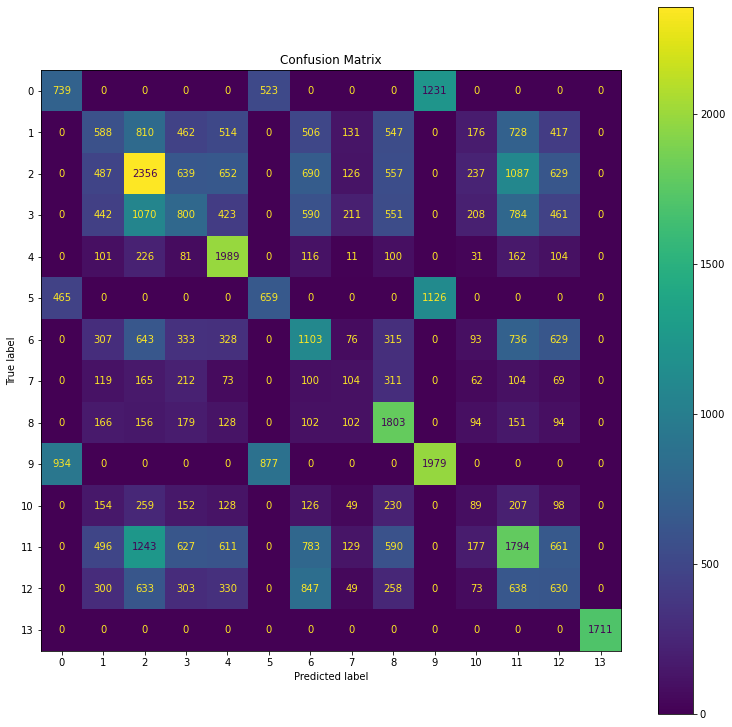

In [36]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Classification Report ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

## Third CatBoost Model ###

In [37]:
df2 = pd.read_csv("all_years_preprocessed_data.csv")
df2

Crime Against Category                                      Offense  \
0                             3                     Drug/Narcotic Violations   
1                             2  Theft of Motor Vehicle Parts or Accessories   
2                             2                                      Robbery   
3                             2     Destruction/Damage/Vandalism of Property   
4                             3                  Driving Under the Influence   
...                         ...                                          ...   
1034982                       2                          Motor Vehicle Theft   
1034983                       2                          Motor Vehicle Theft   
1034984                       2                                  Shoplifting   
1034985                       2                                  Shoplifting   
1034986                       2                          Motor Vehicle Theft   

         Sector  Beat  MCPP      Time  Day  Year  
0            18    39    33  10:10:00    2  2020  
1            11    22    50  08:00:00    0  2020  
2            22    50    50  20:30:00    6  2020  
3            18    39    33  01:17:00    2  2020  
4             5     3     4  00:51:21    2  2020  
...         ...   ...   ...       ...  ...   ...  
1034982       9    14    45  01:00:00    5  2013  
1034983      18    41    47  11:00:00    2  2013  
1034984      22    48    50  15:04:00    1  2012  
1034985      14    31    16  16:59:00    6  2010  
1034986      18    40    47  18:00:00    3  2010  

[1034987 rows x 8 columns]

In [38]:
pd.options.mode.chained_assignment = None
df2["Time"] = df2["Time"].astype("category").cat.codes
df2["Day"] = df2["Day"].astype("category").cat.codes
df2["Year"] = df2["Year"].astype("category").cat.codes

In [39]:
df2

Crime Against Category                                      Offense  \
0                             3                     Drug/Narcotic Violations   
1                             2  Theft of Motor Vehicle Parts or Accessories   
2                             2                                      Robbery   
3                             2     Destruction/Damage/Vandalism of Property   
4                             3                  Driving Under the Influence   
...                         ...                                          ...   
1034982                       2                          Motor Vehicle Theft   
1034983                       2                          Motor Vehicle Theft   
1034984                       2                                  Shoplifting   
1034985                       2                                  Shoplifting   
1034986                       2                          Motor Vehicle Theft   

         Sector  Beat  MCPP  Time  Day  Year  
0            18    39    33  1599    2    47  
1            11    22    50  1285    0    47  
2            22    50    50  3344    6    47  
3            18    39    33   252    2    47  
4             5     3     4   164    2    47  
...         ...   ...   ...   ...  ...   ...  
1034982       9    14    45   193    5    40  
1034983      18    41    47  1714    2    40  
1034984      22    48    50  2368    1    39  
1034985      14    31    16  2691    6    37  
1034986      18    40    47  2865    3    37  

[1034987 rows x 8 columns]

In [40]:
print ("My program took", time.time() - start_time, "to run")


My program took 1639.4743118286133 to run
